In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
file = pd.read_csv('cardio_train.csv', sep = ';')
df   = pd.DataFrame(file)


In [4]:
df.age = round(df.age.div(365))
df.head()

id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  52.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    100            1     1      0   
4   4  48.0       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [4]:
df_man = df.loc[df['gender'] == 2]    
df_man.gender[0]

2

In [5]:
df.gender.value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [6]:
df.gluc.value_counts()

print(5331/(59479+5331+5190))

0.07615714285714285


In [7]:
import random 

#gender: 1 = women, 2 = men

def score_man(df):
    
    # Let's initialize the column:
    df['fram_score'] = 0

    for person in range(len(df)):
        
        score=0 #let's initialize the variable

        #Lets split the calculations between "women" and "men".

        if df.gender[person] == 2: #This person is a man.       

            # ------ Age --------
            # The variable to analyze will be df.age

            m_years_list     = [30,35,40,45,50,55,60,65,70,75]
            m_years_pts_chol = [-1,0 ,1 ,2 ,3 ,4 ,5 ,6 ,7]

            for years in range(len(m_years_list)):
                if df.age[person] >= m_years_list[years] and df.age[person] < m_years_list[years]+5:
                    score += m_years_pts_chol[years]


            # ------ Cholesterol --------
            # The variable to analyze will be cholesterol


            if df.cholesterol[person] == 2:
                score += random.randint(1,2)
            elif df.cholesterol[person] == 3:
                score += 3


            # ------ Blood Pressure --------

            sys_pre = [120, 130, 140, 150, 160] # ap_hi
            dia_pre = [80, 85, 90,100]          # ap_lo

            if df.ap_hi[person] >= 160 or df.ap_lo[person] >=100:
                score +=3
            elif df.ap_hi[person] >= 140 or df.ap_lo[person] >= 90:
                score +=2
            elif df.ap_hi[person] >= 130 or df.ap_lo[person] >= 85:
                score +=1


            # ------ Diabetes --------

            if df.gluc[person] == 2: #which means this person has diabetes
                score += 2


            # ------ Smoking --------

            if df.smoke[person] == 1: #which means this person smokes
                score += 2

            print('Man   id number', df.id[person], 'has a Framingham Score of:',score)

            df['fram_score'][person] = score


        if df.gender[person] == 1: #This person is a woman.  
    
            # ------ Age --------
            # The variable to analyze will be df.age

            f_years_list     = [30,35,40,45,50,55,60,65,70,75]
            f_years_pts_chol = [-9,-4 ,0 ,3 ,6 ,7 ,8 ,8 ,8]

            for years in range(len(f_years_list)):
                if df.age[person] >= f_years_list[years] and df.age[person] < f_years_list[years]+5:
                    score += f_years_pts_chol[years]


            # ------ Cholesterol --------
            # The variable to analyze will be cholesterol


            if df.cholesterol[person] == 2:
                score += 1
            elif df.cholesterol[person] == 3:
                score += 3


            # ------ Blood Pressure --------

            sys_pre = [120, 130, 140, 150, 160] # ap_hi
            dia_pre = [80, 85, 90,100]          # ap_lo

            if df.ap_hi[person] >= 160 or df.ap_lo[person] >=100:
                score +=3
            elif df.ap_hi[person] >= 140 or df.ap_lo[person] >= 90:
                score +=2
            elif df.ap_hi[person] < 120 and df.ap_lo[person] < 80:
                score -=3


            # ------ Diabetes --------

            if df.gluc[person] == 2: #which means this person has diabetes
                score += 4


            # ------ Smoking --------

            if df.smoke[person] == 1: #which means this person smokes
                score += 2

            print('Woman id number', df.id[person], 'has a Framingham Score of:',score)

            df['fram_score'][person] = score
        

    return df

In [8]:
score_man(df)

Man   id number 0 has a Framingham Score of: 3
Woman id number 1 has a Framingham Score of: 12
Woman id number 2 has a Framingham Score of: 9
Man   id number 3 has a Framingham Score of: 5
Woman id number 4 has a Framingham Score of: 0
Woman id number 8 has a Framingham Score of: 13
Woman id number 9 has a Framingham Score of: 11
Man   id number 12 has a Framingham Score of: 10
Woman id number 13 has a Framingham Score of: 0
Woman id number 14 has a Framingham Score of: 3
Woman id number 15 has a Framingham Score of: 8
Man   id number 16 has a Framingham Score of: 3
Man   id number 18 has a Framingham Score of: 1
Woman id number 21 has a Framingham Score of: 3
Man   id number 23 has a Framingham Score of: 5
Man   id number 24 has a Framingham Score of: 2
Woman id number 25 has a Framingham Score of: 7
Woman id number 27 has a Framingham Score of: 0
Woman id number 28 has a Framingham Score of: 0
Man   id number 29 has a Framingham Score of: 7
Man   id number 30 has a Framingham Score o

<ipython-input-7-495b4818fd61>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fram_score'][person] = score
<ipython-input-7-495b4818fd61>:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fram_score'][person] = score


 224 has a Framingham Score of: 9
Woman id number 225 has a Framingham Score of: 0
Woman id number 227 has a Framingham Score of: 11
Woman id number 229 has a Framingham Score of: 9
Woman id number 230 has a Framingham Score of: 11
Woman id number 231 has a Framingham Score of: 10
Woman id number 234 has a Framingham Score of: 6
Man   id number 235 has a Framingham Score of: 6
Woman id number 237 has a Framingham Score of: 11
Woman id number 238 has a Framingham Score of: 3
Woman id number 239 has a Framingham Score of: 3
Man   id number 240 has a Framingham Score of: 7
Woman id number 241 has a Framingham Score of: 6
Man   id number 242 has a Framingham Score of: 5
Woman id number 244 has a Framingham Score of: 4
Man   id number 245 has a Framingham Score of: 4
Man   id number 248 has a Framingham Score of: 11
Woman id number 250 has a Framingham Score of: 9
Woman id number 251 has a Framingham Score of: 11
Man   id number 252 has a Framingham Score of: 6
Man   id number 253 has a Fra

Man   id number 477 has a Framingham Score of: 10
Woman id number 478 has a Framingham Score of: 3
Woman id number 480 has a Framingham Score of: 6
Woman id number 481 has a Framingham Score of: 0
Woman id number 482 has a Framingham Score of: 10
Man   id number 483 has a Framingham Score of: 3
Man   id number 484 has a Framingham Score of: 7
Man   id number 485 has a Framingham Score of: 7
Woman id number 486 has a Framingham Score of: 8
Woman id number 487 has a Framingham Score of: 6
Woman id number 488 has a Framingham Score of: 13
Man   id number 490 has a Framingham Score of: 1
Woman id number 491 has a Framingham Score of: -3
Man   id number 492 has a Framingham Score of: 7
Woman id number 493 has a Framingham Score of: 14
Man   id number 494 has a Framingham Score of: 5
Woman id number 495 has a Framingham Score of: 5
Woman id number 500 has a Framingham Score of: 7
Man   id number 502 has a Framingham Score of: 3
Woman id number 506 has a Framingham Score of: 6
Man   id number

Woman id number 894 has a Framingham Score of: 6
Woman id number 895 has a Framingham Score of: 10
Woman id number 896 has a Framingham Score of: 3
Man   id number 899 has a Framingham Score of: 6
Woman id number 900 has a Framingham Score of: 0
Woman id number 901 has a Framingham Score of: 7
Man   id number 902 has a Framingham Score of: 3
Woman id number 903 has a Framingham Score of: 0
Man   id number 904 has a Framingham Score of: 1
Woman id number 905 has a Framingham Score of: 3
Man   id number 906 has a Framingham Score of: 9
Woman id number 907 has a Framingham Score of: 3
Woman id number 908 has a Framingham Score of: 8
Woman id number 909 has a Framingham Score of: 10
Woman id number 910 has a Framingham Score of: 8
Man   id number 911 has a Framingham Score of: 5
Woman id number 912 has a Framingham Score of: 10
Man   id number 913 has a Framingham Score of: 7
Woman id number 914 has a Framingham Score of: 6
Woman id number 915 has a Framingham Score of: 14
Woman id number 

Woman id number 1103 has a Framingham Score of: 7
Woman id number 1104 has a Framingham Score of: 12
Woman id number 1106 has a Framingham Score of: 0
Woman id number 1107 has a Framingham Score of: 13
Woman id number 1109 has a Framingham Score of: 9
Man   id number 1110 has a Framingham Score of: 4
Man   id number 1111 has a Framingham Score of: 11
Man   id number 1112 has a Framingham Score of: 5
Man   id number 1113 has a Framingham Score of: 5
Woman id number 1115 has a Framingham Score of: 13
Woman id number 1116 has a Framingham Score of: 10
Man   id number 1118 has a Framingham Score of: 1
Man   id number 1119 has a Framingham Score of: 7
Woman id number 1120 has a Framingham Score of: 6
Woman id number 1121 has a Framingham Score of: 8
Woman id number 1122 has a Framingham Score of: 7
Woman id number 1123 has a Framingham Score of: 6
Woman id number 1124 has a Framingham Score of: 2
Man   id number 1125 has a Framingham Score of: 3
Man   id number 1126 has a Framingham Score o

Man   id number 1485 has a Framingham Score of: 7
Woman id number 1486 has a Framingham Score of: 7
Man   id number 1487 has a Framingham Score of: 1
Woman id number 1490 has a Framingham Score of: 10
Man   id number 1492 has a Framingham Score of: 4
Woman id number 1493 has a Framingham Score of: -3
Man   id number 1494 has a Framingham Score of: 12
Man   id number 1495 has a Framingham Score of: 4
Man   id number 1496 has a Framingham Score of: 2
Woman id number 1497 has a Framingham Score of: 11
Woman id number 1498 has a Framingham Score of: 17
Woman id number 1500 has a Framingham Score of: 12
Woman id number 1501 has a Framingham Score of: 0
Woman id number 1502 has a Framingham Score of: 8
Man   id number 1504 has a Framingham Score of: 4
Man   id number 1505 has a Framingham Score of: 5
Woman id number 1510 has a Framingham Score of: 0
Woman id number 1511 has a Framingham Score of: 3
Man   id number 1513 has a Framingham Score of: 5
Woman id number 1514 has a Framingham Score 

Woman id number 1814 has a Framingham Score of: 6
Woman id number 1815 has a Framingham Score of: 6
Man   id number 1817 has a Framingham Score of: 7
Woman id number 1818 has a Framingham Score of: 13
Woman id number 1819 has a Framingham Score of: 8
Man   id number 1820 has a Framingham Score of: 2
Woman id number 1821 has a Framingham Score of: 4
Woman id number 1823 has a Framingham Score of: 7
Man   id number 1825 has a Framingham Score of: 3
Man   id number 1826 has a Framingham Score of: 6
Woman id number 1827 has a Framingham Score of: 9
Woman id number 1828 has a Framingham Score of: 6
Man   id number 1829 has a Framingham Score of: 3
Woman id number 1830 has a Framingham Score of: 3
Woman id number 1831 has a Framingham Score of: 6
Man   id number 1832 has a Framingham Score of: 7
Man   id number 1834 has a Framingham Score of: 3
Man   id number 1835 has a Framingham Score of: 8
Man   id number 1836 has a Framingham Score of: 2
Woman id number 1837 has a Framingham Score of: 7

Woman id number 2067 has a Framingham Score of: 4
Woman id number 2068 has a Framingham Score of: 7
Woman id number 2069 has a Framingham Score of: 8
Woman id number 2070 has a Framingham Score of: 6
Man   id number 2071 has a Framingham Score of: 6
Woman id number 2081 has a Framingham Score of: 10
Man   id number 2083 has a Framingham Score of: 5
Woman id number 2086 has a Framingham Score of: 11
Woman id number 2090 has a Framingham Score of: 1
Man   id number 2091 has a Framingham Score of: 1
Man   id number 2092 has a Framingham Score of: 7
Woman id number 2093 has a Framingham Score of: 12
Woman id number 2094 has a Framingham Score of: 2
Woman id number 2095 has a Framingham Score of: 9
Woman id number 2096 has a Framingham Score of: 3
Woman id number 2097 has a Framingham Score of: 9
Man   id number 2100 has a Framingham Score of: 4
Woman id number 2102 has a Framingham Score of: 7
Woman id number 2103 has a Framingham Score of: 0
Woman id number 2104 has a Framingham Score of:

Woman id number 2331 has a Framingham Score of: 4
Man   id number 2332 has a Framingham Score of: 3
Woman id number 2333 has a Framingham Score of: 7
Man   id number 2334 has a Framingham Score of: 6
Woman id number 2335 has a Framingham Score of: 0
Woman id number 2336 has a Framingham Score of: 7
Woman id number 2338 has a Framingham Score of: 8
Woman id number 2339 has a Framingham Score of: 5
Man   id number 2340 has a Framingham Score of: 4
Man   id number 2341 has a Framingham Score of: 10
Woman id number 2342 has a Framingham Score of: 6
Woman id number 2343 has a Framingham Score of: 8
Man   id number 2344 has a Framingham Score of: 4
Woman id number 2345 has a Framingham Score of: 6
Woman id number 2346 has a Framingham Score of: 2
Woman id number 2347 has a Framingham Score of: 6
Man   id number 2348 has a Framingham Score of: 7
Man   id number 2351 has a Framingham Score of: 1
Woman id number 2352 has a Framingham Score of: 8
Woman id number 2354 has a Framingham Score of: 2

Woman id number 2569 has a Framingham Score of: 9
Woman id number 2570 has a Framingham Score of: 8
Woman id number 2571 has a Framingham Score of: 6
Woman id number 2572 has a Framingham Score of: 3
Man   id number 2573 has a Framingham Score of: 10
Woman id number 2574 has a Framingham Score of: 10
Woman id number 2577 has a Framingham Score of: 11
Woman id number 2578 has a Framingham Score of: 7
Man   id number 2579 has a Framingham Score of: 9
Man   id number 2580 has a Framingham Score of: 8
Woman id number 2581 has a Framingham Score of: 7
Man   id number 2582 has a Framingham Score of: 7
Man   id number 2584 has a Framingham Score of: 6
Woman id number 2585 has a Framingham Score of: 10
Woman id number 2587 has a Framingham Score of: 11
Woman id number 2588 has a Framingham Score of: 7
Woman id number 2589 has a Framingham Score of: 4
Man   id number 2590 has a Framingham Score of: 7
Man   id number 2591 has a Framingham Score of: 10
Woman id number 2592 has a Framingham Score 

Woman id number 2817 has a Framingham Score of: 10
Man   id number 2818 has a Framingham Score of: 10
Man   id number 2819 has a Framingham Score of: 6
Woman id number 2820 has a Framingham Score of: 3
Woman id number 2823 has a Framingham Score of: 7
Man   id number 2825 has a Framingham Score of: 4
Woman id number 2826 has a Framingham Score of: 6
Woman id number 2827 has a Framingham Score of: 7
Woman id number 2828 has a Framingham Score of: 8
Man   id number 2831 has a Framingham Score of: 9
Woman id number 2833 has a Framingham Score of: 5
Woman id number 2834 has a Framingham Score of: 8
Man   id number 2835 has a Framingham Score of: 6
Woman id number 2836 has a Framingham Score of: 7
Woman id number 2837 has a Framingham Score of: 9
Woman id number 2838 has a Framingham Score of: 4
Woman id number 2839 has a Framingham Score of: 15
Man   id number 2840 has a Framingham Score of: 2
Man   id number 2842 has a Framingham Score of: 10
Woman id number 2843 has a Framingham Score of

Woman id number 3063 has a Framingham Score of: 6
Woman id number 3064 has a Framingham Score of: 8
Man   id number 3065 has a Framingham Score of: 8
Woman id number 3067 has a Framingham Score of: 7
Woman id number 3069 has a Framingham Score of: 9
Man   id number 3074 has a Framingham Score of: 2
Woman id number 3075 has a Framingham Score of: 15
Woman id number 3076 has a Framingham Score of: 3
Woman id number 3077 has a Framingham Score of: 7
Woman id number 3078 has a Framingham Score of: 3
Woman id number 3079 has a Framingham Score of: 3
Woman id number 3080 has a Framingham Score of: 9
Man   id number 3082 has a Framingham Score of: 7
Woman id number 3083 has a Framingham Score of: 8
Man   id number 3088 has a Framingham Score of: 2
Woman id number 3089 has a Framingham Score of: 10
Man   id number 3091 has a Framingham Score of: 7
Woman id number 3092 has a Framingham Score of: 0
Man   id number 3093 has a Framingham Score of: 8
Woman id number 3095 has a Framingham Score of: 

Man   id number 3318 has a Framingham Score of: 4
Woman id number 3319 has a Framingham Score of: 3
Woman id number 3320 has a Framingham Score of: 7
Woman id number 3321 has a Framingham Score of: 4
Woman id number 3323 has a Framingham Score of: 9
Woman id number 3324 has a Framingham Score of: 10
Woman id number 3325 has a Framingham Score of: 3
Woman id number 3326 has a Framingham Score of: 0
Woman id number 3327 has a Framingham Score of: 6
Woman id number 3328 has a Framingham Score of: 5
Man   id number 3329 has a Framingham Score of: 9
Woman id number 3330 has a Framingham Score of: 14
Woman id number 3331 has a Framingham Score of: 7
Woman id number 3332 has a Framingham Score of: 0
Man   id number 3333 has a Framingham Score of: 8
Woman id number 3335 has a Framingham Score of: 9
Woman id number 3336 has a Framingham Score of: 14
Man   id number 3337 has a Framingham Score of: 8
Man   id number 3340 has a Framingham Score of: 5
Woman id number 3341 has a Framingham Score of:

Man   id number 3744 has a Framingham Score of: 5
Woman id number 3745 has a Framingham Score of: 6
Woman id number 3746 has a Framingham Score of: 7
Man   id number 3747 has a Framingham Score of: 6
Woman id number 3749 has a Framingham Score of: 2
Woman id number 3753 has a Framingham Score of: 10
Man   id number 3755 has a Framingham Score of: 7
Woman id number 3756 has a Framingham Score of: 6
Man   id number 3759 has a Framingham Score of: 4
Woman id number 3760 has a Framingham Score of: 7
Woman id number 3761 has a Framingham Score of: 9
Woman id number 3763 has a Framingham Score of: 15
Woman id number 3764 has a Framingham Score of: 8
Woman id number 3766 has a Framingham Score of: 0
Woman id number 3767 has a Framingham Score of: 9
Man   id number 3768 has a Framingham Score of: 3
Woman id number 3771 has a Framingham Score of: 3
Woman id number 3772 has a Framingham Score of: 0
Woman id number 3773 has a Framingham Score of: 9
Woman id number 3774 has a Framingham Score of: 

Woman id number 4013 has a Framingham Score of: 7
Woman id number 4014 has a Framingham Score of: 8
Woman id number 4016 has a Framingham Score of: 3
Woman id number 4017 has a Framingham Score of: 10
Man   id number 4020 has a Framingham Score of: 4
Woman id number 4021 has a Framingham Score of: 10
Man   id number 4022 has a Framingham Score of: 3
Woman id number 4023 has a Framingham Score of: 7
Woman id number 4024 has a Framingham Score of: 4
Man   id number 4025 has a Framingham Score of: 7
Woman id number 4026 has a Framingham Score of: 8
Woman id number 4027 has a Framingham Score of: 12
Woman id number 4029 has a Framingham Score of: 7
Man   id number 4032 has a Framingham Score of: 9
Woman id number 4033 has a Framingham Score of: 3
Woman id number 4034 has a Framingham Score of: 9
Man   id number 4035 has a Framingham Score of: 3
Man   id number 4036 has a Framingham Score of: 7
Woman id number 4037 has a Framingham Score of: 8
Man   id number 4038 has a Framingham Score of:

Man   id number 4274 has a Framingham Score of: 5
Man   id number 4275 has a Framingham Score of: 10
Woman id number 4276 has a Framingham Score of: 13
Man   id number 4277 has a Framingham Score of: 6
Woman id number 4279 has a Framingham Score of: 6
Woman id number 4280 has a Framingham Score of: 8
Woman id number 4281 has a Framingham Score of: 8
Woman id number 4282 has a Framingham Score of: 8
Woman id number 4283 has a Framingham Score of: 0
Woman id number 4285 has a Framingham Score of: 8
Woman id number 4286 has a Framingham Score of: 7
Woman id number 4287 has a Framingham Score of: 6
Woman id number 4288 has a Framingham Score of: 0
Woman id number 4289 has a Framingham Score of: 6
Woman id number 4290 has a Framingham Score of: 9
Woman id number 4291 has a Framingham Score of: 7
Woman id number 4293 has a Framingham Score of: 3
Woman id number 4294 has a Framingham Score of: 8
Woman id number 4295 has a Framingham Score of: 7
Woman id number 4296 has a Framingham Score of: 

Woman id number 4522 has a Framingham Score of: 7
Woman id number 4523 has a Framingham Score of: 6
Man   id number 4524 has a Framingham Score of: 3
Woman id number 4525 has a Framingham Score of: 7
Man   id number 4526 has a Framingham Score of: 11
Man   id number 4527 has a Framingham Score of: 6
Woman id number 4528 has a Framingham Score of: 3
Woman id number 4531 has a Framingham Score of: 0
Woman id number 4532 has a Framingham Score of: 3
Man   id number 4533 has a Framingham Score of: 3
Man   id number 4535 has a Framingham Score of: 5
Woman id number 4537 has a Framingham Score of: 6
Woman id number 4538 has a Framingham Score of: 6
Woman id number 4539 has a Framingham Score of: 6
Woman id number 4541 has a Framingham Score of: 0
Woman id number 4542 has a Framingham Score of: 1
Man   id number 4543 has a Framingham Score of: 1
Woman id number 4546 has a Framingham Score of: 9
Woman id number 4547 has a Framingham Score of: -2
Man   id number 4548 has a Framingham Score of: 

Man   id number 4787 has a Framingham Score of: 6
Woman id number 4788 has a Framingham Score of: 7
Woman id number 4789 has a Framingham Score of: 7
Man   id number 4791 has a Framingham Score of: 6
Woman id number 4792 has a Framingham Score of: 7
Man   id number 4794 has a Framingham Score of: 4
Woman id number 4795 has a Framingham Score of: 4
Woman id number 4797 has a Framingham Score of: 7
Woman id number 4798 has a Framingham Score of: 3
Man   id number 4800 has a Framingham Score of: 5
Woman id number 4801 has a Framingham Score of: 8
Woman id number 4805 has a Framingham Score of: 7
Woman id number 4806 has a Framingham Score of: 3
Man   id number 4807 has a Framingham Score of: 1
Man   id number 4808 has a Framingham Score of: 9
Man   id number 4809 has a Framingham Score of: 4
Woman id number 4810 has a Framingham Score of: 9
Man   id number 4812 has a Framingham Score of: 1
Man   id number 4814 has a Framingham Score of: 8
Man   id number 4815 has a Framingham Score of: 5


Woman id number 5069 has a Framingham Score of: 3
Woman id number 5070 has a Framingham Score of: 9
Man   id number 5071 has a Framingham Score of: 7
Man   id number 5074 has a Framingham Score of: 3
Woman id number 5075 has a Framingham Score of: 7
Man   id number 5077 has a Framingham Score of: 5
Woman id number 5078 has a Framingham Score of: 12
Man   id number 5079 has a Framingham Score of: 3
Woman id number 5081 has a Framingham Score of: 10
Man   id number 5083 has a Framingham Score of: 7
Woman id number 5084 has a Framingham Score of: 6
Woman id number 5086 has a Framingham Score of: 10
Woman id number 5088 has a Framingham Score of: 6
Woman id number 5089 has a Framingham Score of: 8
Woman id number 5091 has a Framingham Score of: 1
Woman id number 5092 has a Framingham Score of: 7
Woman id number 5093 has a Framingham Score of: 4
Woman id number 5094 has a Framingham Score of: 3
Woman id number 5097 has a Framingham Score of: 7
Woman id number 5098 has a Framingham Score of:

Woman id number 5324 has a Framingham Score of: 5
Woman id number 5325 has a Framingham Score of: 7
Man   id number 5327 has a Framingham Score of: 2
Man   id number 5328 has a Framingham Score of: 5
Man   id number 5329 has a Framingham Score of: 2
Woman id number 5331 has a Framingham Score of: 6
Woman id number 5332 has a Framingham Score of: 3
Man   id number 5333 has a Framingham Score of: 12
Woman id number 5334 has a Framingham Score of: 10
Woman id number 5335 has a Framingham Score of: 0
Man   id number 5336 has a Framingham Score of: 11
Woman id number 5339 has a Framingham Score of: 11
Woman id number 5340 has a Framingham Score of: 13
Woman id number 5341 has a Framingham Score of: 8
Man   id number 5342 has a Framingham Score of: 4
Man   id number 5343 has a Framingham Score of: 8
Woman id number 5345 has a Framingham Score of: 8
Woman id number 5348 has a Framingham Score of: 3
Woman id number 5352 has a Framingham Score of: 7
Woman id number 5356 has a Framingham Score o

Man   id number 5600 has a Framingham Score of: 7
Man   id number 5601 has a Framingham Score of: 8
Woman id number 5602 has a Framingham Score of: 7
Woman id number 5606 has a Framingham Score of: 10
Man   id number 5609 has a Framingham Score of: 5
Woman id number 5610 has a Framingham Score of: 10
Woman id number 5611 has a Framingham Score of: 2
Woman id number 5612 has a Framingham Score of: 6
Man   id number 5614 has a Framingham Score of: 3
Woman id number 5615 has a Framingham Score of: 13
Woman id number 5617 has a Framingham Score of: 7
Woman id number 5618 has a Framingham Score of: 14
Woman id number 5620 has a Framingham Score of: 9
Woman id number 5622 has a Framingham Score of: 11
Woman id number 5623 has a Framingham Score of: 11
Woman id number 5624 has a Framingham Score of: 8
Man   id number 5625 has a Framingham Score of: 5
Man   id number 5629 has a Framingham Score of: 3
Man   id number 5631 has a Framingham Score of: 5
Woman id number 5632 has a Framingham Score 

Man   id number 5859 has a Framingham Score of: 7
Man   id number 5860 has a Framingham Score of: 2
Man   id number 5861 has a Framingham Score of: 9
Woman id number 5862 has a Framingham Score of: 5
Woman id number 5863 has a Framingham Score of: 2
Woman id number 5864 has a Framingham Score of: 8
Woman id number 5865 has a Framingham Score of: 8
Woman id number 5866 has a Framingham Score of: 8
Woman id number 5867 has a Framingham Score of: 11
Man   id number 5868 has a Framingham Score of: 6
Woman id number 5869 has a Framingham Score of: 8
Woman id number 5870 has a Framingham Score of: 9
Man   id number 5871 has a Framingham Score of: 3
Man   id number 5872 has a Framingham Score of: 6
Man   id number 5873 has a Framingham Score of: 1
Woman id number 5875 has a Framingham Score of: 10
Man   id number 5876 has a Framingham Score of: 6
Woman id number 5877 has a Framingham Score of: 8
Man   id number 5878 has a Framingham Score of: 6
Woman id number 5879 has a Framingham Score of: 

Woman id number 6134 has a Framingham Score of: 10
Woman id number 6135 has a Framingham Score of: 7
Woman id number 6137 has a Framingham Score of: 4
Woman id number 6140 has a Framingham Score of: 10
Woman id number 6141 has a Framingham Score of: 7
Woman id number 6142 has a Framingham Score of: 10
Woman id number 6143 has a Framingham Score of: 12
Man   id number 6144 has a Framingham Score of: 1
Woman id number 6145 has a Framingham Score of: 10
Man   id number 6148 has a Framingham Score of: 0
Man   id number 6150 has a Framingham Score of: 6
Man   id number 6151 has a Framingham Score of: 11
Woman id number 6152 has a Framingham Score of: 7
Woman id number 6155 has a Framingham Score of: 9
Woman id number 6157 has a Framingham Score of: 0
Man   id number 6158 has a Framingham Score of: 9
Woman id number 6159 has a Framingham Score of: 10
Woman id number 6160 has a Framingham Score of: 2
Woman id number 6161 has a Framingham Score of: 0
Man   id number 6163 has a Framingham Score

Man   id number 6410 has a Framingham Score of: 3
Woman id number 6411 has a Framingham Score of: 6
Woman id number 6412 has a Framingham Score of: 9
Man   id number 6413 has a Framingham Score of: 5
Woman id number 6414 has a Framingham Score of: 6
Man   id number 6415 has a Framingham Score of: 3
Woman id number 6417 has a Framingham Score of: 0
Woman id number 6418 has a Framingham Score of: 0
Woman id number 6419 has a Framingham Score of: 10
Woman id number 6420 has a Framingham Score of: 12
Man   id number 6422 has a Framingham Score of: 8
Woman id number 6424 has a Framingham Score of: 8
Man   id number 6426 has a Framingham Score of: 7
Woman id number 6427 has a Framingham Score of: 7
Man   id number 6428 has a Framingham Score of: 6
Woman id number 6429 has a Framingham Score of: 10
Woman id number 6430 has a Framingham Score of: 9
Woman id number 6431 has a Framingham Score of: 0
Man   id number 6432 has a Framingham Score of: 9
Woman id number 6433 has a Framingham Score of:

Man   id number 6649 has a Framingham Score of: 3
Woman id number 6651 has a Framingham Score of: 8
Woman id number 6652 has a Framingham Score of: 0
Man   id number 6656 has a Framingham Score of: 3
Man   id number 6657 has a Framingham Score of: 6
Woman id number 6658 has a Framingham Score of: 11
Woman id number 6659 has a Framingham Score of: 8
Man   id number 6661 has a Framingham Score of: 7
Man   id number 6662 has a Framingham Score of: 8
Woman id number 6663 has a Framingham Score of: 5
Woman id number 6664 has a Framingham Score of: 10
Man   id number 6665 has a Framingham Score of: 7
Man   id number 6667 has a Framingham Score of: 5
Woman id number 6668 has a Framingham Score of: 8
Man   id number 6670 has a Framingham Score of: 3
Man   id number 6671 has a Framingham Score of: 4
Woman id number 6673 has a Framingham Score of: 5
Man   id number 6674 has a Framingham Score of: 2
Woman id number 6675 has a Framingham Score of: 2
Man   id number 6676 has a Framingham Score of: 

Woman id number 6895 has a Framingham Score of: 2
Woman id number 6896 has a Framingham Score of: 3
Man   id number 6897 has a Framingham Score of: 7
Woman id number 6898 has a Framingham Score of: 13
Man   id number 6899 has a Framingham Score of: 7
Woman id number 6900 has a Framingham Score of: 13
Man   id number 6901 has a Framingham Score of: 4
Woman id number 6902 has a Framingham Score of: 5
Man   id number 6903 has a Framingham Score of: 6
Woman id number 6904 has a Framingham Score of: 8
Woman id number 6905 has a Framingham Score of: 17
Woman id number 6906 has a Framingham Score of: 6
Woman id number 6907 has a Framingham Score of: 9
Man   id number 6909 has a Framingham Score of: 1
Woman id number 6910 has a Framingham Score of: 7
Man   id number 6911 has a Framingham Score of: 7
Man   id number 6913 has a Framingham Score of: 2
Woman id number 6914 has a Framingham Score of: 3
Woman id number 6915 has a Framingham Score of: 6
Woman id number 6916 has a Framingham Score of:

Man   id number 7151 has a Framingham Score of: 5
Man   id number 7154 has a Framingham Score of: 7
Man   id number 7155 has a Framingham Score of: 8
Woman id number 7156 has a Framingham Score of: 7
Man   id number 7157 has a Framingham Score of: 5
Man   id number 7159 has a Framingham Score of: 7
Woman id number 7160 has a Framingham Score of: 8
Woman id number 7161 has a Framingham Score of: 13
Man   id number 7163 has a Framingham Score of: 7
Woman id number 7165 has a Framingham Score of: 6
Man   id number 7166 has a Framingham Score of: 2
Woman id number 7169 has a Framingham Score of: 9
Woman id number 7171 has a Framingham Score of: 7
Woman id number 7173 has a Framingham Score of: 6
Woman id number 7174 has a Framingham Score of: 10
Woman id number 7176 has a Framingham Score of: 9
Man   id number 7179 has a Framingham Score of: 6
Woman id number 7182 has a Framingham Score of: 13
Woman id number 7184 has a Framingham Score of: 11
Man   id number 7185 has a Framingham Score of

Woman id number 7538 has a Framingham Score of: 9
Woman id number 7540 has a Framingham Score of: 6
Woman id number 7542 has a Framingham Score of: 0
Woman id number 7543 has a Framingham Score of: 6
Woman id number 7545 has a Framingham Score of: 7
Man   id number 7546 has a Framingham Score of: 0
Woman id number 7547 has a Framingham Score of: 8
Man   id number 7548 has a Framingham Score of: 10
Woman id number 7550 has a Framingham Score of: 14
Woman id number 7551 has a Framingham Score of: 6
Woman id number 7552 has a Framingham Score of: 13
Man   id number 7554 has a Framingham Score of: 3
Man   id number 7556 has a Framingham Score of: 11
Woman id number 7557 has a Framingham Score of: 6
Woman id number 7560 has a Framingham Score of: -3
Man   id number 7561 has a Framingham Score of: 1
Woman id number 7562 has a Framingham Score of: 3
Woman id number 7563 has a Framingham Score of: 8
Woman id number 7566 has a Framingham Score of: 7
Woman id number 7569 has a Framingham Score o

Woman id number 7776 has a Framingham Score of: 10
Man   id number 7777 has a Framingham Score of: 9
Woman id number 7780 has a Framingham Score of: 7
Man   id number 7781 has a Framingham Score of: 5
Woman id number 7784 has a Framingham Score of: 5
Man   id number 7785 has a Framingham Score of: 5
Woman id number 7787 has a Framingham Score of: 11
Woman id number 7788 has a Framingham Score of: 6
Man   id number 7793 has a Framingham Score of: 2
Woman id number 7794 has a Framingham Score of: 3
Man   id number 7795 has a Framingham Score of: 8
Woman id number 7796 has a Framingham Score of: 11
Woman id number 7797 has a Framingham Score of: 8
Man   id number 7799 has a Framingham Score of: 5
Man   id number 7800 has a Framingham Score of: 11
Woman id number 7801 has a Framingham Score of: 5
Woman id number 7802 has a Framingham Score of: 6
Man   id number 7803 has a Framingham Score of: 3
Woman id number 7804 has a Framingham Score of: 9
Woman id number 7805 has a Framingham Score of

Woman id number 8187 has a Framingham Score of: 7
Woman id number 8188 has a Framingham Score of: 8
Man   id number 8189 has a Framingham Score of: 7
Woman id number 8190 has a Framingham Score of: 3
Woman id number 8191 has a Framingham Score of: 0
Woman id number 8192 has a Framingham Score of: 0
Man   id number 8194 has a Framingham Score of: 9
Woman id number 8195 has a Framingham Score of: 0
Woman id number 8196 has a Framingham Score of: 3
Woman id number 8197 has a Framingham Score of: 15
Woman id number 8198 has a Framingham Score of: 3
Woman id number 8199 has a Framingham Score of: 9
Woman id number 8200 has a Framingham Score of: 5
Man   id number 8201 has a Framingham Score of: 11
Woman id number 8202 has a Framingham Score of: 8
Woman id number 8203 has a Framingham Score of: -3
Woman id number 8204 has a Framingham Score of: 7
Woman id number 8205 has a Framingham Score of: 4
Man   id number 8206 has a Framingham Score of: 11
Woman id number 8208 has a Framingham Score of

Woman id number 8431 has a Framingham Score of: 8
Woman id number 8432 has a Framingham Score of: 10
Woman id number 8433 has a Framingham Score of: 3
Man   id number 8434 has a Framingham Score of: 10
Man   id number 8435 has a Framingham Score of: 10
Man   id number 8436 has a Framingham Score of: 7
Woman id number 8437 has a Framingham Score of: 3
Woman id number 8439 has a Framingham Score of: 5
Woman id number 8442 has a Framingham Score of: -2
Woman id number 8443 has a Framingham Score of: 6
Man   id number 8444 has a Framingham Score of: 1
Woman id number 8445 has a Framingham Score of: 8
Woman id number 8448 has a Framingham Score of: 8
Woman id number 8449 has a Framingham Score of: 12
Woman id number 8450 has a Framingham Score of: 9
Woman id number 8451 has a Framingham Score of: 3
Man   id number 8454 has a Framingham Score of: 7
Woman id number 8455 has a Framingham Score of: 8
Woman id number 8456 has a Framingham Score of: 6
Woman id number 8457 has a Framingham Score o

Woman id number 8808 has a Framingham Score of: 0
Woman id number 8809 has a Framingham Score of: 10
Man   id number 8814 has a Framingham Score of: 4
Woman id number 8815 has a Framingham Score of: 10
Man   id number 8816 has a Framingham Score of: 9
Woman id number 8817 has a Framingham Score of: 6
Woman id number 8818 has a Framingham Score of: 0
Woman id number 8819 has a Framingham Score of: 3
Woman id number 8821 has a Framingham Score of: 10
Woman id number 8822 has a Framingham Score of: 9
Woman id number 8823 has a Framingham Score of: 13
Woman id number 8824 has a Framingham Score of: 3
Man   id number 8825 has a Framingham Score of: 4
Woman id number 8826 has a Framingham Score of: 3
Man   id number 8827 has a Framingham Score of: 12
Woman id number 8828 has a Framingham Score of: 8
Woman id number 8829 has a Framingham Score of: 6
Woman id number 8831 has a Framingham Score of: 10
Woman id number 8832 has a Framingham Score of: 13
Man   id number 8833 has a Framingham Score

Woman id number 9042 has a Framingham Score of: 8
Man   id number 9043 has a Framingham Score of: 5
Man   id number 9044 has a Framingham Score of: 6
Woman id number 9045 has a Framingham Score of: 6
Woman id number 9047 has a Framingham Score of: 13
Woman id number 9049 has a Framingham Score of: 3
Woman id number 9050 has a Framingham Score of: 8
Woman id number 9051 has a Framingham Score of: 0
Man   id number 9053 has a Framingham Score of: 5
Woman id number 9054 has a Framingham Score of: 6
Woman id number 9055 has a Framingham Score of: 10
Woman id number 9056 has a Framingham Score of: 11
Man   id number 9057 has a Framingham Score of: 4
Man   id number 9058 has a Framingham Score of: 3
Woman id number 9059 has a Framingham Score of: 7
Man   id number 9061 has a Framingham Score of: 4
Woman id number 9064 has a Framingham Score of: 7
Woman id number 9065 has a Framingham Score of: 10
Woman id number 9066 has a Framingham Score of: 15
Woman id number 9067 has a Framingham Score o

Woman id number 9293 has a Framingham Score of: -3
Man   id number 9295 has a Framingham Score of: 8
Woman id number 9297 has a Framingham Score of: 8
Man   id number 9298 has a Framingham Score of: 7
Man   id number 9301 has a Framingham Score of: 3
Woman id number 9302 has a Framingham Score of: 7
Woman id number 9303 has a Framingham Score of: -3
Man   id number 9305 has a Framingham Score of: 7
Woman id number 9306 has a Framingham Score of: 9
Woman id number 9308 has a Framingham Score of: 3
Woman id number 9309 has a Framingham Score of: 7
Man   id number 9311 has a Framingham Score of: 9
Woman id number 9315 has a Framingham Score of: 10
Woman id number 9316 has a Framingham Score of: 4
Woman id number 9317 has a Framingham Score of: 8
Woman id number 9320 has a Framingham Score of: -3
Man   id number 9322 has a Framingham Score of: 12
Woman id number 9323 has a Framingham Score of: -4
Man   id number 9324 has a Framingham Score of: 6
Woman id number 9325 has a Framingham Score 

Woman id number 9553 has a Framingham Score of: 13
Man   id number 9554 has a Framingham Score of: 5
Woman id number 9555 has a Framingham Score of: 10
Woman id number 9557 has a Framingham Score of: 7
Woman id number 9559 has a Framingham Score of: -3
Woman id number 9560 has a Framingham Score of: 4
Woman id number 9562 has a Framingham Score of: 14
Woman id number 9563 has a Framingham Score of: 6
Woman id number 9564 has a Framingham Score of: 15
Woman id number 9569 has a Framingham Score of: 13
Man   id number 9570 has a Framingham Score of: 5
Woman id number 9571 has a Framingham Score of: 6
Woman id number 9572 has a Framingham Score of: -3
Man   id number 9573 has a Framingham Score of: 7
Woman id number 9576 has a Framingham Score of: 6
Man   id number 9578 has a Framingham Score of: 3
Woman id number 9579 has a Framingham Score of: 6
Woman id number 9580 has a Framingham Score of: 10
Man   id number 9583 has a Framingham Score of: 5
Man   id number 9584 has a Framingham Scor

Man   id number 9798 has a Framingham Score of: 6
Man   id number 9799 has a Framingham Score of: 5
Woman id number 9800 has a Framingham Score of: 11
Woman id number 9802 has a Framingham Score of: 4
Woman id number 9803 has a Framingham Score of: 4
Man   id number 9804 has a Framingham Score of: 6
Man   id number 9805 has a Framingham Score of: 5
Man   id number 9806 has a Framingham Score of: 12
Woman id number 9808 has a Framingham Score of: 8
Woman id number 9809 has a Framingham Score of: 6
Woman id number 9811 has a Framingham Score of: 0
Woman id number 9812 has a Framingham Score of: 6
Man   id number 9813 has a Framingham Score of: 7
Woman id number 9814 has a Framingham Score of: 13
Woman id number 9817 has a Framingham Score of: 13
Man   id number 9823 has a Framingham Score of: 3
Woman id number 9824 has a Framingham Score of: 11
Man   id number 9825 has a Framingham Score of: 14
Man   id number 9826 has a Framingham Score of: 3
Man   id number 9827 has a Framingham Score 

Woman id number 10042 has a Framingham Score of: 8
Man   id number 10044 has a Framingham Score of: 7
Woman id number 10045 has a Framingham Score of: 7
Woman id number 10046 has a Framingham Score of: 8
Man   id number 10047 has a Framingham Score of: 9
Man   id number 10048 has a Framingham Score of: 10
Woman id number 10049 has a Framingham Score of: 15
Woman id number 10050 has a Framingham Score of: 6
Man   id number 10051 has a Framingham Score of: 3
Woman id number 10052 has a Framingham Score of: 9
Woman id number 10053 has a Framingham Score of: 12
Man   id number 10055 has a Framingham Score of: 5
Woman id number 10056 has a Framingham Score of: -3
Woman id number 10057 has a Framingham Score of: 7
Woman id number 10060 has a Framingham Score of: 6
Woman id number 10061 has a Framingham Score of: 12
Man   id number 10062 has a Framingham Score of: 7
Man   id number 10067 has a Framingham Score of: 7
Man   id number 10069 has a Framingham Score of: 8
Man   id number 10070 has 

Man   id number 10294 has a Framingham Score of: 7
Woman id number 10298 has a Framingham Score of: 0
Woman id number 10300 has a Framingham Score of: 6
Woman id number 10301 has a Framingham Score of: 12
Woman id number 10302 has a Framingham Score of: 7
Woman id number 10303 has a Framingham Score of: 10
Woman id number 10304 has a Framingham Score of: 2
Woman id number 10305 has a Framingham Score of: -3
Woman id number 10309 has a Framingham Score of: 3
Woman id number 10311 has a Framingham Score of: 0
Woman id number 10312 has a Framingham Score of: 6
Woman id number 10313 has a Framingham Score of: 7
Man   id number 10315 has a Framingham Score of: 4
Woman id number 10318 has a Framingham Score of: 6
Woman id number 10319 has a Framingham Score of: 11
Man   id number 10320 has a Framingham Score of: 5
Woman id number 10321 has a Framingham Score of: 8
Woman id number 10323 has a Framingham Score of: 8
Man   id number 10324 has a Framingham Score of: 4
Man   id number 10325 has a

Woman id number 10533 has a Framingham Score of: 6
Woman id number 10534 has a Framingham Score of: 6
Man   id number 10536 has a Framingham Score of: 6
Woman id number 10537 has a Framingham Score of: 8
Woman id number 10538 has a Framingham Score of: 0
Man   id number 10539 has a Framingham Score of: 7
Woman id number 10540 has a Framingham Score of: 6
Woman id number 10541 has a Framingham Score of: 5
Man   id number 10542 has a Framingham Score of: 1
Woman id number 10543 has a Framingham Score of: 7
Woman id number 10544 has a Framingham Score of: 6
Woman id number 10546 has a Framingham Score of: 9
Woman id number 10547 has a Framingham Score of: 3
Woman id number 10548 has a Framingham Score of: 3
Woman id number 10550 has a Framingham Score of: 13
Man   id number 10551 has a Framingham Score of: 1
Woman id number 10553 has a Framingham Score of: -2
Man   id number 10554 has a Framingham Score of: 5
Woman id number 10555 has a Framingham Score of: 1
Woman id number 10556 has a F

Woman id number 10937 has a Framingham Score of: 7
Woman id number 10938 has a Framingham Score of: -4
Man   id number 10942 has a Framingham Score of: 7
Woman id number 10943 has a Framingham Score of: 11
Man   id number 10945 has a Framingham Score of: 7
Woman id number 10946 has a Framingham Score of: 0
Woman id number 10947 has a Framingham Score of: 4
Woman id number 10948 has a Framingham Score of: 3
Woman id number 10949 has a Framingham Score of: 8
Woman id number 10951 has a Framingham Score of: 8
Man   id number 10952 has a Framingham Score of: 7
Woman id number 10953 has a Framingham Score of: 10
Woman id number 10955 has a Framingham Score of: 9
Woman id number 10956 has a Framingham Score of: 0
Woman id number 10957 has a Framingham Score of: 4
Woman id number 10958 has a Framingham Score of: 10
Woman id number 10960 has a Framingham Score of: 4
Woman id number 10961 has a Framingham Score of: 4
Woman id number 10963 has a Framingham Score of: 8
Woman id number 10965 has a

Woman id number 11189 has a Framingham Score of: 0
Woman id number 11191 has a Framingham Score of: 8
Woman id number 11192 has a Framingham Score of: 8
Man   id number 11193 has a Framingham Score of: 6
Woman id number 11194 has a Framingham Score of: 0
Man   id number 11195 has a Framingham Score of: 8
Man   id number 11196 has a Framingham Score of: 9
Woman id number 11198 has a Framingham Score of: 4
Woman id number 11199 has a Framingham Score of: 7
Woman id number 11200 has a Framingham Score of: 7
Woman id number 11201 has a Framingham Score of: 11
Woman id number 11202 has a Framingham Score of: 1
Man   id number 11203 has a Framingham Score of: 3
Man   id number 11206 has a Framingham Score of: 5
Woman id number 11207 has a Framingham Score of: 7
Woman id number 11209 has a Framingham Score of: 11
Man   id number 11210 has a Framingham Score of: 6
Woman id number 11211 has a Framingham Score of: 8
Woman id number 11212 has a Framingham Score of: 6
Man   id number 11214 has a F

Woman id number 11422 has a Framingham Score of: 4
Woman id number 11423 has a Framingham Score of: 6
Woman id number 11424 has a Framingham Score of: 8
Woman id number 11428 has a Framingham Score of: 0
Woman id number 11430 has a Framingham Score of: 6
Woman id number 11431 has a Framingham Score of: 0
Man   id number 11432 has a Framingham Score of: 9
Woman id number 11433 has a Framingham Score of: 0
Woman id number 11435 has a Framingham Score of: 8
Man   id number 11436 has a Framingham Score of: 6
Woman id number 11438 has a Framingham Score of: -3
Woman id number 11439 has a Framingham Score of: 0
Woman id number 11440 has a Framingham Score of: 4
Woman id number 11441 has a Framingham Score of: 10
Woman id number 11442 has a Framingham Score of: 16
Woman id number 11443 has a Framingham Score of: 12
Woman id number 11444 has a Framingham Score of: 2
Woman id number 11445 has a Framingham Score of: 4
Woman id number 11446 has a Framingham Score of: 10
Man   id number 11447 has 

Woman id number 11806 has a Framingham Score of: 9
Man   id number 11807 has a Framingham Score of: 2
Man   id number 11809 has a Framingham Score of: 5
Woman id number 11810 has a Framingham Score of: 6
Woman id number 11811 has a Framingham Score of: 8
Woman id number 11812 has a Framingham Score of: 8
Woman id number 11813 has a Framingham Score of: 4
Man   id number 11814 has a Framingham Score of: 5
Woman id number 11815 has a Framingham Score of: 6
Man   id number 11816 has a Framingham Score of: 6
Woman id number 11819 has a Framingham Score of: 8
Woman id number 11820 has a Framingham Score of: 3
Man   id number 11821 has a Framingham Score of: 6
Woman id number 11822 has a Framingham Score of: 3
Man   id number 11824 has a Framingham Score of: 4
Woman id number 11825 has a Framingham Score of: 6
Woman id number 11826 has a Framingham Score of: 8
Woman id number 11828 has a Framingham Score of: 10
Woman id number 11829 has a Framingham Score of: 3
Woman id number 11830 has a Fr

Man   id number 12043 has a Framingham Score of: 4
Woman id number 12047 has a Framingham Score of: 7
Woman id number 12048 has a Framingham Score of: 4
Woman id number 12049 has a Framingham Score of: 8
Man   id number 12050 has a Framingham Score of: 5
Woman id number 12051 has a Framingham Score of: 9
Man   id number 12053 has a Framingham Score of: 1
Woman id number 12054 has a Framingham Score of: 10
Woman id number 12055 has a Framingham Score of: 11
Man   id number 12056 has a Framingham Score of: 3
Woman id number 12057 has a Framingham Score of: 0
Woman id number 12059 has a Framingham Score of: 0
Woman id number 12060 has a Framingham Score of: 11
Man   id number 12061 has a Framingham Score of: 6
Woman id number 12062 has a Framingham Score of: 10
Man   id number 12063 has a Framingham Score of: 2
Woman id number 12064 has a Framingham Score of: 3
Woman id number 12065 has a Framingham Score of: 6
Woman id number 12066 has a Framingham Score of: 0
Man   id number 12069 has a

Woman id number 12419 has a Framingham Score of: 7
Woman id number 12420 has a Framingham Score of: 9
Woman id number 12423 has a Framingham Score of: 8
Woman id number 12425 has a Framingham Score of: 8
Man   id number 12426 has a Framingham Score of: 8
Man   id number 12427 has a Framingham Score of: 3
Woman id number 12431 has a Framingham Score of: 7
Woman id number 12432 has a Framingham Score of: 7
Man   id number 12433 has a Framingham Score of: 6
Woman id number 12434 has a Framingham Score of: 9
Woman id number 12435 has a Framingham Score of: 10
Woman id number 12437 has a Framingham Score of: 8
Woman id number 12438 has a Framingham Score of: 7
Man   id number 12439 has a Framingham Score of: 8
Woman id number 12441 has a Framingham Score of: 3
Man   id number 12442 has a Framingham Score of: 5
Woman id number 12443 has a Framingham Score of: 3
Woman id number 12444 has a Framingham Score of: 8
Woman id number 12445 has a Framingham Score of: 8
Man   id number 12446 has a Fr

Man   id number 12649 has a Framingham Score of: 12
Man   id number 12650 has a Framingham Score of: 5
Man   id number 12651 has a Framingham Score of: 10
Woman id number 12654 has a Framingham Score of: 8
Man   id number 12657 has a Framingham Score of: 10
Woman id number 12658 has a Framingham Score of: 3
Man   id number 12659 has a Framingham Score of: 5
Woman id number 12660 has a Framingham Score of: 8
Woman id number 12663 has a Framingham Score of: 0
Man   id number 12664 has a Framingham Score of: 1
Woman id number 12665 has a Framingham Score of: 3
Woman id number 12666 has a Framingham Score of: 11
Woman id number 12668 has a Framingham Score of: 5
Woman id number 12669 has a Framingham Score of: 5
Man   id number 12670 has a Framingham Score of: 3
Woman id number 12671 has a Framingham Score of: -3
Woman id number 12672 has a Framingham Score of: 9
Woman id number 12674 has a Framingham Score of: 7
Woman id number 12675 has a Framingham Score of: 8
Man   id number 12676 has 

Man   id number 12888 has a Framingham Score of: 6
Woman id number 12889 has a Framingham Score of: 9
Woman id number 12890 has a Framingham Score of: 0
Woman id number 12891 has a Framingham Score of: 6
Woman id number 12893 has a Framingham Score of: 4
Man   id number 12894 has a Framingham Score of: 2
Woman id number 12895 has a Framingham Score of: 7
Woman id number 12896 has a Framingham Score of: 8
Man   id number 12897 has a Framingham Score of: 3
Man   id number 12899 has a Framingham Score of: 7
Woman id number 12900 has a Framingham Score of: 8
Woman id number 12901 has a Framingham Score of: 6
Woman id number 12903 has a Framingham Score of: 12
Woman id number 12904 has a Framingham Score of: 7
Man   id number 12905 has a Framingham Score of: 4
Man   id number 12906 has a Framingham Score of: 5
Man   id number 12908 has a Framingham Score of: 7
Man   id number 12909 has a Framingham Score of: 3
Man   id number 12911 has a Framingham Score of: 10
Man   id number 12912 has a F

Woman id number 13114 has a Framingham Score of: 5
Woman id number 13115 has a Framingham Score of: 10
Man   id number 13116 has a Framingham Score of: 10
Man   id number 13117 has a Framingham Score of: 3
Woman id number 13119 has a Framingham Score of: 6
Woman id number 13120 has a Framingham Score of: 8
Man   id number 13121 has a Framingham Score of: 6
Man   id number 13122 has a Framingham Score of: 5
Woman id number 13125 has a Framingham Score of: 8
Man   id number 13126 has a Framingham Score of: 3
Woman id number 13128 has a Framingham Score of: 9
Woman id number 13130 has a Framingham Score of: 8
Man   id number 13133 has a Framingham Score of: 3
Woman id number 13134 has a Framingham Score of: 10
Woman id number 13135 has a Framingham Score of: 8
Woman id number 13136 has a Framingham Score of: 6
Man   id number 13137 has a Framingham Score of: 3
Man   id number 13138 has a Framingham Score of: 1
Woman id number 13139 has a Framingham Score of: 7
Man   id number 13141 has a 

Man   id number 13359 has a Framingham Score of: 4
Woman id number 13360 has a Framingham Score of: 15
Woman id number 13361 has a Framingham Score of: -3
Woman id number 13363 has a Framingham Score of: 11
Man   id number 13364 has a Framingham Score of: 3
Woman id number 13365 has a Framingham Score of: 10
Woman id number 13368 has a Framingham Score of: 8
Man   id number 13369 has a Framingham Score of: 10
Woman id number 13370 has a Framingham Score of: 10
Man   id number 13372 has a Framingham Score of: 5
Woman id number 13373 has a Framingham Score of: 7
Woman id number 13375 has a Framingham Score of: 0
Woman id number 13377 has a Framingham Score of: 6
Woman id number 13378 has a Framingham Score of: 11
Man   id number 13381 has a Framingham Score of: 9
Man   id number 13383 has a Framingham Score of: 4
Man   id number 13385 has a Framingham Score of: 7
Man   id number 13386 has a Framingham Score of: 6
Man   id number 13388 has a Framingham Score of: 5
Woman id number 13390 ha

Woman id number 13607 has a Framingham Score of: 8
Man   id number 13608 has a Framingham Score of: 3
Woman id number 13609 has a Framingham Score of: 10
Woman id number 13610 has a Framingham Score of: 7
Woman id number 13612 has a Framingham Score of: 10
Woman id number 13613 has a Framingham Score of: 8
Woman id number 13615 has a Framingham Score of: 8
Woman id number 13616 has a Framingham Score of: 11
Woman id number 13617 has a Framingham Score of: 10
Woman id number 13618 has a Framingham Score of: 9
Man   id number 13620 has a Framingham Score of: 3
Woman id number 13622 has a Framingham Score of: 3
Woman id number 13623 has a Framingham Score of: 8
Woman id number 13625 has a Framingham Score of: 13
Woman id number 13627 has a Framingham Score of: 8
Woman id number 13630 has a Framingham Score of: 11
Woman id number 13631 has a Framingham Score of: 3
Man   id number 13635 has a Framingham Score of: 4
Woman id number 13636 has a Framingham Score of: 5
Woman id number 13638 has

Woman id number 13859 has a Framingham Score of: 7
Woman id number 13860 has a Framingham Score of: 7
Woman id number 13861 has a Framingham Score of: 8
Woman id number 13863 has a Framingham Score of: 6
Woman id number 13864 has a Framingham Score of: 9
Woman id number 13866 has a Framingham Score of: 7
Woman id number 13868 has a Framingham Score of: 9
Man   id number 13869 has a Framingham Score of: 3
Man   id number 13874 has a Framingham Score of: 4
Man   id number 13876 has a Framingham Score of: 5
Woman id number 13877 has a Framingham Score of: 6
Man   id number 13878 has a Framingham Score of: 2
Woman id number 13879 has a Framingham Score of: 10
Man   id number 13880 has a Framingham Score of: 9
Woman id number 13883 has a Framingham Score of: 10
Man   id number 13884 has a Framingham Score of: 2
Woman id number 13885 has a Framingham Score of: 10
Woman id number 13887 has a Framingham Score of: 11
Man   id number 13889 has a Framingham Score of: 4
Woman id number 13890 has a

Woman id number 14242 has a Framingham Score of: 5
Woman id number 14244 has a Framingham Score of: -3
Woman id number 14245 has a Framingham Score of: 8
Woman id number 14246 has a Framingham Score of: 0
Woman id number 14247 has a Framingham Score of: 9
Woman id number 14249 has a Framingham Score of: 7
Woman id number 14251 has a Framingham Score of: 9
Woman id number 14252 has a Framingham Score of: 7
Woman id number 14253 has a Framingham Score of: 12
Man   id number 14254 has a Framingham Score of: 5
Man   id number 14256 has a Framingham Score of: 5
Man   id number 14259 has a Framingham Score of: 1
Woman id number 14265 has a Framingham Score of: 9
Woman id number 14266 has a Framingham Score of: -3
Man   id number 14267 has a Framingham Score of: 1
Man   id number 14268 has a Framingham Score of: 5
Man   id number 14269 has a Framingham Score of: 7
Woman id number 14271 has a Framingham Score of: 7
Woman id number 14272 has a Framingham Score of: 3
Man   id number 14273 has a 

Woman id number 14499 has a Framingham Score of: 0
Woman id number 14500 has a Framingham Score of: 6
Man   id number 14501 has a Framingham Score of: 8
Man   id number 14502 has a Framingham Score of: 2
Man   id number 14507 has a Framingham Score of: 3
Woman id number 14508 has a Framingham Score of: 3
Woman id number 14511 has a Framingham Score of: 5
Man   id number 14512 has a Framingham Score of: 9
Man   id number 14514 has a Framingham Score of: 6
Woman id number 14516 has a Framingham Score of: 0
Man   id number 14518 has a Framingham Score of: 6
Man   id number 14520 has a Framingham Score of: 4
Woman id number 14521 has a Framingham Score of: 10
Man   id number 14522 has a Framingham Score of: 1
Woman id number 14523 has a Framingham Score of: 3
Man   id number 14526 has a Framingham Score of: 4
Woman id number 14527 has a Framingham Score of: 0
Man   id number 14528 has a Framingham Score of: 7
Woman id number 14529 has a Framingham Score of: 16
Woman id number 14530 has a F

Woman id number 14790 has a Framingham Score of: 6
Man   id number 14794 has a Framingham Score of: 1
Woman id number 14796 has a Framingham Score of: 10
Woman id number 14799 has a Framingham Score of: 9
Woman id number 14802 has a Framingham Score of: 6
Woman id number 14804 has a Framingham Score of: 2
Man   id number 14805 has a Framingham Score of: 8
Woman id number 14807 has a Framingham Score of: 12
Woman id number 14808 has a Framingham Score of: 6
Man   id number 14809 has a Framingham Score of: 4
Man   id number 14810 has a Framingham Score of: 6
Man   id number 14811 has a Framingham Score of: 4
Woman id number 14812 has a Framingham Score of: 3
Woman id number 14814 has a Framingham Score of: 2
Woman id number 14815 has a Framingham Score of: 2
Woman id number 14816 has a Framingham Score of: 8
Woman id number 14817 has a Framingham Score of: 10
Man   id number 14819 has a Framingham Score of: 6
Man   id number 14820 has a Framingham Score of: 7
Woman id number 14821 has a 

Woman id number 15265 has a Framingham Score of: 6
Woman id number 15266 has a Framingham Score of: 6
Man   id number 15267 has a Framingham Score of: 5
Woman id number 15268 has a Framingham Score of: 11
Woman id number 15269 has a Framingham Score of: 8
Man   id number 15270 has a Framingham Score of: 1
Woman id number 15271 has a Framingham Score of: 11
Woman id number 15272 has a Framingham Score of: 9
Woman id number 15273 has a Framingham Score of: 11
Man   id number 15274 has a Framingham Score of: 11
Woman id number 15275 has a Framingham Score of: -3
Woman id number 15278 has a Framingham Score of: 10
Woman id number 15280 has a Framingham Score of: 6
Man   id number 15281 has a Framingham Score of: 4
Man   id number 15282 has a Framingham Score of: 4
Woman id number 15283 has a Framingham Score of: 3
Man   id number 15284 has a Framingham Score of: 6
Woman id number 15285 has a Framingham Score of: 3
Woman id number 15288 has a Framingham Score of: 16
Woman id number 15289 ha

Woman id number 15510 has a Framingham Score of: 6
Man   id number 15512 has a Framingham Score of: 4
Man   id number 15514 has a Framingham Score of: 6
Man   id number 15515 has a Framingham Score of: 5
Woman id number 15516 has a Framingham Score of: 8
Man   id number 15517 has a Framingham Score of: 11
Woman id number 15518 has a Framingham Score of: 6
Woman id number 15520 has a Framingham Score of: 7
Woman id number 15522 has a Framingham Score of: 8
Woman id number 15523 has a Framingham Score of: 11
Woman id number 15524 has a Framingham Score of: 9
Man   id number 15525 has a Framingham Score of: 5
Woman id number 15526 has a Framingham Score of: 9
Man   id number 15527 has a Framingham Score of: 3
Woman id number 15528 has a Framingham Score of: 7
Woman id number 15529 has a Framingham Score of: 9
Man   id number 15533 has a Framingham Score of: 6
Woman id number 15534 has a Framingham Score of: 3
Woman id number 15535 has a Framingham Score of: 13
Woman id number 15537 has a 

Woman id number 15753 has a Framingham Score of: 8
Woman id number 15754 has a Framingham Score of: 9
Woman id number 15755 has a Framingham Score of: 3
Woman id number 15756 has a Framingham Score of: 9
Woman id number 15757 has a Framingham Score of: 10
Woman id number 15758 has a Framingham Score of: 11
Man   id number 15759 has a Framingham Score of: 5
Woman id number 15760 has a Framingham Score of: 8
Woman id number 15762 has a Framingham Score of: -3
Woman id number 15763 has a Framingham Score of: 6
Woman id number 15764 has a Framingham Score of: 3
Woman id number 15765 has a Framingham Score of: 3
Man   id number 15766 has a Framingham Score of: 8
Woman id number 15767 has a Framingham Score of: 10
Woman id number 15768 has a Framingham Score of: 12
Woman id number 15769 has a Framingham Score of: 9
Woman id number 15774 has a Framingham Score of: 0
Man   id number 15776 has a Framingham Score of: 7
Man   id number 15777 has a Framingham Score of: 5
Man   id number 15779 has 

Woman id number 15971 has a Framingham Score of: 6
Man   id number 15972 has a Framingham Score of: 6
Woman id number 15973 has a Framingham Score of: 9
Woman id number 15975 has a Framingham Score of: 9
Woman id number 15976 has a Framingham Score of: -3
Woman id number 15977 has a Framingham Score of: 3
Woman id number 15978 has a Framingham Score of: 3
Man   id number 15979 has a Framingham Score of: 5
Woman id number 15980 has a Framingham Score of: 9
Woman id number 15981 has a Framingham Score of: 15
Woman id number 15983 has a Framingham Score of: 6
Woman id number 15985 has a Framingham Score of: 10
Man   id number 15986 has a Framingham Score of: 12
Woman id number 15989 has a Framingham Score of: 3
Man   id number 15990 has a Framingham Score of: 1
Woman id number 15991 has a Framingham Score of: 8
Woman id number 15992 has a Framingham Score of: 8
Woman id number 15993 has a Framingham Score of: 7
Woman id number 15994 has a Framingham Score of: 0
Woman id number 15996 has a

Woman id number 16211 has a Framingham Score of: 3
Man   id number 16212 has a Framingham Score of: 5
Man   id number 16213 has a Framingham Score of: 4
Woman id number 16214 has a Framingham Score of: 6
Man   id number 16215 has a Framingham Score of: 5
Woman id number 16216 has a Framingham Score of: 9
Woman id number 16217 has a Framingham Score of: 10
Man   id number 16219 has a Framingham Score of: 2
Woman id number 16220 has a Framingham Score of: 8
Woman id number 16221 has a Framingham Score of: 3
Woman id number 16222 has a Framingham Score of: 3
Man   id number 16224 has a Framingham Score of: 8
Woman id number 16225 has a Framingham Score of: -3
Woman id number 16228 has a Framingham Score of: 8
Man   id number 16231 has a Framingham Score of: 7
Man   id number 16232 has a Framingham Score of: 6
Man   id number 16233 has a Framingham Score of: 3
Woman id number 16234 has a Framingham Score of: 13
Man   id number 16235 has a Framingham Score of: 5
Woman id number 16236 has a 

Man   id number 16446 has a Framingham Score of: 5
Woman id number 16447 has a Framingham Score of: 6
Woman id number 16448 has a Framingham Score of: 8
Woman id number 16449 has a Framingham Score of: 6
Woman id number 16450 has a Framingham Score of: 6
Man   id number 16452 has a Framingham Score of: 6
Man   id number 16453 has a Framingham Score of: 6
Man   id number 16455 has a Framingham Score of: 7
Woman id number 16456 has a Framingham Score of: 8
Woman id number 16457 has a Framingham Score of: 10
Woman id number 16458 has a Framingham Score of: 6
Man   id number 16459 has a Framingham Score of: 2
Woman id number 16460 has a Framingham Score of: 7
Woman id number 16461 has a Framingham Score of: 7
Woman id number 16462 has a Framingham Score of: 11
Woman id number 16463 has a Framingham Score of: 14
Man   id number 16465 has a Framingham Score of: 3
Man   id number 16467 has a Framingham Score of: 1
Woman id number 16468 has a Framingham Score of: 11
Woman id number 16469 has a

Man   id number 16661 has a Framingham Score of: 2
Man   id number 16664 has a Framingham Score of: 7
Man   id number 16665 has a Framingham Score of: 6
Man   id number 16666 has a Framingham Score of: 1
Woman id number 16668 has a Framingham Score of: 15
Man   id number 16669 has a Framingham Score of: 3
Woman id number 16671 has a Framingham Score of: 7
Woman id number 16673 has a Framingham Score of: 6
Woman id number 16675 has a Framingham Score of: 4
Man   id number 16678 has a Framingham Score of: 7
Woman id number 16680 has a Framingham Score of: 0
Woman id number 16681 has a Framingham Score of: -1
Woman id number 16682 has a Framingham Score of: 7
Woman id number 16683 has a Framingham Score of: 11
Woman id number 16684 has a Framingham Score of: -2
Woman id number 16685 has a Framingham Score of: 7
Woman id number 16687 has a Framingham Score of: 9
Man   id number 16689 has a Framingham Score of: 6
Woman id number 16690 has a Framingham Score of: 3
Woman id number 16691 has a

Man   id number 16888 has a Framingham Score of: 8
Man   id number 16890 has a Framingham Score of: 5
Man   id number 16891 has a Framingham Score of: 5
Woman id number 16892 has a Framingham Score of: 13
Woman id number 16893 has a Framingham Score of: 7
Woman id number 16894 has a Framingham Score of: 5
Woman id number 16895 has a Framingham Score of: 9
Woman id number 16897 has a Framingham Score of: -2
Man   id number 16898 has a Framingham Score of: 1
Woman id number 16899 has a Framingham Score of: 3
Woman id number 16900 has a Framingham Score of: 6
Man   id number 16906 has a Framingham Score of: 8
Man   id number 16907 has a Framingham Score of: 3
Man   id number 16908 has a Framingham Score of: 5
Man   id number 16909 has a Framingham Score of: 3
Woman id number 16910 has a Framingham Score of: 3
Woman id number 16911 has a Framingham Score of: 10
Woman id number 16912 has a Framingham Score of: 3
Woman id number 16914 has a Framingham Score of: 10
Woman id number 16915 has a

Woman id number 17109 has a Framingham Score of: 2
Woman id number 17110 has a Framingham Score of: 9
Woman id number 17111 has a Framingham Score of: 4
Man   id number 17112 has a Framingham Score of: 8
Man   id number 17113 has a Framingham Score of: 6
Woman id number 17114 has a Framingham Score of: 17
Woman id number 17116 has a Framingham Score of: 11
Man   id number 17118 has a Framingham Score of: 6
Woman id number 17119 has a Framingham Score of: 13
Man   id number 17120 has a Framingham Score of: 6
Woman id number 17121 has a Framingham Score of: 7
Woman id number 17122 has a Framingham Score of: 5
Woman id number 17124 has a Framingham Score of: 3
Woman id number 17125 has a Framingham Score of: 0
Man   id number 17126 has a Framingham Score of: 12
Woman id number 17127 has a Framingham Score of: 6
Woman id number 17128 has a Framingham Score of: 7
Woman id number 17129 has a Framingham Score of: 8
Woman id number 17131 has a Framingham Score of: 10
Man   id number 17132 has 

Woman id number 17391 has a Framingham Score of: 8
Woman id number 17392 has a Framingham Score of: 6
Man   id number 17393 has a Framingham Score of: 1
Woman id number 17395 has a Framingham Score of: 12
Man   id number 17396 has a Framingham Score of: 10
Man   id number 17397 has a Framingham Score of: 13
Woman id number 17399 has a Framingham Score of: 8
Woman id number 17400 has a Framingham Score of: 3
Man   id number 17402 has a Framingham Score of: 9
Woman id number 17403 has a Framingham Score of: 8
Man   id number 17405 has a Framingham Score of: 8
Woman id number 17406 has a Framingham Score of: 0
Woman id number 17407 has a Framingham Score of: 6
Woman id number 17409 has a Framingham Score of: 0
Man   id number 17410 has a Framingham Score of: 4
Woman id number 17411 has a Framingham Score of: 8
Woman id number 17413 has a Framingham Score of: 13
Man   id number 17414 has a Framingham Score of: 7
Man   id number 17416 has a Framingham Score of: 4
Man   id number 17418 has a

Man   id number 17644 has a Framingham Score of: 3
Woman id number 17645 has a Framingham Score of: 16
Woman id number 17646 has a Framingham Score of: 9
Woman id number 17647 has a Framingham Score of: 11
Man   id number 17649 has a Framingham Score of: 12
Man   id number 17650 has a Framingham Score of: 5
Woman id number 17651 has a Framingham Score of: 5
Man   id number 17654 has a Framingham Score of: 3
Woman id number 17657 has a Framingham Score of: 6
Man   id number 17658 has a Framingham Score of: 3
Woman id number 17659 has a Framingham Score of: -3
Woman id number 17660 has a Framingham Score of: 11
Woman id number 17663 has a Framingham Score of: 7
Woman id number 17664 has a Framingham Score of: 13
Man   id number 17665 has a Framingham Score of: 3
Woman id number 17666 has a Framingham Score of: 9
Woman id number 17667 has a Framingham Score of: 6
Woman id number 17668 has a Framingham Score of: 3
Woman id number 17669 has a Framingham Score of: 9
Man   id number 17670 has

Woman id number 18100 has a Framingham Score of: -7
Woman id number 18101 has a Framingham Score of: 4
Woman id number 18103 has a Framingham Score of: 13
Woman id number 18104 has a Framingham Score of: 0
Woman id number 18105 has a Framingham Score of: 1
Woman id number 18107 has a Framingham Score of: 6
Woman id number 18108 has a Framingham Score of: 7
Man   id number 18109 has a Framingham Score of: 5
Man   id number 18110 has a Framingham Score of: 3
Woman id number 18111 has a Framingham Score of: 6
Woman id number 18112 has a Framingham Score of: 6
Man   id number 18113 has a Framingham Score of: 7
Man   id number 18114 has a Framingham Score of: 8
Man   id number 18115 has a Framingham Score of: 5
Man   id number 18116 has a Framingham Score of: 5
Woman id number 18117 has a Framingham Score of: 10
Man   id number 18119 has a Framingham Score of: 1
Man   id number 18121 has a Framingham Score of: 11
Woman id number 18122 has a Framingham Score of: 6
Man   id number 18123 has a

Woman id number 18340 has a Framingham Score of: 11
Woman id number 18342 has a Framingham Score of: 4
Woman id number 18343 has a Framingham Score of: 7
Woman id number 18345 has a Framingham Score of: 2
Woman id number 18346 has a Framingham Score of: 7
Man   id number 18347 has a Framingham Score of: 7
Man   id number 18348 has a Framingham Score of: 8
Woman id number 18350 has a Framingham Score of: 5
Man   id number 18351 has a Framingham Score of: 14
Man   id number 18352 has a Framingham Score of: 9
Woman id number 18354 has a Framingham Score of: 8
Woman id number 18355 has a Framingham Score of: 11
Man   id number 18356 has a Framingham Score of: 6
Woman id number 18357 has a Framingham Score of: 8
Man   id number 18358 has a Framingham Score of: 1
Woman id number 18359 has a Framingham Score of: 9
Woman id number 18360 has a Framingham Score of: 3
Woman id number 18361 has a Framingham Score of: 9
Man   id number 18362 has a Framingham Score of: 11
Woman id number 18363 has a

Woman id number 18605 has a Framingham Score of: 6
Woman id number 18606 has a Framingham Score of: 3
Man   id number 18608 has a Framingham Score of: 5
Man   id number 18609 has a Framingham Score of: 6
Woman id number 18610 has a Framingham Score of: 3
Man   id number 18611 has a Framingham Score of: 3
Woman id number 18613 has a Framingham Score of: 11
Woman id number 18615 has a Framingham Score of: -2
Woman id number 18616 has a Framingham Score of: 9
Man   id number 18617 has a Framingham Score of: 5
Man   id number 18619 has a Framingham Score of: 2
Man   id number 18621 has a Framingham Score of: 11
Man   id number 18624 has a Framingham Score of: 4
Woman id number 18625 has a Framingham Score of: 8
Woman id number 18627 has a Framingham Score of: 3
Woman id number 18628 has a Framingham Score of: 6
Woman id number 18629 has a Framingham Score of: 9
Man   id number 18630 has a Framingham Score of: 10
Woman id number 18631 has a Framingham Score of: 9
Woman id number 18633 has a

Man   id number 19070 has a Framingham Score of: 8
Woman id number 19071 has a Framingham Score of: 13
Woman id number 19072 has a Framingham Score of: 0
Woman id number 19074 has a Framingham Score of: 8
Man   id number 19075 has a Framingham Score of: 2
Woman id number 19076 has a Framingham Score of: 7
Woman id number 19077 has a Framingham Score of: 8
Woman id number 19078 has a Framingham Score of: 6
Woman id number 19079 has a Framingham Score of: 11
Woman id number 19080 has a Framingham Score of: 7
Woman id number 19082 has a Framingham Score of: 8
Woman id number 19083 has a Framingham Score of: 10
Woman id number 19084 has a Framingham Score of: 9
Woman id number 19085 has a Framingham Score of: 0
Woman id number 19086 has a Framingham Score of: 0
Woman id number 19088 has a Framingham Score of: 9
Man   id number 19089 has a Framingham Score of: 1
Woman id number 19092 has a Framingham Score of: 11
Woman id number 19093 has a Framingham Score of: 9
Woman id number 19094 has a

Woman id number 19309 has a Framingham Score of: 8
Woman id number 19310 has a Framingham Score of: 10
Woman id number 19311 has a Framingham Score of: 7
Woman id number 19312 has a Framingham Score of: 3
Man   id number 19314 has a Framingham Score of: 1
Woman id number 19316 has a Framingham Score of: 13
Woman id number 19320 has a Framingham Score of: 11
Woman id number 19321 has a Framingham Score of: 6
Woman id number 19323 has a Framingham Score of: 12
Woman id number 19324 has a Framingham Score of: 14
Woman id number 19326 has a Framingham Score of: 6
Woman id number 19327 has a Framingham Score of: 8
Woman id number 19328 has a Framingham Score of: 3
Woman id number 19329 has a Framingham Score of: 5
Woman id number 19330 has a Framingham Score of: 6
Man   id number 19331 has a Framingham Score of: 5
Woman id number 19332 has a Framingham Score of: 0
Woman id number 19333 has a Framingham Score of: 6
Man   id number 19336 has a Framingham Score of: 3
Woman id number 19338 has 

Man   id number 19754 has a Framingham Score of: 5
Man   id number 19755 has a Framingham Score of: 5
Man   id number 19758 has a Framingham Score of: 5
Man   id number 19759 has a Framingham Score of: 4
Woman id number 19760 has a Framingham Score of: 6
Man   id number 19763 has a Framingham Score of: 5
Woman id number 19764 has a Framingham Score of: 11
Woman id number 19765 has a Framingham Score of: 8
Woman id number 19766 has a Framingham Score of: 7
Man   id number 19767 has a Framingham Score of: 3
Woman id number 19769 has a Framingham Score of: 7
Woman id number 19770 has a Framingham Score of: 12
Woman id number 19773 has a Framingham Score of: 8
Woman id number 19774 has a Framingham Score of: 5
Man   id number 19777 has a Framingham Score of: 4
Man   id number 19778 has a Framingham Score of: 1
Woman id number 19779 has a Framingham Score of: 10
Woman id number 19780 has a Framingham Score of: 0
Man   id number 19781 has a Framingham Score of: 4
Woman id number 19782 has a 

Woman id number 20013 has a Framingham Score of: 9
Man   id number 20014 has a Framingham Score of: 3
Man   id number 20017 has a Framingham Score of: 8
Woman id number 20018 has a Framingham Score of: 8
Man   id number 20019 has a Framingham Score of: 4
Woman id number 20020 has a Framingham Score of: 8
Woman id number 20021 has a Framingham Score of: 5
Man   id number 20023 has a Framingham Score of: 6
Woman id number 20025 has a Framingham Score of: 10
Woman id number 20026 has a Framingham Score of: 7
Man   id number 20027 has a Framingham Score of: 7
Man   id number 20029 has a Framingham Score of: 4
Woman id number 20030 has a Framingham Score of: 11
Man   id number 20031 has a Framingham Score of: 6
Woman id number 20032 has a Framingham Score of: 6
Woman id number 20034 has a Framingham Score of: 6
Woman id number 20036 has a Framingham Score of: 0
Man   id number 20037 has a Framingham Score of: 3
Woman id number 20039 has a Framingham Score of: -3
Woman id number 20040 has a 

Woman id number 20297 has a Framingham Score of: 9
Man   id number 20298 has a Framingham Score of: 3
Woman id number 20303 has a Framingham Score of: 6
Woman id number 20304 has a Framingham Score of: 12
Woman id number 20305 has a Framingham Score of: 11
Man   id number 20307 has a Framingham Score of: 3
Man   id number 20309 has a Framingham Score of: 5
Woman id number 20310 has a Framingham Score of: 3
Woman id number 20313 has a Framingham Score of: 6
Man   id number 20314 has a Framingham Score of: 3
Man   id number 20315 has a Framingham Score of: 7
Woman id number 20316 has a Framingham Score of: 8
Woman id number 20317 has a Framingham Score of: 11
Woman id number 20318 has a Framingham Score of: 12
Man   id number 20320 has a Framingham Score of: 4
Woman id number 20321 has a Framingham Score of: 1
Woman id number 20322 has a Framingham Score of: 12
Man   id number 20323 has a Framingham Score of: 11
Woman id number 20324 has a Framingham Score of: 0
Man   id number 20325 has

Man   id number 20559 has a Framingham Score of: 1
Woman id number 20561 has a Framingham Score of: 6
Woman id number 20562 has a Framingham Score of: 4
Woman id number 20563 has a Framingham Score of: 11
Man   id number 20564 has a Framingham Score of: 5
Woman id number 20565 has a Framingham Score of: 7
Woman id number 20566 has a Framingham Score of: 11
Woman id number 20567 has a Framingham Score of: 4
Woman id number 20570 has a Framingham Score of: 0
Man   id number 20571 has a Framingham Score of: 4
Woman id number 20572 has a Framingham Score of: 9
Man   id number 20573 has a Framingham Score of: 7
Man   id number 20574 has a Framingham Score of: 8
Woman id number 20575 has a Framingham Score of: 2
Man   id number 20577 has a Framingham Score of: 1
Man   id number 20579 has a Framingham Score of: 7
Woman id number 20580 has a Framingham Score of: 11
Man   id number 20581 has a Framingham Score of: 3
Woman id number 20582 has a Framingham Score of: 13
Woman id number 20585 has a

Man   id number 20967 has a Framingham Score of: 6
Woman id number 20968 has a Framingham Score of: 6
Woman id number 20969 has a Framingham Score of: 6
Woman id number 20970 has a Framingham Score of: 7
Woman id number 20971 has a Framingham Score of: 7
Woman id number 20973 has a Framingham Score of: 14
Man   id number 20974 has a Framingham Score of: 3
Woman id number 20975 has a Framingham Score of: 6
Man   id number 20976 has a Framingham Score of: 10
Woman id number 20977 has a Framingham Score of: 0
Woman id number 20978 has a Framingham Score of: 11
Man   id number 20981 has a Framingham Score of: 4
Man   id number 20983 has a Framingham Score of: 3
Man   id number 20984 has a Framingham Score of: 3
Man   id number 20985 has a Framingham Score of: 0
Woman id number 20989 has a Framingham Score of: 7
Woman id number 20990 has a Framingham Score of: -3
Woman id number 20991 has a Framingham Score of: 12
Man   id number 20993 has a Framingham Score of: 2
Man   id number 20995 has 

Man   id number 21273 has a Framingham Score of: 7
Woman id number 21275 has a Framingham Score of: 3
Man   id number 21277 has a Framingham Score of: 1
Woman id number 21279 has a Framingham Score of: 6
Man   id number 21283 has a Framingham Score of: 5
Man   id number 21284 has a Framingham Score of: 5
Woman id number 21288 has a Framingham Score of: 0
Man   id number 21289 has a Framingham Score of: 1
Woman id number 21291 has a Framingham Score of: 9
Woman id number 21293 has a Framingham Score of: 7
Man   id number 21294 has a Framingham Score of: 5
Woman id number 21295 has a Framingham Score of: 5
Woman id number 21296 has a Framingham Score of: 9
Woman id number 21297 has a Framingham Score of: 8
Man   id number 21299 has a Framingham Score of: 5
Woman id number 21300 has a Framingham Score of: 3
Woman id number 21303 has a Framingham Score of: 7
Man   id number 21305 has a Framingham Score of: 5
Woman id number 21306 has a Framingham Score of: 9
Woman id number 21307 has a Fra

Man   id number 21718 has a Framingham Score of: 11
Woman id number 21720 has a Framingham Score of: -3
Woman id number 21721 has a Framingham Score of: 0
Woman id number 21723 has a Framingham Score of: 12
Woman id number 21724 has a Framingham Score of: 3
Woman id number 21726 has a Framingham Score of: 3
Man   id number 21727 has a Framingham Score of: 10
Woman id number 21728 has a Framingham Score of: 7
Woman id number 21729 has a Framingham Score of: 6
Woman id number 21730 has a Framingham Score of: 3
Woman id number 21731 has a Framingham Score of: 11
Woman id number 21732 has a Framingham Score of: 7
Man   id number 21733 has a Framingham Score of: 3
Woman id number 21734 has a Framingham Score of: 7
Woman id number 21735 has a Framingham Score of: 6
Man   id number 21736 has a Framingham Score of: 3
Woman id number 21737 has a Framingham Score of: 10
Woman id number 21740 has a Framingham Score of: -3
Woman id number 21741 has a Framingham Score of: 8
Woman id number 21742 ha

Woman id number 22132 has a Framingham Score of: 0
Woman id number 22133 has a Framingham Score of: 10
Man   id number 22134 has a Framingham Score of: 7
Man   id number 22135 has a Framingham Score of: 8
Woman id number 22136 has a Framingham Score of: 7
Man   id number 22137 has a Framingham Score of: 5
Woman id number 22138 has a Framingham Score of: 7
Man   id number 22139 has a Framingham Score of: 3
Man   id number 22141 has a Framingham Score of: 8
Woman id number 22142 has a Framingham Score of: 6
Woman id number 22143 has a Framingham Score of: 1
Woman id number 22145 has a Framingham Score of: 10
Woman id number 22147 has a Framingham Score of: 0
Woman id number 22149 has a Framingham Score of: 6
Woman id number 22151 has a Framingham Score of: 7
Woman id number 22152 has a Framingham Score of: 0
Man   id number 22153 has a Framingham Score of: 5
Man   id number 22157 has a Framingham Score of: 4
Woman id number 22158 has a Framingham Score of: 9
Woman id number 22162 has a F

Woman id number 22543 has a Framingham Score of: 11
Man   id number 22544 has a Framingham Score of: 7
Woman id number 22546 has a Framingham Score of: 2
Woman id number 22547 has a Framingham Score of: 7
Man   id number 22548 has a Framingham Score of: 5
Woman id number 22549 has a Framingham Score of: 10
Woman id number 22551 has a Framingham Score of: 6
Woman id number 22552 has a Framingham Score of: 0
Woman id number 22553 has a Framingham Score of: 2
Woman id number 22554 has a Framingham Score of: 8
Man   id number 22555 has a Framingham Score of: 9
Man   id number 22556 has a Framingham Score of: 1
Woman id number 22559 has a Framingham Score of: 9
Man   id number 22560 has a Framingham Score of: 3
Woman id number 22561 has a Framingham Score of: 11
Woman id number 22562 has a Framingham Score of: -3
Woman id number 22563 has a Framingham Score of: 10
Woman id number 22564 has a Framingham Score of: 11
Man   id number 22565 has a Framingham Score of: 6
Woman id number 22566 has

Man   id number 22995 has a Framingham Score of: 10
Woman id number 22997 has a Framingham Score of: 11
Man   id number 22998 has a Framingham Score of: 7
Woman id number 22999 has a Framingham Score of: 8
Man   id number 23003 has a Framingham Score of: 3
Man   id number 23004 has a Framingham Score of: 7
Woman id number 23005 has a Framingham Score of: 8
Woman id number 23006 has a Framingham Score of: -3
Man   id number 23009 has a Framingham Score of: 3
Woman id number 23010 has a Framingham Score of: 10
Woman id number 23011 has a Framingham Score of: 7
Woman id number 23012 has a Framingham Score of: -3
Woman id number 23013 has a Framingham Score of: 6
Woman id number 23017 has a Framingham Score of: 6
Man   id number 23018 has a Framingham Score of: 6
Woman id number 23019 has a Framingham Score of: 8
Woman id number 23020 has a Framingham Score of: 7
Woman id number 23022 has a Framingham Score of: 6
Man   id number 23023 has a Framingham Score of: 3
Woman id number 23024 has 

Woman id number 23448 has a Framingham Score of: 10
Man   id number 23452 has a Framingham Score of: 3
Man   id number 23453 has a Framingham Score of: 2
Man   id number 23454 has a Framingham Score of: 7
Man   id number 23456 has a Framingham Score of: 4
Man   id number 23457 has a Framingham Score of: 6
Woman id number 23458 has a Framingham Score of: 9
Woman id number 23459 has a Framingham Score of: 3
Man   id number 23461 has a Framingham Score of: 2
Woman id number 23462 has a Framingham Score of: 0
Woman id number 23463 has a Framingham Score of: 7
Woman id number 23467 has a Framingham Score of: 17
Woman id number 23468 has a Framingham Score of: 16
Woman id number 23469 has a Framingham Score of: 7
Woman id number 23471 has a Framingham Score of: 0
Man   id number 23472 has a Framingham Score of: 6
Woman id number 23473 has a Framingham Score of: 14
Man   id number 23474 has a Framingham Score of: 1
Woman id number 23475 has a Framingham Score of: 6
Woman id number 23476 has a

Man   id number 23696 has a Framingham Score of: 5
Woman id number 23697 has a Framingham Score of: 11
Woman id number 23698 has a Framingham Score of: 0
Woman id number 23699 has a Framingham Score of: 9
Man   id number 23700 has a Framingham Score of: 6
Man   id number 23702 has a Framingham Score of: 7
Woman id number 23703 has a Framingham Score of: 0
Woman id number 23704 has a Framingham Score of: 10
Woman id number 23705 has a Framingham Score of: 7
Woman id number 23706 has a Framingham Score of: 6
Man   id number 23708 has a Framingham Score of: 10
Woman id number 23709 has a Framingham Score of: 9
Woman id number 23710 has a Framingham Score of: 10
Woman id number 23711 has a Framingham Score of: 13
Woman id number 23712 has a Framingham Score of: 10
Woman id number 23713 has a Framingham Score of: 10
Man   id number 23715 has a Framingham Score of: 10
Man   id number 23717 has a Framingham Score of: 2
Woman id number 23718 has a Framingham Score of: 7
Woman id number 23719 h

Woman id number 24085 has a Framingham Score of: 7
Woman id number 24086 has a Framingham Score of: 6
Woman id number 24087 has a Framingham Score of: 1
Woman id number 24088 has a Framingham Score of: 9
Woman id number 24089 has a Framingham Score of: 7
Woman id number 24092 has a Framingham Score of: 6
Woman id number 24093 has a Framingham Score of: 6
Man   id number 24094 has a Framingham Score of: 3
Woman id number 24095 has a Framingham Score of: -3
Woman id number 24097 has a Framingham Score of: 7
Man   id number 24099 has a Framingham Score of: 6
Man   id number 24100 has a Framingham Score of: 4
Man   id number 24101 has a Framingham Score of: 3
Woman id number 24102 has a Framingham Score of: 6
Man   id number 24103 has a Framingham Score of: 6
Man   id number 24104 has a Framingham Score of: 9
Woman id number 24107 has a Framingham Score of: 8
Woman id number 24114 has a Framingham Score of: 7
Man   id number 24115 has a Framingham Score of: 10
Man   id number 24116 has a F

Woman id number 24507 has a Framingham Score of: 0
Woman id number 24509 has a Framingham Score of: 10
Woman id number 24511 has a Framingham Score of: 6
Woman id number 24512 has a Framingham Score of: 10
Woman id number 24515 has a Framingham Score of: -3
Man   id number 24516 has a Framingham Score of: 5
Woman id number 24517 has a Framingham Score of: 6
Woman id number 24519 has a Framingham Score of: 12
Woman id number 24520 has a Framingham Score of: 6
Man   id number 24522 has a Framingham Score of: 6
Man   id number 24523 has a Framingham Score of: 1
Man   id number 24526 has a Framingham Score of: 5
Woman id number 24528 has a Framingham Score of: 6
Man   id number 24529 has a Framingham Score of: 11
Woman id number 24531 has a Framingham Score of: 8
Man   id number 24535 has a Framingham Score of: 6
Man   id number 24536 has a Framingham Score of: 9
Woman id number 24537 has a Framingham Score of: 13
Man   id number 24538 has a Framingham Score of: 10
Woman id number 24539 ha

Woman id number 24921 has a Framingham Score of: 0
Woman id number 24922 has a Framingham Score of: 8
Woman id number 24923 has a Framingham Score of: 6
Woman id number 24924 has a Framingham Score of: 3
Man   id number 24925 has a Framingham Score of: 11
Woman id number 24926 has a Framingham Score of: 5
Woman id number 24928 has a Framingham Score of: 9
Man   id number 24929 has a Framingham Score of: 7
Woman id number 24930 has a Framingham Score of: -3
Man   id number 24932 has a Framingham Score of: 6
Woman id number 24933 has a Framingham Score of: 11
Woman id number 24934 has a Framingham Score of: 3
Woman id number 24935 has a Framingham Score of: 8
Woman id number 24938 has a Framingham Score of: 0
Woman id number 24939 has a Framingham Score of: 7
Man   id number 24940 has a Framingham Score of: 8
Woman id number 24941 has a Framingham Score of: 7
Woman id number 24947 has a Framingham Score of: 3
Woman id number 24948 has a Framingham Score of: 13
Woman id number 24949 has a

Man   id number 25344 has a Framingham Score of: 7
Man   id number 25345 has a Framingham Score of: 5
Woman id number 25346 has a Framingham Score of: 9
Woman id number 25348 has a Framingham Score of: 9
Woman id number 25349 has a Framingham Score of: 7
Woman id number 25350 has a Framingham Score of: 6
Man   id number 25351 has a Framingham Score of: 2
Man   id number 25353 has a Framingham Score of: 2
Woman id number 25354 has a Framingham Score of: 11
Woman id number 25355 has a Framingham Score of: 9
Woman id number 25356 has a Framingham Score of: 7
Woman id number 25357 has a Framingham Score of: 9
Woman id number 25358 has a Framingham Score of: 7
Man   id number 25359 has a Framingham Score of: 8
Woman id number 25361 has a Framingham Score of: 10
Man   id number 25362 has a Framingham Score of: 4
Man   id number 25363 has a Framingham Score of: 3
Woman id number 25364 has a Framingham Score of: 1
Man   id number 25365 has a Framingham Score of: 5
Woman id number 25368 has a F

Man   id number 25753 has a Framingham Score of: 1
Man   id number 25757 has a Framingham Score of: 4
Man   id number 25761 has a Framingham Score of: 6
Man   id number 25763 has a Framingham Score of: 6
Woman id number 25764 has a Framingham Score of: 12
Man   id number 25765 has a Framingham Score of: 4
Woman id number 25766 has a Framingham Score of: 11
Woman id number 25767 has a Framingham Score of: 8
Man   id number 25768 has a Framingham Score of: 3
Woman id number 25769 has a Framingham Score of: 5
Man   id number 25770 has a Framingham Score of: 3
Woman id number 25772 has a Framingham Score of: 9
Man   id number 25773 has a Framingham Score of: 4
Woman id number 25775 has a Framingham Score of: 6
Woman id number 25776 has a Framingham Score of: 7
Woman id number 25778 has a Framingham Score of: 6
Woman id number 25780 has a Framingham Score of: 0
Man   id number 25781 has a Framingham Score of: 7
Man   id number 25782 has a Framingham Score of: 8
Man   id number 25783 has a F

Woman id number 26202 has a Framingham Score of: 3
Man   id number 26203 has a Framingham Score of: 6
Man   id number 26204 has a Framingham Score of: 13
Man   id number 26205 has a Framingham Score of: 4
Man   id number 26207 has a Framingham Score of: 9
Woman id number 26208 has a Framingham Score of: 8
Woman id number 26209 has a Framingham Score of: 10
Woman id number 26211 has a Framingham Score of: 4
Woman id number 26212 has a Framingham Score of: 6
Woman id number 26213 has a Framingham Score of: 15
Woman id number 26214 has a Framingham Score of: 10
Woman id number 26215 has a Framingham Score of: -7
Woman id number 26216 has a Framingham Score of: 6
Woman id number 26218 has a Framingham Score of: 6
Woman id number 26219 has a Framingham Score of: 11
Man   id number 26220 has a Framingham Score of: 3
Woman id number 26222 has a Framingham Score of: 7
Woman id number 26224 has a Framingham Score of: 5
Man   id number 26228 has a Framingham Score of: 4
Man   id number 26229 has

Woman id number 26454 has a Framingham Score of: 13
Woman id number 26455 has a Framingham Score of: -3
Woman id number 26456 has a Framingham Score of: 9
Woman id number 26457 has a Framingham Score of: 10
Man   id number 26458 has a Framingham Score of: 4
Woman id number 26459 has a Framingham Score of: 9
Man   id number 26460 has a Framingham Score of: 2
Woman id number 26461 has a Framingham Score of: 11
Woman id number 26463 has a Framingham Score of: 12
Man   id number 26464 has a Framingham Score of: 2
Man   id number 26466 has a Framingham Score of: 3
Woman id number 26468 has a Framingham Score of: 0
Man   id number 26469 has a Framingham Score of: 11
Woman id number 26472 has a Framingham Score of: 8
Man   id number 26473 has a Framingham Score of: 3
Woman id number 26474 has a Framingham Score of: 8
Man   id number 26475 has a Framingham Score of: 8
Man   id number 26477 has a Framingham Score of: 8
Man   id number 26478 has a Framingham Score of: 4
Woman id number 26480 has

Man   id number 26867 has a Framingham Score of: 2
Woman id number 26868 has a Framingham Score of: 9
Man   id number 26869 has a Framingham Score of: 7
Woman id number 26870 has a Framingham Score of: 3
Woman id number 26873 has a Framingham Score of: 0
Woman id number 26875 has a Framingham Score of: 12
Man   id number 26878 has a Framingham Score of: 6
Woman id number 26882 has a Framingham Score of: 6
Woman id number 26883 has a Framingham Score of: 6
Woman id number 26884 has a Framingham Score of: 3
Woman id number 26888 has a Framingham Score of: 7
Woman id number 26890 has a Framingham Score of: 12
Woman id number 26891 has a Framingham Score of: 0
Man   id number 26892 has a Framingham Score of: 5
Woman id number 26893 has a Framingham Score of: 6
Woman id number 26894 has a Framingham Score of: 6
Man   id number 26895 has a Framingham Score of: 5
Woman id number 26896 has a Framingham Score of: 7
Man   id number 26898 has a Framingham Score of: 6
Man   id number 26899 has a F

Man   id number 27183 has a Framingham Score of: 7
Woman id number 27184 has a Framingham Score of: 7
Woman id number 27187 has a Framingham Score of: 4
Man   id number 27189 has a Framingham Score of: 4
Woman id number 27190 has a Framingham Score of: 10
Man   id number 27191 has a Framingham Score of: 4
Man   id number 27192 has a Framingham Score of: 4
Woman id number 27193 has a Framingham Score of: 2
Man   id number 27194 has a Framingham Score of: 11
Woman id number 27196 has a Framingham Score of: 11
Woman id number 27198 has a Framingham Score of: 10
Woman id number 27199 has a Framingham Score of: 9
Man   id number 27200 has a Framingham Score of: 6
Woman id number 27201 has a Framingham Score of: 7
Woman id number 27202 has a Framingham Score of: 6
Woman id number 27203 has a Framingham Score of: 6
Woman id number 27208 has a Framingham Score of: 13
Woman id number 27209 has a Framingham Score of: 4
Woman id number 27210 has a Framingham Score of: 6
Man   id number 27211 has 

Woman id number 27608 has a Framingham Score of: 0
Woman id number 27609 has a Framingham Score of: 8
Woman id number 27611 has a Framingham Score of: 10
Man   id number 27612 has a Framingham Score of: 1
Woman id number 27613 has a Framingham Score of: 1
Man   id number 27614 has a Framingham Score of: 5
Man   id number 27615 has a Framingham Score of: 1
Man   id number 27617 has a Framingham Score of: 5
Woman id number 27618 has a Framingham Score of: -3
Woman id number 27619 has a Framingham Score of: 7
Man   id number 27620 has a Framingham Score of: 4
Woman id number 27622 has a Framingham Score of: -3
Woman id number 27623 has a Framingham Score of: 10
Woman id number 27624 has a Framingham Score of: 3
Woman id number 27626 has a Framingham Score of: 0
Man   id number 27628 has a Framingham Score of: 11
Woman id number 27630 has a Framingham Score of: 10
Woman id number 27632 has a Framingham Score of: 3
Woman id number 27633 has a Framingham Score of: 7
Man   id number 27635 has

Man   id number 28008 has a Framingham Score of: 8
Woman id number 28009 has a Framingham Score of: 7
Man   id number 28010 has a Framingham Score of: 1
Woman id number 28011 has a Framingham Score of: 1
Man   id number 28012 has a Framingham Score of: 6
Man   id number 28013 has a Framingham Score of: 5
Woman id number 28014 has a Framingham Score of: 0
Woman id number 28015 has a Framingham Score of: 5
Woman id number 28016 has a Framingham Score of: 6
Woman id number 28017 has a Framingham Score of: 6
Man   id number 28022 has a Framingham Score of: 6
Man   id number 28023 has a Framingham Score of: 2
Man   id number 28024 has a Framingham Score of: 7
Man   id number 28025 has a Framingham Score of: 11
Man   id number 28027 has a Framingham Score of: 1
Woman id number 28028 has a Framingham Score of: 9
Man   id number 28029 has a Framingham Score of: 6
Man   id number 28031 has a Framingham Score of: 3
Man   id number 28033 has a Framingham Score of: 5
Woman id number 28034 has a Fr

Man   id number 28425 has a Framingham Score of: 2
Woman id number 28426 has a Framingham Score of: 7
Woman id number 28427 has a Framingham Score of: 6
Woman id number 28428 has a Framingham Score of: 0
Woman id number 28429 has a Framingham Score of: 6
Woman id number 28430 has a Framingham Score of: 3
Woman id number 28431 has a Framingham Score of: 0
Woman id number 28432 has a Framingham Score of: 3
Woman id number 28434 has a Framingham Score of: -3
Woman id number 28435 has a Framingham Score of: 11
Man   id number 28436 has a Framingham Score of: 6
Woman id number 28437 has a Framingham Score of: -3
Woman id number 28438 has a Framingham Score of: 8
Man   id number 28440 has a Framingham Score of: 5
Woman id number 28442 has a Framingham Score of: 7
Woman id number 28443 has a Framingham Score of: 10
Man   id number 28444 has a Framingham Score of: 7
Man   id number 28446 has a Framingham Score of: 4
Woman id number 28449 has a Framingham Score of: 11
Woman id number 28450 has 

Woman id number 28656 has a Framingham Score of: 9
Woman id number 28658 has a Framingham Score of: 6
Man   id number 28659 has a Framingham Score of: 3
Man   id number 28660 has a Framingham Score of: 4
Woman id number 28661 has a Framingham Score of: 5
Woman id number 28662 has a Framingham Score of: 13
Man   id number 28663 has a Framingham Score of: 8
Man   id number 28664 has a Framingham Score of: 3
Woman id number 28665 has a Framingham Score of: 8
Man   id number 28666 has a Framingham Score of: 6
Woman id number 28667 has a Framingham Score of: -3
Woman id number 28668 has a Framingham Score of: 3
Man   id number 28670 has a Framingham Score of: 8
Woman id number 28671 has a Framingham Score of: 9
Woman id number 28672 has a Framingham Score of: 11
Man   id number 28675 has a Framingham Score of: 8
Woman id number 28676 has a Framingham Score of: 8
Woman id number 28677 has a Framingham Score of: -3
Woman id number 28678 has a Framingham Score of: 14
Woman id number 28679 has 

Man   id number 29052 has a Framingham Score of: 8
Woman id number 29055 has a Framingham Score of: 3
Woman id number 29057 has a Framingham Score of: -3
Woman id number 29059 has a Framingham Score of: 7
Woman id number 29060 has a Framingham Score of: 10
Man   id number 29061 has a Framingham Score of: 6
Woman id number 29063 has a Framingham Score of: 7
Woman id number 29064 has a Framingham Score of: 12
Woman id number 29067 has a Framingham Score of: 6
Woman id number 29069 has a Framingham Score of: 7
Man   id number 29071 has a Framingham Score of: 3
Woman id number 29073 has a Framingham Score of: 8
Man   id number 29074 has a Framingham Score of: 8
Man   id number 29075 has a Framingham Score of: 6
Woman id number 29076 has a Framingham Score of: 4
Woman id number 29079 has a Framingham Score of: 10
Woman id number 29081 has a Framingham Score of: 11
Woman id number 29083 has a Framingham Score of: 0
Man   id number 29084 has a Framingham Score of: 9
Man   id number 29085 has 

Woman id number 29295 has a Framingham Score of: 10
Man   id number 29297 has a Framingham Score of: 3
Woman id number 29298 has a Framingham Score of: 12
Man   id number 29299 has a Framingham Score of: 8
Woman id number 29300 has a Framingham Score of: 2
Woman id number 29301 has a Framingham Score of: 10
Woman id number 29302 has a Framingham Score of: 9
Man   id number 29303 has a Framingham Score of: 10
Man   id number 29304 has a Framingham Score of: 5
Man   id number 29306 has a Framingham Score of: 7
Woman id number 29310 has a Framingham Score of: 3
Man   id number 29312 has a Framingham Score of: 6
Woman id number 29313 has a Framingham Score of: -3
Woman id number 29314 has a Framingham Score of: 13
Man   id number 29315 has a Framingham Score of: 9
Man   id number 29316 has a Framingham Score of: 6
Man   id number 29318 has a Framingham Score of: 2
Man   id number 29320 has a Framingham Score of: 7
Woman id number 29321 has a Framingham Score of: 3
Man   id number 29322 has

Man   id number 29717 has a Framingham Score of: 2
Man   id number 29719 has a Framingham Score of: 4
Woman id number 29720 has a Framingham Score of: -1
Man   id number 29721 has a Framingham Score of: 4
Woman id number 29724 has a Framingham Score of: 13
Woman id number 29726 has a Framingham Score of: 11
Woman id number 29727 has a Framingham Score of: 0
Woman id number 29728 has a Framingham Score of: 6
Woman id number 29731 has a Framingham Score of: 6
Woman id number 29732 has a Framingham Score of: 7
Man   id number 29734 has a Framingham Score of: 1
Woman id number 29735 has a Framingham Score of: 8
Woman id number 29736 has a Framingham Score of: 0
Man   id number 29737 has a Framingham Score of: 4
Woman id number 29738 has a Framingham Score of: 8
Woman id number 29740 has a Framingham Score of: 7
Man   id number 29743 has a Framingham Score of: 6
Woman id number 29744 has a Framingham Score of: 4
Woman id number 29746 has a Framingham Score of: 6
Woman id number 29747 has a 

Woman id number 30227 has a Framingham Score of: 4
Man   id number 30228 has a Framingham Score of: 7
Woman id number 30229 has a Framingham Score of: 13
Woman id number 30230 has a Framingham Score of: 0
Woman id number 30231 has a Framingham Score of: 11
Woman id number 30232 has a Framingham Score of: 14
Woman id number 30234 has a Framingham Score of: 4
Woman id number 30235 has a Framingham Score of: 6
Man   id number 30237 has a Framingham Score of: 10
Man   id number 30239 has a Framingham Score of: 7
Woman id number 30242 has a Framingham Score of: 8
Man   id number 30245 has a Framingham Score of: 5
Man   id number 30248 has a Framingham Score of: 5
Woman id number 30252 has a Framingham Score of: 8
Woman id number 30253 has a Framingham Score of: 9
Woman id number 30255 has a Framingham Score of: 7
Man   id number 30257 has a Framingham Score of: 6
Woman id number 30259 has a Framingham Score of: 10
Woman id number 30260 has a Framingham Score of: 11
Woman id number 30261 has

Man   id number 30461 has a Framingham Score of: 9
Woman id number 30462 has a Framingham Score of: 8
Woman id number 30463 has a Framingham Score of: 8
Woman id number 30464 has a Framingham Score of: 7
Woman id number 30466 has a Framingham Score of: 7
Woman id number 30467 has a Framingham Score of: 5
Woman id number 30468 has a Framingham Score of: 3
Woman id number 30469 has a Framingham Score of: 9
Woman id number 30472 has a Framingham Score of: 9
Woman id number 30475 has a Framingham Score of: 12
Woman id number 30477 has a Framingham Score of: 6
Man   id number 30478 has a Framingham Score of: 5
Man   id number 30479 has a Framingham Score of: 3
Woman id number 30480 has a Framingham Score of: 7
Man   id number 30481 has a Framingham Score of: 7
Woman id number 30482 has a Framingham Score of: 8
Woman id number 30483 has a Framingham Score of: 3
Woman id number 30484 has a Framingham Score of: 9
Man   id number 30485 has a Framingham Score of: 5
Man   id number 30486 has a Fr

Man   id number 30695 has a Framingham Score of: 5
Woman id number 30696 has a Framingham Score of: -3
Woman id number 30697 has a Framingham Score of: 3
Woman id number 30699 has a Framingham Score of: 8
Woman id number 30700 has a Framingham Score of: 8
Woman id number 30701 has a Framingham Score of: 0
Woman id number 30704 has a Framingham Score of: 7
Man   id number 30706 has a Framingham Score of: 7
Woman id number 30707 has a Framingham Score of: 0
Woman id number 30708 has a Framingham Score of: 6
Woman id number 30709 has a Framingham Score of: 8
Woman id number 30710 has a Framingham Score of: 7
Man   id number 30711 has a Framingham Score of: 7
Man   id number 30714 has a Framingham Score of: 6
Man   id number 30715 has a Framingham Score of: 6
Man   id number 30716 has a Framingham Score of: 3
Woman id number 30717 has a Framingham Score of: 9
Woman id number 30721 has a Framingham Score of: 8
Man   id number 30723 has a Framingham Score of: 8
Woman id number 30724 has a Fr

Woman id number 31109 has a Framingham Score of: 0
Woman id number 31110 has a Framingham Score of: 3
Woman id number 31114 has a Framingham Score of: -3
Man   id number 31115 has a Framingham Score of: 2
Man   id number 31117 has a Framingham Score of: 3
Man   id number 31118 has a Framingham Score of: 6
Woman id number 31119 has a Framingham Score of: 8
Woman id number 31121 has a Framingham Score of: 10
Woman id number 31122 has a Framingham Score of: 8
Woman id number 31123 has a Framingham Score of: 11
Man   id number 31125 has a Framingham Score of: 6
Man   id number 31127 has a Framingham Score of: 5
Woman id number 31128 has a Framingham Score of: 8
Woman id number 31129 has a Framingham Score of: 3
Woman id number 31130 has a Framingham Score of: 17
Woman id number 31131 has a Framingham Score of: 8
Man   id number 31132 has a Framingham Score of: 9
Man   id number 31135 has a Framingham Score of: 5
Woman id number 31136 has a Framingham Score of: 11
Man   id number 31138 has 

Man   id number 31479 has a Framingham Score of: 6
Man   id number 31480 has a Framingham Score of: 8
Man   id number 31483 has a Framingham Score of: 7
Woman id number 31485 has a Framingham Score of: 12
Woman id number 31486 has a Framingham Score of: 8
Man   id number 31488 has a Framingham Score of: 7
Woman id number 31489 has a Framingham Score of: 3
Man   id number 31490 has a Framingham Score of: 4
Man   id number 31491 has a Framingham Score of: 3
Woman id number 31493 has a Framingham Score of: 8
Man   id number 31494 has a Framingham Score of: 3
Woman id number 31497 has a Framingham Score of: 11
Woman id number 31498 has a Framingham Score of: 3
Man   id number 31499 has a Framingham Score of: 6
Woman id number 31501 has a Framingham Score of: 0
Woman id number 31503 has a Framingham Score of: 8
Man   id number 31506 has a Framingham Score of: 8
Man   id number 31507 has a Framingham Score of: 5
Woman id number 31508 has a Framingham Score of: 7
Woman id number 31512 has a F

Man   id number 31727 has a Framingham Score of: 2
Man   id number 31729 has a Framingham Score of: 4
Woman id number 31730 has a Framingham Score of: 8
Man   id number 31731 has a Framingham Score of: 4
Woman id number 31732 has a Framingham Score of: 0
Man   id number 31733 has a Framingham Score of: 8
Woman id number 31734 has a Framingham Score of: 10
Woman id number 31736 has a Framingham Score of: 11
Man   id number 31737 has a Framingham Score of: 6
Man   id number 31738 has a Framingham Score of: 3
Woman id number 31739 has a Framingham Score of: 7
Woman id number 31740 has a Framingham Score of: 9
Woman id number 31741 has a Framingham Score of: 6
Woman id number 31742 has a Framingham Score of: 10
Man   id number 31743 has a Framingham Score of: 4
Man   id number 31744 has a Framingham Score of: 6
Woman id number 31747 has a Framingham Score of: 8
Woman id number 31748 has a Framingham Score of: 7
Woman id number 31749 has a Framingham Score of: 4
Woman id number 31750 has a 

Man   id number 31954 has a Framingham Score of: 5
Woman id number 31955 has a Framingham Score of: 8
Woman id number 31957 has a Framingham Score of: 10
Man   id number 31959 has a Framingham Score of: 10
Woman id number 31960 has a Framingham Score of: 8
Woman id number 31961 has a Framingham Score of: 6
Woman id number 31962 has a Framingham Score of: 10
Woman id number 31963 has a Framingham Score of: 6
Woman id number 31964 has a Framingham Score of: 10
Man   id number 31965 has a Framingham Score of: 1
Woman id number 31966 has a Framingham Score of: 14
Man   id number 31968 has a Framingham Score of: 6
Man   id number 31969 has a Framingham Score of: 3
Woman id number 31970 has a Framingham Score of: 10
Man   id number 31972 has a Framingham Score of: 7
Man   id number 31973 has a Framingham Score of: 2
Woman id number 31975 has a Framingham Score of: 17
Woman id number 31976 has a Framingham Score of: 8
Woman id number 31977 has a Framingham Score of: 10
Woman id number 31979 h

Woman id number 32374 has a Framingham Score of: 6
Woman id number 32376 has a Framingham Score of: 8
Man   id number 32377 has a Framingham Score of: 7
Man   id number 32378 has a Framingham Score of: 8
Man   id number 32379 has a Framingham Score of: 1
Woman id number 32380 has a Framingham Score of: 13
Woman id number 32382 has a Framingham Score of: 6
Woman id number 32384 has a Framingham Score of: 8
Woman id number 32385 has a Framingham Score of: 4
Man   id number 32387 has a Framingham Score of: 3
Woman id number 32388 has a Framingham Score of: 5
Woman id number 32389 has a Framingham Score of: 10
Woman id number 32390 has a Framingham Score of: 2
Woman id number 32391 has a Framingham Score of: 1
Woman id number 32392 has a Framingham Score of: 13
Man   id number 32396 has a Framingham Score of: 2
Man   id number 32397 has a Framingham Score of: 5
Woman id number 32398 has a Framingham Score of: 7
Woman id number 32399 has a Framingham Score of: 12
Woman id number 32400 has a

Woman id number 32860 has a Framingham Score of: 13
Man   id number 32861 has a Framingham Score of: 3
Man   id number 32863 has a Framingham Score of: 6
Man   id number 32864 has a Framingham Score of: 8
Woman id number 32865 has a Framingham Score of: 12
Woman id number 32867 has a Framingham Score of: 0
Woman id number 32868 has a Framingham Score of: 8
Woman id number 32869 has a Framingham Score of: 6
Woman id number 32870 has a Framingham Score of: 1
Woman id number 32871 has a Framingham Score of: 7
Woman id number 32872 has a Framingham Score of: 10
Man   id number 32873 has a Framingham Score of: 11
Woman id number 32874 has a Framingham Score of: 6
Woman id number 32876 has a Framingham Score of: 5
Woman id number 32877 has a Framingham Score of: 5
Woman id number 32878 has a Framingham Score of: 3
Woman id number 32879 has a Framingham Score of: 9
Woman id number 32882 has a Framingham Score of: 5
Man   id number 32883 has a Framingham Score of: 1
Man   id number 32885 has a

Man   id number 33123 has a Framingham Score of: 5
Man   id number 33124 has a Framingham Score of: 7
Man   id number 33125 has a Framingham Score of: 8
Woman id number 33126 has a Framingham Score of: 10
Woman id number 33127 has a Framingham Score of: 5
Man   id number 33131 has a Framingham Score of: 6
Woman id number 33132 has a Framingham Score of: 9
Woman id number 33134 has a Framingham Score of: 10
Woman id number 33136 has a Framingham Score of: 0
Woman id number 33137 has a Framingham Score of: 11
Man   id number 33139 has a Framingham Score of: 3
Woman id number 33140 has a Framingham Score of: 3
Woman id number 33142 has a Framingham Score of: 4
Woman id number 33143 has a Framingham Score of: -3
Man   id number 33145 has a Framingham Score of: 6
Woman id number 33146 has a Framingham Score of: 7
Man   id number 33147 has a Framingham Score of: 4
Man   id number 33151 has a Framingham Score of: 4
Man   id number 33153 has a Framingham Score of: 3
Woman id number 33155 has a

Woman id number 33453 has a Framingham Score of: 9
Woman id number 33454 has a Framingham Score of: -3
Man   id number 33455 has a Framingham Score of: 5
Woman id number 33456 has a Framingham Score of: 6
Woman id number 33457 has a Framingham Score of: 13
Woman id number 33458 has a Framingham Score of: 11
Woman id number 33460 has a Framingham Score of: 8
Woman id number 33461 has a Framingham Score of: 7
Man   id number 33464 has a Framingham Score of: 3
Woman id number 33465 has a Framingham Score of: 8
Man   id number 33467 has a Framingham Score of: 2
Woman id number 33468 has a Framingham Score of: 0
Woman id number 33469 has a Framingham Score of: 5
Woman id number 33470 has a Framingham Score of: 14
Woman id number 33473 has a Framingham Score of: 6
Woman id number 33474 has a Framingham Score of: 6
Woman id number 33475 has a Framingham Score of: 4
Woman id number 33476 has a Framingham Score of: 8
Woman id number 33477 has a Framingham Score of: 4
Woman id number 33478 has a

Woman id number 33704 has a Framingham Score of: 9
Woman id number 33705 has a Framingham Score of: 6
Man   id number 33706 has a Framingham Score of: 3
Woman id number 33707 has a Framingham Score of: 6
Woman id number 33708 has a Framingham Score of: 10
Man   id number 33709 has a Framingham Score of: 5
Man   id number 33710 has a Framingham Score of: 3
Man   id number 33711 has a Framingham Score of: 4
Woman id number 33712 has a Framingham Score of: 10
Woman id number 33713 has a Framingham Score of: 0
Man   id number 33718 has a Framingham Score of: 5
Woman id number 33719 has a Framingham Score of: 8
Woman id number 33720 has a Framingham Score of: 5
Woman id number 33721 has a Framingham Score of: 4
Man   id number 33723 has a Framingham Score of: 1
Woman id number 33724 has a Framingham Score of: 11
Woman id number 33725 has a Framingham Score of: 9
Man   id number 33730 has a Framingham Score of: 6
Woman id number 33731 has a Framingham Score of: -3
Woman id number 33733 has a

Woman id number 33941 has a Framingham Score of: 13
Woman id number 33942 has a Framingham Score of: 8
Woman id number 33943 has a Framingham Score of: 0
Man   id number 33944 has a Framingham Score of: 6
Woman id number 33945 has a Framingham Score of: 6
Woman id number 33949 has a Framingham Score of: 13
Woman id number 33950 has a Framingham Score of: 5
Woman id number 33951 has a Framingham Score of: 11
Woman id number 33952 has a Framingham Score of: 0
Woman id number 33953 has a Framingham Score of: -3
Woman id number 33956 has a Framingham Score of: 6
Woman id number 33957 has a Framingham Score of: 7
Man   id number 33958 has a Framingham Score of: 9
Man   id number 33960 has a Framingham Score of: 7
Woman id number 33962 has a Framingham Score of: 10
Woman id number 33963 has a Framingham Score of: 0
Woman id number 33964 has a Framingham Score of: 10
Man   id number 33965 has a Framingham Score of: 6
Woman id number 33968 has a Framingham Score of: 8
Woman id number 33970 has

Woman id number 34382 has a Framingham Score of: 10
Man   id number 34383 has a Framingham Score of: 5
Man   id number 34384 has a Framingham Score of: 3
Woman id number 34386 has a Framingham Score of: 6
Man   id number 34387 has a Framingham Score of: 4
Woman id number 34388 has a Framingham Score of: 13
Woman id number 34390 has a Framingham Score of: 7
Woman id number 34391 has a Framingham Score of: 6
Woman id number 34392 has a Framingham Score of: 7
Woman id number 34393 has a Framingham Score of: 8
Woman id number 34394 has a Framingham Score of: 2
Woman id number 34395 has a Framingham Score of: 3
Man   id number 34397 has a Framingham Score of: 5
Woman id number 34398 has a Framingham Score of: 3
Woman id number 34399 has a Framingham Score of: 8
Man   id number 34400 has a Framingham Score of: 2
Man   id number 34401 has a Framingham Score of: 5
Man   id number 34402 has a Framingham Score of: 3
Man   id number 34403 has a Framingham Score of: 3
Woman id number 34405 has a F

Woman id number 34787 has a Framingham Score of: 7
Woman id number 34788 has a Framingham Score of: 10
Woman id number 34790 has a Framingham Score of: 10
Woman id number 34792 has a Framingham Score of: 14
Woman id number 34793 has a Framingham Score of: 6
Woman id number 34794 has a Framingham Score of: 4
Man   id number 34795 has a Framingham Score of: 0
Woman id number 34796 has a Framingham Score of: 6
Man   id number 34797 has a Framingham Score of: 5
Woman id number 34798 has a Framingham Score of: 7
Man   id number 34799 has a Framingham Score of: 8
Man   id number 34800 has a Framingham Score of: 10
Woman id number 34801 has a Framingham Score of: 3
Woman id number 34803 has a Framingham Score of: 3
Woman id number 34804 has a Framingham Score of: 8
Woman id number 34805 has a Framingham Score of: 0
Woman id number 34808 has a Framingham Score of: 6
Man   id number 34809 has a Framingham Score of: 4
Man   id number 34810 has a Framingham Score of: 1
Man   id number 34811 has a

Man   id number 35026 has a Framingham Score of: 3
Man   id number 35027 has a Framingham Score of: 6
Man   id number 35028 has a Framingham Score of: 5
Man   id number 35030 has a Framingham Score of: 4
Woman id number 35031 has a Framingham Score of: 10
Woman id number 35032 has a Framingham Score of: 6
Man   id number 35033 has a Framingham Score of: 4
Woman id number 35034 has a Framingham Score of: 7
Woman id number 35035 has a Framingham Score of: 11
Woman id number 35036 has a Framingham Score of: 9
Woman id number 35037 has a Framingham Score of: 8
Man   id number 35038 has a Framingham Score of: 4
Woman id number 35039 has a Framingham Score of: 10
Man   id number 35041 has a Framingham Score of: 4
Woman id number 35042 has a Framingham Score of: 5
Man   id number 35043 has a Framingham Score of: 5
Man   id number 35044 has a Framingham Score of: 7
Man   id number 35046 has a Framingham Score of: 8
Man   id number 35047 has a Framingham Score of: 3
Man   id number 35049 has a 

Woman id number 35336 has a Framingham Score of: 9
Man   id number 35337 has a Framingham Score of: 4
Man   id number 35338 has a Framingham Score of: 5
Woman id number 35340 has a Framingham Score of: 10
Woman id number 35342 has a Framingham Score of: 6
Woman id number 35344 has a Framingham Score of: 11
Woman id number 35346 has a Framingham Score of: 15
Woman id number 35350 has a Framingham Score of: 13
Woman id number 35351 has a Framingham Score of: 3
Woman id number 35352 has a Framingham Score of: 3
Man   id number 35353 has a Framingham Score of: 2
Man   id number 35354 has a Framingham Score of: 9
Woman id number 35355 has a Framingham Score of: 10
Woman id number 35356 has a Framingham Score of: 7
Woman id number 35357 has a Framingham Score of: 11
Man   id number 35358 has a Framingham Score of: 2
Woman id number 35359 has a Framingham Score of: 8
Woman id number 35360 has a Framingham Score of: 3
Woman id number 35361 has a Framingham Score of: 8
Woman id number 35362 has

Woman id number 35573 has a Framingham Score of: 0
Woman id number 35575 has a Framingham Score of: 2
Woman id number 35577 has a Framingham Score of: 8
Woman id number 35578 has a Framingham Score of: 8
Man   id number 35579 has a Framingham Score of: 4
Man   id number 35581 has a Framingham Score of: 4
Woman id number 35582 has a Framingham Score of: 8
Woman id number 35583 has a Framingham Score of: 0
Man   id number 35585 has a Framingham Score of: 10
Man   id number 35586 has a Framingham Score of: 6
Man   id number 35588 has a Framingham Score of: 10
Man   id number 35589 has a Framingham Score of: 10
Man   id number 35591 has a Framingham Score of: 9
Man   id number 35593 has a Framingham Score of: 3
Man   id number 35594 has a Framingham Score of: 10
Woman id number 35600 has a Framingham Score of: 6
Man   id number 35602 has a Framingham Score of: 6
Woman id number 35603 has a Framingham Score of: 10
Woman id number 35604 has a Framingham Score of: 0
Woman id number 35605 has 

Man   id number 35998 has a Framingham Score of: 3
Man   id number 35999 has a Framingham Score of: 8
Man   id number 36000 has a Framingham Score of: 4
Woman id number 36001 has a Framingham Score of: 12
Woman id number 36002 has a Framingham Score of: 7
Woman id number 36003 has a Framingham Score of: 10
Woman id number 36004 has a Framingham Score of: 11
Man   id number 36005 has a Framingham Score of: 2
Man   id number 36006 has a Framingham Score of: 7
Woman id number 36007 has a Framingham Score of: 6
Woman id number 36008 has a Framingham Score of: 4
Man   id number 36009 has a Framingham Score of: 7
Woman id number 36010 has a Framingham Score of: 7
Woman id number 36011 has a Framingham Score of: 4
Woman id number 36012 has a Framingham Score of: 6
Woman id number 36013 has a Framingham Score of: 11
Woman id number 36014 has a Framingham Score of: 8
Woman id number 36016 has a Framingham Score of: 7
Woman id number 36017 has a Framingham Score of: 9
Man   id number 36018 has a

Woman id number 36223 has a Framingham Score of: 6
Man   id number 36224 has a Framingham Score of: 4
Woman id number 36225 has a Framingham Score of: 8
Man   id number 36226 has a Framingham Score of: 11
Woman id number 36227 has a Framingham Score of: 9
Woman id number 36228 has a Framingham Score of: 12
Woman id number 36229 has a Framingham Score of: 0
Woman id number 36230 has a Framingham Score of: 15
Woman id number 36231 has a Framingham Score of: 8
Woman id number 36232 has a Framingham Score of: 7
Woman id number 36233 has a Framingham Score of: -7
Woman id number 36236 has a Framingham Score of: 7
Man   id number 36237 has a Framingham Score of: 3
Woman id number 36238 has a Framingham Score of: 10
Woman id number 36240 has a Framingham Score of: 3
Woman id number 36242 has a Framingham Score of: 9
Woman id number 36243 has a Framingham Score of: -3
Man   id number 36245 has a Framingham Score of: 4
Woman id number 36246 has a Framingham Score of: 7
Woman id number 36247 has

Man   id number 36650 has a Framingham Score of: 9
Man   id number 36651 has a Framingham Score of: 1
Man   id number 36653 has a Framingham Score of: 6
Woman id number 36654 has a Framingham Score of: 5
Woman id number 36655 has a Framingham Score of: 12
Woman id number 36656 has a Framingham Score of: 15
Man   id number 36657 has a Framingham Score of: 7
Woman id number 36658 has a Framingham Score of: 0
Woman id number 36659 has a Framingham Score of: 6
Woman id number 36660 has a Framingham Score of: 8
Man   id number 36662 has a Framingham Score of: 5
Man   id number 36664 has a Framingham Score of: 7
Woman id number 36665 has a Framingham Score of: 17
Man   id number 36666 has a Framingham Score of: 10
Man   id number 36667 has a Framingham Score of: 4
Woman id number 36668 has a Framingham Score of: 9
Woman id number 36669 has a Framingham Score of: 6
Man   id number 36671 has a Framingham Score of: 5
Man   id number 36672 has a Framingham Score of: 9
Woman id number 36673 has a

Man   id number 37069 has a Framingham Score of: 4
Woman id number 37070 has a Framingham Score of: 0
Woman id number 37072 has a Framingham Score of: 10
Woman id number 37073 has a Framingham Score of: 12
Man   id number 37075 has a Framingham Score of: 6
Woman id number 37076 has a Framingham Score of: 9
Woman id number 37079 has a Framingham Score of: 6
Woman id number 37080 has a Framingham Score of: 8
Man   id number 37081 has a Framingham Score of: 1
Woman id number 37084 has a Framingham Score of: 10
Woman id number 37087 has a Framingham Score of: 7
Woman id number 37089 has a Framingham Score of: 6
Woman id number 37091 has a Framingham Score of: 8
Man   id number 37093 has a Framingham Score of: 3
Woman id number 37095 has a Framingham Score of: 3
Man   id number 37096 has a Framingham Score of: 3
Woman id number 37097 has a Framingham Score of: 7
Woman id number 37098 has a Framingham Score of: 11
Man   id number 37099 has a Framingham Score of: 7
Man   id number 37100 has a

Woman id number 37330 has a Framingham Score of: 12
Man   id number 37331 has a Framingham Score of: 8
Woman id number 37332 has a Framingham Score of: 8
Woman id number 37333 has a Framingham Score of: 5
Man   id number 37334 has a Framingham Score of: 5
Woman id number 37335 has a Framingham Score of: 2
Woman id number 37336 has a Framingham Score of: 11
Woman id number 37337 has a Framingham Score of: 11
Man   id number 37338 has a Framingham Score of: 2
Woman id number 37339 has a Framingham Score of: 9
Woman id number 37340 has a Framingham Score of: 6
Woman id number 37341 has a Framingham Score of: 3
Woman id number 37342 has a Framingham Score of: 0
Woman id number 37345 has a Framingham Score of: 4
Woman id number 37346 has a Framingham Score of: -3
Man   id number 37347 has a Framingham Score of: 5
Woman id number 37349 has a Framingham Score of: 7
Man   id number 37351 has a Framingham Score of: 8
Man   id number 37353 has a Framingham Score of: 5
Woman id number 37354 has a

Woman id number 37580 has a Framingham Score of: 10
Man   id number 37582 has a Framingham Score of: 10
Man   id number 37584 has a Framingham Score of: 6
Woman id number 37585 has a Framingham Score of: 4
Man   id number 37586 has a Framingham Score of: 1
Woman id number 37587 has a Framingham Score of: 4
Man   id number 37590 has a Framingham Score of: 7
Man   id number 37591 has a Framingham Score of: 5
Woman id number 37592 has a Framingham Score of: 6
Woman id number 37593 has a Framingham Score of: 3
Woman id number 37594 has a Framingham Score of: 13
Woman id number 37596 has a Framingham Score of: 5
Man   id number 37597 has a Framingham Score of: 5
Man   id number 37599 has a Framingham Score of: 5
Man   id number 37600 has a Framingham Score of: 5
Man   id number 37601 has a Framingham Score of: 8
Man   id number 37603 has a Framingham Score of: 9
Woman id number 37605 has a Framingham Score of: 12
Man   id number 37607 has a Framingham Score of: 3
Man   id number 37608 has a

Man   id number 38029 has a Framingham Score of: 2
Woman id number 38030 has a Framingham Score of: 6
Man   id number 38031 has a Framingham Score of: 9
Woman id number 38032 has a Framingham Score of: 3
Man   id number 38033 has a Framingham Score of: 8
Woman id number 38034 has a Framingham Score of: 8
Man   id number 38039 has a Framingham Score of: 1
Woman id number 38041 has a Framingham Score of: 5
Woman id number 38042 has a Framingham Score of: 11
Woman id number 38043 has a Framingham Score of: 13
Woman id number 38044 has a Framingham Score of: 10
Woman id number 38046 has a Framingham Score of: 7
Man   id number 38047 has a Framingham Score of: 3
Woman id number 38048 has a Framingham Score of: 3
Man   id number 38050 has a Framingham Score of: 4
Woman id number 38051 has a Framingham Score of: 6
Man   id number 38052 has a Framingham Score of: 6
Woman id number 38053 has a Framingham Score of: 9
Woman id number 38055 has a Framingham Score of: 6
Woman id number 38058 has a 

Woman id number 38463 has a Framingham Score of: 10
Woman id number 38465 has a Framingham Score of: 13
Man   id number 38468 has a Framingham Score of: 4
Man   id number 38469 has a Framingham Score of: 8
Man   id number 38470 has a Framingham Score of: 2
Man   id number 38471 has a Framingham Score of: 5
Man   id number 38472 has a Framingham Score of: 4
Woman id number 38473 has a Framingham Score of: 10
Woman id number 38474 has a Framingham Score of: 7
Man   id number 38475 has a Framingham Score of: 4
Man   id number 38476 has a Framingham Score of: 10
Woman id number 38477 has a Framingham Score of: 12
Woman id number 38480 has a Framingham Score of: 9
Woman id number 38482 has a Framingham Score of: 8
Woman id number 38483 has a Framingham Score of: 10
Man   id number 38484 has a Framingham Score of: 7
Woman id number 38485 has a Framingham Score of: 5
Woman id number 38488 has a Framingham Score of: 6
Woman id number 38490 has a Framingham Score of: 3
Woman id number 38492 has

Woman id number 38748 has a Framingham Score of: 10
Woman id number 38749 has a Framingham Score of: 14
Man   id number 38750 has a Framingham Score of: 4
Woman id number 38751 has a Framingham Score of: 10
Woman id number 38752 has a Framingham Score of: 7
Man   id number 38754 has a Framingham Score of: 5
Woman id number 38756 has a Framingham Score of: 9
Woman id number 38757 has a Framingham Score of: 6
Man   id number 38758 has a Framingham Score of: 10
Man   id number 38759 has a Framingham Score of: 1
Woman id number 38760 has a Framingham Score of: 0
Man   id number 38762 has a Framingham Score of: 3
Woman id number 38763 has a Framingham Score of: 5
Man   id number 38765 has a Framingham Score of: 6
Woman id number 38766 has a Framingham Score of: 13
Man   id number 38767 has a Framingham Score of: 1
Woman id number 38768 has a Framingham Score of: 10
Woman id number 38770 has a Framingham Score of: 7
Woman id number 38771 has a Framingham Score of: 6
Woman id number 38772 has

Man   id number 38997 has a Framingham Score of: 8
Woman id number 38998 has a Framingham Score of: 8
Woman id number 39001 has a Framingham Score of: 13
Woman id number 39002 has a Framingham Score of: 6
Man   id number 39003 has a Framingham Score of: 9
Woman id number 39005 has a Framingham Score of: 13
Woman id number 39006 has a Framingham Score of: 10
Man   id number 39007 has a Framingham Score of: 6
Man   id number 39009 has a Framingham Score of: 1
Woman id number 39010 has a Framingham Score of: 8
Woman id number 39012 has a Framingham Score of: -3
Man   id number 39013 has a Framingham Score of: 12
Woman id number 39014 has a Framingham Score of: 8
Woman id number 39015 has a Framingham Score of: -3
Woman id number 39017 has a Framingham Score of: -3
Woman id number 39021 has a Framingham Score of: -1
Woman id number 39022 has a Framingham Score of: 6
Woman id number 39026 has a Framingham Score of: 7
Woman id number 39027 has a Framingham Score of: -3
Man   id number 39028 

Woman id number 39364 has a Framingham Score of: 8
Woman id number 39365 has a Framingham Score of: 9
Woman id number 39366 has a Framingham Score of: 5
Woman id number 39367 has a Framingham Score of: 13
Man   id number 39369 has a Framingham Score of: 7
Woman id number 39371 has a Framingham Score of: 3
Man   id number 39374 has a Framingham Score of: 7
Woman id number 39375 has a Framingham Score of: -3
Man   id number 39377 has a Framingham Score of: 2
Woman id number 39378 has a Framingham Score of: 0
Man   id number 39379 has a Framingham Score of: 7
Woman id number 39380 has a Framingham Score of: 10
Man   id number 39381 has a Framingham Score of: 3
Man   id number 39382 has a Framingham Score of: 3
Man   id number 39383 has a Framingham Score of: 6
Man   id number 39385 has a Framingham Score of: 2
Man   id number 39387 has a Framingham Score of: 9
Woman id number 39388 has a Framingham Score of: 9
Man   id number 39389 has a Framingham Score of: 1
Man   id number 39392 has a 

Woman id number 39783 has a Framingham Score of: 10
Man   id number 39786 has a Framingham Score of: 4
Man   id number 39787 has a Framingham Score of: 5
Woman id number 39789 has a Framingham Score of: 10
Woman id number 39790 has a Framingham Score of: 6
Man   id number 39792 has a Framingham Score of: 5
Woman id number 39793 has a Framingham Score of: 6
Woman id number 39794 has a Framingham Score of: 0
Woman id number 39795 has a Framingham Score of: 3
Woman id number 39797 has a Framingham Score of: 6
Woman id number 39799 has a Framingham Score of: 6
Woman id number 39802 has a Framingham Score of: 11
Woman id number 39805 has a Framingham Score of: 7
Man   id number 39806 has a Framingham Score of: 3
Woman id number 39808 has a Framingham Score of: 11
Man   id number 39810 has a Framingham Score of: 3
Woman id number 39811 has a Framingham Score of: 10
Man   id number 39812 has a Framingham Score of: 9
Man   id number 39813 has a Framingham Score of: 5
Woman id number 39816 has 

Man   id number 40044 has a Framingham Score of: 9
Woman id number 40045 has a Framingham Score of: 11
Man   id number 40047 has a Framingham Score of: 5
Woman id number 40048 has a Framingham Score of: 7
Woman id number 40049 has a Framingham Score of: 6
Woman id number 40050 has a Framingham Score of: 6
Woman id number 40051 has a Framingham Score of: 8
Woman id number 40052 has a Framingham Score of: 4
Woman id number 40053 has a Framingham Score of: 14
Woman id number 40054 has a Framingham Score of: 11
Man   id number 40055 has a Framingham Score of: 7
Man   id number 40056 has a Framingham Score of: 9
Woman id number 40057 has a Framingham Score of: 3
Woman id number 40058 has a Framingham Score of: 6
Man   id number 40059 has a Framingham Score of: 8
Man   id number 40060 has a Framingham Score of: 4
Woman id number 40061 has a Framingham Score of: 4
Man   id number 40062 has a Framingham Score of: 5
Woman id number 40064 has a Framingham Score of: 6
Woman id number 40066 has a 

Man   id number 40287 has a Framingham Score of: 6
Man   id number 40288 has a Framingham Score of: 4
Woman id number 40291 has a Framingham Score of: 13
Woman id number 40292 has a Framingham Score of: 10
Woman id number 40293 has a Framingham Score of: 9
Man   id number 40294 has a Framingham Score of: 3
Man   id number 40295 has a Framingham Score of: 10
Woman id number 40298 has a Framingham Score of: 7
Woman id number 40299 has a Framingham Score of: 8
Woman id number 40302 has a Framingham Score of: 6
Woman id number 40303 has a Framingham Score of: 11
Woman id number 40307 has a Framingham Score of: 6
Woman id number 40308 has a Framingham Score of: 9
Woman id number 40309 has a Framingham Score of: 0
Woman id number 40310 has a Framingham Score of: 6
Woman id number 40311 has a Framingham Score of: 6
Woman id number 40313 has a Framingham Score of: 3
Woman id number 40315 has a Framingham Score of: 4
Woman id number 40316 has a Framingham Score of: 3
Woman id number 40317 has a

Woman id number 40521 has a Framingham Score of: 4
Man   id number 40524 has a Framingham Score of: 4
Woman id number 40525 has a Framingham Score of: 10
Woman id number 40526 has a Framingham Score of: 0
Woman id number 40527 has a Framingham Score of: 0
Woman id number 40530 has a Framingham Score of: 10
Woman id number 40533 has a Framingham Score of: 6
Woman id number 40534 has a Framingham Score of: 6
Woman id number 40535 has a Framingham Score of: 7
Woman id number 40536 has a Framingham Score of: 5
Man   id number 40537 has a Framingham Score of: 7
Woman id number 40539 has a Framingham Score of: 5
Man   id number 40540 has a Framingham Score of: 2
Woman id number 40542 has a Framingham Score of: 14
Woman id number 40544 has a Framingham Score of: 7
Man   id number 40545 has a Framingham Score of: 7
Man   id number 40546 has a Framingham Score of: 4
Woman id number 40547 has a Framingham Score of: 8
Man   id number 40548 has a Framingham Score of: 5
Man   id number 40549 has a 

Woman id number 40785 has a Framingham Score of: 10
Woman id number 40787 has a Framingham Score of: 4
Woman id number 40788 has a Framingham Score of: 3
Woman id number 40789 has a Framingham Score of: 11
Man   id number 40790 has a Framingham Score of: 3
Man   id number 40791 has a Framingham Score of: 10
Woman id number 40792 has a Framingham Score of: 3
Woman id number 40793 has a Framingham Score of: 9
Woman id number 40795 has a Framingham Score of: 7
Man   id number 40796 has a Framingham Score of: 5
Woman id number 40797 has a Framingham Score of: 11
Woman id number 40798 has a Framingham Score of: -2
Woman id number 40799 has a Framingham Score of: 7
Woman id number 40800 has a Framingham Score of: 10
Woman id number 40801 has a Framingham Score of: 13
Man   id number 40802 has a Framingham Score of: 13
Man   id number 40803 has a Framingham Score of: 10
Woman id number 40804 has a Framingham Score of: 6
Woman id number 40805 has a Framingham Score of: 12
Woman id number 40806

Man   id number 41209 has a Framingham Score of: 11
Woman id number 41211 has a Framingham Score of: 10
Woman id number 41212 has a Framingham Score of: 9
Woman id number 41213 has a Framingham Score of: 9
Woman id number 41214 has a Framingham Score of: 7
Woman id number 41216 has a Framingham Score of: 0
Woman id number 41217 has a Framingham Score of: 4
Woman id number 41219 has a Framingham Score of: 11
Woman id number 41220 has a Framingham Score of: -3
Woman id number 41221 has a Framingham Score of: 1
Woman id number 41223 has a Framingham Score of: 7
Woman id number 41224 has a Framingham Score of: 3
Woman id number 41225 has a Framingham Score of: 11
Woman id number 41226 has a Framingham Score of: 12
Woman id number 41227 has a Framingham Score of: 8
Man   id number 41228 has a Framingham Score of: 4
Woman id number 41229 has a Framingham Score of: 8
Woman id number 41230 has a Framingham Score of: 6
Man   id number 41234 has a Framingham Score of: 6
Woman id number 41235 has

Woman id number 41448 has a Framingham Score of: 13
Woman id number 41449 has a Framingham Score of: 7
Woman id number 41450 has a Framingham Score of: 5
Man   id number 41451 has a Framingham Score of: 8
Woman id number 41452 has a Framingham Score of: 8
Woman id number 41454 has a Framingham Score of: 3
Man   id number 41455 has a Framingham Score of: 4
Woman id number 41456 has a Framingham Score of: 12
Woman id number 41457 has a Framingham Score of: 8
Woman id number 41458 has a Framingham Score of: 6
Woman id number 41459 has a Framingham Score of: 3
Woman id number 41461 has a Framingham Score of: 9
Man   id number 41462 has a Framingham Score of: 5
Woman id number 41463 has a Framingham Score of: 3
Woman id number 41464 has a Framingham Score of: 8
Woman id number 41467 has a Framingham Score of: 13
Woman id number 41470 has a Framingham Score of: 11
Woman id number 41472 has a Framingham Score of: 6
Woman id number 41473 has a Framingham Score of: -3
Woman id number 41474 has 

Man   id number 41676 has a Framingham Score of: 7
Woman id number 41677 has a Framingham Score of: 7
Woman id number 41681 has a Framingham Score of: 11
Woman id number 41682 has a Framingham Score of: 9
Woman id number 41683 has a Framingham Score of: 6
Woman id number 41684 has a Framingham Score of: 6
Man   id number 41685 has a Framingham Score of: 5
Woman id number 41687 has a Framingham Score of: 5
Woman id number 41688 has a Framingham Score of: 8
Woman id number 41689 has a Framingham Score of: -3
Man   id number 41692 has a Framingham Score of: 6
Woman id number 41694 has a Framingham Score of: 12
Man   id number 41695 has a Framingham Score of: 11
Man   id number 41696 has a Framingham Score of: 3
Woman id number 41697 has a Framingham Score of: -3
Man   id number 41698 has a Framingham Score of: 10
Woman id number 41699 has a Framingham Score of: 1
Woman id number 41700 has a Framingham Score of: 3
Man   id number 41702 has a Framingham Score of: 3
Man   id number 41703 has

Woman id number 42151 has a Framingham Score of: 0
Woman id number 42152 has a Framingham Score of: 9
Man   id number 42154 has a Framingham Score of: 3
Man   id number 42155 has a Framingham Score of: 8
Man   id number 42156 has a Framingham Score of: 6
Woman id number 42157 has a Framingham Score of: 7
Woman id number 42158 has a Framingham Score of: 0
Woman id number 42159 has a Framingham Score of: 3
Woman id number 42160 has a Framingham Score of: 8
Woman id number 42161 has a Framingham Score of: 10
Woman id number 42162 has a Framingham Score of: 6
Woman id number 42163 has a Framingham Score of: 11
Man   id number 42164 has a Framingham Score of: 8
Woman id number 42166 has a Framingham Score of: 3
Woman id number 42167 has a Framingham Score of: 2
Woman id number 42168 has a Framingham Score of: 2
Man   id number 42169 has a Framingham Score of: 4
Woman id number 42170 has a Framingham Score of: 6
Man   id number 42174 has a Framingham Score of: 4
Woman id number 42176 has a F

Woman id number 42610 has a Framingham Score of: 10
Woman id number 42612 has a Framingham Score of: 15
Woman id number 42613 has a Framingham Score of: 10
Woman id number 42614 has a Framingham Score of: 0
Woman id number 42615 has a Framingham Score of: 7
Man   id number 42619 has a Framingham Score of: 1
Woman id number 42621 has a Framingham Score of: 13
Man   id number 42625 has a Framingham Score of: 2
Woman id number 42626 has a Framingham Score of: 6
Man   id number 42627 has a Framingham Score of: 5
Man   id number 42628 has a Framingham Score of: 3
Woman id number 42629 has a Framingham Score of: 7
Man   id number 42630 has a Framingham Score of: 8
Man   id number 42631 has a Framingham Score of: 3
Woman id number 42632 has a Framingham Score of: 6
Woman id number 42636 has a Framingham Score of: 5
Man   id number 42637 has a Framingham Score of: 7
Woman id number 42638 has a Framingham Score of: 7
Woman id number 42640 has a Framingham Score of: -3
Woman id number 42641 has 

Man   id number 43068 has a Framingham Score of: 13
Woman id number 43069 has a Framingham Score of: 7
Woman id number 43071 has a Framingham Score of: 8
Woman id number 43074 has a Framingham Score of: 6
Woman id number 43075 has a Framingham Score of: 0
Woman id number 43076 has a Framingham Score of: 5
Woman id number 43077 has a Framingham Score of: 9
Woman id number 43078 has a Framingham Score of: 10
Woman id number 43080 has a Framingham Score of: 8
Woman id number 43082 has a Framingham Score of: 9
Woman id number 43083 has a Framingham Score of: 10
Man   id number 43084 has a Framingham Score of: 3
Man   id number 43085 has a Framingham Score of: 5
Woman id number 43086 has a Framingham Score of: 6
Man   id number 43087 has a Framingham Score of: 4
Woman id number 43088 has a Framingham Score of: -3
Man   id number 43089 has a Framingham Score of: 5
Woman id number 43090 has a Framingham Score of: 3
Woman id number 43091 has a Framingham Score of: 0
Man   id number 43092 has a

Man   id number 43304 has a Framingham Score of: 6
Woman id number 43305 has a Framingham Score of: 8
Woman id number 43307 has a Framingham Score of: 6
Man   id number 43308 has a Framingham Score of: 4
Woman id number 43309 has a Framingham Score of: 7
Woman id number 43310 has a Framingham Score of: 10
Woman id number 43311 has a Framingham Score of: 4
Man   id number 43313 has a Framingham Score of: 2
Man   id number 43316 has a Framingham Score of: 4
Woman id number 43317 has a Framingham Score of: 3
Man   id number 43318 has a Framingham Score of: 4
Woman id number 43319 has a Framingham Score of: 6
Man   id number 43321 has a Framingham Score of: 3
Woman id number 43323 has a Framingham Score of: 5
Woman id number 43324 has a Framingham Score of: 14
Woman id number 43325 has a Framingham Score of: 6
Woman id number 43326 has a Framingham Score of: 10
Man   id number 43327 has a Framingham Score of: 1
Woman id number 43329 has a Framingham Score of: 3
Man   id number 43330 has a 

Man   id number 43696 has a Framingham Score of: 3
Woman id number 43697 has a Framingham Score of: 5
Woman id number 43698 has a Framingham Score of: 11
Woman id number 43699 has a Framingham Score of: 6
Man   id number 43701 has a Framingham Score of: 1
Woman id number 43702 has a Framingham Score of: 8
Woman id number 43705 has a Framingham Score of: 10
Man   id number 43708 has a Framingham Score of: 5
Man   id number 43709 has a Framingham Score of: 3
Man   id number 43711 has a Framingham Score of: 9
Man   id number 43713 has a Framingham Score of: 6
Woman id number 43714 has a Framingham Score of: 6
Woman id number 43716 has a Framingham Score of: 9
Woman id number 43718 has a Framingham Score of: -3
Woman id number 43719 has a Framingham Score of: 11
Man   id number 43721 has a Framingham Score of: 5
Woman id number 43722 has a Framingham Score of: 8
Woman id number 43723 has a Framingham Score of: 7
Woman id number 43725 has a Framingham Score of: 11
Woman id number 43726 has 

Woman id number 44169 has a Framingham Score of: 7
Woman id number 44171 has a Framingham Score of: 13
Man   id number 44172 has a Framingham Score of: 2
Woman id number 44174 has a Framingham Score of: 0
Woman id number 44177 has a Framingham Score of: 10
Woman id number 44178 has a Framingham Score of: 11
Woman id number 44179 has a Framingham Score of: 3
Woman id number 44180 has a Framingham Score of: 6
Man   id number 44182 has a Framingham Score of: 3
Woman id number 44183 has a Framingham Score of: 3
Woman id number 44184 has a Framingham Score of: 10
Man   id number 44185 has a Framingham Score of: 7
Man   id number 44186 has a Framingham Score of: 3
Woman id number 44187 has a Framingham Score of: 3
Woman id number 44188 has a Framingham Score of: 2
Woman id number 44190 has a Framingham Score of: 11
Woman id number 44191 has a Framingham Score of: 10
Woman id number 44193 has a Framingham Score of: 9
Woman id number 44194 has a Framingham Score of: 10
Woman id number 44196 ha

Woman id number 44590 has a Framingham Score of: 8
Woman id number 44591 has a Framingham Score of: 0
Woman id number 44592 has a Framingham Score of: 11
Woman id number 44597 has a Framingham Score of: 3
Woman id number 44598 has a Framingham Score of: 7
Man   id number 44599 has a Framingham Score of: 6
Man   id number 44600 has a Framingham Score of: 4
Woman id number 44601 has a Framingham Score of: 9
Woman id number 44602 has a Framingham Score of: 3
Man   id number 44603 has a Framingham Score of: 6
Man   id number 44604 has a Framingham Score of: 9
Man   id number 44605 has a Framingham Score of: 3
Man   id number 44606 has a Framingham Score of: 4
Man   id number 44607 has a Framingham Score of: 5
Woman id number 44608 has a Framingham Score of: 7
Man   id number 44611 has a Framingham Score of: 1
Man   id number 44613 has a Framingham Score of: 3
Man   id number 44615 has a Framingham Score of: 6
Woman id number 44617 has a Framingham Score of: 11
Man   id number 44619 has a F

Woman id number 45028 has a Framingham Score of: 8
Woman id number 45029 has a Framingham Score of: 6
Woman id number 45030 has a Framingham Score of: 6
Man   id number 45031 has a Framingham Score of: 3
Woman id number 45032 has a Framingham Score of: -3
Woman id number 45033 has a Framingham Score of: 9
Woman id number 45038 has a Framingham Score of: 5
Woman id number 45039 has a Framingham Score of: -3
Woman id number 45041 has a Framingham Score of: 12
Man   id number 45042 has a Framingham Score of: 2
Woman id number 45043 has a Framingham Score of: 10
Man   id number 45046 has a Framingham Score of: 11
Man   id number 45049 has a Framingham Score of: 6
Woman id number 45051 has a Framingham Score of: 8
Man   id number 45052 has a Framingham Score of: 5
Woman id number 45053 has a Framingham Score of: 8
Woman id number 45054 has a Framingham Score of: 6
Woman id number 45055 has a Framingham Score of: -3
Man   id number 45056 has a Framingham Score of: 5
Woman id number 45058 has

Woman id number 45275 has a Framingham Score of: 8
Woman id number 45277 has a Framingham Score of: 3
Man   id number 45280 has a Framingham Score of: 4
Man   id number 45281 has a Framingham Score of: 8
Woman id number 45282 has a Framingham Score of: 15
Man   id number 45284 has a Framingham Score of: 4
Man   id number 45287 has a Framingham Score of: 1
Woman id number 45288 has a Framingham Score of: 5
Man   id number 45289 has a Framingham Score of: 4
Woman id number 45290 has a Framingham Score of: 6
Man   id number 45291 has a Framingham Score of: 10
Man   id number 45294 has a Framingham Score of: 9
Man   id number 45296 has a Framingham Score of: 3
Man   id number 45298 has a Framingham Score of: 5
Man   id number 45300 has a Framingham Score of: 5
Woman id number 45302 has a Framingham Score of: 6
Woman id number 45303 has a Framingham Score of: 8
Woman id number 45304 has a Framingham Score of: 15
Woman id number 45306 has a Framingham Score of: 6
Woman id number 45307 has a 

Woman id number 45670 has a Framingham Score of: 6
Man   id number 45671 has a Framingham Score of: 3
Man   id number 45672 has a Framingham Score of: 7
Man   id number 45673 has a Framingham Score of: 2
Woman id number 45674 has a Framingham Score of: 6
Man   id number 45675 has a Framingham Score of: 3
Woman id number 45677 has a Framingham Score of: 8
Man   id number 45678 has a Framingham Score of: 3
Woman id number 45679 has a Framingham Score of: 7
Woman id number 45680 has a Framingham Score of: 3
Woman id number 45681 has a Framingham Score of: 3
Woman id number 45685 has a Framingham Score of: -7
Woman id number 45686 has a Framingham Score of: 6
Woman id number 45687 has a Framingham Score of: 3
Man   id number 45688 has a Framingham Score of: 5
Woman id number 45689 has a Framingham Score of: -3
Woman id number 45690 has a Framingham Score of: 8
Man   id number 45691 has a Framingham Score of: 9
Woman id number 45692 has a Framingham Score of: 3
Man   id number 45693 has a F

Woman id number 46069 has a Framingham Score of: 8
Man   id number 46071 has a Framingham Score of: 8
Man   id number 46074 has a Framingham Score of: 7
Woman id number 46076 has a Framingham Score of: -2
Woman id number 46078 has a Framingham Score of: 0
Man   id number 46082 has a Framingham Score of: 8
Woman id number 46083 has a Framingham Score of: 5
Man   id number 46084 has a Framingham Score of: 3
Man   id number 46085 has a Framingham Score of: 5
Woman id number 46086 has a Framingham Score of: 4
Woman id number 46087 has a Framingham Score of: 8
Woman id number 46088 has a Framingham Score of: 6
Woman id number 46089 has a Framingham Score of: 8
Man   id number 46090 has a Framingham Score of: 4
Woman id number 46093 has a Framingham Score of: -2
Man   id number 46094 has a Framingham Score of: 6
Woman id number 46095 has a Framingham Score of: 0
Man   id number 46096 has a Framingham Score of: 8
Man   id number 46097 has a Framingham Score of: 5
Man   id number 46098 has a F

Woman id number 46301 has a Framingham Score of: 0
Man   id number 46302 has a Framingham Score of: 5
Man   id number 46303 has a Framingham Score of: 4
Woman id number 46305 has a Framingham Score of: 7
Woman id number 46306 has a Framingham Score of: -3
Woman id number 46307 has a Framingham Score of: 6
Man   id number 46309 has a Framingham Score of: 7
Woman id number 46311 has a Framingham Score of: 0
Man   id number 46312 has a Framingham Score of: 6
Woman id number 46315 has a Framingham Score of: 10
Woman id number 46316 has a Framingham Score of: 6
Woman id number 46317 has a Framingham Score of: 6
Man   id number 46318 has a Framingham Score of: 3
Woman id number 46319 has a Framingham Score of: 9
Man   id number 46320 has a Framingham Score of: 6
Man   id number 46321 has a Framingham Score of: 10
Woman id number 46322 has a Framingham Score of: 2
Woman id number 46323 has a Framingham Score of: 7
Woman id number 46325 has a Framingham Score of: 0
Man   id number 46326 has a 

Woman id number 46524 has a Framingham Score of: 13
Woman id number 46525 has a Framingham Score of: 6
Woman id number 46526 has a Framingham Score of: 6
Woman id number 46527 has a Framingham Score of: 7
Woman id number 46528 has a Framingham Score of: -3
Woman id number 46529 has a Framingham Score of: 3
Man   id number 46530 has a Framingham Score of: 3
Woman id number 46532 has a Framingham Score of: 4
Woman id number 46533 has a Framingham Score of: 7
Woman id number 46534 has a Framingham Score of: 5
Woman id number 46535 has a Framingham Score of: 0
Woman id number 46536 has a Framingham Score of: 5
Woman id number 46537 has a Framingham Score of: 4
Woman id number 46539 has a Framingham Score of: 8
Man   id number 46541 has a Framingham Score of: 10
Woman id number 46542 has a Framingham Score of: -3
Man   id number 46543 has a Framingham Score of: 3
Man   id number 46545 has a Framingham Score of: 3
Man   id number 46546 has a Framingham Score of: 3
Man   id number 46548 has a

Woman id number 46963 has a Framingham Score of: 6
Woman id number 46964 has a Framingham Score of: 11
Woman id number 46966 has a Framingham Score of: 0
Woman id number 46967 has a Framingham Score of: 0
Woman id number 46968 has a Framingham Score of: 4
Man   id number 46970 has a Framingham Score of: 12
Woman id number 46971 has a Framingham Score of: 13
Man   id number 46973 has a Framingham Score of: 6
Man   id number 46974 has a Framingham Score of: 7
Woman id number 46976 has a Framingham Score of: -3
Woman id number 46979 has a Framingham Score of: 6
Man   id number 46980 has a Framingham Score of: 6
Woman id number 46981 has a Framingham Score of: 6
Woman id number 46982 has a Framingham Score of: 7
Woman id number 46983 has a Framingham Score of: 14
Woman id number 46986 has a Framingham Score of: 10
Woman id number 46987 has a Framingham Score of: 7
Man   id number 46989 has a Framingham Score of: 9
Woman id number 46991 has a Framingham Score of: 8
Man   id number 46992 has

Man   id number 47254 has a Framingham Score of: 9
Man   id number 47255 has a Framingham Score of: 1
Woman id number 47256 has a Framingham Score of: 10
Man   id number 47258 has a Framingham Score of: 6
Man   id number 47259 has a Framingham Score of: 11
Woman id number 47260 has a Framingham Score of: 14
Man   id number 47261 has a Framingham Score of: 7
Woman id number 47262 has a Framingham Score of: 0
Man   id number 47264 has a Framingham Score of: 6
Man   id number 47265 has a Framingham Score of: 8
Woman id number 47266 has a Framingham Score of: 8
Man   id number 47267 has a Framingham Score of: 6
Woman id number 47268 has a Framingham Score of: 11
Woman id number 47269 has a Framingham Score of: 13
Woman id number 47270 has a Framingham Score of: 8
Woman id number 47272 has a Framingham Score of: 10
Woman id number 47273 has a Framingham Score of: 6
Woman id number 47274 has a Framingham Score of: 6
Woman id number 47275 has a Framingham Score of: 13
Man   id number 47277 ha

Woman id number 47654 has a Framingham Score of: 6
Man   id number 47656 has a Framingham Score of: 8
Woman id number 47657 has a Framingham Score of: 13
Woman id number 47658 has a Framingham Score of: 8
Woman id number 47659 has a Framingham Score of: 6
Woman id number 47660 has a Framingham Score of: 1
Woman id number 47661 has a Framingham Score of: 5
Woman id number 47662 has a Framingham Score of: 12
Woman id number 47663 has a Framingham Score of: 15
Woman id number 47664 has a Framingham Score of: 6
Man   id number 47667 has a Framingham Score of: 3
Woman id number 47668 has a Framingham Score of: 7
Woman id number 47669 has a Framingham Score of: 8
Man   id number 47671 has a Framingham Score of: 3
Man   id number 47672 has a Framingham Score of: 7
Woman id number 47673 has a Framingham Score of: 7
Man   id number 47674 has a Framingham Score of: 5
Woman id number 47676 has a Framingham Score of: 8
Woman id number 47677 has a Framingham Score of: 12
Woman id number 47678 has a

Man   id number 48067 has a Framingham Score of: 6
Man   id number 48068 has a Framingham Score of: 3
Woman id number 48069 has a Framingham Score of: 9
Woman id number 48070 has a Framingham Score of: 0
Woman id number 48071 has a Framingham Score of: 8
Woman id number 48072 has a Framingham Score of: 6
Woman id number 48074 has a Framingham Score of: 10
Woman id number 48075 has a Framingham Score of: 7
Woman id number 48076 has a Framingham Score of: 9
Woman id number 48077 has a Framingham Score of: 6
Woman id number 48078 has a Framingham Score of: 7
Woman id number 48079 has a Framingham Score of: -2
Woman id number 48080 has a Framingham Score of: 0
Woman id number 48081 has a Framingham Score of: 3
Man   id number 48082 has a Framingham Score of: 6
Woman id number 48083 has a Framingham Score of: 14
Woman id number 48085 has a Framingham Score of: 5
Woman id number 48086 has a Framingham Score of: 7
Man   id number 48087 has a Framingham Score of: 8
Man   id number 48088 has a 

Woman id number 48464 has a Framingham Score of: 0
Man   id number 48465 has a Framingham Score of: 3
Man   id number 48468 has a Framingham Score of: 4
Woman id number 48469 has a Framingham Score of: 12
Woman id number 48470 has a Framingham Score of: -3
Woman id number 48472 has a Framingham Score of: 15
Woman id number 48473 has a Framingham Score of: 12
Woman id number 48476 has a Framingham Score of: 7
Woman id number 48478 has a Framingham Score of: 11
Man   id number 48479 has a Framingham Score of: 4
Woman id number 48480 has a Framingham Score of: 10
Woman id number 48482 has a Framingham Score of: 12
Woman id number 48483 has a Framingham Score of: 11
Woman id number 48485 has a Framingham Score of: 7
Woman id number 48486 has a Framingham Score of: 6
Woman id number 48488 has a Framingham Score of: 9
Woman id number 48489 has a Framingham Score of: 9
Woman id number 48490 has a Framingham Score of: 9
Woman id number 48491 has a Framingham Score of: -3
Woman id number 48492 

Woman id number 48714 has a Framingham Score of: 6
Woman id number 48715 has a Framingham Score of: 7
Man   id number 48716 has a Framingham Score of: 6
Woman id number 48718 has a Framingham Score of: 8
Woman id number 48719 has a Framingham Score of: 6
Man   id number 48720 has a Framingham Score of: 6
Woman id number 48721 has a Framingham Score of: 8
Woman id number 48722 has a Framingham Score of: 9
Man   id number 48724 has a Framingham Score of: 9
Woman id number 48725 has a Framingham Score of: 6
Woman id number 48727 has a Framingham Score of: 6
Woman id number 48728 has a Framingham Score of: 8
Woman id number 48729 has a Framingham Score of: 3
Man   id number 48730 has a Framingham Score of: 7
Man   id number 48732 has a Framingham Score of: 5
Man   id number 48734 has a Framingham Score of: 9
Woman id number 48736 has a Framingham Score of: -3
Man   id number 48737 has a Framingham Score of: 4
Woman id number 48738 has a Framingham Score of: -3
Woman id number 48739 has a F

Man   id number 48966 has a Framingham Score of: 3
Woman id number 48967 has a Framingham Score of: 6
Woman id number 48968 has a Framingham Score of: 7
Woman id number 48970 has a Framingham Score of: 0
Woman id number 48972 has a Framingham Score of: 2
Woman id number 48974 has a Framingham Score of: 9
Woman id number 48975 has a Framingham Score of: 7
Man   id number 48976 has a Framingham Score of: 1
Woman id number 48978 has a Framingham Score of: 6
Woman id number 48979 has a Framingham Score of: 0
Woman id number 48980 has a Framingham Score of: 6
Woman id number 48982 has a Framingham Score of: -4
Woman id number 48984 has a Framingham Score of: 5
Woman id number 48985 has a Framingham Score of: 9
Woman id number 48986 has a Framingham Score of: 6
Man   id number 48987 has a Framingham Score of: 3
Man   id number 48988 has a Framingham Score of: 5
Man   id number 48989 has a Framingham Score of: 1
Woman id number 48990 has a Framingham Score of: 6
Woman id number 48991 has a Fr

Man   id number 49375 has a Framingham Score of: 6
Woman id number 49376 has a Framingham Score of: 0
Man   id number 49377 has a Framingham Score of: 5
Man   id number 49378 has a Framingham Score of: 7
Woman id number 49379 has a Framingham Score of: 8
Man   id number 49380 has a Framingham Score of: 7
Man   id number 49381 has a Framingham Score of: 4
Man   id number 49382 has a Framingham Score of: 3
Woman id number 49383 has a Framingham Score of: 0
Man   id number 49385 has a Framingham Score of: 2
Woman id number 49386 has a Framingham Score of: 8
Man   id number 49387 has a Framingham Score of: 9
Man   id number 49388 has a Framingham Score of: 3
Woman id number 49389 has a Framingham Score of: 5
Man   id number 49391 has a Framingham Score of: 5
Woman id number 49392 has a Framingham Score of: 0
Woman id number 49394 has a Framingham Score of: 8
Woman id number 49396 has a Framingham Score of: 3
Man   id number 49397 has a Framingham Score of: 6
Woman id number 49399 has a Fra

Woman id number 49803 has a Framingham Score of: 7
Woman id number 49804 has a Framingham Score of: 10
Man   id number 49807 has a Framingham Score of: 7
Man   id number 49808 has a Framingham Score of: 6
Woman id number 49809 has a Framingham Score of: 0
Man   id number 49810 has a Framingham Score of: 7
Man   id number 49811 has a Framingham Score of: 4
Woman id number 49813 has a Framingham Score of: 11
Man   id number 49814 has a Framingham Score of: 2
Woman id number 49815 has a Framingham Score of: 8
Woman id number 49816 has a Framingham Score of: 10
Woman id number 49817 has a Framingham Score of: 7
Woman id number 49818 has a Framingham Score of: -2
Woman id number 49819 has a Framingham Score of: 8
Woman id number 49820 has a Framingham Score of: 8
Woman id number 49822 has a Framingham Score of: 9
Man   id number 49823 has a Framingham Score of: 7
Woman id number 49826 has a Framingham Score of: 8
Woman id number 49827 has a Framingham Score of: 15
Man   id number 49828 has 

Man   id number 50282 has a Framingham Score of: 2
Woman id number 50283 has a Framingham Score of: 6
Man   id number 50284 has a Framingham Score of: 2
Man   id number 50285 has a Framingham Score of: 4
Woman id number 50286 has a Framingham Score of: 3
Man   id number 50287 has a Framingham Score of: 7
Man   id number 50288 has a Framingham Score of: 3
Man   id number 50289 has a Framingham Score of: 5
Man   id number 50290 has a Framingham Score of: 3
Man   id number 50291 has a Framingham Score of: 3
Woman id number 50292 has a Framingham Score of: 7
Woman id number 50293 has a Framingham Score of: 13
Woman id number 50297 has a Framingham Score of: 7
Woman id number 50298 has a Framingham Score of: 9
Woman id number 50299 has a Framingham Score of: 8
Woman id number 50301 has a Framingham Score of: 2
Man   id number 50302 has a Framingham Score of: 4
Woman id number 50303 has a Framingham Score of: 8
Man   id number 50304 has a Framingham Score of: 3
Man   id number 50305 has a Fr

Man   id number 50503 has a Framingham Score of: 4
Woman id number 50504 has a Framingham Score of: 8
Man   id number 50505 has a Framingham Score of: 7
Man   id number 50506 has a Framingham Score of: 1
Woman id number 50507 has a Framingham Score of: 0
Woman id number 50508 has a Framingham Score of: 11
Man   id number 50512 has a Framingham Score of: 9
Man   id number 50514 has a Framingham Score of: 3
Woman id number 50515 has a Framingham Score of: -3
Woman id number 50516 has a Framingham Score of: 0
Woman id number 50517 has a Framingham Score of: 5
Woman id number 50518 has a Framingham Score of: 3
Woman id number 50519 has a Framingham Score of: 8
Man   id number 50520 has a Framingham Score of: 5
Man   id number 50521 has a Framingham Score of: 12
Man   id number 50522 has a Framingham Score of: 1
Woman id number 50523 has a Framingham Score of: 5
Man   id number 50524 has a Framingham Score of: 7
Woman id number 50525 has a Framingham Score of: 8
Woman id number 50526 has a 

Woman id number 50920 has a Framingham Score of: 0
Woman id number 50921 has a Framingham Score of: -3
Woman id number 50924 has a Framingham Score of: 7
Woman id number 50926 has a Framingham Score of: 6
Woman id number 50929 has a Framingham Score of: 3
Man   id number 50930 has a Framingham Score of: 5
Man   id number 50931 has a Framingham Score of: 7
Woman id number 50932 has a Framingham Score of: 15
Woman id number 50933 has a Framingham Score of: 9
Woman id number 50934 has a Framingham Score of: 0
Woman id number 50935 has a Framingham Score of: -3
Woman id number 50936 has a Framingham Score of: 3
Woman id number 50937 has a Framingham Score of: 8
Woman id number 50938 has a Framingham Score of: 3
Woman id number 50939 has a Framingham Score of: 7
Man   id number 50941 has a Framingham Score of: 1
Man   id number 50942 has a Framingham Score of: 7
Woman id number 50943 has a Framingham Score of: 14
Man   id number 50944 has a Framingham Score of: 1
Woman id number 50945 has a

Woman id number 51348 has a Framingham Score of: 11
Woman id number 51349 has a Framingham Score of: 9
Woman id number 51350 has a Framingham Score of: 9
Woman id number 51351 has a Framingham Score of: -2
Man   id number 51352 has a Framingham Score of: 3
Woman id number 51353 has a Framingham Score of: 8
Woman id number 51356 has a Framingham Score of: 3
Woman id number 51357 has a Framingham Score of: 8
Man   id number 51358 has a Framingham Score of: 8
Woman id number 51359 has a Framingham Score of: 7
Man   id number 51360 has a Framingham Score of: 8
Woman id number 51361 has a Framingham Score of: 0
Man   id number 51363 has a Framingham Score of: 4
Woman id number 51364 has a Framingham Score of: 6
Woman id number 51365 has a Framingham Score of: 8
Woman id number 51366 has a Framingham Score of: 3
Man   id number 51367 has a Framingham Score of: 8
Woman id number 51368 has a Framingham Score of: 8
Man   id number 51369 has a Framingham Score of: 2
Man   id number 51371 has a F

Woman id number 51690 has a Framingham Score of: 0
Man   id number 51692 has a Framingham Score of: 5
Man   id number 51693 has a Framingham Score of: 7
Woman id number 51694 has a Framingham Score of: 11
Woman id number 51695 has a Framingham Score of: 14
Woman id number 51696 has a Framingham Score of: 14
Woman id number 51700 has a Framingham Score of: 8
Woman id number 51701 has a Framingham Score of: -3
Woman id number 51702 has a Framingham Score of: 6
Woman id number 51703 has a Framingham Score of: 10
Woman id number 51705 has a Framingham Score of: 7
Woman id number 51706 has a Framingham Score of: 0
Man   id number 51709 has a Framingham Score of: 5
Woman id number 51712 has a Framingham Score of: 9
Woman id number 51714 has a Framingham Score of: 9
Woman id number 51715 has a Framingham Score of: 10
Woman id number 51716 has a Framingham Score of: 0
Woman id number 51719 has a Framingham Score of: 7
Man   id number 51721 has a Framingham Score of: 9
Woman id number 51722 has

Man   id number 52030 has a Framingham Score of: 5
Man   id number 52031 has a Framingham Score of: 2
Woman id number 52033 has a Framingham Score of: 10
Woman id number 52034 has a Framingham Score of: 9
Woman id number 52035 has a Framingham Score of: 6
Woman id number 52036 has a Framingham Score of: 7
Man   id number 52037 has a Framingham Score of: 1
Woman id number 52041 has a Framingham Score of: 7
Man   id number 52043 has a Framingham Score of: 4
Man   id number 52044 has a Framingham Score of: 11
Man   id number 52045 has a Framingham Score of: 3
Woman id number 52046 has a Framingham Score of: 0
Woman id number 52047 has a Framingham Score of: 6
Woman id number 52048 has a Framingham Score of: 4
Woman id number 52049 has a Framingham Score of: 4
Man   id number 52050 has a Framingham Score of: 4
Woman id number 52052 has a Framingham Score of: 4
Man   id number 52054 has a Framingham Score of: 8
Woman id number 52057 has a Framingham Score of: 5
Man   id number 52058 has a F

Man   id number 52477 has a Framingham Score of: 5
Woman id number 52478 has a Framingham Score of: 11
Woman id number 52479 has a Framingham Score of: 6
Woman id number 52480 has a Framingham Score of: 5
Man   id number 52481 has a Framingham Score of: 2
Woman id number 52484 has a Framingham Score of: 10
Man   id number 52485 has a Framingham Score of: 5
Woman id number 52486 has a Framingham Score of: 8
Woman id number 52487 has a Framingham Score of: 6
Man   id number 52488 has a Framingham Score of: 7
Woman id number 52489 has a Framingham Score of: 6
Woman id number 52490 has a Framingham Score of: 8
Woman id number 52491 has a Framingham Score of: 10
Man   id number 52492 has a Framingham Score of: 4
Woman id number 52493 has a Framingham Score of: 7
Woman id number 52494 has a Framingham Score of: 7
Woman id number 52495 has a Framingham Score of: 0
Man   id number 52496 has a Framingham Score of: 7
Man   id number 52499 has a Framingham Score of: 8
Woman id number 52501 has a 

Woman id number 52953 has a Framingham Score of: 8
Man   id number 52954 has a Framingham Score of: 2
Woman id number 52956 has a Framingham Score of: 8
Man   id number 52957 has a Framingham Score of: 11
Woman id number 52958 has a Framingham Score of: 6
Woman id number 52960 has a Framingham Score of: 9
Man   id number 52961 has a Framingham Score of: 7
Woman id number 52962 has a Framingham Score of: 8
Woman id number 52965 has a Framingham Score of: 8
Woman id number 52966 has a Framingham Score of: 8
Woman id number 52967 has a Framingham Score of: 9
Man   id number 52969 has a Framingham Score of: 6
Woman id number 52970 has a Framingham Score of: 12
Man   id number 52971 has a Framingham Score of: 7
Man   id number 52972 has a Framingham Score of: 4
Woman id number 52974 has a Framingham Score of: 3
Man   id number 52975 has a Framingham Score of: 3
Woman id number 52977 has a Framingham Score of: 6
Man   id number 52978 has a Framingham Score of: 7
Woman id number 52979 has a F

Woman id number 53369 has a Framingham Score of: 8
Woman id number 53370 has a Framingham Score of: 7
Man   id number 53371 has a Framingham Score of: 5
Woman id number 53372 has a Framingham Score of: 11
Man   id number 53373 has a Framingham Score of: 4
Woman id number 53374 has a Framingham Score of: 9
Woman id number 53375 has a Framingham Score of: 0
Man   id number 53376 has a Framingham Score of: 5
Woman id number 53377 has a Framingham Score of: 6
Woman id number 53379 has a Framingham Score of: 8
Woman id number 53380 has a Framingham Score of: -3
Man   id number 53381 has a Framingham Score of: 1
Man   id number 53382 has a Framingham Score of: 5
Woman id number 53383 has a Framingham Score of: 3
Man   id number 53384 has a Framingham Score of: 5
Woman id number 53386 has a Framingham Score of: 12
Man   id number 53387 has a Framingham Score of: 3
Woman id number 53388 has a Framingham Score of: 6
Woman id number 53389 has a Framingham Score of: 8
Woman id number 53391 has a 

Man   id number 53765 has a Framingham Score of: 6
Woman id number 53766 has a Framingham Score of: 2
Man   id number 53769 has a Framingham Score of: 4
Man   id number 53772 has a Framingham Score of: 1
Man   id number 53773 has a Framingham Score of: 4
Man   id number 53774 has a Framingham Score of: 3
Woman id number 53775 has a Framingham Score of: 7
Woman id number 53778 has a Framingham Score of: 10
Man   id number 53780 has a Framingham Score of: 4
Man   id number 53782 has a Framingham Score of: 1
Woman id number 53784 has a Framingham Score of: 7
Woman id number 53785 has a Framingham Score of: 11
Woman id number 53786 has a Framingham Score of: 6
Woman id number 53787 has a Framingham Score of: 3
Woman id number 53788 has a Framingham Score of: 0
Woman id number 53789 has a Framingham Score of: 6
Man   id number 53790 has a Framingham Score of: 10
Man   id number 53791 has a Framingham Score of: 3
Woman id number 53792 has a Framingham Score of: 3
Woman id number 53795 has a 

Woman id number 54215 has a Framingham Score of: 7
Woman id number 54216 has a Framingham Score of: 9
Man   id number 54217 has a Framingham Score of: 1
Woman id number 54220 has a Framingham Score of: 9
Man   id number 54221 has a Framingham Score of: 6
Woman id number 54223 has a Framingham Score of: 8
Man   id number 54225 has a Framingham Score of: 4
Woman id number 54226 has a Framingham Score of: 13
Woman id number 54228 has a Framingham Score of: 7
Woman id number 54231 has a Framingham Score of: 6
Man   id number 54232 has a Framingham Score of: 10
Woman id number 54233 has a Framingham Score of: 0
Woman id number 54234 has a Framingham Score of: 8
Man   id number 54236 has a Framingham Score of: 5
Woman id number 54237 has a Framingham Score of: 6
Man   id number 54239 has a Framingham Score of: 2
Man   id number 54240 has a Framingham Score of: 6
Woman id number 54241 has a Framingham Score of: 9
Woman id number 54242 has a Framingham Score of: 6
Man   id number 54244 has a F

Woman id number 54434 has a Framingham Score of: 10
Woman id number 54435 has a Framingham Score of: 13
Woman id number 54439 has a Framingham Score of: 8
Woman id number 54441 has a Framingham Score of: 0
Woman id number 54443 has a Framingham Score of: 6
Woman id number 54445 has a Framingham Score of: 9
Man   id number 54446 has a Framingham Score of: 3
Woman id number 54448 has a Framingham Score of: 6
Man   id number 54449 has a Framingham Score of: 5
Woman id number 54450 has a Framingham Score of: 7
Man   id number 54451 has a Framingham Score of: 8
Man   id number 54454 has a Framingham Score of: 5
Man   id number 54455 has a Framingham Score of: 7
Woman id number 54457 has a Framingham Score of: 13
Woman id number 54458 has a Framingham Score of: 10
Man   id number 54459 has a Framingham Score of: 4
Man   id number 54460 has a Framingham Score of: 3
Man   id number 54461 has a Framingham Score of: 9
Man   id number 54463 has a Framingham Score of: 7
Man   id number 54464 has a

Woman id number 54889 has a Framingham Score of: 13
Man   id number 54891 has a Framingham Score of: 11
Woman id number 54892 has a Framingham Score of: 9
Woman id number 54893 has a Framingham Score of: 3
Woman id number 54894 has a Framingham Score of: 7
Man   id number 54895 has a Framingham Score of: 7
Woman id number 54896 has a Framingham Score of: 3
Man   id number 54897 has a Framingham Score of: 1
Man   id number 54898 has a Framingham Score of: 7
Man   id number 54900 has a Framingham Score of: 1
Woman id number 54903 has a Framingham Score of: 4
Man   id number 54904 has a Framingham Score of: 6
Woman id number 54905 has a Framingham Score of: 9
Man   id number 54906 has a Framingham Score of: 4
Woman id number 54907 has a Framingham Score of: 0
Woman id number 54908 has a Framingham Score of: 6
Man   id number 54912 has a Framingham Score of: 6
Woman id number 54913 has a Framingham Score of: 8
Woman id number 54914 has a Framingham Score of: 10
Man   id number 54917 has a 

Man   id number 55307 has a Framingham Score of: 2
Man   id number 55309 has a Framingham Score of: 3
Woman id number 55310 has a Framingham Score of: 6
Woman id number 55311 has a Framingham Score of: 10
Woman id number 55312 has a Framingham Score of: 3
Woman id number 55313 has a Framingham Score of: 9
Woman id number 55315 has a Framingham Score of: 8
Woman id number 55316 has a Framingham Score of: 9
Man   id number 55318 has a Framingham Score of: 1
Woman id number 55319 has a Framingham Score of: 7
Woman id number 55321 has a Framingham Score of: 9
Man   id number 55322 has a Framingham Score of: 4
Woman id number 55323 has a Framingham Score of: 4
Woman id number 55325 has a Framingham Score of: 6
Man   id number 55326 has a Framingham Score of: 8
Woman id number 55327 has a Framingham Score of: 0
Woman id number 55328 has a Framingham Score of: 7
Man   id number 55329 has a Framingham Score of: 9
Woman id number 55330 has a Framingham Score of: 12
Woman id number 55332 has a F

Woman id number 55782 has a Framingham Score of: 7
Woman id number 55783 has a Framingham Score of: 10
Man   id number 55784 has a Framingham Score of: 2
Man   id number 55785 has a Framingham Score of: 2
Woman id number 55786 has a Framingham Score of: 14
Woman id number 55787 has a Framingham Score of: 8
Man   id number 55788 has a Framingham Score of: 3
Woman id number 55789 has a Framingham Score of: 3
Woman id number 55792 has a Framingham Score of: 4
Woman id number 55793 has a Framingham Score of: 9
Woman id number 55794 has a Framingham Score of: 8
Woman id number 55795 has a Framingham Score of: 8
Man   id number 55797 has a Framingham Score of: 1
Woman id number 55799 has a Framingham Score of: 10
Man   id number 55800 has a Framingham Score of: 12
Woman id number 55802 has a Framingham Score of: 10
Woman id number 55805 has a Framingham Score of: 10
Woman id number 55807 has a Framingham Score of: 8
Woman id number 55809 has a Framingham Score of: 10
Woman id number 55810 ha

Man   id number 56252 has a Framingham Score of: 7
Woman id number 56253 has a Framingham Score of: 17
Man   id number 56254 has a Framingham Score of: 8
Woman id number 56255 has a Framingham Score of: 11
Woman id number 56258 has a Framingham Score of: 11
Man   id number 56259 has a Framingham Score of: 9
Woman id number 56260 has a Framingham Score of: 6
Man   id number 56261 has a Framingham Score of: 7
Woman id number 56262 has a Framingham Score of: 5
Woman id number 56263 has a Framingham Score of: 6
Woman id number 56264 has a Framingham Score of: 7
Woman id number 56265 has a Framingham Score of: 11
Woman id number 56268 has a Framingham Score of: 9
Woman id number 56269 has a Framingham Score of: -2
Man   id number 56270 has a Framingham Score of: 5
Woman id number 56272 has a Framingham Score of: 0
Woman id number 56273 has a Framingham Score of: 8
Woman id number 56274 has a Framingham Score of: 7
Woman id number 56278 has a Framingham Score of: 7
Woman id number 56279 has 

Man   id number 56682 has a Framingham Score of: 5
Woman id number 56683 has a Framingham Score of: 4
Woman id number 56685 has a Framingham Score of: 6
Man   id number 56686 has a Framingham Score of: 5
Woman id number 56687 has a Framingham Score of: 9
Woman id number 56690 has a Framingham Score of: 0
Woman id number 56692 has a Framingham Score of: 10
Woman id number 56693 has a Framingham Score of: 7
Man   id number 56694 has a Framingham Score of: 2
Woman id number 56696 has a Framingham Score of: 8
Woman id number 56699 has a Framingham Score of: 9
Woman id number 56700 has a Framingham Score of: 2
Woman id number 56701 has a Framingham Score of: 11
Man   id number 56702 has a Framingham Score of: 1
Woman id number 56706 has a Framingham Score of: 4
Man   id number 56708 has a Framingham Score of: 7
Man   id number 56709 has a Framingham Score of: 11
Man   id number 56710 has a Framingham Score of: 5
Woman id number 56711 has a Framingham Score of: 6
Woman id number 56712 has a 

Woman id number 56927 has a Framingham Score of: 9
Woman id number 56928 has a Framingham Score of: 1
Woman id number 56932 has a Framingham Score of: 7
Man   id number 56933 has a Framingham Score of: 4
Man   id number 56936 has a Framingham Score of: 0
Man   id number 56937 has a Framingham Score of: 2
Woman id number 56939 has a Framingham Score of: 6
Man   id number 56941 has a Framingham Score of: 10
Woman id number 56943 has a Framingham Score of: 8
Woman id number 56945 has a Framingham Score of: 0
Woman id number 56946 has a Framingham Score of: 12
Man   id number 56947 has a Framingham Score of: 4
Woman id number 56948 has a Framingham Score of: 12
Man   id number 56949 has a Framingham Score of: 5
Woman id number 56951 has a Framingham Score of: 9
Man   id number 56952 has a Framingham Score of: 5
Woman id number 56954 has a Framingham Score of: 6
Woman id number 56955 has a Framingham Score of: 11
Woman id number 56958 has a Framingham Score of: 4
Man   id number 56959 has a

Woman id number 57206 has a Framingham Score of: 12
Man   id number 57208 has a Framingham Score of: 10
Man   id number 57209 has a Framingham Score of: 2
Man   id number 57210 has a Framingham Score of: 8
Woman id number 57211 has a Framingham Score of: 0
Woman id number 57212 has a Framingham Score of: 8
Woman id number 57213 has a Framingham Score of: 8
Man   id number 57214 has a Framingham Score of: 1
Woman id number 57216 has a Framingham Score of: 11
Man   id number 57217 has a Framingham Score of: 4
Man   id number 57218 has a Framingham Score of: 7
Man   id number 57219 has a Framingham Score of: 5
Woman id number 57220 has a Framingham Score of: 4
Woman id number 57221 has a Framingham Score of: 6
Woman id number 57223 has a Framingham Score of: 6
Woman id number 57224 has a Framingham Score of: 0
Woman id number 57225 has a Framingham Score of: 9
Man   id number 57226 has a Framingham Score of: 3
Woman id number 57230 has a Framingham Score of: 2
Woman id number 57231 has a 

Woman id number 57445 has a Framingham Score of: 8
Woman id number 57446 has a Framingham Score of: 9
Man   id number 57448 has a Framingham Score of: 1
Man   id number 57451 has a Framingham Score of: 8
Woman id number 57452 has a Framingham Score of: 10
Woman id number 57453 has a Framingham Score of: 8
Woman id number 57454 has a Framingham Score of: 10
Woman id number 57455 has a Framingham Score of: 11
Woman id number 57456 has a Framingham Score of: 17
Man   id number 57457 has a Framingham Score of: 5
Woman id number 57462 has a Framingham Score of: 11
Woman id number 57463 has a Framingham Score of: 6
Woman id number 57464 has a Framingham Score of: 7
Woman id number 57466 has a Framingham Score of: 4
Woman id number 57468 has a Framingham Score of: 4
Woman id number 57470 has a Framingham Score of: 3
Man   id number 57471 has a Framingham Score of: 8
Woman id number 57472 has a Framingham Score of: 15
Man   id number 57473 has a Framingham Score of: 4
Man   id number 57474 has

Man   id number 57678 has a Framingham Score of: 1
Woman id number 57679 has a Framingham Score of: -3
Woman id number 57680 has a Framingham Score of: 0
Woman id number 57682 has a Framingham Score of: 0
Man   id number 57683 has a Framingham Score of: 3
Man   id number 57684 has a Framingham Score of: 5
Woman id number 57685 has a Framingham Score of: 6
Woman id number 57686 has a Framingham Score of: 10
Man   id number 57687 has a Framingham Score of: 8
Woman id number 57688 has a Framingham Score of: 3
Man   id number 57689 has a Framingham Score of: 2
Woman id number 57690 has a Framingham Score of: 0
Man   id number 57691 has a Framingham Score of: 10
Man   id number 57692 has a Framingham Score of: 7
Woman id number 57693 has a Framingham Score of: 0
Woman id number 57694 has a Framingham Score of: 7
Man   id number 57695 has a Framingham Score of: 5
Woman id number 57696 has a Framingham Score of: -3
Man   id number 57697 has a Framingham Score of: 1
Woman id number 57698 has a

Man   id number 57969 has a Framingham Score of: 10
Man   id number 57970 has a Framingham Score of: 5
Man   id number 57971 has a Framingham Score of: 11
Man   id number 57972 has a Framingham Score of: 2
Woman id number 57973 has a Framingham Score of: 6
Woman id number 57974 has a Framingham Score of: 6
Woman id number 57975 has a Framingham Score of: 12
Woman id number 57978 has a Framingham Score of: 6
Man   id number 57979 has a Framingham Score of: 9
Woman id number 57980 has a Framingham Score of: 6
Woman id number 57981 has a Framingham Score of: 4
Woman id number 57982 has a Framingham Score of: 11
Woman id number 57984 has a Framingham Score of: 6
Woman id number 57985 has a Framingham Score of: 7
Woman id number 57986 has a Framingham Score of: 8
Woman id number 57988 has a Framingham Score of: 0
Man   id number 57989 has a Framingham Score of: 7
Woman id number 57990 has a Framingham Score of: 10
Woman id number 57992 has a Framingham Score of: 8
Woman id number 57995 has 

Woman id number 58413 has a Framingham Score of: 0
Woman id number 58414 has a Framingham Score of: 3
Woman id number 58416 has a Framingham Score of: 4
Man   id number 58417 has a Framingham Score of: 5
Woman id number 58418 has a Framingham Score of: 0
Woman id number 58419 has a Framingham Score of: 7
Woman id number 58421 has a Framingham Score of: 9
Woman id number 58422 has a Framingham Score of: 5
Woman id number 58423 has a Framingham Score of: 7
Woman id number 58424 has a Framingham Score of: 15
Man   id number 58426 has a Framingham Score of: 8
Woman id number 58427 has a Framingham Score of: 2
Man   id number 58429 has a Framingham Score of: 4
Woman id number 58432 has a Framingham Score of: 5
Woman id number 58433 has a Framingham Score of: 6
Woman id number 58434 has a Framingham Score of: 9
Man   id number 58436 has a Framingham Score of: 9
Woman id number 58438 has a Framingham Score of: 3
Man   id number 58439 has a Framingham Score of: 4
Woman id number 58442 has a Fr

Woman id number 58840 has a Framingham Score of: 11
Woman id number 58841 has a Framingham Score of: 6
Man   id number 58843 has a Framingham Score of: 3
Woman id number 58844 has a Framingham Score of: -2
Man   id number 58845 has a Framingham Score of: 4
Woman id number 58846 has a Framingham Score of: 9
Man   id number 58847 has a Framingham Score of: 7
Woman id number 58848 has a Framingham Score of: 5
Woman id number 58849 has a Framingham Score of: 0
Man   id number 58850 has a Framingham Score of: 6
Woman id number 58851 has a Framingham Score of: 10
Woman id number 58852 has a Framingham Score of: 1
Woman id number 58853 has a Framingham Score of: 15
Woman id number 58854 has a Framingham Score of: 7
Woman id number 58857 has a Framingham Score of: 13
Woman id number 58859 has a Framingham Score of: 13
Woman id number 58861 has a Framingham Score of: 5
Woman id number 58862 has a Framingham Score of: 8
Woman id number 58863 has a Framingham Score of: 13
Man   id number 58864 ha

Man   id number 59251 has a Framingham Score of: 8
Man   id number 59252 has a Framingham Score of: 6
Woman id number 59254 has a Framingham Score of: -2
Woman id number 59256 has a Framingham Score of: 3
Man   id number 59257 has a Framingham Score of: 3
Man   id number 59260 has a Framingham Score of: 10
Woman id number 59261 has a Framingham Score of: 8
Woman id number 59263 has a Framingham Score of: 2
Woman id number 59264 has a Framingham Score of: 7
Woman id number 59265 has a Framingham Score of: 0
Woman id number 59266 has a Framingham Score of: 5
Man   id number 59267 has a Framingham Score of: 7
Man   id number 59269 has a Framingham Score of: 4
Woman id number 59270 has a Framingham Score of: 0
Man   id number 59271 has a Framingham Score of: 3
Woman id number 59273 has a Framingham Score of: 0
Woman id number 59274 has a Framingham Score of: 4
Woman id number 59275 has a Framingham Score of: 0
Woman id number 59276 has a Framingham Score of: 8
Man   id number 59277 has a F

Woman id number 59704 has a Framingham Score of: 4
Woman id number 59708 has a Framingham Score of: 9
Woman id number 59709 has a Framingham Score of: 0
Woman id number 59711 has a Framingham Score of: 3
Woman id number 59712 has a Framingham Score of: 8
Woman id number 59714 has a Framingham Score of: 9
Woman id number 59716 has a Framingham Score of: 9
Woman id number 59717 has a Framingham Score of: 7
Woman id number 59718 has a Framingham Score of: 9
Man   id number 59720 has a Framingham Score of: 3
Man   id number 59723 has a Framingham Score of: 10
Woman id number 59724 has a Framingham Score of: 1
Man   id number 59725 has a Framingham Score of: 8
Woman id number 59727 has a Framingham Score of: 8
Woman id number 59728 has a Framingham Score of: 9
Woman id number 59729 has a Framingham Score of: 7
Man   id number 59730 has a Framingham Score of: 6
Woman id number 59731 has a Framingham Score of: 5
Woman id number 59732 has a Framingham Score of: 0
Man   id number 59733 has a Fr

Woman id number 60171 has a Framingham Score of: 0
Woman id number 60172 has a Framingham Score of: 8
Man   id number 60174 has a Framingham Score of: 0
Man   id number 60179 has a Framingham Score of: 4
Man   id number 60180 has a Framingham Score of: 4
Man   id number 60182 has a Framingham Score of: 4
Man   id number 60186 has a Framingham Score of: 3
Man   id number 60187 has a Framingham Score of: 1
Man   id number 60188 has a Framingham Score of: 2
Man   id number 60189 has a Framingham Score of: 4
Woman id number 60190 has a Framingham Score of: 12
Woman id number 60192 has a Framingham Score of: 13
Man   id number 60193 has a Framingham Score of: 3
Woman id number 60194 has a Framingham Score of: 9
Woman id number 60195 has a Framingham Score of: 5
Woman id number 60196 has a Framingham Score of: 7
Woman id number 60197 has a Framingham Score of: 13
Woman id number 60199 has a Framingham Score of: 8
Woman id number 60200 has a Framingham Score of: 8
Woman id number 60201 has a 

Woman id number 60616 has a Framingham Score of: 8
Woman id number 60617 has a Framingham Score of: -3
Woman id number 60618 has a Framingham Score of: 9
Woman id number 60619 has a Framingham Score of: 6
Man   id number 60620 has a Framingham Score of: 8
Woman id number 60622 has a Framingham Score of: 11
Woman id number 60623 has a Framingham Score of: 6
Man   id number 60624 has a Framingham Score of: 1
Man   id number 60625 has a Framingham Score of: 1
Woman id number 60627 has a Framingham Score of: 6
Woman id number 60628 has a Framingham Score of: 6
Man   id number 60629 has a Framingham Score of: 8
Man   id number 60630 has a Framingham Score of: 5
Woman id number 60631 has a Framingham Score of: 6
Man   id number 60635 has a Framingham Score of: 6
Woman id number 60636 has a Framingham Score of: 0
Woman id number 60638 has a Framingham Score of: 9
Man   id number 60639 has a Framingham Score of: 3
Woman id number 60642 has a Framingham Score of: 6
Man   id number 60643 has a F

Man   id number 61099 has a Framingham Score of: 8
Woman id number 61102 has a Framingham Score of: 6
Woman id number 61105 has a Framingham Score of: 6
Woman id number 61106 has a Framingham Score of: 6
Woman id number 61107 has a Framingham Score of: 13
Woman id number 61108 has a Framingham Score of: 10
Woman id number 61109 has a Framingham Score of: 6
Woman id number 61110 has a Framingham Score of: 10
Man   id number 61111 has a Framingham Score of: 2
Woman id number 61112 has a Framingham Score of: 0
Woman id number 61113 has a Framingham Score of: 7
Woman id number 61114 has a Framingham Score of: 3
Man   id number 61115 has a Framingham Score of: 8
Man   id number 61116 has a Framingham Score of: 10
Woman id number 61120 has a Framingham Score of: 8
Woman id number 61121 has a Framingham Score of: 2
Woman id number 61122 has a Framingham Score of: 10
Man   id number 61123 has a Framingham Score of: 5
Man   id number 61124 has a Framingham Score of: 6
Woman id number 61125 has 

Man   id number 61518 has a Framingham Score of: 1
Woman id number 61519 has a Framingham Score of: 9
Woman id number 61522 has a Framingham Score of: 12
Woman id number 61525 has a Framingham Score of: 11
Woman id number 61526 has a Framingham Score of: 12
Man   id number 61527 has a Framingham Score of: 8
Woman id number 61528 has a Framingham Score of: 6
Man   id number 61529 has a Framingham Score of: 3
Man   id number 61530 has a Framingham Score of: 7
Woman id number 61531 has a Framingham Score of: 0
Man   id number 61532 has a Framingham Score of: 3
Man   id number 61533 has a Framingham Score of: 10
Woman id number 61535 has a Framingham Score of: 8
Woman id number 61536 has a Framingham Score of: 10
Woman id number 61542 has a Framingham Score of: 6
Woman id number 61544 has a Framingham Score of: 0
Woman id number 61545 has a Framingham Score of: 11
Woman id number 61546 has a Framingham Score of: 9
Woman id number 61548 has a Framingham Score of: 7
Man   id number 61549 has

Woman id number 61757 has a Framingham Score of: 6
Man   id number 61758 has a Framingham Score of: 1
Woman id number 61759 has a Framingham Score of: 6
Woman id number 61760 has a Framingham Score of: 8
Woman id number 61762 has a Framingham Score of: 10
Woman id number 61763 has a Framingham Score of: 6
Man   id number 61764 has a Framingham Score of: 1
Woman id number 61765 has a Framingham Score of: 11
Woman id number 61766 has a Framingham Score of: 0
Woman id number 61771 has a Framingham Score of: 7
Woman id number 61775 has a Framingham Score of: 11
Woman id number 61776 has a Framingham Score of: 3
Man   id number 61777 has a Framingham Score of: 10
Woman id number 61781 has a Framingham Score of: 7
Man   id number 61782 has a Framingham Score of: 9
Man   id number 61785 has a Framingham Score of: 6
Woman id number 61786 has a Framingham Score of: 7
Man   id number 61787 has a Framingham Score of: 4
Woman id number 61788 has a Framingham Score of: 8
Man   id number 61789 has a

Woman id number 62208 has a Framingham Score of: 0
Man   id number 62209 has a Framingham Score of: 7
Woman id number 62211 has a Framingham Score of: 13
Man   id number 62212 has a Framingham Score of: 10
Woman id number 62213 has a Framingham Score of: 6
Man   id number 62214 has a Framingham Score of: 5
Woman id number 62217 has a Framingham Score of: 13
Woman id number 62219 has a Framingham Score of: 9
Woman id number 62220 has a Framingham Score of: 0
Woman id number 62221 has a Framingham Score of: 6
Man   id number 62223 has a Framingham Score of: 5
Man   id number 62224 has a Framingham Score of: 10
Man   id number 62225 has a Framingham Score of: 2
Woman id number 62227 has a Framingham Score of: 9
Woman id number 62228 has a Framingham Score of: 10
Woman id number 62231 has a Framingham Score of: 13
Man   id number 62233 has a Framingham Score of: 3
Woman id number 62236 has a Framingham Score of: 10
Woman id number 62237 has a Framingham Score of: 11
Man   id number 62238 h

Woman id number 62469 has a Framingham Score of: 3
Man   id number 62470 has a Framingham Score of: 3
Man   id number 62471 has a Framingham Score of: 2
Man   id number 62472 has a Framingham Score of: 8
Man   id number 62473 has a Framingham Score of: 8
Woman id number 62475 has a Framingham Score of: 3
Woman id number 62477 has a Framingham Score of: 9
Woman id number 62478 has a Framingham Score of: 5
Woman id number 62479 has a Framingham Score of: 6
Woman id number 62480 has a Framingham Score of: 9
Woman id number 62481 has a Framingham Score of: 6
Woman id number 62482 has a Framingham Score of: 2
Woman id number 62485 has a Framingham Score of: 3
Woman id number 62486 has a Framingham Score of: 9
Woman id number 62488 has a Framingham Score of: 5
Woman id number 62489 has a Framingham Score of: 3
Man   id number 62491 has a Framingham Score of: 5
Woman id number 62492 has a Framingham Score of: 7
Woman id number 62493 has a Framingham Score of: 3
Woman id number 62495 has a Fra

Woman id number 62717 has a Framingham Score of: 7
Woman id number 62718 has a Framingham Score of: 1
Man   id number 62719 has a Framingham Score of: 6
Woman id number 62720 has a Framingham Score of: 6
Man   id number 62721 has a Framingham Score of: 7
Woman id number 62726 has a Framingham Score of: 10
Woman id number 62727 has a Framingham Score of: 6
Woman id number 62728 has a Framingham Score of: 6
Woman id number 62729 has a Framingham Score of: 6
Woman id number 62732 has a Framingham Score of: 10
Woman id number 62735 has a Framingham Score of: 6
Woman id number 62736 has a Framingham Score of: 6
Woman id number 62738 has a Framingham Score of: 11
Man   id number 62739 has a Framingham Score of: 6
Woman id number 62740 has a Framingham Score of: 9
Man   id number 62741 has a Framingham Score of: 10
Woman id number 62742 has a Framingham Score of: 9
Woman id number 62743 has a Framingham Score of: 9
Woman id number 62745 has a Framingham Score of: 0
Woman id number 62747 has a

Woman id number 63129 has a Framingham Score of: 3
Man   id number 63130 has a Framingham Score of: 10
Woman id number 63131 has a Framingham Score of: 7
Woman id number 63133 has a Framingham Score of: 10
Woman id number 63135 has a Framingham Score of: 7
Man   id number 63136 has a Framingham Score of: 3
Man   id number 63137 has a Framingham Score of: 7
Man   id number 63140 has a Framingham Score of: 5
Man   id number 63141 has a Framingham Score of: 3
Man   id number 63142 has a Framingham Score of: 4
Man   id number 63143 has a Framingham Score of: 5
Woman id number 63144 has a Framingham Score of: 9
Woman id number 63146 has a Framingham Score of: -1
Woman id number 63147 has a Framingham Score of: 12
Man   id number 63148 has a Framingham Score of: 1
Woman id number 63149 has a Framingham Score of: 9
Man   id number 63150 has a Framingham Score of: 4
Man   id number 63151 has a Framingham Score of: 5
Woman id number 63152 has a Framingham Score of: 12
Woman id number 63154 has 

Woman id number 63355 has a Framingham Score of: 8
Woman id number 63356 has a Framingham Score of: 11
Man   id number 63357 has a Framingham Score of: 6
Woman id number 63358 has a Framingham Score of: 0
Man   id number 63359 has a Framingham Score of: 6
Woman id number 63360 has a Framingham Score of: 8
Woman id number 63363 has a Framingham Score of: -3
Man   id number 63364 has a Framingham Score of: 4
Woman id number 63365 has a Framingham Score of: 8
Woman id number 63366 has a Framingham Score of: 10
Man   id number 63367 has a Framingham Score of: 6
Woman id number 63368 has a Framingham Score of: 15
Woman id number 63369 has a Framingham Score of: 6
Woman id number 63370 has a Framingham Score of: 3
Man   id number 63371 has a Framingham Score of: 7
Woman id number 63372 has a Framingham Score of: 7
Woman id number 63373 has a Framingham Score of: 0
Woman id number 63374 has a Framingham Score of: 8
Woman id number 63375 has a Framingham Score of: 10
Woman id number 63376 has 

Woman id number 63580 has a Framingham Score of: 3
Man   id number 63581 has a Framingham Score of: 4
Woman id number 63582 has a Framingham Score of: 10
Woman id number 63584 has a Framingham Score of: 3
Woman id number 63585 has a Framingham Score of: -3
Man   id number 63586 has a Framingham Score of: 3
Woman id number 63587 has a Framingham Score of: 11
Woman id number 63588 has a Framingham Score of: 8
Woman id number 63589 has a Framingham Score of: 9
Woman id number 63590 has a Framingham Score of: 11
Woman id number 63591 has a Framingham Score of: 0
Woman id number 63592 has a Framingham Score of: 6
Man   id number 63594 has a Framingham Score of: 6
Woman id number 63595 has a Framingham Score of: 10
Woman id number 63596 has a Framingham Score of: 7
Woman id number 63597 has a Framingham Score of: 13
Woman id number 63598 has a Framingham Score of: 8
Woman id number 63599 has a Framingham Score of: 8
Woman id number 63601 has a Framingham Score of: 0
Man   id number 63603 has

Man   id number 64054 has a Framingham Score of: 8
Man   id number 64055 has a Framingham Score of: 5
Woman id number 64056 has a Framingham Score of: -2
Woman id number 64057 has a Framingham Score of: 10
Woman id number 64061 has a Framingham Score of: 3
Man   id number 64062 has a Framingham Score of: 4
Woman id number 64063 has a Framingham Score of: 11
Woman id number 64066 has a Framingham Score of: 3
Man   id number 64067 has a Framingham Score of: 5
Woman id number 64068 has a Framingham Score of: 3
Woman id number 64070 has a Framingham Score of: 10
Woman id number 64071 has a Framingham Score of: 3
Woman id number 64073 has a Framingham Score of: 12
Woman id number 64074 has a Framingham Score of: 0
Woman id number 64075 has a Framingham Score of: 3
Man   id number 64076 has a Framingham Score of: 7
Man   id number 64077 has a Framingham Score of: 4
Woman id number 64078 has a Framingham Score of: 8
Woman id number 64079 has a Framingham Score of: 9
Man   id number 64082 has 

Woman id number 64370 has a Framingham Score of: 3
Man   id number 64371 has a Framingham Score of: 2
Woman id number 64372 has a Framingham Score of: 6
Man   id number 64374 has a Framingham Score of: 7
Woman id number 64375 has a Framingham Score of: 8
Man   id number 64377 has a Framingham Score of: 5
Man   id number 64378 has a Framingham Score of: 7
Woman id number 64379 has a Framingham Score of: 0
Woman id number 64380 has a Framingham Score of: 12
Woman id number 64381 has a Framingham Score of: 10
Man   id number 64382 has a Framingham Score of: 8
Woman id number 64383 has a Framingham Score of: 8
Man   id number 64384 has a Framingham Score of: 2
Woman id number 64386 has a Framingham Score of: 12
Man   id number 64387 has a Framingham Score of: 9
Woman id number 64390 has a Framingham Score of: 7
Man   id number 64391 has a Framingham Score of: 3
Woman id number 64394 has a Framingham Score of: 3
Man   id number 64398 has a Framingham Score of: 9
Woman id number 64399 has a 

Man   id number 64634 has a Framingham Score of: 6
Woman id number 64635 has a Framingham Score of: 6
Man   id number 64638 has a Framingham Score of: 3
Woman id number 64639 has a Framingham Score of: 11
Woman id number 64641 has a Framingham Score of: 12
Man   id number 64642 has a Framingham Score of: 7
Man   id number 64643 has a Framingham Score of: 3
Man   id number 64644 has a Framingham Score of: 8
Woman id number 64647 has a Framingham Score of: 6
Woman id number 64649 has a Framingham Score of: 8
Woman id number 64651 has a Framingham Score of: 9
Woman id number 64653 has a Framingham Score of: 6
Man   id number 64655 has a Framingham Score of: 6
Man   id number 64657 has a Framingham Score of: 1
Man   id number 64659 has a Framingham Score of: 4
Man   id number 64660 has a Framingham Score of: 5
Woman id number 64661 has a Framingham Score of: 7
Woman id number 64662 has a Framingham Score of: 9
Woman id number 64663 has a Framingham Score of: 6
Woman id number 64664 has a F

Woman id number 64990 has a Framingham Score of: 3
Woman id number 64991 has a Framingham Score of: 1
Woman id number 64992 has a Framingham Score of: 6
Woman id number 64993 has a Framingham Score of: 8
Woman id number 64995 has a Framingham Score of: 9
Woman id number 64997 has a Framingham Score of: 10
Woman id number 64998 has a Framingham Score of: 6
Man   id number 64999 has a Framingham Score of: 8
Woman id number 65000 has a Framingham Score of: 3
Woman id number 65001 has a Framingham Score of: 8
Woman id number 65002 has a Framingham Score of: 8
Woman id number 65003 has a Framingham Score of: 6
Woman id number 65004 has a Framingham Score of: 8
Woman id number 65005 has a Framingham Score of: 9
Man   id number 65006 has a Framingham Score of: 5
Man   id number 65007 has a Framingham Score of: 4
Woman id number 65008 has a Framingham Score of: 6
Woman id number 65012 has a Framingham Score of: 8
Woman id number 65013 has a Framingham Score of: 3
Woman id number 65014 has a Fr

Woman id number 65474 has a Framingham Score of: 14
Man   id number 65476 has a Framingham Score of: 5
Woman id number 65477 has a Framingham Score of: 6
Man   id number 65478 has a Framingham Score of: 1
Woman id number 65479 has a Framingham Score of: 5
Woman id number 65481 has a Framingham Score of: 5
Woman id number 65482 has a Framingham Score of: 10
Woman id number 65484 has a Framingham Score of: 7
Woman id number 65485 has a Framingham Score of: 6
Woman id number 65487 has a Framingham Score of: 7
Woman id number 65489 has a Framingham Score of: 3
Woman id number 65490 has a Framingham Score of: 7
Woman id number 65491 has a Framingham Score of: 6
Woman id number 65492 has a Framingham Score of: 9
Woman id number 65493 has a Framingham Score of: 7
Woman id number 65495 has a Framingham Score of: 13
Man   id number 65497 has a Framingham Score of: 7
Man   id number 65500 has a Framingham Score of: 4
Man   id number 65501 has a Framingham Score of: 3
Man   id number 65502 has a 

Man   id number 65911 has a Framingham Score of: 6
Woman id number 65912 has a Framingham Score of: 4
Woman id number 65913 has a Framingham Score of: 11
Woman id number 65915 has a Framingham Score of: 6
Woman id number 65918 has a Framingham Score of: 9
Woman id number 65919 has a Framingham Score of: 6
Man   id number 65921 has a Framingham Score of: 8
Woman id number 65922 has a Framingham Score of: 7
Woman id number 65923 has a Framingham Score of: 9
Woman id number 65924 has a Framingham Score of: 8
Man   id number 65925 has a Framingham Score of: 6
Woman id number 65926 has a Framingham Score of: 7
Man   id number 65928 has a Framingham Score of: 2
Man   id number 65929 has a Framingham Score of: 6
Man   id number 65930 has a Framingham Score of: 3
Woman id number 65931 has a Framingham Score of: 6
Woman id number 65932 has a Framingham Score of: 9
Man   id number 65935 has a Framingham Score of: 8
Man   id number 65936 has a Framingham Score of: 2
Woman id number 65937 has a Fr

Man   id number 66147 has a Framingham Score of: 2
Woman id number 66149 has a Framingham Score of: 7
Man   id number 66150 has a Framingham Score of: 7
Man   id number 66152 has a Framingham Score of: 3
Woman id number 66153 has a Framingham Score of: 0
Man   id number 66158 has a Framingham Score of: 7
Woman id number 66160 has a Framingham Score of: 10
Man   id number 66161 has a Framingham Score of: 4
Woman id number 66162 has a Framingham Score of: 3
Man   id number 66163 has a Framingham Score of: 4
Woman id number 66164 has a Framingham Score of: 14
Woman id number 66165 has a Framingham Score of: 12
Man   id number 66166 has a Framingham Score of: 1
Woman id number 66168 has a Framingham Score of: 6
Woman id number 66169 has a Framingham Score of: 5
Man   id number 66170 has a Framingham Score of: 8
Man   id number 66171 has a Framingham Score of: 6
Woman id number 66172 has a Framingham Score of: 9
Woman id number 66173 has a Framingham Score of: 0
Woman id number 66174 has a 

Woman id number 66373 has a Framingham Score of: 7
Woman id number 66374 has a Framingham Score of: 9
Man   id number 66375 has a Framingham Score of: 2
Woman id number 66376 has a Framingham Score of: 7
Woman id number 66377 has a Framingham Score of: 0
Man   id number 66378 has a Framingham Score of: 1
Woman id number 66380 has a Framingham Score of: 7
Woman id number 66382 has a Framingham Score of: 7
Man   id number 66383 has a Framingham Score of: 7
Woman id number 66384 has a Framingham Score of: 10
Man   id number 66385 has a Framingham Score of: 5
Man   id number 66386 has a Framingham Score of: 5
Woman id number 66388 has a Framingham Score of: 9
Woman id number 66389 has a Framingham Score of: 8
Woman id number 66391 has a Framingham Score of: 8
Woman id number 66392 has a Framingham Score of: 8
Man   id number 66393 has a Framingham Score of: 2
Woman id number 66395 has a Framingham Score of: 11
Woman id number 66396 has a Framingham Score of: 11
Woman id number 66397 has a 

Woman id number 66593 has a Framingham Score of: 0
Woman id number 66594 has a Framingham Score of: 10
Woman id number 66595 has a Framingham Score of: 0
Woman id number 66596 has a Framingham Score of: 7
Woman id number 66598 has a Framingham Score of: 13
Man   id number 66599 has a Framingham Score of: 6
Man   id number 66600 has a Framingham Score of: 7
Woman id number 66601 has a Framingham Score of: 0
Woman id number 66602 has a Framingham Score of: 3
Woman id number 66603 has a Framingham Score of: 8
Woman id number 66604 has a Framingham Score of: 8
Woman id number 66608 has a Framingham Score of: 0
Woman id number 66610 has a Framingham Score of: 6
Woman id number 66611 has a Framingham Score of: 7
Woman id number 66612 has a Framingham Score of: 11
Woman id number 66613 has a Framingham Score of: 11
Woman id number 66614 has a Framingham Score of: 7
Man   id number 66615 has a Framingham Score of: 1
Man   id number 66617 has a Framingham Score of: 3
Man   id number 66618 has a

Man   id number 66850 has a Framingham Score of: 2
Woman id number 66851 has a Framingham Score of: 7
Woman id number 66853 has a Framingham Score of: 11
Woman id number 66854 has a Framingham Score of: 5
Woman id number 66856 has a Framingham Score of: 7
Woman id number 66857 has a Framingham Score of: 9
Woman id number 66858 has a Framingham Score of: 6
Woman id number 66859 has a Framingham Score of: 5
Woman id number 66860 has a Framingham Score of: 0
Woman id number 66861 has a Framingham Score of: 11
Man   id number 66862 has a Framingham Score of: 2
Woman id number 66863 has a Framingham Score of: 9
Man   id number 66865 has a Framingham Score of: 8
Woman id number 66867 has a Framingham Score of: 8
Woman id number 66868 has a Framingham Score of: 0
Woman id number 66870 has a Framingham Score of: 7
Woman id number 66874 has a Framingham Score of: 2
Man   id number 66875 has a Framingham Score of: 2
Man   id number 66876 has a Framingham Score of: 5
Woman id number 66877 has a F

Man   id number 67120 has a Framingham Score of: 5
Man   id number 67121 has a Framingham Score of: 5
Man   id number 67122 has a Framingham Score of: 4
Man   id number 67123 has a Framingham Score of: 5
Woman id number 67124 has a Framingham Score of: 0
Man   id number 67126 has a Framingham Score of: 11
Woman id number 67128 has a Framingham Score of: -3
Man   id number 67130 has a Framingham Score of: 3
Woman id number 67132 has a Framingham Score of: 7
Man   id number 67133 has a Framingham Score of: 5
Man   id number 67135 has a Framingham Score of: 6
Man   id number 67136 has a Framingham Score of: 6
Woman id number 67137 has a Framingham Score of: 3
Man   id number 67138 has a Framingham Score of: 4
Man   id number 67139 has a Framingham Score of: 5
Woman id number 67140 has a Framingham Score of: 10
Man   id number 67142 has a Framingham Score of: 7
Man   id number 67143 has a Framingham Score of: 5
Man   id number 67144 has a Framingham Score of: 4
Woman id number 67145 has a 

Man   id number 67359 has a Framingham Score of: 7
Woman id number 67360 has a Framingham Score of: 6
Woman id number 67361 has a Framingham Score of: 7
Man   id number 67362 has a Framingham Score of: 7
Woman id number 67363 has a Framingham Score of: 8
Woman id number 67365 has a Framingham Score of: 4
Woman id number 67367 has a Framingham Score of: 7
Man   id number 67370 has a Framingham Score of: 4
Man   id number 67372 has a Framingham Score of: 2
Woman id number 67374 has a Framingham Score of: 5
Woman id number 67375 has a Framingham Score of: 7
Man   id number 67376 has a Framingham Score of: 6
Woman id number 67380 has a Framingham Score of: 3
Woman id number 67381 has a Framingham Score of: 0
Man   id number 67382 has a Framingham Score of: 6
Man   id number 67385 has a Framingham Score of: 7
Man   id number 67386 has a Framingham Score of: 2
Woman id number 67387 has a Framingham Score of: 9
Woman id number 67388 has a Framingham Score of: 3
Woman id number 67392 has a Fra

Woman id number 67592 has a Framingham Score of: 6
Woman id number 67593 has a Framingham Score of: 7
Man   id number 67595 has a Framingham Score of: 1
Woman id number 67597 has a Framingham Score of: 0
Woman id number 67599 has a Framingham Score of: 3
Woman id number 67600 has a Framingham Score of: 8
Woman id number 67601 has a Framingham Score of: 0
Man   id number 67602 has a Framingham Score of: 8
Man   id number 67606 has a Framingham Score of: 7
Man   id number 67607 has a Framingham Score of: 7
Woman id number 67608 has a Framingham Score of: 8
Man   id number 67610 has a Framingham Score of: 3
Woman id number 67611 has a Framingham Score of: 13
Man   id number 67612 has a Framingham Score of: 3
Man   id number 67614 has a Framingham Score of: 1
Man   id number 67615 has a Framingham Score of: 5
Man   id number 67616 has a Framingham Score of: 5
Woman id number 67617 has a Framingham Score of: 11
Man   id number 67618 has a Framingham Score of: 6
Woman id number 67619 has a F

Woman id number 68036 has a Framingham Score of: 7
Woman id number 68037 has a Framingham Score of: 6
Woman id number 68038 has a Framingham Score of: 8
Woman id number 68039 has a Framingham Score of: 7
Woman id number 68040 has a Framingham Score of: 0
Woman id number 68041 has a Framingham Score of: 9
Man   id number 68044 has a Framingham Score of: 5
Woman id number 68046 has a Framingham Score of: 3
Woman id number 68047 has a Framingham Score of: 7
Man   id number 68048 has a Framingham Score of: 3
Woman id number 68049 has a Framingham Score of: 8
Man   id number 68050 has a Framingham Score of: 9
Man   id number 68051 has a Framingham Score of: 7
Woman id number 68052 has a Framingham Score of: 10
Woman id number 68055 has a Framingham Score of: 8
Woman id number 68056 has a Framingham Score of: 9
Woman id number 68057 has a Framingham Score of: 10
Woman id number 68058 has a Framingham Score of: 10
Woman id number 68059 has a Framingham Score of: 4
Woman id number 68060 has a 

Woman id number 68503 has a Framingham Score of: 4
Woman id number 68504 has a Framingham Score of: 9
Man   id number 68508 has a Framingham Score of: 3
Woman id number 68509 has a Framingham Score of: 14
Woman id number 68512 has a Framingham Score of: 7
Woman id number 68513 has a Framingham Score of: 0
Woman id number 68514 has a Framingham Score of: 3
Woman id number 68515 has a Framingham Score of: 4
Woman id number 68516 has a Framingham Score of: 11
Man   id number 68517 has a Framingham Score of: 8
Woman id number 68518 has a Framingham Score of: 8
Man   id number 68519 has a Framingham Score of: 3
Woman id number 68520 has a Framingham Score of: 6
Woman id number 68521 has a Framingham Score of: 5
Woman id number 68524 has a Framingham Score of: 3
Woman id number 68525 has a Framingham Score of: 6
Woman id number 68526 has a Framingham Score of: 10
Woman id number 68529 has a Framingham Score of: 11
Woman id number 68531 has a Framingham Score of: 6
Man   id number 68532 has a

Woman id number 68774 has a Framingham Score of: 9
Woman id number 68778 has a Framingham Score of: 0
Woman id number 68779 has a Framingham Score of: 9
Woman id number 68781 has a Framingham Score of: 6
Woman id number 68785 has a Framingham Score of: 0
Man   id number 68786 has a Framingham Score of: 1
Woman id number 68789 has a Framingham Score of: 8
Man   id number 68791 has a Framingham Score of: 3
Man   id number 68794 has a Framingham Score of: 7
Woman id number 68795 has a Framingham Score of: 8
Woman id number 68796 has a Framingham Score of: 3
Woman id number 68797 has a Framingham Score of: 8
Woman id number 68798 has a Framingham Score of: 10
Woman id number 68799 has a Framingham Score of: 3
Man   id number 68800 has a Framingham Score of: 3
Woman id number 68802 has a Framingham Score of: 10
Woman id number 68803 has a Framingham Score of: 9
Woman id number 68804 has a Framingham Score of: 10
Man   id number 68805 has a Framingham Score of: 10
Woman id number 68806 has a

Woman id number 69157 has a Framingham Score of: 0
Woman id number 69160 has a Framingham Score of: 5
Woman id number 69162 has a Framingham Score of: 4
Woman id number 69163 has a Framingham Score of: 6
Woman id number 69164 has a Framingham Score of: 13
Man   id number 69166 has a Framingham Score of: 7
Woman id number 69167 has a Framingham Score of: 11
Woman id number 69168 has a Framingham Score of: 9
Man   id number 69169 has a Framingham Score of: 4
Woman id number 69172 has a Framingham Score of: 3
Man   id number 69173 has a Framingham Score of: 5
Woman id number 69177 has a Framingham Score of: 11
Woman id number 69178 has a Framingham Score of: 7
Woman id number 69180 has a Framingham Score of: 11
Woman id number 69181 has a Framingham Score of: 3
Man   id number 69182 has a Framingham Score of: 4
Man   id number 69183 has a Framingham Score of: 3
Woman id number 69184 has a Framingham Score of: 6
Woman id number 69185 has a Framingham Score of: 7
Woman id number 69189 has a

Man   id number 69592 has a Framingham Score of: 3
Woman id number 69593 has a Framingham Score of: 0
Man   id number 69594 has a Framingham Score of: 7
Man   id number 69595 has a Framingham Score of: 4
Man   id number 69597 has a Framingham Score of: 5
Man   id number 69598 has a Framingham Score of: 6
Woman id number 69599 has a Framingham Score of: 10
Man   id number 69600 has a Framingham Score of: 7
Woman id number 69602 has a Framingham Score of: 9
Man   id number 69603 has a Framingham Score of: 9
Woman id number 69606 has a Framingham Score of: 8
Woman id number 69607 has a Framingham Score of: 0
Man   id number 69608 has a Framingham Score of: 7
Woman id number 69609 has a Framingham Score of: 9
Woman id number 69610 has a Framingham Score of: 7
Woman id number 69611 has a Framingham Score of: -3
Man   id number 69614 has a Framingham Score of: 12
Man   id number 69615 has a Framingham Score of: 7
Woman id number 69616 has a Framingham Score of: 8
Woman id number 69618 has a 

Man   id number 69960 has a Framingham Score of: 4
Woman id number 69961 has a Framingham Score of: 5
Woman id number 69962 has a Framingham Score of: 6
Woman id number 69966 has a Framingham Score of: 9
Man   id number 69967 has a Framingham Score of: 1
Woman id number 69968 has a Framingham Score of: 6
Woman id number 69970 has a Framingham Score of: 9
Man   id number 69971 has a Framingham Score of: 8
Woman id number 69972 has a Framingham Score of: -3
Man   id number 69973 has a Framingham Score of: 12
Woman id number 69975 has a Framingham Score of: 5
Man   id number 69976 has a Framingham Score of: 14
Woman id number 69977 has a Framingham Score of: 11
Woman id number 69978 has a Framingham Score of: 7
Woman id number 69979 has a Framingham Score of: 3
Woman id number 69980 has a Framingham Score of: 2
Woman id number 69981 has a Framingham Score of: 10
Man   id number 69982 has a Framingham Score of: 4
Woman id number 69983 has a Framingham Score of: 8
Woman id number 69984 has 

Man   id number 70305 has a Framingham Score of: 8
Woman id number 70309 has a Framingham Score of: 3
Woman id number 70310 has a Framingham Score of: 9
Man   id number 70311 has a Framingham Score of: 5
Man   id number 70312 has a Framingham Score of: 8
Woman id number 70314 has a Framingham Score of: -3
Woman id number 70315 has a Framingham Score of: 8
Man   id number 70317 has a Framingham Score of: 5
Man   id number 70318 has a Framingham Score of: 7
Man   id number 70319 has a Framingham Score of: 9
Woman id number 70320 has a Framingham Score of: 0
Man   id number 70321 has a Framingham Score of: 4
Woman id number 70322 has a Framingham Score of: 7
Woman id number 70323 has a Framingham Score of: 6
Woman id number 70324 has a Framingham Score of: 3
Man   id number 70327 has a Framingham Score of: 3
Woman id number 70329 has a Framingham Score of: 6
Woman id number 70330 has a Framingham Score of: 9
Woman id number 70331 has a Framingham Score of: 6
Woman id number 70332 has a Fr

Woman id number 70593 has a Framingham Score of: 8
Man   id number 70594 has a Framingham Score of: 1
Woman id number 70596 has a Framingham Score of: 10
Woman id number 70597 has a Framingham Score of: 5
Woman id number 70598 has a Framingham Score of: 7
Woman id number 70599 has a Framingham Score of: 9
Man   id number 70600 has a Framingham Score of: 1
Woman id number 70601 has a Framingham Score of: 8
Woman id number 70604 has a Framingham Score of: 11
Woman id number 70605 has a Framingham Score of: 3
Man   id number 70607 has a Framingham Score of: 5
Man   id number 70608 has a Framingham Score of: 4
Man   id number 70609 has a Framingham Score of: 2
Woman id number 70610 has a Framingham Score of: 10
Woman id number 70611 has a Framingham Score of: 6
Man   id number 70612 has a Framingham Score of: 7
Man   id number 70613 has a Framingham Score of: 4
Woman id number 70614 has a Framingham Score of: 8
Woman id number 70616 has a Framingham Score of: 11
Woman id number 70617 has a

Woman id number 71069 has a Framingham Score of: 10
Woman id number 71070 has a Framingham Score of: 8
Woman id number 71071 has a Framingham Score of: 0
Woman id number 71072 has a Framingham Score of: -3
Man   id number 71074 has a Framingham Score of: 3
Woman id number 71076 has a Framingham Score of: 9
Woman id number 71077 has a Framingham Score of: 3
Man   id number 71078 has a Framingham Score of: 5
Woman id number 71079 has a Framingham Score of: 14
Man   id number 71081 has a Framingham Score of: 9
Woman id number 71082 has a Framingham Score of: 7
Woman id number 71083 has a Framingham Score of: 7
Woman id number 71084 has a Framingham Score of: -3
Woman id number 71085 has a Framingham Score of: 8
Man   id number 71086 has a Framingham Score of: 6
Man   id number 71087 has a Framingham Score of: 9
Man   id number 71088 has a Framingham Score of: 6
Woman id number 71089 has a Framingham Score of: 6
Woman id number 71090 has a Framingham Score of: 8
Woman id number 71091 has a

Woman id number 71302 has a Framingham Score of: 7
Man   id number 71303 has a Framingham Score of: 4
Woman id number 71304 has a Framingham Score of: 9
Man   id number 71308 has a Framingham Score of: 5
Woman id number 71309 has a Framingham Score of: 3
Woman id number 71310 has a Framingham Score of: 11
Man   id number 71311 has a Framingham Score of: 4
Man   id number 71312 has a Framingham Score of: 7
Man   id number 71313 has a Framingham Score of: 8
Woman id number 71314 has a Framingham Score of: 7
Woman id number 71316 has a Framingham Score of: 6
Woman id number 71317 has a Framingham Score of: 12
Woman id number 71318 has a Framingham Score of: 3
Man   id number 71321 has a Framingham Score of: 5
Woman id number 71322 has a Framingham Score of: 3
Man   id number 71323 has a Framingham Score of: 8
Man   id number 71324 has a Framingham Score of: 8
Woman id number 71325 has a Framingham Score of: 8
Woman id number 71326 has a Framingham Score of: 7
Woman id number 71327 has a F

Woman id number 71526 has a Framingham Score of: 10
Man   id number 71527 has a Framingham Score of: 6
Man   id number 71528 has a Framingham Score of: 2
Man   id number 71529 has a Framingham Score of: 4
Woman id number 71531 has a Framingham Score of: 0
Woman id number 71532 has a Framingham Score of: 11
Woman id number 71533 has a Framingham Score of: 12
Man   id number 71534 has a Framingham Score of: 5
Man   id number 71535 has a Framingham Score of: 8
Man   id number 71536 has a Framingham Score of: 6
Woman id number 71537 has a Framingham Score of: 7
Woman id number 71538 has a Framingham Score of: 7
Man   id number 71539 has a Framingham Score of: 7
Woman id number 71540 has a Framingham Score of: 9
Woman id number 71541 has a Framingham Score of: 8
Man   id number 71542 has a Framingham Score of: 3
Man   id number 71544 has a Framingham Score of: 4
Man   id number 71545 has a Framingham Score of: 5
Man   id number 71546 has a Framingham Score of: 5
Woman id number 71547 has a 

Woman id number 71755 has a Framingham Score of: 3
Woman id number 71757 has a Framingham Score of: 6
Woman id number 71758 has a Framingham Score of: 3
Woman id number 71759 has a Framingham Score of: 7
Man   id number 71760 has a Framingham Score of: 3
Woman id number 71762 has a Framingham Score of: 8
Woman id number 71763 has a Framingham Score of: 9
Woman id number 71767 has a Framingham Score of: 7
Woman id number 71770 has a Framingham Score of: 12
Man   id number 71772 has a Framingham Score of: 9
Man   id number 71773 has a Framingham Score of: 6
Man   id number 71774 has a Framingham Score of: 4
Woman id number 71775 has a Framingham Score of: 6
Man   id number 71777 has a Framingham Score of: 6
Woman id number 71778 has a Framingham Score of: 10
Woman id number 71779 has a Framingham Score of: 6
Woman id number 71780 has a Framingham Score of: 9
Man   id number 71781 has a Framingham Score of: 5
Woman id number 71782 has a Framingham Score of: 10
Man   id number 71783 has a 

Woman id number 71989 has a Framingham Score of: 8
Woman id number 71991 has a Framingham Score of: 8
Man   id number 71992 has a Framingham Score of: 4
Woman id number 71993 has a Framingham Score of: 6
Woman id number 71996 has a Framingham Score of: 15
Man   id number 71997 has a Framingham Score of: 8
Woman id number 71998 has a Framingham Score of: 6
Woman id number 72000 has a Framingham Score of: 11
Woman id number 72002 has a Framingham Score of: 7
Woman id number 72003 has a Framingham Score of: 11
Woman id number 72005 has a Framingham Score of: 8
Man   id number 72006 has a Framingham Score of: 4
Woman id number 72007 has a Framingham Score of: 6
Woman id number 72008 has a Framingham Score of: 10
Man   id number 72009 has a Framingham Score of: 3
Woman id number 72010 has a Framingham Score of: 3
Woman id number 72011 has a Framingham Score of: 9
Man   id number 72015 has a Framingham Score of: 4
Man   id number 72016 has a Framingham Score of: 3
Woman id number 72018 has a

Man   id number 72419 has a Framingham Score of: 3
Woman id number 72420 has a Framingham Score of: 6
Woman id number 72421 has a Framingham Score of: 9
Man   id number 72422 has a Framingham Score of: 8
Woman id number 72423 has a Framingham Score of: 8
Woman id number 72425 has a Framingham Score of: 11
Man   id number 72427 has a Framingham Score of: 6
Woman id number 72428 has a Framingham Score of: 12
Woman id number 72429 has a Framingham Score of: 12
Woman id number 72431 has a Framingham Score of: 6
Man   id number 72432 has a Framingham Score of: 4
Woman id number 72433 has a Framingham Score of: 11
Man   id number 72435 has a Framingham Score of: 7
Man   id number 72436 has a Framingham Score of: 5
Woman id number 72437 has a Framingham Score of: 14
Woman id number 72438 has a Framingham Score of: 14
Woman id number 72439 has a Framingham Score of: 8
Man   id number 72440 has a Framingham Score of: 8
Woman id number 72441 has a Framingham Score of: 12
Woman id number 72442 ha

Woman id number 72653 has a Framingham Score of: 8
Woman id number 72654 has a Framingham Score of: 5
Man   id number 72655 has a Framingham Score of: 9
Woman id number 72656 has a Framingham Score of: 5
Woman id number 72658 has a Framingham Score of: 3
Man   id number 72659 has a Framingham Score of: 3
Man   id number 72660 has a Framingham Score of: 6
Woman id number 72662 has a Framingham Score of: 0
Woman id number 72664 has a Framingham Score of: 7
Man   id number 72666 has a Framingham Score of: 1
Woman id number 72667 has a Framingham Score of: 18
Man   id number 72668 has a Framingham Score of: 4
Woman id number 72669 has a Framingham Score of: -2
Man   id number 72671 has a Framingham Score of: 5
Woman id number 72672 has a Framingham Score of: 6
Woman id number 72674 has a Framingham Score of: 9
Woman id number 72675 has a Framingham Score of: 11
Woman id number 72676 has a Framingham Score of: 0
Woman id number 72677 has a Framingham Score of: 11
Woman id number 72678 has a

Woman id number 73298 has a Framingham Score of: 6
Woman id number 73299 has a Framingham Score of: 3
Man   id number 73300 has a Framingham Score of: 8
Woman id number 73302 has a Framingham Score of: -3
Man   id number 73304 has a Framingham Score of: 3
Woman id number 73305 has a Framingham Score of: 11
Woman id number 73306 has a Framingham Score of: 6
Man   id number 73307 has a Framingham Score of: 5
Woman id number 73308 has a Framingham Score of: 3
Woman id number 73309 has a Framingham Score of: 6
Woman id number 73310 has a Framingham Score of: 6
Man   id number 73311 has a Framingham Score of: 4
Woman id number 73312 has a Framingham Score of: 6
Woman id number 73313 has a Framingham Score of: 6
Woman id number 73314 has a Framingham Score of: 0
Woman id number 73315 has a Framingham Score of: 9
Woman id number 73317 has a Framingham Score of: 10
Woman id number 73318 has a Framingham Score of: 4
Woman id number 73319 has a Framingham Score of: 3
Man   id number 73320 has a 

Man   id number 73708 has a Framingham Score of: 4
Woman id number 73711 has a Framingham Score of: 6
Woman id number 73714 has a Framingham Score of: 0
Woman id number 73715 has a Framingham Score of: 10
Man   id number 73717 has a Framingham Score of: 5
Man   id number 73718 has a Framingham Score of: 11
Woman id number 73719 has a Framingham Score of: 8
Man   id number 73721 has a Framingham Score of: 4
Woman id number 73722 has a Framingham Score of: 6
Woman id number 73723 has a Framingham Score of: 9
Man   id number 73724 has a Framingham Score of: 10
Woman id number 73725 has a Framingham Score of: -3
Woman id number 73726 has a Framingham Score of: 12
Woman id number 73727 has a Framingham Score of: 7
Man   id number 73728 has a Framingham Score of: 1
Man   id number 73729 has a Framingham Score of: 5
Man   id number 73730 has a Framingham Score of: 5
Woman id number 73731 has a Framingham Score of: 3
Woman id number 73733 has a Framingham Score of: 2
Woman id number 73734 has 

Woman id number 74092 has a Framingham Score of: 11
Woman id number 74093 has a Framingham Score of: 7
Woman id number 74096 has a Framingham Score of: 8
Man   id number 74097 has a Framingham Score of: 5
Woman id number 74098 has a Framingham Score of: 3
Man   id number 74100 has a Framingham Score of: 3
Woman id number 74102 has a Framingham Score of: 1
Woman id number 74103 has a Framingham Score of: 11
Woman id number 74104 has a Framingham Score of: -3
Woman id number 74105 has a Framingham Score of: 3
Woman id number 74106 has a Framingham Score of: -3
Woman id number 74107 has a Framingham Score of: 7
Woman id number 74109 has a Framingham Score of: 8
Woman id number 74110 has a Framingham Score of: 7
Woman id number 74111 has a Framingham Score of: 6
Woman id number 74113 has a Framingham Score of: 9
Woman id number 74114 has a Framingham Score of: 11
Woman id number 74116 has a Framingham Score of: -3
Woman id number 74117 has a Framingham Score of: 0
Woman id number 74119 has

Man   id number 74545 has a Framingham Score of: 3
Man   id number 74546 has a Framingham Score of: 4
Woman id number 74547 has a Framingham Score of: 10
Man   id number 74549 has a Framingham Score of: 2
Woman id number 74550 has a Framingham Score of: 8
Man   id number 74551 has a Framingham Score of: 3
Man   id number 74552 has a Framingham Score of: 2
Woman id number 74554 has a Framingham Score of: 2
Man   id number 74555 has a Framingham Score of: 3
Woman id number 74557 has a Framingham Score of: 7
Man   id number 74559 has a Framingham Score of: 12
Woman id number 74560 has a Framingham Score of: 0
Man   id number 74562 has a Framingham Score of: 3
Woman id number 74567 has a Framingham Score of: 10
Man   id number 74568 has a Framingham Score of: 3
Woman id number 74569 has a Framingham Score of: 13
Man   id number 74571 has a Framingham Score of: 5
Woman id number 74572 has a Framingham Score of: -3
Woman id number 74573 has a Framingham Score of: 10
Woman id number 74574 has

Man   id number 74786 has a Framingham Score of: 1
Woman id number 74787 has a Framingham Score of: 9
Man   id number 74788 has a Framingham Score of: 9
Woman id number 74789 has a Framingham Score of: 6
Man   id number 74790 has a Framingham Score of: 1
Man   id number 74791 has a Framingham Score of: 2
Woman id number 74792 has a Framingham Score of: 9
Man   id number 74794 has a Framingham Score of: 2
Woman id number 74796 has a Framingham Score of: 3
Woman id number 74797 has a Framingham Score of: 0
Man   id number 74799 has a Framingham Score of: 6
Woman id number 74800 has a Framingham Score of: 8
Woman id number 74802 has a Framingham Score of: 0
Woman id number 74805 has a Framingham Score of: 3
Woman id number 74807 has a Framingham Score of: 13
Man   id number 74808 has a Framingham Score of: 8
Woman id number 74811 has a Framingham Score of: 3
Woman id number 74812 has a Framingham Score of: 6
Man   id number 74814 has a Framingham Score of: 5
Woman id number 74815 has a Fr

Man   id number 75216 has a Framingham Score of: 2
Man   id number 75217 has a Framingham Score of: 8
Woman id number 75218 has a Framingham Score of: 6
Woman id number 75219 has a Framingham Score of: 3
Woman id number 75221 has a Framingham Score of: 9
Woman id number 75226 has a Framingham Score of: 8
Woman id number 75227 has a Framingham Score of: 0
Man   id number 75228 has a Framingham Score of: 7
Woman id number 75232 has a Framingham Score of: 10
Woman id number 75233 has a Framingham Score of: 13
Woman id number 75234 has a Framingham Score of: 8
Woman id number 75235 has a Framingham Score of: 7
Woman id number 75237 has a Framingham Score of: -3
Man   id number 75238 has a Framingham Score of: 2
Woman id number 75239 has a Framingham Score of: 6
Woman id number 75240 has a Framingham Score of: 3
Woman id number 75241 has a Framingham Score of: 12
Man   id number 75242 has a Framingham Score of: 2
Man   id number 75243 has a Framingham Score of: 8
Woman id number 75244 has a

Man   id number 75672 has a Framingham Score of: 4
Woman id number 75673 has a Framingham Score of: -3
Woman id number 75675 has a Framingham Score of: 8
Woman id number 75676 has a Framingham Score of: 8
Woman id number 75677 has a Framingham Score of: 12
Woman id number 75678 has a Framingham Score of: 12
Woman id number 75679 has a Framingham Score of: 0
Woman id number 75680 has a Framingham Score of: 7
Woman id number 75681 has a Framingham Score of: 10
Woman id number 75682 has a Framingham Score of: 8
Woman id number 75683 has a Framingham Score of: 4
Woman id number 75684 has a Framingham Score of: -3
Woman id number 75685 has a Framingham Score of: 10
Man   id number 75687 has a Framingham Score of: 2
Woman id number 75688 has a Framingham Score of: 8
Woman id number 75689 has a Framingham Score of: -3
Woman id number 75690 has a Framingham Score of: 12
Woman id number 75696 has a Framingham Score of: 11
Woman id number 75697 has a Framingham Score of: 0
Woman id number 75698 

Woman id number 76133 has a Framingham Score of: 8
Man   id number 76134 has a Framingham Score of: 5
Man   id number 76136 has a Framingham Score of: 9
Man   id number 76137 has a Framingham Score of: 7
Woman id number 76139 has a Framingham Score of: 8
Woman id number 76140 has a Framingham Score of: 0
Woman id number 76141 has a Framingham Score of: -3
Woman id number 76142 has a Framingham Score of: 8
Man   id number 76144 has a Framingham Score of: 7
Man   id number 76145 has a Framingham Score of: 4
Man   id number 76146 has a Framingham Score of: 7
Woman id number 76147 has a Framingham Score of: 3
Woman id number 76148 has a Framingham Score of: 3
Man   id number 76149 has a Framingham Score of: 12
Woman id number 76150 has a Framingham Score of: 7
Man   id number 76151 has a Framingham Score of: 4
Man   id number 76152 has a Framingham Score of: 1
Man   id number 76153 has a Framingham Score of: 9
Woman id number 76154 has a Framingham Score of: 11
Man   id number 76155 has a 

Woman id number 76396 has a Framingham Score of: 8
Woman id number 76397 has a Framingham Score of: 9
Woman id number 76398 has a Framingham Score of: 0
Woman id number 76400 has a Framingham Score of: 8
Woman id number 76401 has a Framingham Score of: 11
Woman id number 76402 has a Framingham Score of: 0
Man   id number 76403 has a Framingham Score of: 5
Woman id number 76404 has a Framingham Score of: 13
Woman id number 76406 has a Framingham Score of: 8
Woman id number 76407 has a Framingham Score of: 7
Woman id number 76408 has a Framingham Score of: 4
Woman id number 76409 has a Framingham Score of: 8
Woman id number 76410 has a Framingham Score of: 11
Woman id number 76411 has a Framingham Score of: -3
Woman id number 76412 has a Framingham Score of: 7
Man   id number 76413 has a Framingham Score of: 10
Woman id number 76414 has a Framingham Score of: 12
Man   id number 76415 has a Framingham Score of: 2
Woman id number 76417 has a Framingham Score of: 3
Woman id number 76418 has

Man   id number 76748 has a Framingham Score of: 6
Woman id number 76749 has a Framingham Score of: 8
Woman id number 76750 has a Framingham Score of: 13
Woman id number 76752 has a Framingham Score of: 11
Woman id number 76756 has a Framingham Score of: 9
Man   id number 76757 has a Framingham Score of: 2
Woman id number 76758 has a Framingham Score of: 8
Woman id number 76759 has a Framingham Score of: 9
Man   id number 76760 has a Framingham Score of: 6
Man   id number 76761 has a Framingham Score of: 2
Man   id number 76762 has a Framingham Score of: 5
Woman id number 76763 has a Framingham Score of: 7
Man   id number 76764 has a Framingham Score of: 2
Woman id number 76765 has a Framingham Score of: 5
Woman id number 76766 has a Framingham Score of: 9
Woman id number 76767 has a Framingham Score of: 3
Woman id number 76770 has a Framingham Score of: 6
Woman id number 76773 has a Framingham Score of: -3
Man   id number 76774 has a Framingham Score of: 9
Man   id number 76775 has a 

Man   id number 77155 has a Framingham Score of: 2
Man   id number 77157 has a Framingham Score of: 5
Man   id number 77158 has a Framingham Score of: 5
Man   id number 77160 has a Framingham Score of: 2
Man   id number 77162 has a Framingham Score of: 8
Woman id number 77163 has a Framingham Score of: 9
Man   id number 77164 has a Framingham Score of: 8
Woman id number 77166 has a Framingham Score of: 6
Man   id number 77167 has a Framingham Score of: 10
Man   id number 77168 has a Framingham Score of: 0
Man   id number 77169 has a Framingham Score of: 8
Man   id number 77170 has a Framingham Score of: 10
Woman id number 77171 has a Framingham Score of: 3
Woman id number 77172 has a Framingham Score of: 8
Woman id number 77173 has a Framingham Score of: 6
Woman id number 77174 has a Framingham Score of: 0
Man   id number 77176 has a Framingham Score of: 3
Man   id number 77177 has a Framingham Score of: 8
Woman id number 77179 has a Framingham Score of: 7
Woman id number 77180 has a F

Woman id number 77569 has a Framingham Score of: 7
Woman id number 77570 has a Framingham Score of: 10
Woman id number 77571 has a Framingham Score of: 5
Woman id number 77572 has a Framingham Score of: 3
Woman id number 77575 has a Framingham Score of: 5
Woman id number 77576 has a Framingham Score of: 0
Woman id number 77577 has a Framingham Score of: 4
Woman id number 77578 has a Framingham Score of: -2
Woman id number 77581 has a Framingham Score of: 14
Woman id number 77582 has a Framingham Score of: 7
Woman id number 77583 has a Framingham Score of: 6
Woman id number 77584 has a Framingham Score of: 6
Man   id number 77586 has a Framingham Score of: 5
Woman id number 77587 has a Framingham Score of: 0
Woman id number 77588 has a Framingham Score of: -3
Woman id number 77589 has a Framingham Score of: -3
Man   id number 77590 has a Framingham Score of: 10
Man   id number 77591 has a Framingham Score of: 4
Woman id number 77592 has a Framingham Score of: 6
Woman id number 77593 has

Man   id number 78025 has a Framingham Score of: 9
Woman id number 78026 has a Framingham Score of: -7
Woman id number 78027 has a Framingham Score of: 9
Man   id number 78029 has a Framingham Score of: 5
Man   id number 78030 has a Framingham Score of: 6
Man   id number 78031 has a Framingham Score of: 2
Woman id number 78032 has a Framingham Score of: 9
Man   id number 78033 has a Framingham Score of: 10
Man   id number 78036 has a Framingham Score of: 7
Woman id number 78038 has a Framingham Score of: 6
Woman id number 78039 has a Framingham Score of: 10
Man   id number 78040 has a Framingham Score of: 3
Woman id number 78042 has a Framingham Score of: 10
Woman id number 78043 has a Framingham Score of: 6
Woman id number 78044 has a Framingham Score of: 0
Man   id number 78048 has a Framingham Score of: 12
Man   id number 78050 has a Framingham Score of: 5
Woman id number 78051 has a Framingham Score of: 10
Man   id number 78052 has a Framingham Score of: 7
Woman id number 78053 has

Woman id number 78256 has a Framingham Score of: 11
Woman id number 78258 has a Framingham Score of: 0
Woman id number 78259 has a Framingham Score of: 13
Man   id number 78260 has a Framingham Score of: 7
Woman id number 78261 has a Framingham Score of: 8
Woman id number 78262 has a Framingham Score of: 7
Woman id number 78264 has a Framingham Score of: 4
Woman id number 78265 has a Framingham Score of: 6
Man   id number 78267 has a Framingham Score of: 6
Woman id number 78268 has a Framingham Score of: 2
Woman id number 78269 has a Framingham Score of: 3
Woman id number 78270 has a Framingham Score of: 3
Man   id number 78273 has a Framingham Score of: 7
Woman id number 78274 has a Framingham Score of: 6
Man   id number 78275 has a Framingham Score of: 2
Man   id number 78276 has a Framingham Score of: 10
Woman id number 78277 has a Framingham Score of: 2
Woman id number 78278 has a Framingham Score of: 7
Man   id number 78279 has a Framingham Score of: 5
Woman id number 78280 has a 

Woman id number 78505 has a Framingham Score of: 3
Man   id number 78506 has a Framingham Score of: 4
Man   id number 78507 has a Framingham Score of: 10
Woman id number 78508 has a Framingham Score of: 10
Man   id number 78509 has a Framingham Score of: 9
Man   id number 78510 has a Framingham Score of: 7
Woman id number 78511 has a Framingham Score of: 7
Man   id number 78515 has a Framingham Score of: 4
Man   id number 78516 has a Framingham Score of: 3
Woman id number 78517 has a Framingham Score of: 8
Woman id number 78518 has a Framingham Score of: 3
Woman id number 78521 has a Framingham Score of: 3
Woman id number 78522 has a Framingham Score of: 8
Woman id number 78525 has a Framingham Score of: 0
Woman id number 78526 has a Framingham Score of: 7
Woman id number 78527 has a Framingham Score of: 6
Woman id number 78528 has a Framingham Score of: 3
Man   id number 78529 has a Framingham Score of: 4
Woman id number 78531 has a Framingham Score of: 9
Woman id number 78532 has a F

Woman id number 78965 has a Framingham Score of: 4
Man   id number 78966 has a Framingham Score of: 9
Woman id number 78967 has a Framingham Score of: 8
Woman id number 78968 has a Framingham Score of: 2
Woman id number 78971 has a Framingham Score of: 6
Woman id number 78972 has a Framingham Score of: 8
Man   id number 78973 has a Framingham Score of: 5
Woman id number 78974 has a Framingham Score of: 6
Man   id number 78975 has a Framingham Score of: 7
Woman id number 78976 has a Framingham Score of: 2
Woman id number 78978 has a Framingham Score of: 6
Woman id number 78979 has a Framingham Score of: 3
Man   id number 78982 has a Framingham Score of: 7
Man   id number 78983 has a Framingham Score of: 7
Woman id number 78984 has a Framingham Score of: 8
Woman id number 78985 has a Framingham Score of: 0
Man   id number 78986 has a Framingham Score of: 4
Man   id number 78988 has a Framingham Score of: 3
Man   id number 78989 has a Framingham Score of: 7
Man   id number 78990 has a Fra

Man   id number 79413 has a Framingham Score of: 6
Man   id number 79414 has a Framingham Score of: 9
Woman id number 79418 has a Framingham Score of: 0
Woman id number 79421 has a Framingham Score of: 8
Woman id number 79423 has a Framingham Score of: 7
Woman id number 79427 has a Framingham Score of: 3
Woman id number 79428 has a Framingham Score of: 10
Man   id number 79431 has a Framingham Score of: 5
Woman id number 79432 has a Framingham Score of: 1
Man   id number 79434 has a Framingham Score of: 5
Woman id number 79435 has a Framingham Score of: 6
Man   id number 79436 has a Framingham Score of: 3
Woman id number 79437 has a Framingham Score of: 8
Woman id number 79438 has a Framingham Score of: -2
Woman id number 79439 has a Framingham Score of: 9
Woman id number 79441 has a Framingham Score of: 3
Man   id number 79443 has a Framingham Score of: 3
Woman id number 79444 has a Framingham Score of: 6
Woman id number 79446 has a Framingham Score of: 3
Woman id number 79450 has a F

Woman id number 79674 has a Framingham Score of: 6
Woman id number 79675 has a Framingham Score of: 11
Woman id number 79676 has a Framingham Score of: 16
Woman id number 79678 has a Framingham Score of: 6
Woman id number 79679 has a Framingham Score of: 11
Woman id number 79681 has a Framingham Score of: 6
Woman id number 79682 has a Framingham Score of: 16
Woman id number 79683 has a Framingham Score of: 5
Woman id number 79685 has a Framingham Score of: 9
Woman id number 79686 has a Framingham Score of: 10
Woman id number 79687 has a Framingham Score of: 6
Woman id number 79690 has a Framingham Score of: 6
Man   id number 79691 has a Framingham Score of: 5
Woman id number 79692 has a Framingham Score of: 6
Woman id number 79693 has a Framingham Score of: 3
Woman id number 79694 has a Framingham Score of: 3
Woman id number 79695 has a Framingham Score of: 9
Man   id number 79696 has a Framingham Score of: 5
Man   id number 79697 has a Framingham Score of: 2
Man   id number 79698 has 

Woman id number 79893 has a Framingham Score of: 10
Man   id number 79894 has a Framingham Score of: 2
Woman id number 79895 has a Framingham Score of: 4
Woman id number 79897 has a Framingham Score of: 6
Woman id number 79898 has a Framingham Score of: 12
Man   id number 79899 has a Framingham Score of: 7
Woman id number 79900 has a Framingham Score of: 8
Woman id number 79901 has a Framingham Score of: 0
Man   id number 79903 has a Framingham Score of: 8
Woman id number 79905 has a Framingham Score of: 11
Woman id number 79907 has a Framingham Score of: 9
Woman id number 79908 has a Framingham Score of: 7
Man   id number 79910 has a Framingham Score of: 6
Woman id number 79911 has a Framingham Score of: 8
Man   id number 79912 has a Framingham Score of: 12
Man   id number 79914 has a Framingham Score of: 10
Woman id number 79917 has a Framingham Score of: 4
Man   id number 79919 has a Framingham Score of: 4
Man   id number 79920 has a Framingham Score of: 11
Woman id number 79921 has

Man   id number 80343 has a Framingham Score of: 7
Woman id number 80344 has a Framingham Score of: 14
Woman id number 80345 has a Framingham Score of: 6
Woman id number 80346 has a Framingham Score of: 7
Woman id number 80348 has a Framingham Score of: 5
Woman id number 80350 has a Framingham Score of: 6
Woman id number 80351 has a Framingham Score of: 7
Man   id number 80353 has a Framingham Score of: 4
Man   id number 80355 has a Framingham Score of: 3
Woman id number 80357 has a Framingham Score of: 12
Woman id number 80360 has a Framingham Score of: 6
Woman id number 80361 has a Framingham Score of: 6
Man   id number 80363 has a Framingham Score of: 6
Woman id number 80364 has a Framingham Score of: -3
Man   id number 80366 has a Framingham Score of: 4
Man   id number 80367 has a Framingham Score of: 10
Man   id number 80368 has a Framingham Score of: 9
Woman id number 80371 has a Framingham Score of: 11
Woman id number 80373 has a Framingham Score of: 6
Woman id number 80374 has 

Man   id number 80599 has a Framingham Score of: 6
Woman id number 80600 has a Framingham Score of: 3
Woman id number 80601 has a Framingham Score of: 10
Woman id number 80602 has a Framingham Score of: 10
Woman id number 80603 has a Framingham Score of: 0
Woman id number 80605 has a Framingham Score of: 7
Man   id number 80607 has a Framingham Score of: 3
Woman id number 80608 has a Framingham Score of: 12
Woman id number 80610 has a Framingham Score of: 13
Woman id number 80612 has a Framingham Score of: 6
Man   id number 80614 has a Framingham Score of: 3
Man   id number 80615 has a Framingham Score of: 3
Man   id number 80616 has a Framingham Score of: 9
Woman id number 80617 has a Framingham Score of: 7
Man   id number 80618 has a Framingham Score of: 3
Woman id number 80624 has a Framingham Score of: 8
Man   id number 80625 has a Framingham Score of: 7
Woman id number 80626 has a Framingham Score of: 7
Man   id number 80627 has a Framingham Score of: 5
Man   id number 80628 has a

Woman id number 81022 has a Framingham Score of: 8
Woman id number 81023 has a Framingham Score of: 6
Man   id number 81025 has a Framingham Score of: 3
Man   id number 81026 has a Framingham Score of: 4
Man   id number 81027 has a Framingham Score of: 10
Woman id number 81029 has a Framingham Score of: 6
Woman id number 81030 has a Framingham Score of: 13
Man   id number 81033 has a Framingham Score of: 4
Man   id number 81035 has a Framingham Score of: 4
Man   id number 81036 has a Framingham Score of: 6
Woman id number 81039 has a Framingham Score of: 9
Man   id number 81040 has a Framingham Score of: 3
Woman id number 81041 has a Framingham Score of: 10
Woman id number 81042 has a Framingham Score of: 10
Woman id number 81043 has a Framingham Score of: 11
Woman id number 81044 has a Framingham Score of: 5
Woman id number 81046 has a Framingham Score of: 7
Woman id number 81047 has a Framingham Score of: 6
Woman id number 81048 has a Framingham Score of: 8
Man   id number 81049 has 

Woman id number 81437 has a Framingham Score of: 1
Man   id number 81438 has a Framingham Score of: 4
Woman id number 81439 has a Framingham Score of: 0
Woman id number 81440 has a Framingham Score of: 8
Woman id number 81442 has a Framingham Score of: 3
Man   id number 81443 has a Framingham Score of: 1
Woman id number 81444 has a Framingham Score of: -1
Woman id number 81446 has a Framingham Score of: 13
Woman id number 81447 has a Framingham Score of: 9
Woman id number 81448 has a Framingham Score of: -3
Woman id number 81449 has a Framingham Score of: 11
Man   id number 81450 has a Framingham Score of: 6
Man   id number 81451 has a Framingham Score of: 0
Woman id number 81452 has a Framingham Score of: 10
Woman id number 81453 has a Framingham Score of: 6
Woman id number 81456 has a Framingham Score of: -3
Woman id number 81457 has a Framingham Score of: 3
Man   id number 81460 has a Framingham Score of: 3
Man   id number 81461 has a Framingham Score of: 5
Woman id number 81462 has

Man   id number 81677 has a Framingham Score of: 7
Woman id number 81679 has a Framingham Score of: 0
Woman id number 81680 has a Framingham Score of: 12
Man   id number 81681 has a Framingham Score of: 5
Man   id number 81682 has a Framingham Score of: 7
Woman id number 81683 has a Framingham Score of: 12
Woman id number 81684 has a Framingham Score of: 0
Man   id number 81685 has a Framingham Score of: 7
Woman id number 81686 has a Framingham Score of: 3
Woman id number 81687 has a Framingham Score of: 6
Woman id number 81688 has a Framingham Score of: -3
Man   id number 81689 has a Framingham Score of: 7
Woman id number 81690 has a Framingham Score of: 0
Woman id number 81692 has a Framingham Score of: 4
Woman id number 81693 has a Framingham Score of: 8
Man   id number 81694 has a Framingham Score of: 8
Woman id number 81695 has a Framingham Score of: 5
Woman id number 81696 has a Framingham Score of: 9
Woman id number 81697 has a Framingham Score of: 0
Woman id number 81698 has a 

Woman id number 82077 has a Framingham Score of: 6
Woman id number 82078 has a Framingham Score of: 6
Woman id number 82080 has a Framingham Score of: 11
Man   id number 82081 has a Framingham Score of: 1
Man   id number 82083 has a Framingham Score of: 5
Woman id number 82085 has a Framingham Score of: 2
Woman id number 82087 has a Framingham Score of: 7
Man   id number 82089 has a Framingham Score of: 2
Woman id number 82090 has a Framingham Score of: 7
Woman id number 82092 has a Framingham Score of: 6
Woman id number 82094 has a Framingham Score of: 12
Man   id number 82095 has a Framingham Score of: 5
Woman id number 82096 has a Framingham Score of: 13
Woman id number 82097 has a Framingham Score of: 8
Man   id number 82098 has a Framingham Score of: 1
Man   id number 82099 has a Framingham Score of: 4
Man   id number 82101 has a Framingham Score of: 5
Man   id number 82104 has a Framingham Score of: 3
Man   id number 82105 has a Framingham Score of: 5
Woman id number 82106 has a 

Woman id number 82530 has a Framingham Score of: 3
Woman id number 82532 has a Framingham Score of: 11
Woman id number 82535 has a Framingham Score of: 9
Woman id number 82536 has a Framingham Score of: 0
Woman id number 82537 has a Framingham Score of: 7
Woman id number 82538 has a Framingham Score of: 12
Man   id number 82539 has a Framingham Score of: 5
Man   id number 82540 has a Framingham Score of: 4
Man   id number 82542 has a Framingham Score of: 6
Woman id number 82543 has a Framingham Score of: 12
Man   id number 82548 has a Framingham Score of: 13
Man   id number 82549 has a Framingham Score of: 7
Man   id number 82550 has a Framingham Score of: 1
Woman id number 82551 has a Framingham Score of: -3
Woman id number 82552 has a Framingham Score of: 8
Woman id number 82553 has a Framingham Score of: 0
Woman id number 82555 has a Framingham Score of: 8
Man   id number 82556 has a Framingham Score of: 2
Woman id number 82557 has a Framingham Score of: 8
Woman id number 82560 has 

Woman id number 82868 has a Framingham Score of: 6
Man   id number 82869 has a Framingham Score of: 10
Man   id number 82870 has a Framingham Score of: 4
Woman id number 82871 has a Framingham Score of: 8
Woman id number 82874 has a Framingham Score of: 4
Woman id number 82875 has a Framingham Score of: 9
Man   id number 82876 has a Framingham Score of: 4
Man   id number 82877 has a Framingham Score of: 2
Woman id number 82879 has a Framingham Score of: 6
Woman id number 82880 has a Framingham Score of: 8
Woman id number 82881 has a Framingham Score of: 6
Woman id number 82882 has a Framingham Score of: 7
Woman id number 82884 has a Framingham Score of: 10
Woman id number 82885 has a Framingham Score of: 6
Woman id number 82886 has a Framingham Score of: 6
Woman id number 82887 has a Framingham Score of: 3
Woman id number 82888 has a Framingham Score of: 10
Woman id number 82889 has a Framingham Score of: 8
Woman id number 82890 has a Framingham Score of: 7
Woman id number 82891 has a 

Woman id number 83119 has a Framingham Score of: 3
Woman id number 83120 has a Framingham Score of: 3
Woman id number 83122 has a Framingham Score of: 5
Man   id number 83123 has a Framingham Score of: 2
Woman id number 83124 has a Framingham Score of: 0
Man   id number 83129 has a Framingham Score of: 4
Woman id number 83131 has a Framingham Score of: 10
Woman id number 83132 has a Framingham Score of: 10
Woman id number 83133 has a Framingham Score of: 6
Woman id number 83134 has a Framingham Score of: 8
Man   id number 83135 has a Framingham Score of: 7
Man   id number 83136 has a Framingham Score of: 5
Man   id number 83137 has a Framingham Score of: 6
Woman id number 83138 has a Framingham Score of: 4
Man   id number 83139 has a Framingham Score of: 4
Man   id number 83140 has a Framingham Score of: 9
Woman id number 83142 has a Framingham Score of: 8
Woman id number 83143 has a Framingham Score of: 8
Woman id number 83144 has a Framingham Score of: 8
Man   id number 83146 has a F

Woman id number 83562 has a Framingham Score of: 7
Man   id number 83563 has a Framingham Score of: 3
Woman id number 83564 has a Framingham Score of: 8
Woman id number 83565 has a Framingham Score of: 7
Man   id number 83566 has a Framingham Score of: 10
Woman id number 83568 has a Framingham Score of: -3
Woman id number 83569 has a Framingham Score of: 8
Woman id number 83570 has a Framingham Score of: 7
Woman id number 83574 has a Framingham Score of: 6
Woman id number 83576 has a Framingham Score of: 6
Woman id number 83577 has a Framingham Score of: 7
Woman id number 83579 has a Framingham Score of: 7
Man   id number 83581 has a Framingham Score of: 12
Man   id number 83584 has a Framingham Score of: 9
Man   id number 83585 has a Framingham Score of: 4
Woman id number 83587 has a Framingham Score of: 10
Man   id number 83588 has a Framingham Score of: 6
Woman id number 83589 has a Framingham Score of: 12
Man   id number 83590 has a Framingham Score of: 1
Man   id number 83591 has 

Man   id number 84054 has a Framingham Score of: 5
Woman id number 84055 has a Framingham Score of: 1
Man   id number 84057 has a Framingham Score of: 7
Man   id number 84058 has a Framingham Score of: 8
Woman id number 84059 has a Framingham Score of: 6
Man   id number 84061 has a Framingham Score of: 11
Man   id number 84062 has a Framingham Score of: 8
Woman id number 84063 has a Framingham Score of: 9
Woman id number 84064 has a Framingham Score of: 9
Man   id number 84065 has a Framingham Score of: 8
Woman id number 84066 has a Framingham Score of: -3
Woman id number 84068 has a Framingham Score of: 8
Man   id number 84069 has a Framingham Score of: 10
Woman id number 84073 has a Framingham Score of: 8
Woman id number 84074 has a Framingham Score of: 10
Woman id number 84075 has a Framingham Score of: 13
Man   id number 84076 has a Framingham Score of: 8
Woman id number 84079 has a Framingham Score of: 0
Woman id number 84080 has a Framingham Score of: 8
Man   id number 84081 has 

Woman id number 84489 has a Framingham Score of: 8
Woman id number 84490 has a Framingham Score of: 7
Woman id number 84491 has a Framingham Score of: 7
Woman id number 84493 has a Framingham Score of: 3
Man   id number 84494 has a Framingham Score of: 1
Man   id number 84495 has a Framingham Score of: 1
Man   id number 84499 has a Framingham Score of: 4
Man   id number 84500 has a Framingham Score of: 4
Woman id number 84502 has a Framingham Score of: -3
Man   id number 84503 has a Framingham Score of: 3
Man   id number 84504 has a Framingham Score of: 4
Woman id number 84505 has a Framingham Score of: 9
Woman id number 84507 has a Framingham Score of: 7
Woman id number 84509 has a Framingham Score of: 5
Man   id number 84511 has a Framingham Score of: 5
Man   id number 84512 has a Framingham Score of: 6
Woman id number 84515 has a Framingham Score of: 8
Woman id number 84516 has a Framingham Score of: 6
Woman id number 84518 has a Framingham Score of: 4
Woman id number 84520 has a Fr

Woman id number 84912 has a Framingham Score of: 3
Woman id number 84913 has a Framingham Score of: 0
Man   id number 84914 has a Framingham Score of: 8
Woman id number 84916 has a Framingham Score of: 13
Woman id number 84917 has a Framingham Score of: 6
Woman id number 84919 has a Framingham Score of: -3
Woman id number 84920 has a Framingham Score of: 10
Woman id number 84921 has a Framingham Score of: 9
Woman id number 84922 has a Framingham Score of: 6
Woman id number 84924 has a Framingham Score of: -3
Woman id number 84925 has a Framingham Score of: 13
Woman id number 84926 has a Framingham Score of: 8
Woman id number 84927 has a Framingham Score of: 6
Woman id number 84928 has a Framingham Score of: 6
Woman id number 84931 has a Framingham Score of: 3
Woman id number 84932 has a Framingham Score of: 5
Woman id number 84934 has a Framingham Score of: 7
Man   id number 84935 has a Framingham Score of: 4
Woman id number 84936 has a Framingham Score of: 4
Man   id number 84939 has 

Woman id number 85343 has a Framingham Score of: 7
Woman id number 85344 has a Framingham Score of: 3
Man   id number 85345 has a Framingham Score of: 8
Man   id number 85346 has a Framingham Score of: 5
Man   id number 85347 has a Framingham Score of: 4
Man   id number 85349 has a Framingham Score of: 5
Woman id number 85356 has a Framingham Score of: 3
Man   id number 85357 has a Framingham Score of: 5
Man   id number 85358 has a Framingham Score of: 4
Man   id number 85359 has a Framingham Score of: 6
Man   id number 85360 has a Framingham Score of: 9
Man   id number 85361 has a Framingham Score of: 7
Woman id number 85362 has a Framingham Score of: 11
Man   id number 85363 has a Framingham Score of: 7
Woman id number 85366 has a Framingham Score of: 9
Woman id number 85367 has a Framingham Score of: 6
Man   id number 85368 has a Framingham Score of: 1
Woman id number 85371 has a Framingham Score of: 10
Man   id number 85372 has a Framingham Score of: 8
Woman id number 85373 has a F

Woman id number 85756 has a Framingham Score of: 3
Woman id number 85761 has a Framingham Score of: 8
Woman id number 85762 has a Framingham Score of: 9
Woman id number 85763 has a Framingham Score of: 7
Man   id number 85764 has a Framingham Score of: 8
Woman id number 85766 has a Framingham Score of: 3
Man   id number 85767 has a Framingham Score of: 4
Woman id number 85770 has a Framingham Score of: 8
Man   id number 85771 has a Framingham Score of: 4
Woman id number 85775 has a Framingham Score of: 10
Man   id number 85777 has a Framingham Score of: 6
Woman id number 85779 has a Framingham Score of: 10
Woman id number 85781 has a Framingham Score of: 8
Man   id number 85782 has a Framingham Score of: 4
Woman id number 85784 has a Framingham Score of: 6
Woman id number 85786 has a Framingham Score of: 8
Man   id number 85788 has a Framingham Score of: 8
Woman id number 85789 has a Framingham Score of: 7
Man   id number 85790 has a Framingham Score of: 7
Woman id number 85791 has a F

Woman id number 86186 has a Framingham Score of: 9
Man   id number 86189 has a Framingham Score of: 5
Woman id number 86190 has a Framingham Score of: 3
Woman id number 86191 has a Framingham Score of: 7
Man   id number 86192 has a Framingham Score of: 1
Woman id number 86193 has a Framingham Score of: 6
Woman id number 86194 has a Framingham Score of: 3
Woman id number 86195 has a Framingham Score of: 0
Woman id number 86196 has a Framingham Score of: 3
Woman id number 86197 has a Framingham Score of: 3
Woman id number 86199 has a Framingham Score of: 5
Woman id number 86200 has a Framingham Score of: 3
Woman id number 86201 has a Framingham Score of: 7
Woman id number 86202 has a Framingham Score of: 6
Woman id number 86203 has a Framingham Score of: 8
Man   id number 86204 has a Framingham Score of: 1
Woman id number 86205 has a Framingham Score of: 12
Woman id number 86206 has a Framingham Score of: 6
Woman id number 86207 has a Framingham Score of: 12
Woman id number 86208 has a F

Woman id number 86573 has a Framingham Score of: 7
Woman id number 86574 has a Framingham Score of: 3
Man   id number 86575 has a Framingham Score of: 3
Woman id number 86576 has a Framingham Score of: 8
Woman id number 86577 has a Framingham Score of: 13
Man   id number 86578 has a Framingham Score of: 3
Man   id number 86579 has a Framingham Score of: 5
Man   id number 86580 has a Framingham Score of: 7
Woman id number 86581 has a Framingham Score of: 3
Woman id number 86582 has a Framingham Score of: -3
Woman id number 86583 has a Framingham Score of: 6
Woman id number 86584 has a Framingham Score of: -7
Woman id number 86585 has a Framingham Score of: 8
Man   id number 86587 has a Framingham Score of: 3
Woman id number 86588 has a Framingham Score of: 12
Man   id number 86589 has a Framingham Score of: 5
Man   id number 86590 has a Framingham Score of: 8
Woman id number 86591 has a Framingham Score of: 1
Woman id number 86592 has a Framingham Score of: 6
Woman id number 86593 has a

Woman id number 86819 has a Framingham Score of: 0
Man   id number 86821 has a Framingham Score of: 2
Man   id number 86823 has a Framingham Score of: 7
Man   id number 86824 has a Framingham Score of: 3
Woman id number 86825 has a Framingham Score of: 9
Man   id number 86826 has a Framingham Score of: 7
Woman id number 86828 has a Framingham Score of: 1
Woman id number 86829 has a Framingham Score of: 0
Man   id number 86832 has a Framingham Score of: 11
Woman id number 86833 has a Framingham Score of: 10
Woman id number 86834 has a Framingham Score of: 2
Woman id number 86835 has a Framingham Score of: 7
Woman id number 86836 has a Framingham Score of: 8
Man   id number 86838 has a Framingham Score of: 2
Man   id number 86839 has a Framingham Score of: 6
Woman id number 86840 has a Framingham Score of: 7
Man   id number 86841 has a Framingham Score of: 3
Woman id number 86842 has a Framingham Score of: 8
Man   id number 86844 has a Framingham Score of: 8
Man   id number 86846 has a F

Woman id number 87241 has a Framingham Score of: 8
Man   id number 87242 has a Framingham Score of: 13
Woman id number 87243 has a Framingham Score of: 8
Man   id number 87244 has a Framingham Score of: 5
Man   id number 87245 has a Framingham Score of: 9
Woman id number 87246 has a Framingham Score of: 6
Woman id number 87248 has a Framingham Score of: 13
Woman id number 87250 has a Framingham Score of: 4
Woman id number 87253 has a Framingham Score of: 5
Woman id number 87255 has a Framingham Score of: 9
Woman id number 87256 has a Framingham Score of: 7
Man   id number 87257 has a Framingham Score of: 1
Woman id number 87258 has a Framingham Score of: 7
Man   id number 87259 has a Framingham Score of: 4
Man   id number 87262 has a Framingham Score of: 8
Man   id number 87263 has a Framingham Score of: 2
Man   id number 87264 has a Framingham Score of: 2
Man   id number 87265 has a Framingham Score of: 1
Man   id number 87266 has a Framingham Score of: 7
Woman id number 87269 has a F

Woman id number 87686 has a Framingham Score of: 7
Woman id number 87688 has a Framingham Score of: 8
Woman id number 87689 has a Framingham Score of: 13
Woman id number 87690 has a Framingham Score of: 8
Man   id number 87695 has a Framingham Score of: 9
Woman id number 87697 has a Framingham Score of: 6
Man   id number 87699 has a Framingham Score of: 2
Woman id number 87700 has a Framingham Score of: 8
Man   id number 87701 has a Framingham Score of: 7
Woman id number 87702 has a Framingham Score of: 12
Woman id number 87704 has a Framingham Score of: 13
Man   id number 87705 has a Framingham Score of: 5
Man   id number 87707 has a Framingham Score of: 2
Woman id number 87709 has a Framingham Score of: 3
Woman id number 87710 has a Framingham Score of: 11
Man   id number 87711 has a Framingham Score of: 3
Woman id number 87712 has a Framingham Score of: 14
Man   id number 87713 has a Framingham Score of: 1
Woman id number 87714 has a Framingham Score of: 9
Man   id number 87717 has 

Woman id number 88024 has a Framingham Score of: 7
Woman id number 88026 has a Framingham Score of: 6
Woman id number 88027 has a Framingham Score of: 11
Woman id number 88029 has a Framingham Score of: 6
Man   id number 88030 has a Framingham Score of: 7
Woman id number 88032 has a Framingham Score of: 13
Man   id number 88033 has a Framingham Score of: 4
Man   id number 88034 has a Framingham Score of: 1
Man   id number 88035 has a Framingham Score of: 2
Woman id number 88036 has a Framingham Score of: 6
Woman id number 88037 has a Framingham Score of: 5
Man   id number 88038 has a Framingham Score of: 2
Man   id number 88039 has a Framingham Score of: 4
Woman id number 88040 has a Framingham Score of: -3
Man   id number 88041 has a Framingham Score of: 8
Woman id number 88043 has a Framingham Score of: 9
Woman id number 88044 has a Framingham Score of: 13
Man   id number 88046 has a Framingham Score of: 5
Man   id number 88047 has a Framingham Score of: 5
Man   id number 88048 has a

Woman id number 88260 has a Framingham Score of: 11
Man   id number 88261 has a Framingham Score of: 5
Woman id number 88262 has a Framingham Score of: 9
Woman id number 88263 has a Framingham Score of: 9
Man   id number 88264 has a Framingham Score of: 4
Man   id number 88266 has a Framingham Score of: 4
Woman id number 88270 has a Framingham Score of: 4
Woman id number 88273 has a Framingham Score of: 6
Woman id number 88276 has a Framingham Score of: 8
Man   id number 88277 has a Framingham Score of: 3
Man   id number 88278 has a Framingham Score of: 8
Man   id number 88280 has a Framingham Score of: 1
Woman id number 88281 has a Framingham Score of: 8
Woman id number 88282 has a Framingham Score of: 8
Woman id number 88285 has a Framingham Score of: 5
Man   id number 88286 has a Framingham Score of: 6
Man   id number 88288 has a Framingham Score of: 5
Woman id number 88291 has a Framingham Score of: 0
Woman id number 88292 has a Framingham Score of: 5
Man   id number 88293 has a Fr

Woman id number 88639 has a Framingham Score of: 6
Man   id number 88640 has a Framingham Score of: 8
Woman id number 88641 has a Framingham Score of: 13
Man   id number 88642 has a Framingham Score of: 2
Woman id number 88643 has a Framingham Score of: 7
Woman id number 88644 has a Framingham Score of: 10
Woman id number 88645 has a Framingham Score of: 8
Man   id number 88647 has a Framingham Score of: 5
Woman id number 88648 has a Framingham Score of: 6
Man   id number 88650 has a Framingham Score of: 8
Woman id number 88652 has a Framingham Score of: 4
Man   id number 88653 has a Framingham Score of: 3
Woman id number 88655 has a Framingham Score of: 11
Woman id number 88656 has a Framingham Score of: -3
Man   id number 88657 has a Framingham Score of: 9
Woman id number 88658 has a Framingham Score of: 6
Woman id number 88659 has a Framingham Score of: 13
Man   id number 88660 has a Framingham Score of: 5
Man   id number 88661 has a Framingham Score of: 10
Woman id number 88662 has

Man   id number 88995 has a Framingham Score of: 5
Man   id number 88997 has a Framingham Score of: 4
Man   id number 88998 has a Framingham Score of: 2
Woman id number 88999 has a Framingham Score of: -2
Woman id number 89000 has a Framingham Score of: 14
Woman id number 89002 has a Framingham Score of: 7
Man   id number 89003 has a Framingham Score of: 3
Man   id number 89006 has a Framingham Score of: 7
Woman id number 89007 has a Framingham Score of: 8
Woman id number 89009 has a Framingham Score of: 6
Man   id number 89012 has a Framingham Score of: 10
Man   id number 89013 has a Framingham Score of: 11
Man   id number 89017 has a Framingham Score of: 8
Woman id number 89018 has a Framingham Score of: 12
Woman id number 89019 has a Framingham Score of: 10
Woman id number 89020 has a Framingham Score of: 7
Woman id number 89021 has a Framingham Score of: 7
Man   id number 89022 has a Framingham Score of: 1
Woman id number 89023 has a Framingham Score of: 8
Man   id number 89024 has

Woman id number 89407 has a Framingham Score of: 8
Man   id number 89408 has a Framingham Score of: 5
Woman id number 89409 has a Framingham Score of: 2
Woman id number 89412 has a Framingham Score of: 6
Man   id number 89414 has a Framingham Score of: 5
Woman id number 89415 has a Framingham Score of: 7
Woman id number 89416 has a Framingham Score of: 7
Man   id number 89417 has a Framingham Score of: 7
Man   id number 89418 has a Framingham Score of: 12
Man   id number 89419 has a Framingham Score of: 5
Man   id number 89420 has a Framingham Score of: 4
Woman id number 89421 has a Framingham Score of: 6
Woman id number 89424 has a Framingham Score of: 8
Woman id number 89425 has a Framingham Score of: 0
Man   id number 89427 has a Framingham Score of: 10
Woman id number 89430 has a Framingham Score of: 10
Man   id number 89431 has a Framingham Score of: 1
Woman id number 89434 has a Framingham Score of: 0
Man   id number 89435 has a Framingham Score of: 3
Woman id number 89438 has a 

Man   id number 89664 has a Framingham Score of: 3
Woman id number 89665 has a Framingham Score of: 3
Woman id number 89666 has a Framingham Score of: 5
Woman id number 89670 has a Framingham Score of: 14
Woman id number 89671 has a Framingham Score of: 10
Woman id number 89673 has a Framingham Score of: 9
Man   id number 89674 has a Framingham Score of: 1
Man   id number 89676 has a Framingham Score of: 3
Man   id number 89677 has a Framingham Score of: 1
Woman id number 89678 has a Framingham Score of: 8
Woman id number 89679 has a Framingham Score of: 5
Woman id number 89682 has a Framingham Score of: 7
Woman id number 89685 has a Framingham Score of: 6
Woman id number 89687 has a Framingham Score of: 11
Man   id number 89688 has a Framingham Score of: 3
Woman id number 89692 has a Framingham Score of: 8
Woman id number 89693 has a Framingham Score of: 6
Man   id number 89696 has a Framingham Score of: 7
Woman id number 89697 has a Framingham Score of: 3
Man   id number 89699 has a 

Woman id number 89963 has a Framingham Score of: 10
Woman id number 89964 has a Framingham Score of: 9
Woman id number 89965 has a Framingham Score of: -2
Woman id number 89968 has a Framingham Score of: -3
Woman id number 89969 has a Framingham Score of: 3
Woman id number 89970 has a Framingham Score of: 0
Man   id number 89972 has a Framingham Score of: 4
Man   id number 89973 has a Framingham Score of: 2
Woman id number 89974 has a Framingham Score of: 9
Woman id number 89975 has a Framingham Score of: 12
Man   id number 89976 has a Framingham Score of: 4
Woman id number 89977 has a Framingham Score of: 6
Woman id number 89978 has a Framingham Score of: 9
Woman id number 89979 has a Framingham Score of: 11
Woman id number 89981 has a Framingham Score of: 7
Woman id number 89982 has a Framingham Score of: 6
Man   id number 89983 has a Framingham Score of: 9
Woman id number 89984 has a Framingham Score of: 3
Woman id number 89986 has a Framingham Score of: 8
Woman id number 89987 has 

Woman id number 90347 has a Framingham Score of: 12
Man   id number 90348 has a Framingham Score of: 6
Woman id number 90349 has a Framingham Score of: 9
Woman id number 90350 has a Framingham Score of: 14
Woman id number 90351 has a Framingham Score of: 6
Man   id number 90352 has a Framingham Score of: 7
Woman id number 90353 has a Framingham Score of: 10
Woman id number 90355 has a Framingham Score of: 13
Woman id number 90357 has a Framingham Score of: 3
Woman id number 90359 has a Framingham Score of: 12
Man   id number 90362 has a Framingham Score of: 8
Man   id number 90363 has a Framingham Score of: 6
Woman id number 90364 has a Framingham Score of: 8
Man   id number 90365 has a Framingham Score of: 4
Woman id number 90366 has a Framingham Score of: 8
Man   id number 90367 has a Framingham Score of: 7
Man   id number 90369 has a Framingham Score of: 5
Woman id number 90371 has a Framingham Score of: 0
Woman id number 90372 has a Framingham Score of: 0
Woman id number 90373 has 

Woman id number 90599 has a Framingham Score of: 5
Woman id number 90600 has a Framingham Score of: 8
Man   id number 90601 has a Framingham Score of: 6
Woman id number 90604 has a Framingham Score of: 11
Woman id number 90605 has a Framingham Score of: 10
Woman id number 90607 has a Framingham Score of: 3
Woman id number 90608 has a Framingham Score of: 4
Man   id number 90609 has a Framingham Score of: 2
Man   id number 90611 has a Framingham Score of: 9
Woman id number 90612 has a Framingham Score of: 6
Woman id number 90614 has a Framingham Score of: 4
Woman id number 90615 has a Framingham Score of: 8
Woman id number 90616 has a Framingham Score of: 7
Woman id number 90617 has a Framingham Score of: -3
Man   id number 90618 has a Framingham Score of: 6
Man   id number 90619 has a Framingham Score of: 6
Woman id number 90620 has a Framingham Score of: 8
Man   id number 90621 has a Framingham Score of: 3
Woman id number 90622 has a Framingham Score of: 8
Woman id number 90623 has a 

Woman id number 90847 has a Framingham Score of: 7
Woman id number 90848 has a Framingham Score of: 7
Woman id number 90850 has a Framingham Score of: 8
Woman id number 90851 has a Framingham Score of: 9
Man   id number 90852 has a Framingham Score of: 8
Woman id number 90853 has a Framingham Score of: 3
Woman id number 90854 has a Framingham Score of: 7
Man   id number 90856 has a Framingham Score of: 7
Woman id number 90858 has a Framingham Score of: 8
Woman id number 90859 has a Framingham Score of: 13
Man   id number 90861 has a Framingham Score of: 3
Woman id number 90862 has a Framingham Score of: 7
Man   id number 90863 has a Framingham Score of: 5
Woman id number 90864 has a Framingham Score of: 7
Man   id number 90865 has a Framingham Score of: 8
Woman id number 90867 has a Framingham Score of: 8
Woman id number 90868 has a Framingham Score of: 9
Man   id number 90869 has a Framingham Score of: 9
Woman id number 90871 has a Framingham Score of: 6
Man   id number 90872 has a Fr

Woman id number 91076 has a Framingham Score of: 10
Man   id number 91077 has a Framingham Score of: 8
Woman id number 91078 has a Framingham Score of: 9
Woman id number 91081 has a Framingham Score of: 6
Man   id number 91083 has a Framingham Score of: 6
Man   id number 91084 has a Framingham Score of: 2
Woman id number 91085 has a Framingham Score of: 6
Woman id number 91086 has a Framingham Score of: 11
Man   id number 91087 has a Framingham Score of: 8
Man   id number 91089 has a Framingham Score of: 3
Woman id number 91090 has a Framingham Score of: 3
Man   id number 91091 has a Framingham Score of: 1
Woman id number 91093 has a Framingham Score of: 3
Woman id number 91094 has a Framingham Score of: 11
Woman id number 91095 has a Framingham Score of: 3
Man   id number 91096 has a Framingham Score of: 8
Woman id number 91097 has a Framingham Score of: 6
Man   id number 91098 has a Framingham Score of: 9
Woman id number 91100 has a Framingham Score of: 6
Man   id number 91102 has a 

Woman id number 91488 has a Framingham Score of: 10
Woman id number 91489 has a Framingham Score of: 7
Woman id number 91491 has a Framingham Score of: 9
Man   id number 91492 has a Framingham Score of: 3
Man   id number 91494 has a Framingham Score of: 1
Woman id number 91497 has a Framingham Score of: 8
Woman id number 91498 has a Framingham Score of: 8
Woman id number 91499 has a Framingham Score of: 8
Man   id number 91501 has a Framingham Score of: 5
Man   id number 91503 has a Framingham Score of: 7
Woman id number 91504 has a Framingham Score of: 9
Woman id number 91505 has a Framingham Score of: 13
Woman id number 91506 has a Framingham Score of: 13
Man   id number 91507 has a Framingham Score of: 11
Woman id number 91508 has a Framingham Score of: 10
Man   id number 91509 has a Framingham Score of: 7
Woman id number 91510 has a Framingham Score of: 6
Woman id number 91511 has a Framingham Score of: 9
Man   id number 91512 has a Framingham Score of: 4
Man   id number 91513 has 

Woman id number 91705 has a Framingham Score of: 6
Woman id number 91707 has a Framingham Score of: 12
Man   id number 91709 has a Framingham Score of: 2
Woman id number 91710 has a Framingham Score of: 10
Woman id number 91711 has a Framingham Score of: 0
Man   id number 91712 has a Framingham Score of: 5
Woman id number 91714 has a Framingham Score of: 0
Woman id number 91716 has a Framingham Score of: 12
Man   id number 91717 has a Framingham Score of: 2
Man   id number 91718 has a Framingham Score of: 9
Woman id number 91719 has a Framingham Score of: 7
Man   id number 91721 has a Framingham Score of: 5
Woman id number 91722 has a Framingham Score of: 11
Woman id number 91723 has a Framingham Score of: -1
Man   id number 91725 has a Framingham Score of: 8
Woman id number 91727 has a Framingham Score of: 6
Woman id number 91728 has a Framingham Score of: 4
Man   id number 91729 has a Framingham Score of: 7
Woman id number 91730 has a Framingham Score of: 6
Man   id number 91731 has 

Man   id number 91981 has a Framingham Score of: 1
Woman id number 91983 has a Framingham Score of: 11
Woman id number 91984 has a Framingham Score of: 3
Woman id number 91985 has a Framingham Score of: 3
Woman id number 91986 has a Framingham Score of: 8
Woman id number 91987 has a Framingham Score of: 0
Woman id number 91989 has a Framingham Score of: 13
Man   id number 91990 has a Framingham Score of: 8
Man   id number 91991 has a Framingham Score of: 1
Woman id number 91992 has a Framingham Score of: -3
Man   id number 91993 has a Framingham Score of: 2
Woman id number 91994 has a Framingham Score of: 10
Man   id number 91998 has a Framingham Score of: 3
Woman id number 91999 has a Framingham Score of: 13
Woman id number 92000 has a Framingham Score of: 17
Woman id number 92004 has a Framingham Score of: 2
Woman id number 92005 has a Framingham Score of: 15
Man   id number 92006 has a Framingham Score of: 7
Man   id number 92007 has a Framingham Score of: 1
Woman id number 92008 ha

Woman id number 92205 has a Framingham Score of: 5
Woman id number 92206 has a Framingham Score of: 10
Man   id number 92208 has a Framingham Score of: 3
Woman id number 92209 has a Framingham Score of: 6
Woman id number 92210 has a Framingham Score of: 7
Woman id number 92212 has a Framingham Score of: 10
Woman id number 92213 has a Framingham Score of: 5
Woman id number 92215 has a Framingham Score of: -3
Woman id number 92216 has a Framingham Score of: 11
Man   id number 92220 has a Framingham Score of: 3
Man   id number 92221 has a Framingham Score of: 2
Man   id number 92225 has a Framingham Score of: 2
Man   id number 92226 has a Framingham Score of: 5
Woman id number 92227 has a Framingham Score of: 8
Woman id number 92228 has a Framingham Score of: -3
Woman id number 92229 has a Framingham Score of: 7
Woman id number 92230 has a Framingham Score of: 0
Woman id number 92231 has a Framingham Score of: 10
Woman id number 92232 has a Framingham Score of: 0
Woman id number 92233 has

Woman id number 92588 has a Framingham Score of: 7
Woman id number 92590 has a Framingham Score of: 10
Woman id number 92594 has a Framingham Score of: 10
Woman id number 92595 has a Framingham Score of: 13
Woman id number 92596 has a Framingham Score of: 3
Woman id number 92597 has a Framingham Score of: 5
Woman id number 92599 has a Framingham Score of: 0
Woman id number 92600 has a Framingham Score of: 0
Man   id number 92601 has a Framingham Score of: 1
Woman id number 92602 has a Framingham Score of: 6
Woman id number 92603 has a Framingham Score of: 6
Woman id number 92604 has a Framingham Score of: 11
Woman id number 92608 has a Framingham Score of: 12
Man   id number 92609 has a Framingham Score of: 5
Woman id number 92610 has a Framingham Score of: 7
Woman id number 92611 has a Framingham Score of: 11
Woman id number 92612 has a Framingham Score of: 10
Woman id number 92613 has a Framingham Score of: 14
Man   id number 92615 has a Framingham Score of: 9
Man   id number 92616 h

Man   id number 92975 has a Framingham Score of: 4
Woman id number 92977 has a Framingham Score of: 7
Woman id number 92978 has a Framingham Score of: 3
Woman id number 92979 has a Framingham Score of: 5
Man   id number 92981 has a Framingham Score of: 1
Woman id number 92982 has a Framingham Score of: 8
Woman id number 92983 has a Framingham Score of: 11
Man   id number 92985 has a Framingham Score of: 3
Woman id number 92986 has a Framingham Score of: 6
Woman id number 92987 has a Framingham Score of: 4
Man   id number 92988 has a Framingham Score of: 5
Woman id number 92990 has a Framingham Score of: 8
Woman id number 92991 has a Framingham Score of: 6
Woman id number 92992 has a Framingham Score of: 8
Man   id number 92993 has a Framingham Score of: 6
Woman id number 92994 has a Framingham Score of: 10
Woman id number 92995 has a Framingham Score of: 14
Woman id number 92997 has a Framingham Score of: 10
Woman id number 92998 has a Framingham Score of: 3
Woman id number 92999 has a

Man   id number 93406 has a Framingham Score of: 5
Woman id number 93407 has a Framingham Score of: 6
Woman id number 93409 has a Framingham Score of: 3
Woman id number 93410 has a Framingham Score of: 11
Woman id number 93411 has a Framingham Score of: 1
Woman id number 93412 has a Framingham Score of: 7
Woman id number 93413 has a Framingham Score of: 8
Man   id number 93414 has a Framingham Score of: 4
Woman id number 93415 has a Framingham Score of: 6
Woman id number 93417 has a Framingham Score of: -3
Woman id number 93419 has a Framingham Score of: 10
Man   id number 93420 has a Framingham Score of: 2
Man   id number 93421 has a Framingham Score of: 3
Woman id number 93423 has a Framingham Score of: 8
Woman id number 93424 has a Framingham Score of: 6
Man   id number 93425 has a Framingham Score of: 4
Man   id number 93426 has a Framingham Score of: 8
Woman id number 93427 has a Framingham Score of: 6
Woman id number 93428 has a Framingham Score of: 0
Man   id number 93429 has a 

Woman id number 93824 has a Framingham Score of: 7
Man   id number 93825 has a Framingham Score of: 9
Woman id number 93826 has a Framingham Score of: 7
Woman id number 93827 has a Framingham Score of: 3
Man   id number 93828 has a Framingham Score of: 6
Woman id number 93829 has a Framingham Score of: 11
Woman id number 93830 has a Framingham Score of: -3
Woman id number 93832 has a Framingham Score of: 8
Woman id number 93834 has a Framingham Score of: 6
Man   id number 93835 has a Framingham Score of: 5
Man   id number 93836 has a Framingham Score of: 1
Woman id number 93839 has a Framingham Score of: 5
Man   id number 93840 has a Framingham Score of: 2
Man   id number 93841 has a Framingham Score of: 3
Woman id number 93843 has a Framingham Score of: 3
Man   id number 93844 has a Framingham Score of: 10
Man   id number 93845 has a Framingham Score of: 9
Woman id number 93846 has a Framingham Score of: 11
Woman id number 93847 has a Framingham Score of: 12
Woman id number 93849 has 

Woman id number 94234 has a Framingham Score of: 9
Woman id number 94236 has a Framingham Score of: 10
Man   id number 94237 has a Framingham Score of: 6
Man   id number 94239 has a Framingham Score of: 5
Man   id number 94241 has a Framingham Score of: 7
Man   id number 94242 has a Framingham Score of: 14
Man   id number 94243 has a Framingham Score of: 6
Man   id number 94244 has a Framingham Score of: 5
Woman id number 94245 has a Framingham Score of: 10
Woman id number 94246 has a Framingham Score of: 6
Man   id number 94247 has a Framingham Score of: 6
Woman id number 94248 has a Framingham Score of: 6
Woman id number 94249 has a Framingham Score of: 1
Woman id number 94250 has a Framingham Score of: 11
Woman id number 94251 has a Framingham Score of: 7
Woman id number 94252 has a Framingham Score of: 0
Woman id number 94254 has a Framingham Score of: 4
Woman id number 94255 has a Framingham Score of: 0
Woman id number 94260 has a Framingham Score of: 7
Woman id number 94261 has a

Woman id number 94570 has a Framingham Score of: 3
Woman id number 94572 has a Framingham Score of: 11
Man   id number 94574 has a Framingham Score of: 4
Man   id number 94575 has a Framingham Score of: 7
Man   id number 94576 has a Framingham Score of: 7
Woman id number 94577 has a Framingham Score of: 8
Woman id number 94578 has a Framingham Score of: 0
Woman id number 94579 has a Framingham Score of: 10
Woman id number 94581 has a Framingham Score of: 7
Woman id number 94582 has a Framingham Score of: 9
Woman id number 94585 has a Framingham Score of: -3
Man   id number 94586 has a Framingham Score of: 5
Woman id number 94587 has a Framingham Score of: -4
Woman id number 94588 has a Framingham Score of: 0
Woman id number 94590 has a Framingham Score of: 9
Man   id number 94592 has a Framingham Score of: 4
Man   id number 94593 has a Framingham Score of: 4
Woman id number 94594 has a Framingham Score of: 4
Woman id number 94595 has a Framingham Score of: 7
Woman id number 94596 has a

Woman id number 95027 has a Framingham Score of: 15
Woman id number 95028 has a Framingham Score of: 6
Woman id number 95029 has a Framingham Score of: 0
Woman id number 95030 has a Framingham Score of: 8
Woman id number 95031 has a Framingham Score of: 7
Woman id number 95033 has a Framingham Score of: 11
Man   id number 95034 has a Framingham Score of: 6
Man   id number 95035 has a Framingham Score of: 6
Man   id number 95036 has a Framingham Score of: 5
Man   id number 95037 has a Framingham Score of: 8
Woman id number 95038 has a Framingham Score of: 3
Man   id number 95039 has a Framingham Score of: 3
Woman id number 95040 has a Framingham Score of: -2
Woman id number 95041 has a Framingham Score of: 10
Woman id number 95043 has a Framingham Score of: 8
Woman id number 95044 has a Framingham Score of: -3
Woman id number 95045 has a Framingham Score of: 12
Man   id number 95046 has a Framingham Score of: 5
Woman id number 95047 has a Framingham Score of: 7
Man   id number 95049 has

Woman id number 95465 has a Framingham Score of: 14
Woman id number 95466 has a Framingham Score of: 7
Woman id number 95468 has a Framingham Score of: 13
Man   id number 95469 has a Framingham Score of: 7
Woman id number 95470 has a Framingham Score of: 10
Woman id number 95471 has a Framingham Score of: 0
Woman id number 95472 has a Framingham Score of: 3
Woman id number 95473 has a Framingham Score of: 10
Man   id number 95474 has a Framingham Score of: 0
Man   id number 95476 has a Framingham Score of: 5
Man   id number 95477 has a Framingham Score of: 3
Man   id number 95478 has a Framingham Score of: 3
Man   id number 95479 has a Framingham Score of: 5
Woman id number 95480 has a Framingham Score of: 7
Man   id number 95481 has a Framingham Score of: 4
Woman id number 95482 has a Framingham Score of: 14
Woman id number 95484 has a Framingham Score of: 4
Man   id number 95485 has a Framingham Score of: 9
Woman id number 95487 has a Framingham Score of: 6
Man   id number 95488 has 

Man   id number 95891 has a Framingham Score of: 4
Woman id number 95892 has a Framingham Score of: 9
Man   id number 95893 has a Framingham Score of: 4
Woman id number 95894 has a Framingham Score of: 8
Woman id number 95896 has a Framingham Score of: 8
Woman id number 95897 has a Framingham Score of: 7
Man   id number 95898 has a Framingham Score of: 7
Woman id number 95900 has a Framingham Score of: 6
Woman id number 95901 has a Framingham Score of: 3
Woman id number 95903 has a Framingham Score of: 6
Woman id number 95906 has a Framingham Score of: 8
Man   id number 95907 has a Framingham Score of: 6
Woman id number 95908 has a Framingham Score of: 10
Woman id number 95909 has a Framingham Score of: 0
Woman id number 95910 has a Framingham Score of: 6
Woman id number 95913 has a Framingham Score of: 6
Man   id number 95917 has a Framingham Score of: 6
Man   id number 95918 has a Framingham Score of: 2
Man   id number 95919 has a Framingham Score of: 9
Man   id number 95920 has a Fr

Man   id number 96167 has a Framingham Score of: 4
Man   id number 96168 has a Framingham Score of: 1
Man   id number 96169 has a Framingham Score of: 4
Woman id number 96171 has a Framingham Score of: 3
Man   id number 96172 has a Framingham Score of: 7
Woman id number 96173 has a Framingham Score of: 6
Man   id number 96174 has a Framingham Score of: 6
Woman id number 96176 has a Framingham Score of: 0
Man   id number 96178 has a Framingham Score of: 3
Woman id number 96179 has a Framingham Score of: -3
Woman id number 96183 has a Framingham Score of: 8
Woman id number 96184 has a Framingham Score of: 6
Man   id number 96185 has a Framingham Score of: 5
Woman id number 96189 has a Framingham Score of: 0
Woman id number 96190 has a Framingham Score of: 6
Woman id number 96191 has a Framingham Score of: 12
Woman id number 96192 has a Framingham Score of: 7
Woman id number 96193 has a Framingham Score of: 17
Man   id number 96195 has a Framingham Score of: 1
Woman id number 96196 has a 

Man   id number 96400 has a Framingham Score of: 4
Woman id number 96401 has a Framingham Score of: 14
Woman id number 96403 has a Framingham Score of: 0
Man   id number 96405 has a Framingham Score of: 3
Man   id number 96406 has a Framingham Score of: 3
Woman id number 96407 has a Framingham Score of: 10
Man   id number 96408 has a Framingham Score of: 5
Man   id number 96411 has a Framingham Score of: 6
Woman id number 96412 has a Framingham Score of: 7
Man   id number 96415 has a Framingham Score of: 2
Woman id number 96416 has a Framingham Score of: 12
Woman id number 96417 has a Framingham Score of: 6
Man   id number 96419 has a Framingham Score of: 4
Man   id number 96420 has a Framingham Score of: 11
Man   id number 96421 has a Framingham Score of: 7
Man   id number 96422 has a Framingham Score of: 5
Man   id number 96423 has a Framingham Score of: 2
Man   id number 96425 has a Framingham Score of: 7
Man   id number 96428 has a Framingham Score of: 8
Man   id number 96430 has a

Man   id number 96641 has a Framingham Score of: 4
Woman id number 96642 has a Framingham Score of: 9
Woman id number 96643 has a Framingham Score of: 6
Woman id number 96644 has a Framingham Score of: 7
Woman id number 96645 has a Framingham Score of: 7
Woman id number 96646 has a Framingham Score of: 7
Woman id number 96650 has a Framingham Score of: 7
Woman id number 96651 has a Framingham Score of: -3
Woman id number 96652 has a Framingham Score of: 3
Man   id number 96654 has a Framingham Score of: 3
Woman id number 96656 has a Framingham Score of: 6
Woman id number 96657 has a Framingham Score of: 13
Woman id number 96658 has a Framingham Score of: 6
Man   id number 96661 has a Framingham Score of: 7
Woman id number 96663 has a Framingham Score of: 0
Man   id number 96664 has a Framingham Score of: 10
Woman id number 96665 has a Framingham Score of: 1
Man   id number 96666 has a Framingham Score of: 3
Woman id number 96667 has a Framingham Score of: 3
Man   id number 96669 has a 

Woman id number 96894 has a Framingham Score of: 6
Woman id number 96896 has a Framingham Score of: 7
Woman id number 96897 has a Framingham Score of: 7
Woman id number 96898 has a Framingham Score of: 7
Man   id number 96899 has a Framingham Score of: 4
Woman id number 96900 has a Framingham Score of: 8
Man   id number 96901 has a Framingham Score of: 5
Woman id number 96902 has a Framingham Score of: 0
Woman id number 96903 has a Framingham Score of: 7
Man   id number 96904 has a Framingham Score of: 7
Woman id number 96907 has a Framingham Score of: 0
Woman id number 96908 has a Framingham Score of: 7
Woman id number 96909 has a Framingham Score of: 5
Woman id number 96910 has a Framingham Score of: 7
Woman id number 96913 has a Framingham Score of: 6
Woman id number 96914 has a Framingham Score of: 8
Woman id number 96915 has a Framingham Score of: 0
Woman id number 96916 has a Framingham Score of: 1
Woman id number 96919 has a Framingham Score of: 5
Man   id number 96920 has a Fra

Woman id number 97345 has a Framingham Score of: 8
Man   id number 97346 has a Framingham Score of: 7
Man   id number 97348 has a Framingham Score of: 4
Woman id number 97351 has a Framingham Score of: 10
Woman id number 97354 has a Framingham Score of: 7
Woman id number 97358 has a Framingham Score of: 6
Woman id number 97359 has a Framingham Score of: 7
Man   id number 97360 has a Framingham Score of: 1
Woman id number 97361 has a Framingham Score of: 10
Woman id number 97362 has a Framingham Score of: 8
Man   id number 97363 has a Framingham Score of: 7
Woman id number 97364 has a Framingham Score of: 9
Man   id number 97365 has a Framingham Score of: 9
Woman id number 97366 has a Framingham Score of: 6
Woman id number 97369 has a Framingham Score of: 4
Woman id number 97370 has a Framingham Score of: 5
Woman id number 97372 has a Framingham Score of: 6
Woman id number 97373 has a Framingham Score of: 11
Woman id number 97374 has a Framingham Score of: 0
Man   id number 97375 has a 

Man   id number 97627 has a Framingham Score of: 3
Woman id number 97628 has a Framingham Score of: 7
Woman id number 97629 has a Framingham Score of: 3
Man   id number 97630 has a Framingham Score of: 3
Woman id number 97632 has a Framingham Score of: 7
Woman id number 97634 has a Framingham Score of: 11
Woman id number 97635 has a Framingham Score of: 3
Man   id number 97636 has a Framingham Score of: 5
Woman id number 97637 has a Framingham Score of: 9
Woman id number 97638 has a Framingham Score of: 8
Woman id number 97641 has a Framingham Score of: 0
Woman id number 97642 has a Framingham Score of: 10
Man   id number 97643 has a Framingham Score of: 3
Woman id number 97644 has a Framingham Score of: 15
Man   id number 97648 has a Framingham Score of: 6
Woman id number 97649 has a Framingham Score of: 3
Man   id number 97651 has a Framingham Score of: 7
Woman id number 97652 has a Framingham Score of: 5
Woman id number 97653 has a Framingham Score of: 4
Man   id number 97655 has a 

Woman id number 97874 has a Framingham Score of: 6
Woman id number 97875 has a Framingham Score of: 6
Woman id number 97876 has a Framingham Score of: 4
Woman id number 97878 has a Framingham Score of: 11
Woman id number 97881 has a Framingham Score of: 11
Woman id number 97882 has a Framingham Score of: 11
Man   id number 97884 has a Framingham Score of: 3
Man   id number 97885 has a Framingham Score of: 4
Woman id number 97886 has a Framingham Score of: 0
Woman id number 97889 has a Framingham Score of: 7
Woman id number 97890 has a Framingham Score of: 10
Man   id number 97892 has a Framingham Score of: 5
Woman id number 97893 has a Framingham Score of: 10
Man   id number 97894 has a Framingham Score of: 1
Woman id number 97895 has a Framingham Score of: 9
Man   id number 97897 has a Framingham Score of: 3
Woman id number 97899 has a Framingham Score of: 6
Man   id number 97901 has a Framingham Score of: 5
Man   id number 97904 has a Framingham Score of: 5
Woman id number 97905 has 

Woman id number 98348 has a Framingham Score of: 13
Woman id number 98350 has a Framingham Score of: 0
Woman id number 98351 has a Framingham Score of: 3
Woman id number 98352 has a Framingham Score of: 3
Woman id number 98353 has a Framingham Score of: 3
Man   id number 98354 has a Framingham Score of: 7
Man   id number 98355 has a Framingham Score of: 11
Man   id number 98356 has a Framingham Score of: 6
Woman id number 98358 has a Framingham Score of: 6
Man   id number 98359 has a Framingham Score of: 8
Man   id number 98360 has a Framingham Score of: 2
Woman id number 98361 has a Framingham Score of: 0
Woman id number 98363 has a Framingham Score of: 8
Man   id number 98365 has a Framingham Score of: 9
Woman id number 98366 has a Framingham Score of: 10
Woman id number 98367 has a Framingham Score of: 7
Woman id number 98369 has a Framingham Score of: 6
Woman id number 98370 has a Framingham Score of: 6
Man   id number 98371 has a Framingham Score of: 5
Man   id number 98372 has a 

Man   id number 98574 has a Framingham Score of: 3
Woman id number 98575 has a Framingham Score of: 6
Woman id number 98576 has a Framingham Score of: 6
Woman id number 98577 has a Framingham Score of: 8
Woman id number 98578 has a Framingham Score of: 10
Woman id number 98579 has a Framingham Score of: 10
Woman id number 98580 has a Framingham Score of: 2
Man   id number 98582 has a Framingham Score of: 3
Woman id number 98583 has a Framingham Score of: 9
Woman id number 98584 has a Framingham Score of: 8
Woman id number 98586 has a Framingham Score of: 8
Man   id number 98587 has a Framingham Score of: 6
Man   id number 98588 has a Framingham Score of: 1
Woman id number 98589 has a Framingham Score of: 7
Woman id number 98590 has a Framingham Score of: 3
Man   id number 98591 has a Framingham Score of: 5
Woman id number 98592 has a Framingham Score of: 3
Woman id number 98593 has a Framingham Score of: 4
Woman id number 98594 has a Framingham Score of: 13
Woman id number 98595 has a 

Woman id number 98781 has a Framingham Score of: 6
Man   id number 98782 has a Framingham Score of: 6
Man   id number 98783 has a Framingham Score of: 12
Man   id number 98784 has a Framingham Score of: 6
Woman id number 98785 has a Framingham Score of: 9
Woman id number 98789 has a Framingham Score of: 14
Woman id number 98791 has a Framingham Score of: 9
Woman id number 98792 has a Framingham Score of: 9
Woman id number 98794 has a Framingham Score of: 6
Man   id number 98795 has a Framingham Score of: 7
Woman id number 98797 has a Framingham Score of: 7
Woman id number 98798 has a Framingham Score of: 6
Woman id number 98799 has a Framingham Score of: 11
Woman id number 98801 has a Framingham Score of: 8
Woman id number 98804 has a Framingham Score of: 0
Woman id number 98805 has a Framingham Score of: 13
Man   id number 98806 has a Framingham Score of: 11
Woman id number 98808 has a Framingham Score of: 12
Man   id number 98809 has a Framingham Score of: 8
Woman id number 98810 has

Man   id number 99023 has a Framingham Score of: 8
Woman id number 99027 has a Framingham Score of: 7
Man   id number 99029 has a Framingham Score of: 7
Man   id number 99031 has a Framingham Score of: 5
Woman id number 99032 has a Framingham Score of: 8
Woman id number 99035 has a Framingham Score of: 7
Woman id number 99037 has a Framingham Score of: 13
Man   id number 99039 has a Framingham Score of: 2
Man   id number 99043 has a Framingham Score of: 2
Woman id number 99044 has a Framingham Score of: 6
Man   id number 99046 has a Framingham Score of: 4
Woman id number 99048 has a Framingham Score of: 12
Woman id number 99049 has a Framingham Score of: 13
Woman id number 99050 has a Framingham Score of: 6
Man   id number 99051 has a Framingham Score of: 1
Woman id number 99052 has a Framingham Score of: 0
Woman id number 99055 has a Framingham Score of: 10
Woman id number 99056 has a Framingham Score of: 6
Man   id number 99057 has a Framingham Score of: 8
Woman id number 99059 has a

Woman id number 99506 has a Framingham Score of: 0
Woman id number 99507 has a Framingham Score of: 4
Man   id number 99508 has a Framingham Score of: 5
Woman id number 99510 has a Framingham Score of: 9
Woman id number 99511 has a Framingham Score of: 6
Woman id number 99512 has a Framingham Score of: 9
Woman id number 99515 has a Framingham Score of: 8
Woman id number 99516 has a Framingham Score of: 4
Man   id number 99517 has a Framingham Score of: 6
Man   id number 99519 has a Framingham Score of: 2
Man   id number 99521 has a Framingham Score of: 4
Woman id number 99522 has a Framingham Score of: 2
Woman id number 99527 has a Framingham Score of: 10
Woman id number 99529 has a Framingham Score of: 8
Woman id number 99530 has a Framingham Score of: 12
Woman id number 99532 has a Framingham Score of: 10
Woman id number 99533 has a Framingham Score of: 8
Woman id number 99534 has a Framingham Score of: 8
Woman id number 99535 has a Framingham Score of: 3
Man   id number 99536 has a 

Woman id number 99760 has a Framingham Score of: 0
Woman id number 99761 has a Framingham Score of: 10
Woman id number 99762 has a Framingham Score of: 0
Man   id number 99763 has a Framingham Score of: 6
Woman id number 99765 has a Framingham Score of: -3
Woman id number 99767 has a Framingham Score of: 6
Woman id number 99769 has a Framingham Score of: 6
Man   id number 99772 has a Framingham Score of: 2
Woman id number 99773 has a Framingham Score of: 8
Woman id number 99774 has a Framingham Score of: 7
Man   id number 99775 has a Framingham Score of: 9
Woman id number 99776 has a Framingham Score of: 10
Man   id number 99777 has a Framingham Score of: 3
Man   id number 99778 has a Framingham Score of: 1
Man   id number 99779 has a Framingham Score of: 5
Man   id number 99781 has a Framingham Score of: 5
Woman id number 99783 has a Framingham Score of: 7
Man   id number 99784 has a Framingham Score of: 3
Woman id number 99785 has a Framingham Score of: 5
Man   id number 99787 has a 

id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  50.0       2     168    62.0    110     80            1     1   
1          1  55.0       1     156    85.0    140     90            3     1   
2          2  52.0       1     165    64.0    130     70            3     1   
3          3  48.0       2     169    82.0    150    100            1     1   
4          4  48.0       1     156    56.0    100     60            1     1   
...      ...   ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  53.0       2     168    76.0    120     80            1     1   
69996  99995  62.0       1     158   126.0    140     90            2     2   
69997  99996  52.0       2     183   105.0    180     90            3     1   
69998  99998  61.0       1     163    72.0    135     80            1     2   
69999  99999  56.0       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  fram_score  
0          0     0       1       0           3  
1          0     0       1       1          12  
2          0     0       0       1           9  
3          0     0       1       1           5  
4          0     0       0       0           0  
...      ...   ...     ...     ...         ...  
69995      1     0       1       0           5  
69996      0     0       1       1          15  
69997      0     1       0       1           9  
69998      0     0       0       1          12  
69999      0     0       1       0           8  

[70000 rows x 14 columns]

In [9]:
df

id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  50.0       2     168    62.0    110     80            1     1   
1          1  55.0       1     156    85.0    140     90            3     1   
2          2  52.0       1     165    64.0    130     70            3     1   
3          3  48.0       2     169    82.0    150    100            1     1   
4          4  48.0       1     156    56.0    100     60            1     1   
...      ...   ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  53.0       2     168    76.0    120     80            1     1   
69996  99995  62.0       1     158   126.0    140     90            2     2   
69997  99996  52.0       2     183   105.0    180     90            3     1   
69998  99998  61.0       1     163    72.0    135     80            1     2   
69999  99999  56.0       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  fram_score  
0          0     0       1       0           3  
1          0     0       1       1          12  
2          0     0       0       1           9  
3          0     0       1       1           5  
4          0     0       0       0           0  
...      ...   ...     ...     ...         ...  
69995      1     0       1       0           5  
69996      0     0       1       1          15  
69997      0     1       0       1           9  
69998      0     0       0       1          12  
69999      0     0       1       0           8  

[70000 rows x 14 columns]

In [10]:
df.fram_score.describe()

count    70000.000000
mean         6.170114
std          3.682076
min        -12.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         20.000000
Name: fram_score, dtype: float64

In [11]:
df.fram_score.value_counts().sort_values()

-12       1
 20       1
-9        2
 19       2
-6        7
 18      38
-1       48
-4       82
-7       82
 17      96
-2      158
 16     178
 15     377
 14     710
 13    1508
-3     1523
 12    1627
 1     2057
 2     2265
 11    3282
 0     3466
 4     4717
 10    4761
 9     5021
 5     5755
 3     7481
 7     7820
 8     7973
 6     8962
Name: fram_score, dtype: int64

In [12]:
df['BMI'] = round(df.weight / ((df.height/100)**2))


In [13]:
df = df.drop(columns = ['height', 'weight'])

In [14]:
df

id   age  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0          0  50.0       2    110     80            1     1      0     0   
1          1  55.0       1    140     90            3     1      0     0   
2          2  52.0       1    130     70            3     1      0     0   
3          3  48.0       2    150    100            1     1      0     0   
4          4  48.0       1    100     60            1     1      0     0   
...      ...   ...     ...    ...    ...          ...   ...    ...   ...   
69995  99993  53.0       2    120     80            1     1      1     0   
69996  99995  62.0       1    140     90            2     2      0     0   
69997  99996  52.0       2    180     90            3     1      0     1   
69998  99998  61.0       1    135     80            1     2      0     0   
69999  99999  56.0       1    120     80            2     1      0     0   

       active  cardio  fram_score   BMI  
0           1       0           3  22.0  
1           1       1          12  35.0  
2           0       1           9  24.0  
3           1       1           5  29.0  
4           0       0           0  23.0  
...       ...     ...         ...   ...  
69995       1       0           5  27.0  
69996       1       1          15  50.0  
69997       0       1           9  31.0  
69998       0       1          12  27.0  
69999       1       0           8  25.0  

[70000 rows x 13 columns]

In [15]:
risk_f_dict = {-1 :0.02, 0:0.02, 1:0.02, 2:0.03, 3:0.03, 4:0.04, 5:0.04 ,6:0.05 ,7:0.06 ,8:0.07 ,9:0.08 ,10:0.10 
               ,11:0.11 ,12:0.13, 13:0.15, 13:0.15 , 14:0.18,15:0.20 ,16:0.24,17:0.27}

risk_m_dict = {-1 :0.02, 0:0.03, 1:0.03, 2:0.04, 3:0.05, 4:0.07, 5:0.08 ,6:0.10 ,7:0.13 ,8:0.16 ,9:0.20 ,10:0.25 
               ,11:0.31 ,12:0.37, 13:0.45,  14:0.53}

In [16]:
df['risk'] = 0

for i in range(len(df.fram_score)):
    
    if df.gender[i]== 1: #woman
        if df.fram_score[i] in risk_f_dict.keys():
            df.loc[i, 'risk'] = risk_f_dict[df.fram_score[i]]
        elif df.fram_score[i] < -1:
            df.loc[i, 'risk'] = 0.01
        elif df.fram_score[i] > 17:
            df.loc[i, 'risk'] = 0.27
    
    if df.gender[i]== 2: #man
        if df.fram_score[i] in risk_m_dict.keys():
            df.loc[i, 'risk'] = risk_m_dict[df.fram_score[i]]
        elif df.fram_score[i] < -1:
            df.loc[i, 'risk'] = 0.02
        elif df.fram_score[i] > 14:
            df.loc[i, 'risk'] = 0.6   

    print(df.risk[i])

0.05
0.13
0.08
0.08
0.02
0.15
0.11
0.25
0.02
0.03
0.07
0.05
0.03
0.03
0.08
0.04
0.06
0.02
0.02
0.13
0.05
0.06
0.2
0.08
0.07
0.04
0.07
0.05
0.03
0.08
0.08
0.15
0.01
0.06
0.25
0.06
0.05
0.04
0.16
0.07
0.03
0.05
0.1
0.07
0.13
0.04
0.08
0.05
0.07
0.02
0.03
0.08
0.1
0.04
0.07
0.13
0.04
0.07
0.08
0.13
0.03
0.25
0.1
0.07
0.07
0.1
0.07
0.45
0.15
0.04
0.07
0.13
0.04
0.1
0.13
0.08
0.07
0.1
0.07
0.1
0.03
0.05
0.05
0.08
0.1
0.03
0.2
0.1
0.1
0.05
0.11
0.11
0.08
0.16
0.05
0.04
0.05
0.08
0.08
0.04
0.03
0.1
0.02
0.08
0.07
0.25
0.05
0.08
0.08
0.01
0.08
0.13
0.02
0.1
0.07
0.16
0.05
0.05
0.03
0.03
0.13
0.08
0.07
0.01
0.1
0.2
0.06
0.11
0.07
0.08
0.1
0.07
0.31
0.1
0.16
0.06
0.03
0.1
0.03
0.05
0.07
0.1
0.13
0.08
0.04
0.05
0.07
0.2
0.06
0.03
0.07
0.06
0.2
0.07
0.07
0.07
0.18
0.1
0.02
0.02
0.25
0.01
0.05
0.04
0.1
0.06
0.08
0.02
0.11
0.08
0.11
0.1
0.05
0.1
0.11
0.03
0.03
0.13
0.05
0.08
0.04
0.07
0.31
0.08
0.11
0.1
0.08
0.13
0.04
0.03
0.08
0.02
0.2
0.03
0.15
0.13
0.1
0.08
0.03
0.03
0.06
0.05
0.04
0.13
0.1
0.03


0.03
0.1
0.11
0.06
0.03
0.03
0.1
0.05
0.03
0.13
0.04
0.08
0.02
0.27
0.06
0.07
0.06
0.07
0.08
0.2
0.08
0.06
0.03
0.13
0.11
0.07
0.1
0.02
0.1
0.03
0.01
0.1
0.1
0.13
0.03
0.07
0.04
0.08
0.06
0.05
0.05
0.08
0.13
0.1
0.08
0.05
0.06
0.13
0.25
0.03
0.08
0.13
0.1
0.07
0.08
0.15
0.06
0.08
0.04
0.07
0.1
0.13
0.15
0.08
0.02
0.04
0.04
0.13
0.11
0.08
0.02
0.07
0.08
0.07
0.03
0.06
0.2
0.08
0.1
0.06
0.01
0.05
0.07
0.03
0.07
0.04
0.04
0.05
0.18
0.08
0.01
0.07
0.13
0.05
0.13
0.05
0.06
0.06
0.05
0.05
0.05
0.05
0.04
0.04
0.07
0.06
0.31
0.13
0.03
0.05
0.08
0.13
0.11
0.04
0.08
0.07
0.06
0.03
0.03
0.06
0.05
0.07
0.11
0.16
0.16
0.08
0.02
0.08
0.08
0.03
0.13
0.07
0.08
0.07
0.05
0.03
0.25
0.1
0.11
0.06
0.2
0.16
0.06
0.13
0.1
0.1
0.11
0.06
0.04
0.13
0.25
0.08
0.03
0.08
0.05
0.04
0.07
0.03
0.06
0.05
0.1
0.07
0.06
0.07
0.05
0.04
0.11
0.05
0.07
0.06
0.1
0.07
0.05
0.05
0.07
0.02
0.03
0.13
0.13
0.08
0.08
0.08
0.15
0.02
0.2
0.03
0.03
0.08
0.05
0.07
0.03
0.04
0.03
0.13
0.11
0.06
0.05
0.08
0.08
0.07
0.06
0.1
0.03
0.07


0.1
0.06
0.06
0.1
0.06
0.07
0.04
0.06
0.03
0.08
0.07
0.06
0.03
0.03
0.2
0.07
0.08
0.03
0.16
0.08
0.08
0.11
0.02
0.08
0.07
0.13
0.02
0.07
0.05
0.05
0.07
0.05
0.13
0.01
0.13
0.1
0.13
0.25
0.03
0.02
0.1
0.07
0.08
0.2
0.03
0.07
0.1
0.02
0.02
0.02
0.08
0.03
0.07
0.1
0.04
0.11
0.06
0.03
0.03
0.1
0.37
0.03
0.03
0.03
0.07
0.03
0.15
0.02
0.08
0.08
0.2
0.02
0.13
0.25
0.07
0.06
0.03
0.11
0.04
0.01
0.04
0.05
0.03
0.05
0.08
0.08
0.08
0.08
0.08
0.11
0.16
0.01
0.11
0.07
0.1
0.1
0.06
0.03
0.04
0.15
0.13
0.1
0.04
0.2
0.13
0.08
0.07
0.18
0.01
0.07
0.08
0.07
0.02
0.13
0.03
0.03
0.08
0.11
0.25
0.04
0.05
0.07
0.05
0.05
0.05
0.07
0.04
0.03
0.05
0.03
0.1
0.1
0.08
0.05
0.08
0.08
0.05
0.05
0.02
0.2
0.03
0.1
0.04
0.03
0.07
0.03
0.04
0.07
0.1
0.08
0.05
0.18
0.06
0.08
0.06
0.1
0.06
0.03
0.07
0.07
0.13
0.04
0.02
0.06
0.07
0.08
0.11
0.08
0.04
0.05
0.2
0.02
0.2
0.13
0.07
0.07
0.13
0.06
0.05
0.1
0.05
0.03
0.13
0.07
0.06
0.13
0.03
0.1
0.16
0.11
0.05
0.02
0.08
0.03
0.08
0.13
0.05
0.06
0.08
0.13
0.05
0.1
0.13
0.05
0.1
0

0.13
0.03
0.08
0.27
0.03
0.03
0.06
0.16
0.13
0.07
0.11
0.08
0.02
0.03
0.03
0.18
0.06
0.1
0.02
0.13
0.07
0.07
0.01
0.18
0.05
0.08
0.02
0.08
0.04
0.05
0.1
0.03
0.05
0.13
0.05
0.02
0.1
0.31
0.07
0.08
0.02
0.03
0.05
0.13
0.03
0.05
0.05
0.06
0.05
0.06
0.02
0.13
0.03
0.05
0.04
0.06
0.1
0.03
0.07
0.16
0.05
0.13
0.02
0.07
0.05
0.13
0.13
0.04
0.16
0.06
0.08
0.02
0.02
0.37
0.13
0.07
0.07
0.08
0.02
0.03
0.15
0.05
0.03
0.07
0.03
0.04
0.08
0.04
0.05
0.05
0.03
0.05
0.04
0.03
0.08
0.04
0.1
0.1
0.05
0.04
0.13
0.2
0.05
0.16
0.03
0.15
0.02
0.03
0.05
0.08
0.2
0.02
0.1
0.02
0.1
0.08
0.06
0.06
0.16
0.04
0.15
0.01
0.08
0.01
0.11
0.08
0.08
0.1
0.05
0.05
0.13
0.01
0.37
0.13
0.07
0.06
0.06
0.1
0.07
0.07
0.06
0.05
0.01
0.01
0.1
0.06
0.1
0.01
0.31
0.02
0.07
0.07
0.13
0.13
0.05
0.04
0.16
0.05
0.07
0.06
0.1
0.05
0.08
0.11
0.06
0.05
0.02
0.06
0.07
0.08
0.05
0.1
0.08
0.16
0.08
0.07
0.13
0.16
0.2
0.04
0.03
0.03
0.04
0.05
0.03
0.03
0.1
0.08
0.07
0.05
0.06
0.03
0.06
0.07
0.07
0.05
0.1
0.04
0.07
0.11
0.02
0.05
0.05
0.16

0.05
0.25
0.2
0.11
0.11
0.07
0.07
0.08
0.03
0.04
0.06
0.07
0.07
0.07
0.06
0.07
0.24
0.08
0.25
0.13
0.07
0.08
0.06
0.07
0.04
0.1
0.16
0.1
0.05
0.03
0.05
0.13
0.01
0.06
0.05
0.05
0.11
0.08
0.07
0.1
0.05
0.1
0.05
0.05
0.01
0.1
0.07
0.08
0.13
0.03
0.08
0.06
0.1
0.15
0.05
0.03
0.03
0.06
0.07
0.04
0.06
0.08
0.1
0.05
0.05
0.04
0.08
0.08
0.04
0.05
0.1
0.05
0.02
0.03
0.05
0.06
0.07
0.08
0.03
0.03
0.13
0.05
0.1
0.05
0.1
0.03
0.16
0.07
0.13
0.01
0.07
0.03
0.1
0.03
0.15
0.1
0.07
0.04
0.06
0.06
0.08
0.05
0.2
0.08
0.05
0.07
0.07
0.08
0.1
0.03
0.1
0.02
0.1
0.2
0.03
0.08
0.05
0.03
0.03
0.05
0.05
0.53
0.06
0.05
0.08
0.01
0.04
0.07
0.05
0.08
0.07
0.03
0.18
0.03
0.03
0.08
0.05
0.1
0.07
0.11
0.07
0.02
0.05
0.05
0.16
0.13
0.02
0.15
0.13
0.05
0.04
0.07
0.05
0.1
0.15
0.1
0.03
0.07
0.07
0.13
0.06
0.07
0.2
0.25
0.2
0.05
0.05
0.08
0.13
0.08
0.01
0.06
0.05
0.13
0.13
0.13
0.16
0.1
0.11
0.03
0.03
0.03
0.13
0.06
0.06
0.04
0.08
0.05
0.04
0.06
0.11
0.08
0.15
0.11
0.03
0.07
0.05
0.15
0.08
0.04
0.08
0.05
0.05
0.31
0.05

0.07
0.04
0.07
0.03
0.04
0.05
0.06
0.04
0.05
0.04
0.02
0.1
0.01
0.06
0.05
0.05
0.1
0.07
0.03
0.03
0.11
0.04
0.13
0.04
0.06
0.06
0.08
0.07
0.07
0.16
0.05
0.06
0.06
0.1
0.08
0.1
0.07
0.06
0.16
0.03
0.08
0.03
0.07
0.07
0.1
0.13
0.02
0.1
0.08
0.15
0.1
0.05
0.03
0.03
0.1
0.11
0.08
0.06
0.03
0.07
0.03
0.18
0.1
0.02
0.03
0.02
0.13
0.06
0.04
0.05
0.1
0.05
0.1
0.15
0.1
0.16
0.05
0.13
0.15
0.06
0.01
0.03
0.03
0.07
0.16
0.07
0.02
0.03
0.06
0.08
0.06
0.05
0.06
0.07
0.07
0.11
0.07
0.07
0.1
0.13
0.05
0.05
0.07
0.04
0.03
0.05
0.31
0.1
0.08
0.11
0.07
0.13
0.04
0.06
0.13
0.13
0.04
0.04
0.07
0.07
0.08
0.37
0.04
0.05
0.25
0.05
0.02
0.05
0.1
0.01
0.1
0.05
0.11
0.07
0.05
0.16
0.1
0.11
0.18
0.13
0.16
0.04
0.08
0.07
0.08
0.13
0.13
0.05
0.1
0.05
0.11
0.2
0.02
0.05
0.08
0.11
0.08
0.05
0.11
0.11
0.02
0.07
0.02
0.1
0.08
0.05
0.13
0.05
0.07
0.07
0.06
0.1
0.1
0.13
0.05
0.02
0.03
0.08
0.2
0.03
0.05
0.31
0.08
0.06
0.07
0.13
0.15
0.03
0.02
0.37
0.08
0.25
0.07
0.25
0.03
0.08
0.07
0.02
0.03
0.03
0.11
0.04
0.04
0.05
0.0

0.05
0.05
0.07
0.07
0.13
0.04
0.06
0.1
0.05
0.04
0.08
0.31
0.16
0.13
0.2
0.18
0.06
0.11
0.24
0.1
0.08
0.04
0.06
0.08
0.03
0.11
0.11
0.05
0.07
0.07
0.04
0.03
0.05
0.04
0.1
0.11
0.11
0.06
0.13
0.11
0.15
0.05
0.07
0.1
0.07
0.02
0.1
0.05
0.08
0.05
0.06
0.05
0.04
0.1
0.01
0.13
0.13
0.08
0.07
0.05
0.08
0.05
0.25
0.07
0.11
0.05
0.25
0.07
0.04
0.1
0.05
0.02
0.02
0.08
0.16
0.18
0.03
0.07
0.03
0.05
0.2
0.25
0.13
0.25
0.03
0.05
0.03
0.05
0.07
0.1
0.05
0.1
0.07
0.13
0.07
0.37
0.05
0.16
0.05
0.05
0.13
0.01
0.11
0.05
0.03
0.11
0.07
0.11
0.07
0.13
0.08
0.04
0.05
0.01
0.08
0.03
0.2
0.01
0.16
0.13
0.06
0.15
0.05
0.13
0.16
0.07
0.11
0.02
0.06
0.07
0.07
0.05
0.1
0.07
0.1
0.07
0.03
0.05
0.03
0.13
0.25
0.13
0.08
0.03
0.08
0.1
0.08
0.1
0.08
0.13
0.16
0.16
0.08
0.18
0.05
0.04
0.05
0.15
0.08
0.1
0.07
0.11
0.1
0.04
0.02
0.02
0.01
0.08
0.08
0.07
0.11
0.2
0.05
0.04
0.13
0.13
0.05
0.05
0.03
0.1
0.08
0.08
0.2
0.07
0.08
0.13
0.05
0.13
0.1
0.04
0.13
0.04
0.06
0.37
0.06
0.08
0.07
0.2
0.03
0.05
0.05
0.07
0.03
0.1
0.08

0.03
0.05
0.03
0.11
0.16
0.02
0.07
0.08
0.13
0.03
0.13
0.13
0.1
0.06
0.03
0.08
0.13
0.03
0.03
0.1
0.11
0.1
0.07
0.05
0.11
0.07
0.1
0.05
0.2
0.03
0.03
0.04
0.05
0.07
0.06
0.02
0.03
0.04
0.02
0.07
0.07
0.05
0.03
0.13
0.25
0.45
0.07
0.03
0.2
0.07
0.16
0.02
0.05
0.02
0.07
0.07
0.15
0.13
0.07
0.07
0.08
0.06
0.04
0.04
0.08
0.05
0.08
0.03
0.04
0.05
0.03
0.07
0.11
0.08
0.06
0.24
0.15
0.08
0.02
0.1
0.07
0.1
0.05
0.01
0.05
0.03
0.01
0.05
0.1
0.11
0.13
0.02
0.06
0.16
0.18
0.05
0.13
0.1
0.08
0.18
0.07
0.08
0.01
0.03
0.03
0.13
0.16
0.1
0.05
0.02
0.07
0.02
0.04
0.08
0.13
0.04
0.05
0.06
0.1
0.07
0.07
0.16
0.07
0.2
0.04
0.02
0.31
0.04
0.01
0.11
0.07
0.18
0.03
0.05
0.07
0.03
0.1
0.11
0.01
0.05
0.1
0.05
0.1
0.06
0.13
0.05
0.1
0.08
0.02
0.04
0.06
0.05
0.04
0.04
0.08
0.05
0.02
0.11
0.06
0.06
0.08
0.08
0.03
0.08
0.25
0.2
0.01
0.1
0.07
0.13
0.11
0.15
0.04
0.07
0.07
0.07
0.13
0.03
0.02
0.08
0.16
0.13
0.02
0.05
0.08
0.04
0.15
0.16
0.2
0.04
0.1
0.13
0.03
0.07
0.13
0.1
0.04
0.13
0.07
0.1
0.04
0.03
0.08
0.07
0.0

0.07
0.06
0.05
0.06
0.13
0.07
0.04
0.07
0.03
0.1
0.02
0.07
0.01
0.03
0.02
0.11
0.06
0.02
0.01
0.08
0.07
0.08
0.2
0.03
0.03
0.02
0.05
0.05
0.08
0.03
0.06
0.08
0.18
0.04
0.07
0.13
0.06
0.04
0.07
0.16
0.13
0.08
0.02
0.03
0.05
0.03
0.07
0.11
0.08
0.07
0.05
0.16
0.05
0.02
0.16
0.24
0.06
0.1
0.08
0.03
0.08
0.05
0.03
0.08
0.03
0.1
0.08
0.08
0.03
0.07
0.2
0.06
0.03
0.13
0.08
0.01
0.02
0.15
0.1
0.07
0.08
0.04
0.05
0.06
0.06
0.02
0.04
0.1
0.05
0.07
0.15
0.03
0.01
0.1
0.1
0.05
0.13
0.13
0.05
0.06
0.1
0.03
0.03
0.03
0.04
0.06
0.11
0.16
0.11
0.06
0.1
0.06
0.07
0.11
0.08
0.02
0.03
0.08
0.06
0.1
0.07
0.1
0.05
0.07
0.05
0.05
0.13
0.03
0.1
0.06
0.08
0.1
0.1
0.02
0.08
0.25
0.03
0.01
0.06
0.08
0.16
0.13
0.2
0.02
0.05
0.07
0.16
0.11
0.08
0.02
0.05
0.08
0.13
0.11
0.07
0.08
0.1
0.11
0.15
0.08
0.05
0.25
0.31
0.08
0.11
0.06
0.03
0.05
0.18
0.05
0.05
0.08
0.06
0.07
0.04
0.04
0.06
0.25
0.07
0.08
0.05
0.16
0.07
0.07
0.07
0.04
0.1
0.1
0.06
0.13
0.07
0.11
0.1
0.05
0.05
0.02
0.05
0.01
0.06
0.2
0.06
0.07
0.07
0.1
0.1

0.2
0.06
0.08
0.03
0.11
0.04
0.04
0.03
0.11
0.06
0.07
0.06
0.05
0.06
0.03
0.08
0.05
0.05
0.03
0.05
0.03
0.13
0.05
0.01
0.1
0.02
0.11
0.13
0.07
0.07
0.24
0.04
0.05
0.16
0.05
0.08
0.13
0.1
0.13
0.07
0.07
0.1
0.05
0.11
0.1
0.07
0.06
0.03
0.07
0.08
0.08
0.11
0.06
0.15
0.1
0.25
0.02
0.1
0.05
0.05
0.1
0.1
0.07
0.07
0.03
0.08
0.16
0.13
0.08
0.07
0.05
0.04
0.07
0.13
0.07
0.03
0.06
0.07
0.01
0.06
0.07
0.03
0.07
0.07
0.16
0.01
0.11
0.05
0.07
0.05
0.02
0.07
0.1
0.07
0.03
0.03
0.05
0.07
0.04
0.05
0.15
0.1
0.02
0.04
0.06
0.05
0.25
0.05
0.04
0.08
0.05
0.05
0.08
0.05
0.06
0.07
0.05
0.11
0.03
0.07
0.08
0.08
0.08
0.05
0.02
0.07
0.15
0.08
0.02
0.07
0.31
0.08
0.07
0.03
0.04
0.11
0.13
0.03
0.06
0.08
0.1
0.05
0.02
0.03
0.07
0.2
0.03
0.08
0.05
0.11
0.01
0.1
0.11
0.1
0.04
0.05
0.08
0.07
0.1
0.1
0.1
0.06
0.07
0.07
0.07
0.08
0.1
0.04
0.05
0.11
0.03
0.07
0.05
0.27
0.13
0.11
0.02
0.25
0.02
0.06
0.2
0.13
0.08
0.05
0.05
0.1
0.1
0.1
0.05
0.1
0.04
0.06
0.1
0.08
0.15
0.25
0.01
0.08
0.07
0.03
0.15
0.03
0.07
0.04
0.03


0.07
0.11
0.06
0.03
0.13
0.05
0.08
0.03
0.05
0.07
0.08
0.16
0.13
0.06
0.1
0.02
0.03
0.07
0.1
0.11
0.07
0.05
0.1
0.25
0.08
0.04
0.07
0.05
0.2
0.07
0.03
0.02
0.04
0.13
0.13
0.24
0.03
0.07
0.05
0.15
0.06
0.08
0.07
0.11
0.08
0.03
0.11
0.04
0.05
0.01
0.1
0.11
0.05
0.03
0.03
0.08
0.07
0.1
0.07
0.05
0.05
0.13
0.16
0.13
0.06
0.06
0.13
0.1
0.05
0.02
0.08
0.1
0.07
0.02
0.05
0.01
0.08
0.07
0.05
0.06
0.04
0.03
0.1
0.11
0.1
0.06
0.07
0.03
0.05
0.05
0.06
0.08
0.02
0.08
0.04
0.03
0.11
0.07
0.07
0.11
0.07
0.08
0.2
0.03
0.03
0.16
0.25
0.07
0.08
0.08
0.04
0.37
0.11
0.1
0.07
0.01
0.05
0.08
0.05
0.05
0.07
0.07
0.1
0.07
0.05
0.07
0.04
0.31
0.13
0.07
0.08
0.11
0.07
0.16
0.2
0.04
0.07
0.06
0.08
0.04
0.25
0.08
0.05
0.06
0.13
0.06
0.05
0.06
0.1
0.1
0.08
0.11
0.02
0.1
0.04
0.02
0.01
0.07
0.1
0.05
0.03
0.25
0.08
0.02
0.05
0.03
0.03
0.16
0.02
0.04
0.13
0.01
0.45
0.07
0.02
0.1
0.03
0.03
0.08
0.08
0.05
0.15
0.05
0.05
0.11
0.03
0.02
0.03
0.05
0.07
0.16
0.07
0.06
0.05
0.03
0.06
0.07
0.02
0.07
0.06
0.1
0.05
0.13
0.01


0.05
0.05
0.07
0.05
0.03
0.1
0.13
0.07
0.07
0.05
0.08
0.05
0.05
0.08
0.16
0.11
0.06
0.04
0.11
0.05
0.04
0.07
0.07
0.2
0.1
0.06
0.02
0.04
0.04
0.02
0.08
0.08
0.07
0.07
0.16
0.13
0.08
0.07
0.07
0.02
0.03
0.02
0.05
0.02
0.07
0.1
0.03
0.02
0.08
0.03
0.08
0.01
0.06
0.07
0.01
0.1
0.03
0.02
0.31
0.1
0.03
0.06
0.07
0.05
0.02
0.03
0.13
0.03
0.07
0.05
0.03
0.05
0.01
0.04
0.11
0.05
0.08
0.02
0.07
0.18
0.2
0.03
0.06
0.02
0.06
0.03
0.16
0.05
0.07
0.1
0.01
0.16
0.16
0.1
0.18
0.07
0.01
0.07
0.03
0.1
0.15
0.31
0.07
0.04
0.03
0.1
0.15
0.11
0.06
0.05
0.07
0.05
0.06
0.05
0.02
0.08
0.16
0.05
0.05
0.11
0.04
0.06
0.13
0.06
0.2
0.04
0.1
0.05
0.11
0.08
0.07
0.07
0.08
0.03
0.06
0.08
0.08
0.13
0.1
0.07
0.1
0.05
0.05
0.01
0.2
0.1
0.16
0.03
0.03
0.13
0.07
0.05
0.03
0.08
0.18
0.04
0.13
0.05
0.1
0.07
0.03
0.05
0.05
0.03
0.1
0.03
0.06
0.05
0.03
0.13
0.16
0.03
0.08
0.04
0.05
0.07
0.07
0.11
0.07
0.03
0.03
0.03
0.1
0.03
0.07
0.03
0.11
0.06
0.03
0.06
0.05
0.13
0.31
0.08
0.05
0.16
0.03
0.08
0.07
0.08
0.03
0.08
0.07
0.08


0.04
0.1
0.05
0.13
0.07
0.13
0.04
0.08
0.08
0.1
0.03
0.05
0.06
0.07
0.15
0.11
0.13
0.07
0.04
0.05
0.06
0.03
0.07
0.06
0.05
0.07
0.15
0.07
0.2
0.11
0.13
0.05
0.02
0.31
0.04
0.13
0.07
0.01
0.04
0.06
0.06
0.13
0.02
0.2
0.03
0.1
0.05
0.03
0.02
0.05
0.11
0.06
0.1
0.1
0.11
0.02
0.04
0.06
0.07
0.05
0.15
0.04
0.08
0.05
0.05
0.11
0.01
0.08
0.1
0.16
0.08
0.06
0.11
0.01
0.03
0.1
0.04
0.16
0.04
0.03
0.02
0.05
0.08
0.07
0.1
0.04
0.1
0.07
0.04
0.03
0.04
0.03
0.06
0.03
0.08
0.07
0.03
0.31
0.1
0.2
0.08
0.07
0.03
0.2
0.07
0.1
0.11
0.06
0.08
0.08
0.13
0.07
0.25
0.25
0.07
0.06
0.07
0.06
0.13
0.06
0.05
0.07
0.04
0.07
0.03
0.1
0.08
0.1
0.13
0.05
0.07
0.05
0.05
0.08
0.08
0.01
0.01
0.04
0.08
0.05
0.2
0.16
0.1
0.2
0.07
0.16
0.27
0.06
0.1
0.13
0.05
0.1
0.05
0.04
0.1
0.08
0.04
0.2
0.13
0.16
0.05
0.1
0.04
0.03
0.13
0.07
0.04
0.03
0.1
0.05
0.07
0.13
0.13
0.08
0.16
0.04
0.05
0.13
0.1
0.03
0.15
0.07
0.11
0.08
0.03
0.25
0.04
0.13
0.15
0.02
0.11
0.18
0.04
0.05
0.25
0.13
0.07
0.08
0.08
0.07
0.08
0.06
0.1
0.1
0.11
0.13

0.13
0.13
0.04
0.07
0.08
0.1
0.03
0.1
0.01
0.05
0.03
0.13
0.1
0.07
0.07
0.07
0.08
0.05
0.03
0.05
0.03
0.03
0.08
0.02
0.07
0.18
0.04
0.06
0.06
0.08
0.11
0.1
0.06
0.25
0.01
0.07
0.06
0.08
0.05
0.01
0.07
0.25
0.05
0.06
0.06
0.04
0.05
0.05
0.04
0.06
0.07
0.07
0.16
0.08
0.15
0.11
0.08
0.13
0.07
0.07
0.06
0.04
0.1
0.1
0.15
0.1
0.03
0.13
0.01
0.05
0.03
0.03
0.05
0.11
0.25
0.04
0.05
0.03
0.16
0.02
0.07
0.08
0.03
0.04
0.05
0.08
0.2
0.04
0.03
0.02
0.08
0.03
0.02
0.13
0.13
0.07
0.07
0.05
0.1
0.03
0.05
0.1
0.05
0.08
0.07
0.05
0.07
0.04
0.11
0.08
0.07
0.05
0.06
0.13
0.1
0.03
0.06
0.08
0.1
0.08
0.05
0.25
0.05
0.1
0.01
0.07
0.07
0.07
0.16
0.15
0.05
0.1
0.08
0.06
0.05
0.02
0.03
0.03
0.02
0.1
0.16
0.02
0.07
0.1
0.05
0.01
0.25
0.11
0.04
0.03
0.06
0.03
0.05
0.03
0.05
0.05
0.02
0.13
0.06
0.04
0.06
0.05
0.06
0.03
0.18
0.13
0.13
0.05
0.05
0.05
0.1
0.05
0.08
0.11
0.1
0.13
0.13
0.13
0.13
0.01
0.1
0.11
0.03
0.16
0.08
0.13
0.1
0.05
0.03
0.11
0.13
0.1
0.08
0.1
0.08
0.08
0.04
0.06
0.1
0.07
0.06
0.05
0.11
0.2
0.08

0.08
0.11
0.02
0.07
0.2
0.07
0.11
0.13
0.05
0.07
0.24
0.04
0.06
0.1
0.04
0.08
0.08
0.05
0.05
0.1
0.05
0.04
0.2
0.08
0.02
0.18
0.06
0.1
0.08
0.05
0.1
0.08
0.07
0.1
0.05
0.07
0.06
0.11
0.08
0.07
0.07
0.1
0.07
0.04
0.08
0.13
0.16
0.05
0.13
0.08
0.05
0.1
0.08
0.08
0.16
0.07
0.15
0.04
0.16
0.2
0.1
0.13
0.06
0.07
0.08
0.07
0.1
0.05
0.13
0.01
0.05
0.1
0.16
0.02
0.03
0.1
0.03
0.04
0.04
0.08
0.11
0.05
0.1
0.1
0.13
0.05
0.02
0.06
0.07
0.02
0.13
0.03
0.01
0.03
0.05
0.25
0.1
0.1
0.13
0.05
0.03
0.05
0.11
0.04
0.08
0.1
0.13
0.04
0.1
0.07
0.05
0.08
0.08
0.1
0.03
0.04
0.1
0.03
0.2
0.02
0.05
0.08
0.1
0.07
0.07
0.03
0.07
0.13
0.06
0.05
0.07
0.08
0.03
0.11
0.16
0.31
0.02
0.1
0.08
0.05
0.02
0.11
0.13
0.04
0.16
0.05
0.07
0.07
0.13
0.07
0.16
0.08
0.07
0.05
0.05
0.05
0.02
0.02
0.06
0.03
0.03
0.08
0.08
0.05
0.06
0.11
0.02
0.01
0.13
0.13
0.03
0.06
0.01
0.37
0.08
0.13
0.05
0.07
0.07
0.06
0.13
0.1
0.05
0.45
0.08
0.08
0.07
0.06
0.03
0.03
0.08
0.13
0.07
0.04
0.07
0.06
0.05
0.1
0.16
0.06
0.04
0.1
0.1
0.1
0.2
0.08
0

0.02
0.1
0.06
0.05
0.05
0.03
0.07
0.1
0.15
0.03
0.08
0.05
0.08
0.05
0.06
0.05
0.03
0.11
0.02
0.16
0.05
0.02
0.1
0.13
0.05
0.08
0.05
0.08
0.25
0.1
0.25
0.1
0.04
0.03
0.04
0.13
0.08
0.05
0.03
0.15
0.04
0.08
0.08
0.08
0.16
0.2
0.13
0.05
0.05
0.05
0.04
0.02
0.08
0.02
0.25
0.05
0.04
0.02
0.08
0.11
0.08
0.25
0.07
0.05
0.08
0.11
0.05
0.02
0.05
0.37
0.13
0.04
0.07
0.18
0.08
0.18
0.07
0.03
0.16
0.03
0.03
0.11
0.13
0.1
0.1
0.07
0.06
0.27
0.1
0.13
0.11
0.1
0.02
0.18
0.04
0.08
0.04
0.07
0.05
0.05
0.08
0.05
0.05
0.01
0.03
0.05
0.02
0.05
0.03
0.13
0.02
0.06
0.13
0.06
0.07
0.03
0.07
0.03
0.15
0.15
0.03
0.05
0.07
0.08
0.1
0.08
0.08
0.05
0.05
0.02
0.08
0.04
0.05
0.08
0.03
0.15
0.04
0.07
0.06
0.16
0.11
0.1
0.11
0.07
0.03
0.1
0.03
0.13
0.07
0.07
0.06
0.05
0.08
0.03
0.15
0.11
0.1
0.2
0.1
0.08
0.07
0.01
0.13
0.01
0.13
0.08
0.01
0.04
0.07
0.13
0.13
0.05
0.08
0.08
0.04
0.1
0.16
0.13
0.03
0.08
0.02
0.03
0.08
0.01
0.01
0.06
0.05
0.05
0.07
0.02
0.04
0.13
0.03
0.05
0.07
0.08
0.05
0.05
0.04
0.07
0.03
0.1
0.07
0.0

0.2
0.05
0.06
0.06
0.1
0.04
0.25
0.02
0.05
0.07
0.05
0.01
0.02
0.16
0.07
0.1
0.05
0.02
0.07
0.07
0.08
0.03
0.05
0.08
0.04
0.05
0.13
0.08
0.03
0.05
0.05
0.04
0.05
0.03
0.03
0.08
0.1
0.15
0.08
0.13
0.04
0.08
0.1
0.04
0.07
0.06
0.1
0.1
0.04
0.2
0.03
0.08
0.13
0.05
0.15
0.27
0.16
0.24
0.2
0.27
0.02
0.1
0.2
0.11
0.05
0.15
0.06
0.05
0.05
0.25
0.05
0.07
0.01
0.08
0.06
0.07
0.07
0.1
0.08
0.05
0.13
0.13
0.11
0.05
0.06
0.06
0.08
0.03
0.18
0.03
0.1
0.11
0.11
0.11
0.1
0.11
0.05
0.05
0.11
0.06
0.16
0.31
0.25
0.02
0.05
0.11
0.16
0.03
0.08
0.1
0.03
0.06
0.08
0.31
0.2
0.08
0.08
0.13
0.15
0.16
0.11
0.04
0.13
0.1
0.04
0.05
0.06
0.01
0.02
0.02
0.2
0.05
0.05
0.08
0.07
0.08
0.1
0.13
0.25
0.05
0.06
0.1
0.07
0.15
0.1
0.08
0.05
0.25
0.06
0.07
0.05
0.11
0.05
0.08
0.02
0.05
0.05
0.03
0.04
0.03
0.02
0.11
0.08
0.11
0.11
0.06
0.13
0.06
0.05
0.07
0.16
0.1
0.1
0.07
0.08
0.15
0.07
0.1
0.03
0.04
0.03
0.18
0.16
0.08
0.03
0.08
0.05
0.05
0.08
0.27
0.02
0.04
0.06
0.07
0.07
0.07
0.04
0.04
0.1
0.02
0.06
0.13
0.13
0.05
0.04


0.03
0.13
0.06
0.1
0.03
0.08
0.03
0.05
0.03
0.05
0.1
0.05
0.01
0.02
0.06
0.16
0.13
0.07
0.08
0.05
0.03
0.03
0.13
0.05
0.16
0.13
0.13
0.03
0.07
0.31
0.05
0.02
0.03
0.11
0.2
0.11
0.16
0.05
0.08
0.08
0.08
0.08
0.07
0.07
0.1
0.05
0.07
0.16
0.08
0.1
0.05
0.2
0.03
0.13
0.16
0.05
0.04
0.01
0.07
0.1
0.2
0.1
0.02
0.06
0.03
0.15
0.04
0.05
0.08
0.05
0.06
0.16
0.05
0.05
0.04
0.13
0.06
0.01
0.1
0.07
0.06
0.08
0.03
0.05
0.13
0.03
0.1
0.11
0.15
0.06
0.03
0.08
0.31
0.08
0.07
0.06
0.06
0.08
0.08
0.05
0.04
0.08
0.08
0.08
0.2
0.02
0.2
0.04
0.08
0.07
0.08
0.13
0.05
0.04
0.07
0.06
0.02
0.06
0.04
0.13
0.02
0.05
0.04
0.05
0.05
0.1
0.03
0.1
0.18
0.06
0.13
0.03
0.08
0.03
0.07
0.06
0.08
0.05
0.07
0.13
0.07
0.07
0.1
0.1
0.05
0.07
0.06
0.05
0.03
0.05
0.05
0.04
0.01
0.05
0.04
0.05
0.02
0.07
0.13
0.04
0.06
0.18
0.11
0.07
0.03
0.05
0.05
0.07
0.06
0.08
0.31
0.01
0.05
0.05
0.16
0.05
0.15
0.05
0.02
0.16
0.08
0.03
0.06
0.07
0.08
0.1
0.08
0.03
0.11
0.2
0.13
0.11
0.05
0.01
0.03
0.13
0.04
0.03
0.07
0.15
0.31
0.07
0.1
0.04


0.1
0.07
0.1
0.16
0.05
0.07
0.13
0.15
0.06
0.08
0.1
0.15
0.07
0.07
0.07
0.03
0.1
0.11
0.04
0.11
0.08
0.13
0.08
0.1
0.15
0.05
0.15
0.16
0.01
0.07
0.07
0.1
0.08
0.01
0.07
0.13
0.07
0.15
0.1
0.08
0.1
0.03
0.1
0.03
0.04
0.07
0.06
0.08
0.16
0.05
0.07
0.06
0.1
0.04
0.02
0.11
0.13
0.03
0.02
0.05
0.1
0.11
0.02
0.04
0.07
0.05
0.08
0.1
0.04
0.01
0.07
0.08
0.05
0.11
0.05
0.05
0.04
0.04
0.02
0.03
0.25
0.07
0.05
0.05
0.05
0.01
0.08
0.04
0.01
0.13
0.04
0.1
0.31
0.1
0.07
0.08
0.07
0.05
0.01
0.08
0.06
0.11
0.01
0.05
0.04
0.07
0.02
0.18
0.03
0.25
0.05
0.01
0.1
0.07
0.1
0.02
0.07
0.02
0.05
0.02
0.1
0.05
0.2
0.01
0.08
0.04
0.05
0.02
0.08
0.13
0.07
0.16
0.01
0.11
0.08
0.07
0.18
0.03
0.03
0.16
0.08
0.07
0.11
0.03
0.07
0.02
0.04
0.13
0.03
0.08
0.03
0.04
0.2
0.13
0.08
0.13
0.11
0.05
0.06
0.08
0.16
0.02
0.07
0.07
0.15
0.05
0.01
0.07
0.05
0.31
0.11
0.03
0.08
0.02
0.1
0.07
0.1
0.37
0.05
0.05
0.02
0.02
0.05
0.07
0.08
0.07
0.03
0.11
0.03
0.05
0.08
0.05
0.1
0.08
0.1
0.13
0.02
0.06
0.1
0.04
0.16
0.11
0.11
0.05
0.03

0.08
0.08
0.05
0.07
0.16
0.31
0.05
0.05
0.07
0.1
0.15
0.11
0.05
0.1
0.08
0.11
0.1
0.07
0.2
0.08
0.11
0.03
0.11
0.04
0.08
0.03
0.07
0.05
0.08
0.07
0.1
0.13
0.1
0.02
0.07
0.06
0.1
0.05
0.2
0.08
0.06
0.05
0.08
0.1
0.1
0.07
0.02
0.16
0.06
0.1
0.06
0.08
0.11
0.08
0.16
0.16
0.06
0.01
0.08
0.05
0.07
0.25
0.04
0.03
0.06
0.03
0.08
0.08
0.02
0.1
0.07
0.08
0.07
0.07
0.07
0.05
0.04
0.13
0.05
0.05
0.1
0.2
0.13
0.05
0.08
0.02
0.01
0.1
0.05
0.16
0.15
0.07
0.05
0.02
0.04
0.13
0.2
0.05
0.05
0.06
0.07
0.05
0.13
0.06
0.08
0.07
0.13
0.07
0.16
0.08
0.07
0.08
0.1
0.13
0.03
0.18
0.11
0.1
0.01
0.07
0.13
0.03
0.1
0.04
0.05
0.05
0.07
0.03
0.1
0.1
0.07
0.13
0.03
0.02
0.05
0.08
0.02
0.13
0.05
0.13
0.06
0.08
0.1
0.08
0.06
0.05
0.07
0.03
0.06
0.06
0.08
0.04
0.05
0.04
0.07
0.16
0.05
0.05
0.08
0.04
0.1
0.08
0.08
0.04
0.05
0.08
0.13
0.05
0.05
0.07
0.1
0.08
0.04
0.13
0.02
0.04
0.05
0.03
0.06
0.11
0.04
0.04
0.08
0.1
0.07
0.31
0.15
0.08
0.04
0.15
0.1
0.07
0.07
0.2
0.13
0.07
0.03
0.02
0.07
0.05
0.08
0.04
0.04
0.07
0.06
0.

0.06
0.07
0.05
0.05
0.2
0.04
0.05
0.08
0.07
0.1
0.02
0.11
0.16
0.25
0.06
0.15
0.08
0.08
0.02
0.07
0.24
0.07
0.13
0.1
0.07
0.1
0.05
0.06
0.07
0.05
0.08
0.01
0.06
0.16
0.05
0.08
0.02
0.02
0.45
0.11
0.07
0.03
0.08
0.03
0.04
0.07
0.02
0.03
0.03
0.03
0.1
0.06
0.08
0.06
0.03
0.08
0.03
0.08
0.08
0.08
0.07
0.08
0.08
0.04
0.01
0.07
0.1
0.05
0.03
0.04
0.03
0.02
0.05
0.06
0.1
0.07
0.11
0.04
0.06
0.07
0.05
0.11
0.1
0.08
0.03
0.05
0.08
0.15
0.05
0.06
0.05
0.05
0.13
0.07
0.13
0.08
0.13
0.02
0.03
0.05
0.13
0.04
0.1
0.08
0.05
0.08
0.05
0.08
0.18
0.08
0.05
0.05
0.03
0.08
0.07
0.13
0.06
0.04
0.08
0.07
0.03
0.08
0.02
0.13
0.1
0.08
0.03
0.45
0.1
0.08
0.02
0.1
0.02
0.04
0.05
0.1
0.08
0.05
0.13
0.1
0.07
0.13
0.31
0.04
0.11
0.13
0.13
0.08
0.06
0.08
0.05
0.05
0.08
0.01
0.07
0.05
0.03
0.06
0.07
0.1
0.03
0.02
0.13
0.04
0.05
0.03
0.07
0.02
0.03
0.08
0.15
0.07
0.08
0.06
0.03
0.08
0.01
0.07
0.03
0.07
0.03
0.1
0.11
0.08
0.11
0.13
0.06
0.07
0.06
0.04
0.01
0.2
0.06
0.05
0.07
0.03
0.07
0.13
0.07
0.08
0.04
0.07
0.08
0.

0.1
0.05
0.08
0.1
0.05
0.07
0.07
0.03
0.08
0.08
0.1
0.04
0.13
0.11
0.04
0.05
0.05
0.13
0.07
0.11
0.06
0.05
0.05
0.06
0.03
0.07
0.08
0.1
0.04
0.2
0.08
0.07
0.05
0.06
0.08
0.1
0.07
0.03
0.02
0.11
0.02
0.08
0.07
0.05
0.07
0.08
0.07
0.18
0.07
0.16
0.07
0.08
0.08
0.1
0.07
0.03
0.03
0.05
0.08
0.1
0.15
0.11
0.05
0.05
0.08
0.07
0.01
0.05
0.05
0.11
0.07
0.1
0.08
0.1
0.05
0.04
0.25
0.08
0.13
0.03
0.04
0.13
0.05
0.04
0.25
0.11
0.03
0.24
0.07
0.2
0.07
0.04
0.08
0.07
0.05
0.1
0.05
0.04
0.15
0.07
0.04
0.03
0.1
0.05
0.25
0.1
0.08
0.03
0.05
0.05
0.08
0.13
0.01
0.13
0.02
0.13
0.15
0.11
0.01
0.11
0.05
0.08
0.05
0.13
0.02
0.03
0.16
0.07
0.05
0.1
0.05
0.04
0.05
0.06
0.13
0.13
0.05
0.13
0.11
0.05
0.08
0.07
0.05
0.03
0.05
0.03
0.08
0.07
0.02
0.13
0.05
0.1
0.07
0.15
0.07
0.02
0.07
0.04
0.08
0.05
0.03
0.03
0.03
0.13
0.11
0.13
0.06
0.08
0.06
0.06
0.11
0.05
0.24
0.02
0.05
0.06
0.02
0.15
0.07
0.05
0.1
0.07
0.02
0.06
0.06
0.08
0.05
0.04
0.08
0.06
0.01
0.06
0.05
0.07
0.03
0.25
0.31
0.03
0.03
0.07
0.04
0.11
0.1
0.0

0.1
0.1
0.04
0.04
0.06
0.05
0.02
0.1
0.25
0.03
0.02
0.03
0.02
0.07
0.04
0.07
0.02
0.11
0.08
0.04
0.18
0.07
0.06
0.04
0.02
0.08
0.13
0.18
0.1
0.37
0.08
0.07
0.1
0.04
0.04
0.07
0.02
0.07
0.11
0.04
0.2
0.08
0.08
0.25
0.03
0.06
0.13
0.1
0.08
0.08
0.04
0.06
0.1
0.1
0.05
0.06
0.08
0.06
0.05
0.05
0.03
0.07
0.04
0.01
0.2
0.06
0.2
0.01
0.05
0.03
0.01
0.1
0.6
0.07
0.06
0.05
0.13
0.15
0.1
0.05
0.07
0.04
0.1
0.02
0.05
0.05
0.06
0.08
0.05
0.07
0.07
0.08
0.01
0.04
0.01
0.11
0.05
0.13
0.13
0.04
0.02
0.11
0.31
0.03
0.08
0.11
0.06
0.05
0.02
0.1
0.03
0.06
0.04
0.07
0.13
0.03
0.01
0.05
0.05
0.1
0.02
0.07
0.11
0.04
0.16
0.11
0.45
0.07
0.05
0.16
0.05
0.06
0.01
0.03
0.15
0.06
0.05
0.05
0.05
0.1
0.04
0.05
0.07
0.03
0.25
0.06
0.04
0.05
0.08
0.05
0.04
0.1
0.16
0.01
0.07
0.01
0.1
0.01
0.03
0.02
0.07
0.2
0.08
0.13
0.07
0.05
0.02
0.08
0.07
0.15
0.1
0.11
0.08
0.13
0.2
0.04
0.07
0.08
0.1
0.06
0.02
0.07
0.2
0.01
0.08
0.04
0.06
0.04
0.04
0.13
0.05
0.1
0.13
0.06
0.03
0.08
0.1
0.05
0.1
0.07
0.03
0.15
0.08
0.16
0.1
0.1


0.04
0.08
0.06
0.05
0.06
0.01
0.07
0.08
0.25
0.06
0.13
0.05
0.05
0.11
0.06
0.11
0.01
0.1
0.05
0.13
0.06
0.1
0.11
0.16
0.07
0.03
0.08
0.1
0.02
0.08
0.05
0.07
0.1
0.08
0.06
0.01
0.13
0.08
0.08
0.11
0.02
0.05
0.13
0.05
0.07
0.03
0.05
0.07
0.1
0.05
0.07
0.07
0.1
0.1
0.06
0.06
0.13
0.07
0.1
0.13
0.05
0.01
0.08
0.07
0.07
0.03
0.1
0.04
0.25
0.02
0.07
0.06
0.03
0.02
0.05
0.1
0.08
0.03
0.01
0.02
0.02
0.05
0.08
0.05
0.1
0.16
0.03
0.04
0.02
0.25
0.13
0.02
0.06
0.08
0.01
0.03
0.11
0.07
0.05
0.1
0.03
0.07
0.05
0.02
0.13
0.04
0.05
0.06
0.02
0.02
0.04
0.03
0.03
0.2
0.07
0.11
0.1
0.08
0.1
0.1
0.05
0.06
0.1
0.07
0.07
0.08
0.02
0.06
0.05
0.08
0.07
0.05
0.16
0.03
0.13
0.05
0.31
0.06
0.04
0.15
0.05
0.15
0.06
0.07
0.1
0.07
0.08
0.1
0.11
0.08
0.07
0.15
0.05
0.15
0.04
0.06
0.13
0.04
0.07
0.07
0.04
0.25
0.07
0.02
0.15
0.13
0.01
0.01
0.07
0.07
0.08
0.18
0.07
0.05
0.15
0.13
0.04
0.1
0.07
0.06
0.07
0.07
0.08
0.03
0.16
0.02
0.04
0.02
0.03
0.06
0.04
0.03
0.03
0.06
0.11
0.05
0.06
0.01
0.05
0.08
0.08
0.08
0.08
0.07


0.05
0.1
0.05
0.31
0.08
0.07
0.1
0.06
0.07
0.08
0.16
0.07
0.05
0.11
0.1
0.04
0.07
0.02
0.16
0.1
0.18
0.07
0.13
0.07
0.04
0.07
0.07
0.08
0.1
0.08
0.02
0.08
0.08
0.1
0.2
0.13
0.07
0.04
0.1
0.07
0.03
0.15
0.11
0.04
0.07
0.06
0.08
0.13
0.02
0.13
0.08
0.05
0.08
0.06
0.13
0.02
0.05
0.02
0.06
0.11
0.06
0.08
0.06
0.07
0.07
0.16
0.1
0.08
0.05
0.11
0.1
0.03
0.03
0.13
0.1
0.07
0.06
0.08
0.1
0.05
0.02
0.07
0.16
0.07
0.1
0.05
0.06
0.02
0.08
0.05
0.45
0.11
0.08
0.13
0.08
0.08
0.06
0.02
0.03
0.07
0.08
0.05
0.06
0.07
0.31
0.07
0.05
0.05
0.05
0.07
0.08
0.07
0.08
0.04
0.1
0.05
0.08
0.1
0.05
0.13
0.07
0.06
0.06
0.04
0.08
0.02
0.07
0.03
0.07
0.07
0.07
0.05
0.03
0.04
0.07
0.13
0.15
0.05
0.08
0.04
0.06
0.15
0.07
0.07
0.05
0.05
0.08
0.07
0.1
0.13
0.1
0.03
0.08
0.04
0.05
0.05
0.07
0.07
0.05
0.04
0.11
0.16
0.27
0.02
0.05
0.02
0.05
0.05
0.04
0.03
0.16
0.05
0.02
0.01
0.08
0.11
0.18
0.13
0.08
0.06
0.18
0.2
0.03
0.03
0.05
0.07
0.07
0.08
0.08
0.03
0.03
0.13
0.16
0.08
0.07
0.07
0.1
0.04
0.06
0.01
0.07
0.04
0.08
0.1


0.04
0.01
0.03
0.05
0.04
0.16
0.16
0.03
0.08
0.04
0.05
0.08
0.05
0.03
0.03
0.08
0.04
0.03
0.08
0.06
0.03
0.01
0.08
0.07
0.1
0.15
0.15
0.07
0.04
0.25
0.06
0.04
0.03
0.05
0.03
0.08
0.2
0.03
0.03
0.08
0.05
0.16
0.06
0.08
0.03
0.05
0.05
0.01
0.2
0.08
0.08
0.05
0.1
0.2
0.05
0.07
0.05
0.13
0.06
0.08
0.04
0.06
0.05
0.02
0.1
0.13
0.31
0.11
0.05
0.08
0.07
0.08
0.06
0.05
0.08
0.07
0.03
0.08
0.08
0.03
0.03
0.04
0.07
0.05
0.03
0.07
0.13
0.06
0.03
0.05
0.06
0.2
0.2
0.16
0.13
0.07
0.07
0.11
0.11
0.04
0.08
0.08
0.08
0.08
0.06
0.07
0.1
0.05
0.08
0.08
0.1
0.13
0.04
0.1
0.05
0.1
0.13
0.04
0.03
0.13
0.13
0.05
0.1
0.07
0.03
0.03
0.03
0.08
0.02
0.2
0.1
0.04
0.05
0.07
0.01
0.05
0.05
0.03
0.08
0.25
0.06
0.13
0.04
0.07
0.16
0.08
0.08
0.03
0.05
0.03
0.13
0.06
0.07
0.11
0.08
0.2
0.03
0.05
0.07
0.05
0.07
0.15
0.05
0.1
0.01
0.05
0.07
0.04
0.07
0.25
0.37
0.16
0.01
0.1
0.25
0.1
0.1
0.1
0.08
0.08
0.2
0.07
0.1
0.13
0.06
0.02
0.1
0.05
0.13
0.1
0.05
0.05
0.05
0.1
0.05
0.05
0.11
0.1
0.08
0.25
0.08
0.08
0.02
0.07
0.11
0.

0.08
0.1
0.05
0.16
0.03
0.07
0.07
0.05
0.07
0.08
0.08
0.07
0.05
0.07
0.03
0.07
0.2
0.07
0.07
0.05
0.1
0.18
0.11
0.15
0.05
0.02
0.05
0.2
0.03
0.1
0.11
0.1
0.1
0.02
0.1
0.16
0.07
0.1
0.05
0.02
0.07
0.11
0.06
0.03
0.1
0.07
0.07
0.03
0.07
0.01
0.1
0.13
0.1
0.02
0.03
0.03
0.07
0.1
0.02
0.07
0.02
0.04
0.05
0.05
0.08
0.05
0.05
0.08
0.06
0.07
0.1
0.1
0.1
0.08
0.03
0.06
0.07
0.04
0.18
0.08
0.08
0.07
0.13
0.07
0.07
0.01
0.03
0.08
0.01
0.05
0.03
0.03
0.16
0.08
0.03
0.04
0.05
0.04
0.06
0.05
0.06
0.06
0.05
0.11
0.16
0.02
0.03
0.03
0.03
0.1
0.11
0.01
0.16
0.08
0.06
0.05
0.07
0.07
0.05
0.08
0.13
0.02
0.11
0.07
0.1
0.07
0.07
0.16
0.01
0.13
0.07
0.05
0.02
0.18
0.05
0.06
0.04
0.05
0.11
0.04
0.07
0.08
0.1
0.13
0.03
0.1
0.03
0.03
0.02
0.1
0.07
0.05
0.03
0.07
0.03
0.31
0.03
0.03
0.03
0.16
0.08
0.1
0.25
0.03
0.05
0.1
0.02
0.07
0.07
0.04
0.11
0.05
0.13
0.02
0.03
0.03
0.06
0.03
0.03
0.06
0.05
0.05
0.07
0.03
0.06
0.15
0.02
0.04
0.2
0.04
0.07
0.03
0.07
0.01
0.2
0.05
0.03
0.13
0.02
0.05
0.13
0.05
0.05
0.05
0.03


0.04
0.07
0.06
0.02
0.07
0.08
0.13
0.03
0.03
0.07
0.02
0.02
0.08
0.2
0.1
0.04
0.13
0.07
0.11
0.15
0.1
0.25
0.02
0.18
0.11
0.05
0.1
0.08
0.05
0.11
0.08
0.07
0.1
0.13
0.04
0.05
0.06
0.1
0.08
0.04
0.13
0.05
0.27
0.13
0.07
0.07
0.04
0.06
0.07
0.03
0.2
0.05
0.1
0.07
0.1
0.06
0.15
0.18
0.05
0.02
0.06
0.02
0.18
0.1
0.1
0.11
0.05
0.04
0.05
0.08
0.1
0.07
0.05
0.07
0.05
0.06
0.03
0.02
0.03
0.07
0.02
0.16
0.13
0.13
0.07
0.05
0.15
0.05
0.03
0.08
0.08
0.11
0.1
0.18
0.15
0.07
0.08
0.07
0.1
0.02
0.03
0.05
0.08
0.04
0.07
0.06
0.06
0.07
0.08
0.02
0.07
0.27
0.03
0.03
0.1
0.05
0.07
0.11
0.08
0.05
0.08
0.07
0.16
0.05
0.16
0.01
0.05
0.07
0.07
0.1
0.03
0.07
0.03
0.06
0.04
0.04
0.08
0.07
0.1
0.31
0.03
0.05
0.06
0.08
0.08
0.27
0.02
0.02
0.13
0.08
0.07
0.01
0.08
0.05
0.1
0.04
0.05
0.02
0.1
0.04
0.06
0.06
0.02
0.07
0.16
0.02
0.1
0.05
0.13
0.04
0.16
0.05
0.08
0.08
0.2
0.03
0.13
0.04
0.13
0.25
0.16
0.1
0.03
0.2
0.04
0.37
0.16
0.1
0.31
0.05
0.05
0.07
0.02
0.02
0.13
0.25
0.15
0.15
0.04
0.07
0.02
0.1
0.1
0.07
0.04
0

0.15
0.04
0.08
0.07
0.2
0.1
0.03
0.2
0.2
0.05
0.06
0.1
0.05
0.11
0.05
0.05
0.07
0.06
0.07
0.1
0.15
0.07
0.06
0.1
0.08
0.07
0.08
0.03
0.2
0.07
0.05
0.13
0.08
0.04
0.08
0.05
0.01
0.11
0.24
0.05
0.06
0.11
0.04
0.07
0.2
0.11
0.05
0.08
0.1
0.16
0.1
0.07
0.04
0.05
0.08
0.03
0.05
0.08
0.16
0.01
0.37
0.04
0.53
0.11
0.06
0.03
0.03
0.1
0.07
0.07
0.05
0.01
0.11
0.06
0.03
0.07
0.02
0.05
0.05
0.08
0.08
0.18
0.16
0.04
0.15
0.15
0.08
0.05
0.08
0.08
0.05
0.08
0.05
0.06
0.07
0.18
0.04
0.02
0.07
0.03
0.04
0.1
0.07
0.05
0.07
0.06
0.13
0.11
0.03
0.02
0.07
0.13
0.02
0.08
0.2
0.05
0.08
0.07
0.13
0.08
0.08
0.04
0.05
0.07
0.02
0.18
0.1
0.07
0.05
0.06
0.13
0.03
0.03
0.08
0.04
0.07
0.02
0.15
0.05
0.2
0.25
0.02
0.04
0.07
0.03
0.05
0.07
0.07
0.05
0.27
0.05
0.1
0.07
0.05
0.08
0.07
0.03
0.02
0.07
0.05
0.06
0.1
0.08
0.1
0.11
0.01
0.04
0.13
0.03
0.08
0.06
0.04
0.1
0.13
0.02
0.1
0.07
0.03
0.05
0.08
0.07
0.07
0.1
0.07
0.15
0.07
0.1
0.02
0.04
0.13
0.05
0.05
0.18
0.13
0.07
0.05
0.16
0.03
0.13
0.2
0.03
0.03
0.1
0.01
0.05


0.08
0.07
0.06
0.05
0.07
0.08
0.02
0.02
0.08
0.03
0.02
0.08
0.11
0.16
0.07
0.13
0.08
0.03
0.03
0.07
0.02
0.06
0.13
0.05
0.08
0.08
0.01
0.16
0.02
0.01
0.03
0.01
0.02
0.15
0.1
0.15
0.05
0.2
0.11
0.06
0.02
0.05
0.1
0.07
0.02
0.1
0.03
0.08
0.07
0.03
0.05
0.11
0.15
0.2
0.07
0.05
0.01
0.37
0.05
0.2
0.11
0.05
0.02
0.03
0.05
0.16
0.11
0.06
0.04
0.03
0.08
0.08
0.07
0.05
0.02
0.1
0.1
0.08
0.05
0.05
0.05
0.08
0.04
0.08
0.05
0.02
0.07
0.01
0.04
0.05
0.05
0.08
0.16
0.07
0.11
0.1
0.13
0.13
0.05
0.07
0.11
0.13
0.08
0.18
0.18
0.07
0.16
0.13
0.05
0.11
0.05
0.13
0.1
0.03
0.15
0.1
0.08
0.08
0.07
0.04
0.15
0.1
0.25
0.13
0.07
0.08
0.05
0.03
0.05
0.1
0.45
0.07
0.05
0.11
0.03
0.07
0.07
0.01
0.1
0.16
0.1
0.08
0.37
0.16
0.1
0.04
0.03
0.16
0.02
0.07
0.03
0.08
0.02
0.07
0.05
0.1
0.05
0.2
0.1
0.13
0.13
0.1
0.01
0.1
0.03
0.01
0.07
0.31
0.1
0.04
0.03
0.2
0.1
0.04
0.11
0.08
0.05
0.01
0.1
0.02
0.04
0.07
0.02
0.2
0.02
0.25
0.05
0.05
0.05
0.07
0.03
0.01
0.07
0.2
0.1
0.05
0.1
0.15
0.06
0.05
0.13
0.07
0.05
0.13
0.1
0.25


0.07
0.07
0.07
0.04
0.08
0.08
0.16
0.11
0.2
0.02
0.08
0.05
0.05
0.07
0.03
0.05
0.04
0.08
0.08
0.03
0.03
0.06
0.06
0.03
0.13
0.02
0.06
0.02
0.01
0.05
0.06
0.13
0.2
0.08
0.16
0.08
0.13
0.2
0.15
0.07
0.01
0.05
0.1
0.01
0.1
0.03
0.05
0.03
0.05
0.07
0.1
0.07
0.03
0.08
0.2
0.05
0.03
0.04
0.08
0.04
0.03
0.02
0.1
0.07
0.02
0.03
0.15
0.16
0.03
0.05
0.08
0.08
0.02
0.11
0.11
0.04
0.04
0.05
0.05
0.01
0.06
0.07
0.03
0.05
0.16
0.11
0.13
0.11
0.11
0.07
0.08
0.1
0.03
0.11
0.06
0.08
0.08
0.2
0.15
0.13
0.05
0.25
0.07
0.1
0.08
0.07
0.08
0.07
0.02
0.04
0.13
0.16
0.05
0.02
0.1
0.03
0.08
0.07
0.05
0.01
0.06
0.05
0.04
0.11
0.13
0.02
0.08
0.02
0.03
0.05
0.1
0.16
0.04
0.05
0.05
0.07
0.06
0.08
0.08
0.05
0.11
0.18
0.01
0.11
0.07
0.01
0.07
0.08
0.15
0.1
0.07
0.08
0.03
0.07
0.11
0.15
0.07
0.04
0.2
0.13
0.08
0.08
0.02
0.07
0.11
0.06
0.11
0.03
0.03
0.05
0.05
0.1
0.07
0.06
0.06
0.03
0.31
0.08
0.07
0.25
0.07
0.08
0.11
0.05
0.11
0.15
0.04
0.07
0.04
0.1
0.05
0.02
0.05
0.08
0.16
0.16
0.05
0.05
0.04
0.03
0.04
0.07
0.15
0.

0.15
0.07
0.13
0.03
0.02
0.13
0.03
0.13
0.05
0.07
0.1
0.08
0.1
0.06
0.05
0.06
0.02
0.08
0.18
0.05
0.02
0.11
0.13
0.07
0.1
0.05
0.07
0.2
0.05
0.08
0.13
0.07
0.07
0.03
0.04
0.08
0.07
0.16
0.11
0.07
0.04
0.1
0.11
0.04
0.05
0.2
0.03
0.03
0.07
0.2
0.13
0.07
0.07
0.07
0.18
0.05
0.08
0.07
0.01
0.04
0.45
0.06
0.08
0.1
0.02
0.1
0.07
0.16
0.05
0.13
0.1
0.07
0.08
0.1
0.01
0.02
0.05
0.03
0.05
0.05
0.15
0.13
0.04
0.04
0.16
0.15
0.08
0.04
0.1
0.1
0.2
0.13
0.05
0.04
0.07
0.03
0.18
0.05
0.1
0.04
0.05
0.04
0.05
0.04
0.07
0.07
0.07
0.11
0.13
0.25
0.08
0.1
0.03
0.04
0.08
0.06
0.05
0.08
0.07
0.03
0.02
0.24
0.05
0.04
0.13
0.08
0.13
0.11
0.03
0.08
0.02
0.03
0.05
0.2
0.05
0.03
0.07
0.04
0.08
0.05
0.1
0.15
0.05
0.04
0.11
0.02
0.15
0.16
0.05
0.05
0.1
0.15
0.06
0.05
0.11
0.1
0.02
0.13
0.05
0.1
0.31
0.07
0.1
0.04
0.05
0.03
0.05
0.06
0.04
0.25
0.15
0.07
0.16
0.07
0.1
0.03
0.07
0.25
0.05
0.02
0.04
0.05
0.08
0.04
0.08
0.16
0.16
0.01
0.02
0.13
0.01
0.15
0.11
0.02
0.1
0.08
0.2
0.15
0.08
0.07
0.2
0.03
0.31
0.06
0.05
0

0.02
0.05
0.07
0.07
0.08
0.02
0.06
0.11
0.03
0.05
0.05
0.02
0.04
0.08
0.02
0.03
0.07
0.11
0.11
0.07
0.08
0.07
0.06
0.04
0.08
0.1
0.11
0.08
0.08
0.04
0.04
0.08
0.01
0.02
0.08
0.02
0.05
0.16
0.08
0.15
0.05
0.06
0.11
0.03
0.13
0.01
0.08
0.03
0.02
0.06
0.2
0.07
0.03
0.08
0.05
0.08
0.1
0.1
0.13
0.16
0.08
0.08
0.05
0.11
0.08
0.08
0.07
0.07
0.04
0.03
0.1
0.11
0.05
0.05
0.04
0.05
0.06
0.1
0.08
0.07
0.07
0.06
0.07
0.16
0.01
0.11
0.07
0.08
0.06
0.08
0.03
0.03
0.1
0.08
0.05
0.05
0.07
0.11
0.05
0.01
0.03
0.11
0.11
0.1
0.11
0.06
0.07
0.03
0.08
0.13
0.04
0.07
0.07
0.2
0.07
0.03
0.1
0.1
0.08
0.08
0.13
0.05
0.06
0.13
0.03
0.05
0.16
0.06
0.08
0.08
0.04
0.05
0.01
0.1
0.04
0.04
0.05
0.13
0.13
0.07
0.02
0.16
0.11
0.08
0.06
0.1
0.07
0.37
0.25
0.04
0.07
0.31
0.24
0.1
0.06
0.03
0.04
0.08
0.13
0.13
0.1
0.2
0.2
0.15
0.02
0.08
0.06
0.02
0.05
0.07
0.05
0.1
0.08
0.03
0.04
0.02
0.03
0.03
0.06
0.06
0.03
0.1
0.11
0.03
0.05
0.07
0.05
0.1
0.05
0.1
0.31
0.1
0.07
0.07
0.05
0.02
0.13
0.13
0.08
0.13
0.07
0.11
0.07
0.15
0.

0.1
0.08
0.06
0.08
0.07
0.16
0.06
0.05
0.08
0.1
0.03
0.08
0.08
0.08
0.03
0.13
0.1
0.08
0.07
0.07
0.07
0.04
0.06
0.05
0.24
0.08
0.03
0.07
0.1
0.05
0.01
0.1
0.08
0.04
0.1
0.04
0.1
0.1
0.11
0.03
0.1
0.07
0.07
0.13
0.2
0.03
0.08
0.05
0.07
0.04
0.06
0.08
0.11
0.05
0.05
0.16
0.15
0.04
0.2
0.04
0.07
0.04
0.06
0.1
0.11
0.06
0.02
0.05
0.1
0.11
0.2
0.07
0.31
0.05
0.15
0.2
0.13
0.07
0.05
0.03
0.16
0.11
0.01
0.04
0.07
0.03
0.07
0.04
0.18
0.08
0.07
0.13
0.16
0.03
0.02
0.05
0.1
0.08
0.03
0.1
0.15
0.02
0.06
0.05
0.05
0.01
0.01
0.06
0.08
0.16
0.04
0.08
0.06
0.02
0.03
0.13
0.1
0.08
0.02
0.16
0.1
0.08
0.08
0.05
0.08
0.07
0.13
0.03
0.08
0.07
0.13
0.02
0.02
0.1
0.1
0.04
0.05
0.15
0.05
0.02
0.13
0.04
0.11
0.03
0.03
0.05
0.13
0.01
0.03
0.1
0.08
0.08
0.05
0.03
0.11
0.05
0.31
0.04
0.08
0.03
0.08
0.1
0.05
0.06
0.03
0.08
0.07
0.08
0.07
0.06
0.03
0.04
0.1
0.2
0.03
0.07
0.05
0.08
0.03
0.11
0.08
0.02
0.06
0.13
0.08
0.07
0.1
0.13
0.45
0.13
0.03
0.01
0.07
0.02
0.07
0.04
0.07
0.06
0.07
0.13
0.11
0.03
0.07
0.25
0.05
0

0.07
0.03
0.05
0.1
0.05
0.03
0.04
0.11
0.08
0.04
0.15
0.13
0.01
0.1
0.1
0.2
0.07
0.05
0.05
0.05
0.03
0.05
0.04
0.13
0.04
0.08
0.01
0.1
0.07
0.1
0.16
0.05
0.04
0.03
0.05
0.27
0.04
0.13
0.08
0.08
0.04
0.25
0.11
0.02
0.02
0.1
0.08
0.08
0.05
0.03
0.1
0.1
0.07
0.1
0.08
0.03
0.11
0.07
0.08
0.13
0.27
0.02
0.07
0.07
0.1
0.03
0.05
0.04
0.01
0.03
0.03
0.16
0.1
0.05
0.03
0.02
0.16
0.15
0.05
0.01
0.1
0.08
0.05
0.01
0.15
0.07
0.05
0.05
0.03
0.04
0.06
0.07
0.04
0.25
0.1
0.05
0.16
0.08
0.16
0.1
0.08
0.06
0.07
0.05
0.13
0.08
0.04
0.11
0.01
0.16
0.05
0.11
0.06
0.04
0.13
0.1
0.05
0.08
0.04
0.08
0.06
0.07
0.01
0.1
0.05
0.1
0.01
0.07
0.08
0.08
0.07
0.06
0.06
0.06
0.07
0.1
0.15
0.04
0.02
0.15
0.05
0.05
0.08
0.07
0.1
0.13
0.08
0.1
0.07
0.05
0.07
0.03
0.03
0.06
0.07
0.03
0.06
0.11
0.07
0.15
0.13
0.1
0.04
0.03
0.03
0.02
0.11
0.06
0.06
0.05
0.08
0.07
0.1
0.06
0.1
0.05
0.08
0.02
0.1
0.07
0.18
0.04
0.06
0.08
0.05
0.2
0.1
0.1
0.04
0.07
0.24
0.18
0.06
0.13
0.03
0.03
0.1
0.13
0.03
0.01
0.06
0.08
0.08
0.13
0.05
0.03

0.13
0.04
0.05
0.05
0.08
0.02
0.08
0.01
0.1
0.08
0.07
0.03
0.1
0.2
0.02
0.03
0.2
0.05
0.03
0.07
0.08
0.25
0.02
0.07
0.2
0.11
0.07
0.05
0.03
0.04
0.1
0.08
0.02
0.05
0.1
0.02
0.08
0.05
0.03
0.07
0.08
0.07
0.11
0.03
0.06
0.07
0.31
0.07
0.07
0.15
0.08
0.11
0.1
0.08
0.31
0.15
0.03
0.01
0.05
0.05
0.08
0.05
0.07
0.05
0.07
0.04
0.04
0.13
0.1
0.01
0.25
0.2
0.1
0.07
0.08
0.07
0.01
0.04
0.08
0.04
0.13
0.03
0.08
0.05
0.16
0.05
0.05
0.03
0.07
0.11
0.04
0.06
0.13
0.15
0.07
0.05
0.04
0.05
0.07
0.1
0.02
0.15
0.05
0.07
0.07
0.07
0.06
0.03
0.07
0.03
0.16
0.08
0.04
0.1
0.04
0.03
0.2
0.07
0.25
0.08
0.2
0.02
0.08
0.05
0.1
0.13
0.11
0.05
0.13
0.07
0.08
0.16
0.05
0.1
0.08
0.05
0.07
0.06
0.03
0.11
0.07
0.05
0.06
0.05
0.1
0.05
0.05
0.1
0.03
0.08
0.05
0.1
0.08
0.05
0.05
0.07
0.05
0.07
0.08
0.2
0.07
0.13
0.04
0.08
0.06
0.1
0.07
0.08
0.31
0.08
0.06
0.04
0.06
0.03
0.06
0.1
0.03
0.1
0.06
0.07
0.13
0.11
0.02
0.11
0.13
0.08
0.08
0.06
0.02
0.06
0.1
0.03
0.06
0.07
0.15
0.07
0.2
0.05
0.04
0.07
0.13
0.13
0.15
0.08
0.04
0

0.1
0.04
0.1
0.07
0.16
0.08
0.05
0.11
0.07
0.13
0.07
0.11
0.06
0.05
0.07
0.1
0.03
0.07
0.1
0.02
0.13
0.03
0.1
0.07
0.03
0.04
0.16
0.1
0.02
0.08
0.07
0.16
0.03
0.08
0.06
0.11
0.08
0.04
0.07
0.07
0.05
0.2
0.04
0.13
0.15
0.01
0.1
0.08
0.01
0.01
0.03
0.02
0.07
0.04
0.08
0.13
0.07
0.05
0.08
0.11
0.06
0.05
0.2
0.03
0.07
0.06
0.1
0.1
0.04
0.08
0.05
0.25
0.08
0.08
0.04
0.08
0.07
0.07
0.04
0.03
0.1
0.03
0.04
0.2
0.15
0.07
0.1
0.1
0.02
0.24
0.25
0.02
0.16
0.06
0.1
0.03
0.02
0.11
0.06
0.07
0.05
0.03
0.1
0.07
0.13
0.13
0.08
0.13
0.05
0.06
0.07
0.06
0.04
0.03
0.25
0.03
0.1
0.02
0.03
0.06
0.1
0.07
0.25
0.03
0.07
0.07
0.06
0.07
0.02
0.05
0.16
0.05
0.13
0.04
0.04
0.03
0.13
0.07
0.07
0.04
0.07
0.07
0.03
0.02
0.08
0.05
0.07
0.05
0.05
0.31
0.04
0.1
0.07
0.05
0.07
0.08
0.06
0.08
0.04
0.02
0.05
0.2
0.04
0.07
0.08
0.2
0.04
0.05
0.06
0.1
0.08
0.04
0.04
0.16
0.02
0.1
0.04
0.05
0.06
0.07
0.05
0.04
0.16
0.1
0.05
0.07
0.03
0.07
0.08
0.03
0.25
0.16
0.16
0.01
0.1
0.1
0.05
0.11
0.15
0.1
0.05
0.06
0.06
0.08
0.11
0.0

0.1
0.05
0.05
0.07
0.03
0.15
0.37
0.05
0.05
0.1
0.05
0.04
0.05
0.1
0.07
0.05
0.08
0.05
0.06
0.13
0.06
0.05
0.1
0.05
0.07
0.07
0.03
0.37
0.05
0.08
0.01
0.07
0.05
0.2
0.07
0.08
0.1
0.05
0.13
0.08
0.05
0.08
0.05
0.05
0.03
0.04
0.06
0.03
0.05
0.27
0.06
0.02
0.04
0.08
0.03
0.06
0.2
0.07
0.13
0.25
0.04
0.03
0.18
0.07
0.02
0.05
0.05
0.04
0.05
0.03
0.02
0.03
0.07
0.1
0.2
0.16
0.05
0.08
0.08
0.1
0.2
0.08
0.1
0.11
0.02
0.03
0.13
0.13
0.13
0.05
0.05
0.08
0.08
0.13
0.08
0.05
0.03
0.07
0.05
0.07
0.13
0.08
0.07
0.1
0.04
0.07
0.01
0.01
0.06
0.13
0.05
0.01
0.03
0.05
0.06
0.1
0.02
0.06
0.13
0.02
0.1
0.03
0.05
0.03
0.06
0.08
0.1
0.16
0.01
0.06
0.07
0.1
0.02
0.04
0.03
0.15
0.03
0.05
0.08
0.08
0.1
0.06
0.05
0.04
0.2
0.06
0.1
0.06
0.06
0.05
0.03
0.1
0.06
0.03
0.07
0.07
0.06
0.13
0.03
0.07
0.13
0.13
0.27
0.04
0.08
0.07
0.03
0.06
0.03
0.05
0.03
0.1
0.06
0.1
0.04
0.05
0.25
0.08
0.04
0.13
0.07
0.07
0.02
0.05
0.04
0.03
0.31
0.08
0.08
0.13
0.06
0.1
0.06
0.15
0.1
0.15
0.05
0.13
0.03
0.02
0.03
0.03
0.05
0.04
0.05


0.03
0.07
0.1
0.11
0.08
0.08
0.15
0.16
0.16
0.08
0.08
0.03
0.04
0.08
0.1
0.11
0.06
0.05
0.08
0.1
0.04
0.16
0.07
0.05
0.05
0.05
0.18
0.02
0.05
0.1
0.06
0.07
0.05
0.07
0.07
0.07
0.05
0.08
0.08
0.15
0.1
0.03
0.03
0.04
0.07
0.2
0.13
0.07
0.1
0.01
0.03
0.01
0.03
0.06
0.2
0.05
0.02
0.13
0.03
0.05
0.16
0.11
0.07
0.1
0.1
0.08
0.11
0.07
0.18
0.05
0.06
0.07
0.04
0.05
0.04
0.04
0.27
0.11
0.04
0.07
0.01
0.06
0.03
0.03
0.06
0.07
0.2
0.05
0.03
0.06
0.02
0.1
0.13
0.03
0.08
0.1
0.02
0.15
0.03
0.2
0.08
0.06
0.13
0.08
0.18
0.1
0.07
0.16
0.07
0.07
0.13
0.07
0.01
0.05
0.02
0.05
0.04
0.08
0.1
0.07
0.08
0.03
0.02
0.02
0.13
0.05
0.11
0.16
0.08
0.05
0.04
0.07
0.04
0.07
0.11
0.08
0.04
0.05
0.2
0.04
0.03
0.03
0.07
0.04
0.04
0.06
0.15
0.01
0.1
0.06
0.15
0.05
0.07
0.13
0.1
0.07
0.01
0.07
0.16
0.04
0.06
0.06
0.07
0.11
0.08
0.05
0.03
0.13
0.16
0.04
0.13
0.1
0.05
0.07
0.16
0.18
0.05
0.07
0.08
0.08
0.03
0.04
0.15
0.05
0.08
0.05
0.02
0.07
0.1
0.1
0.04
0.08
0.06
0.11
0.08
0.05
0.05
0.08
0.15
0.15
0.04
0.1
0.07
0.05
0.1

0.04
0.02
0.13
0.05
0.07
0.07
0.07
0.01
0.04
0.08
0.03
0.13
0.07
0.07
0.08
0.03
0.08
0.13
0.25
0.13
0.05
0.03
0.1
0.1
0.03
0.2
0.13
0.03
0.1
0.1
0.05
0.04
0.16
0.07
0.07
0.07
0.13
0.07
0.1
0.06
0.05
0.06
0.03
0.1
0.07
0.13
0.08
0.2
0.05
0.04
0.04
0.05
0.11
0.02
0.07
0.15
0.04
0.05
0.13
0.05
0.02
0.01
0.08
0.25
0.07
0.05
0.13
0.13
0.24
0.05
0.05
0.07
0.06
0.03
0.11
0.05
0.07
0.03
0.05
0.07
0.1
0.25
0.1
0.07
0.04
0.07
0.05
0.15
0.05
0.06
0.13
0.02
0.31
0.1
0.05
0.05
0.08
0.03
0.04
0.01
0.11
0.1
0.05
0.07
0.06
0.07
0.05
0.05
0.07
0.08
0.04
0.16
0.13
0.07
0.07
0.05
0.03
0.05
0.07
0.03
0.08
0.03
0.03
0.08
0.13
0.02
0.13
0.06
0.05
0.07
0.05
0.2
0.01
0.18
0.07
0.15
0.06
0.1
0.03
0.03
0.06
0.06
0.05
0.06
0.15
0.07
0.1
0.07
0.1
0.03
0.13
0.03
0.05
0.15
0.31
0.13
0.2
0.08
0.11
0.03
0.1
0.06
0.02
0.07
0.03
0.11
0.04
0.05
0.16
0.06
0.11
0.08
0.1
0.02
0.11
0.08
0.06
0.06
0.15
0.08
0.04
0.04
0.15
0.13
0.24
0.08
0.02
0.05
0.05
0.08
0.11
0.05
0.05
0.05
0.03
0.03
0.11
0.08
0.06
0.01
0.06
0.08
0.1
0.05


0.25
0.2
0.04
0.03
0.06
0.05
0.08
0.13
0.08
0.08
0.06
0.03
0.04
0.02
0.02
0.02
0.16
0.02
0.1
0.02
0.1
0.01
0.05
0.05
0.04
0.07
0.06
0.2
0.1
0.05
0.03
0.08
0.08
0.06
0.05
0.04
0.16
0.13
0.07
0.25
0.13
0.15
0.11
0.16
0.05
0.05
0.13
0.04
0.13
0.07
0.01
0.03
0.13
0.11
0.13
0.16
0.06
0.03
0.15
0.03
0.1
0.2
0.03
0.25
0.1
0.03
0.07
0.1
0.07
0.03
0.1
0.05
0.07
0.16
0.07
0.1
0.06
0.25
0.02
0.08
0.15
0.11
0.01
0.1
0.07
0.25
0.04
0.05
0.2
0.04
0.11
0.05
0.01
0.07
0.04
0.11
0.13
0.05
0.03
0.13
0.05
0.08
0.03
0.06
0.03
0.05
0.13
0.01
0.11
0.13
0.13
0.03
0.05
0.2
0.2
0.06
0.06
0.08
0.06
0.18
0.1
0.01
0.05
0.07
0.02
0.1
0.1
0.05
0.07
0.05
0.1
0.02
0.08
0.08
0.08
0.03
0.1
0.13
0.05
0.07
0.37
0.08
0.04
0.1
0.05
0.07
0.13
0.03
0.03
0.24
0.04
0.13
0.13
0.05
0.04
0.05
0.05
0.05
0.04
0.06
0.01
0.18
0.08
0.07
0.08
0.08
0.2
0.2
0.13
0.07


In [17]:
df = df.drop(columns = 'id')
df

age  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  \
0      50.0       2    110     80            1     1      0     0       1   
1      55.0       1    140     90            3     1      0     0       1   
2      52.0       1    130     70            3     1      0     0       0   
3      48.0       2    150    100            1     1      0     0       1   
4      48.0       1    100     60            1     1      0     0       0   
...     ...     ...    ...    ...          ...   ...    ...   ...     ...   
69995  53.0       2    120     80            1     1      1     0       1   
69996  62.0       1    140     90            2     2      0     0       1   
69997  52.0       2    180     90            3     1      0     1       0   
69998  61.0       1    135     80            1     2      0     0       0   
69999  56.0       1    120     80            2     1      0     0       1   

       cardio  fram_score   BMI  risk  
0           0           3  22.0  0.05  
1           1          12  35.0  0.13  
2           1           9  24.0  0.08  
3           1           5  29.0  0.08  
4           0           0  23.0  0.02  
...       ...         ...   ...   ...  
69995       0           5  27.0  0.08  
69996       1          15  50.0  0.20  
69997       1           9  31.0  0.20  
69998       1          12  27.0  0.13  
69999       0           8  25.0  0.07  

[70000 rows x 13 columns]

In [18]:
df.to_csv('framingham-score-risk.csv', columns = ['age','gender', 'BMI','ap_hi','ap_lo','cholesterol','gluc', 
                                                  'smoke','alco','active', 'cardio', 'fram_score',  'risk'],
          index = False)

In [5]:
file = pd.read_csv('framingham-score-risk.csv')
df   = pd.DataFrame(file)
df

age  gender   BMI  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0      50.0       2  22.0    110     80            1     1      0     0   
1      55.0       1  35.0    140     90            3     1      0     0   
2      52.0       1  24.0    130     70            3     1      0     0   
3      48.0       2  29.0    150    100            1     1      0     0   
4      48.0       1  23.0    100     60            1     1      0     0   
...     ...     ...   ...    ...    ...          ...   ...    ...   ...   
69995  53.0       2  27.0    120     80            1     1      1     0   
69996  62.0       1  50.0    140     90            2     2      0     0   
69997  52.0       2  31.0    180     90            3     1      0     1   
69998  61.0       1  27.0    135     80            1     2      0     0   
69999  56.0       1  25.0    120     80            2     1      0     0   

       active  cardio  fram_score  risk  risk_group  
0           1       0           3  0.05           2  
1           1       1          12  0.13           4  
2           0       1           9  0.08           3  
3           1       1           5  0.08           3  
4           0       0           0  0.02           1  
...       ...     ...         ...   ...         ...  
69995       1       0           5  0.08           3  
69996       1       1          15  0.20           5  
69997       0       1           9  0.20           5  
69998       0       1          12  0.13           4  
69999       1       0           8  0.07           3  

[70000 rows x 14 columns]

0.05    9567
0.07    9366
0.08    7775
0.10    6671
0.03    6508
0.06    5066
0.04    4725
0.13    4183
0.02    3817
0.11    2824
0.16    1900
0.01    1855
0.20    1640
0.15    1423
0.25     910
0.18     697
0.31     458
0.37     198
0.24     178
0.27     137
0.45      85
0.53      13
0.60       4
Name: risk, dtype: int64

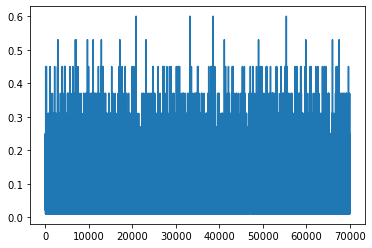

In [20]:
df.risk.plot().hist
df.risk.value_counts()

In [8]:
print(df.risk.loc[df.risk<=0.05].value_counts().sum())
print(df.risk.loc[(df.risk>0.05) & (df.risk<=0.10)].value_counts().sum())
print(df.risk.loc[(df.risk>0.10) & (df.risk<=0.80)].value_counts().sum())


26472
28878
14650


In [24]:
df2['risk_group'] = 0

df2.loc[df.risk<=0.03, 'risk_group'] = 1
df2.loc[(df.risk>0.03) & (df.risk<=0.05), 'risk_group'] = 2
df2.loc[(df.risk>0.05) & (df.risk<=0.08), 'risk_group'] = 3
df2.loc[(df.risk>0.08) & (df.risk<=0.15), 'risk_group'] = 4
df2.loc[df.risk>0.15, 'risk_group'] = 5

df2

age  gender   BMI  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0      50.0       2  22.0    110     80            1     1      0     0   
1      55.0       1  35.0    140     90            3     1      0     0   
2      52.0       1  24.0    130     70            3     1      0     0   
3      48.0       2  29.0    150    100            1     1      0     0   
4      48.0       1  23.0    100     60            1     1      0     0   
...     ...     ...   ...    ...    ...          ...   ...    ...   ...   
69995  53.0       2  27.0    120     80            1     1      1     0   
69996  62.0       1  50.0    140     90            2     2      0     0   
69997  52.0       2  31.0    180     90            3     1      0     1   
69998  61.0       1  27.0    135     80            1     2      0     0   
69999  56.0       1  25.0    120     80            2     1      0     0   

       active  cardio  fram_score  risk  risk_group  
0           1       0           3  0.05           2  
1           1       1          12  0.13           4  
2           0       1           9  0.08           3  
3           1       1           5  0.08           3  
4           0       0           0  0.02           1  
...       ...     ...         ...   ...         ...  
69995       1       0           5  0.08           3  
69996       1       1          15  0.20           5  
69997       0       1           9  0.20           5  
69998       0       1          12  0.13           4  
69999       1       0           8  0.07           3  

[70000 rows x 14 columns]

In [25]:
df2.to_csv('framingham-score-risk.csv', columns = ['age','gender', 'BMI','ap_hi','ap_lo','cholesterol','gluc', 
                                                  'smoke','alco','active', 'cardio', 'fram_score',  'risk', 'risk_group'],
          index = False)

In [9]:
file = pd.read_csv('framingham-score-risk.csv')
df   = pd.DataFrame(file)

In [10]:
print(df.risk.loc[df.risk<=0.05].value_counts().sum())
print(df.risk.loc[(df.risk>0.05) & (df.risk<=0.10)].value_counts().sum())
print(df.risk.loc[(df.risk>0.10) & (df.risk<=0.80)].value_counts().sum())


26472
28878
14650


In [11]:
df['risk_group'] = 0

df.loc[df.risk<=0.05, 'risk_group'] = 1
df.loc[(df.risk>0.05) & (df.risk<=0.10), 'risk_group'] = 2
df.loc[(df.risk>0.10) & (df.risk<=0.80), 'risk_group'] = 3


df

age  gender   BMI  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0      50.0       2  22.0    110     80            1     1      0     0   
1      55.0       1  35.0    140     90            3     1      0     0   
2      52.0       1  24.0    130     70            3     1      0     0   
3      48.0       2  29.0    150    100            1     1      0     0   
4      48.0       1  23.0    100     60            1     1      0     0   
...     ...     ...   ...    ...    ...          ...   ...    ...   ...   
69995  53.0       2  27.0    120     80            1     1      1     0   
69996  62.0       1  50.0    140     90            2     2      0     0   
69997  52.0       2  31.0    180     90            3     1      0     1   
69998  61.0       1  27.0    135     80            1     2      0     0   
69999  56.0       1  25.0    120     80            2     1      0     0   

       active  cardio  fram_score  risk  risk_group  
0           1       0           3  0.05           1  
1           1       1          12  0.13           3  
2           0       1           9  0.08           2  
3           1       1           5  0.08           2  
4           0       0           0  0.02           1  
...       ...     ...         ...   ...         ...  
69995       1       0           5  0.08           2  
69996       1       1          15  0.20           3  
69997       0       1           9  0.20           3  
69998       0       1          12  0.13           3  
69999       1       0           8  0.07           2  

[70000 rows x 14 columns]

In [12]:
df.to_csv('framingham-score-risk-3cat.csv', columns = ['age','gender', 'BMI','ap_hi','ap_lo','cholesterol','gluc', 
                                                  'smoke','alco','active', 'cardio', 'fram_score',  'risk', 'risk_group'],
          index = False)

In [2]:
file = pd.read_csv('framingham-score-risk.csv')
df   = pd.DataFrame(file)

In [30]:
print(df.risk.loc[df.risk<=0.03].value_counts().sum())
print(df.risk.loc[(df.risk>0.03) & (df.risk<=0.05)].value_counts().sum())
print(df.risk.loc[(df.risk>0.05) & (df.risk<=0.1)].value_counts().sum())
print(df.risk.loc[(df.risk>0.1)].value_counts().sum())

12180
14292
28878
14650


In [31]:
df['risk_group'] = 0

df.loc[df.risk<=0.03, 'risk_group'] = 1
df.loc[(df.risk>0.03) & (df.risk<=0.05), 'risk_group'] = 2
df.loc[(df.risk>0.05) & (df.risk<=0.1), 'risk_group'] = 3
df.loc[(df.risk>0.10), 'risk_group'] = 4


df.to_csv('framingham-score-risk-4cat.csv', columns = ['age','gender', 'BMI','ap_hi','ap_lo','cholesterol','gluc', 
                                                  'smoke','alco','active', 'cardio', 'fram_score',  'risk', 'risk_group'],
          index = False)

df

age  gender   BMI  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0      50.0       2  22.0    110     80            1     1      0     0   
1      55.0       1  35.0    140     90            3     1      0     0   
2      52.0       1  24.0    130     70            3     1      0     0   
3      48.0       2  29.0    150    100            1     1      0     0   
4      48.0       1  23.0    100     60            1     1      0     0   
...     ...     ...   ...    ...    ...          ...   ...    ...   ...   
69995  53.0       2  27.0    120     80            1     1      1     0   
69996  62.0       1  50.0    140     90            2     2      0     0   
69997  52.0       2  31.0    180     90            3     1      0     1   
69998  61.0       1  27.0    135     80            1     2      0     0   
69999  56.0       1  25.0    120     80            2     1      0     0   

       active  cardio  fram_score  risk  risk_group  
0           1       0           3  0.05           2  
1           1       1          12  0.13           4  
2           0       1           9  0.08           3  
3           1       1           5  0.08           3  
4           0       0           0  0.02           1  
...       ...     ...         ...   ...         ...  
69995       1       0           5  0.08           3  
69996       1       1          15  0.20           4  
69997       0       1           9  0.20           4  
69998       0       1          12  0.13           4  
69999       1       0           8  0.07           3  

[70000 rows x 14 columns]